

# Project: Investigate a Dataset 
# International Movie DataBase Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This dataset represents more that 10,000.00 movie record with 21 variables that describe very good feature of each movie for Hungry Data Analyst. What can you say about the most occured genre? Which genre is related to higher revenue? Which actor/acress will you choose to bring more money to the movie? ( Bruce Willis or Emma Watson ) :)? Given that major films costing over 100 million to produce can still flop, this question is more important than ever to the industry.

> All these valuable questions and more can be answered using such dataset with some graphs and different pieces of python code.



In [2]:
#Importing required packages 
import pandas as pd
import matplotlib.pyplot as plt
import operator
from itertools import islice
import numpy as np 
import locale
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

locale.setlocale( locale.LC_ALL, '' )


% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Loading your data and printing out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
### Checking/removing genres Null data
# This is done because we have couple questions around Genres and reveneues
#If this is not done, our analysis will fail in some pieces of the code

df.isnull().sum()



id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
### checking/dropping duplicated data
print(df.shape)
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
print(df.shape)


(10866, 21)
1
(10865, 21)


In [7]:
#Checking mean of different features
print("Revenue mean {}".format( locale.currency( df.revenue.mean(), grouping=True ) ) )

print("Popularity mean {}".format(df.popularity.mean()))

print("Voting mean {}".format(df.vote_average.mean()))


Revenue mean $39,826,896.08
Popularity mean 0.6464455549010584
Voting mean 5.97501150483203


### Data Cleaning: Cleaning dirty Genre and Cast records 

In [8]:
#Since our questions will be more into genre and cast crew
#This cell is to drop data with no Generes & no Cast

df.dropna(subset=['genres'],inplace=True)
df.isnull().sum()

df.dropna(subset=['cast'],inplace=True)
df.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7864
director                  36
tagline                 2757
keywords                1445
overview                   3
runtime                    0
genres                     0
production_companies     976
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#Delete all rows with Zero Values in Revenue/Budget

df = df[(df[['revenue','budget']] != 0).all(axis=1)]

df.shape


(3850, 21)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the most occured genre across all movies in the data set?
The result of this question will show what is the most genre type Holywood producers/writers aim for. 


In [10]:
#The following loop is to:
### 1- Get all genres in the data set 
### 2- Store it in a list called genres_types
### 3- Get the occurance count of each genre and add it to the dictioanry 


genres_types = {}
for index, row in df.iterrows():
    splited=row['genres'].split('|')    
    for genre in splited:
            if genre not in genres_types:
                genre_occurence=df.genres.str.count(genre).sum()
                genres_types[genre]=genre_occurence

    


# Sort Genre types by its occurance count descendently 
genres_types = sorted(genres_types.items(), key=operator.itemgetter(1), reverse=True)

#This variable has all genres with total of each
all_top_genre = list(genres_types) 

#This variable has the top 5 genres, for Bar chart graph simplicity 
top_genre = list(islice(genres_types, 5))  
print(top_genre)



[('Drama', 1754), ('Comedy', 1358), ('Thriller', 1203), ('Action', 1085), ('Adventure', 749)]


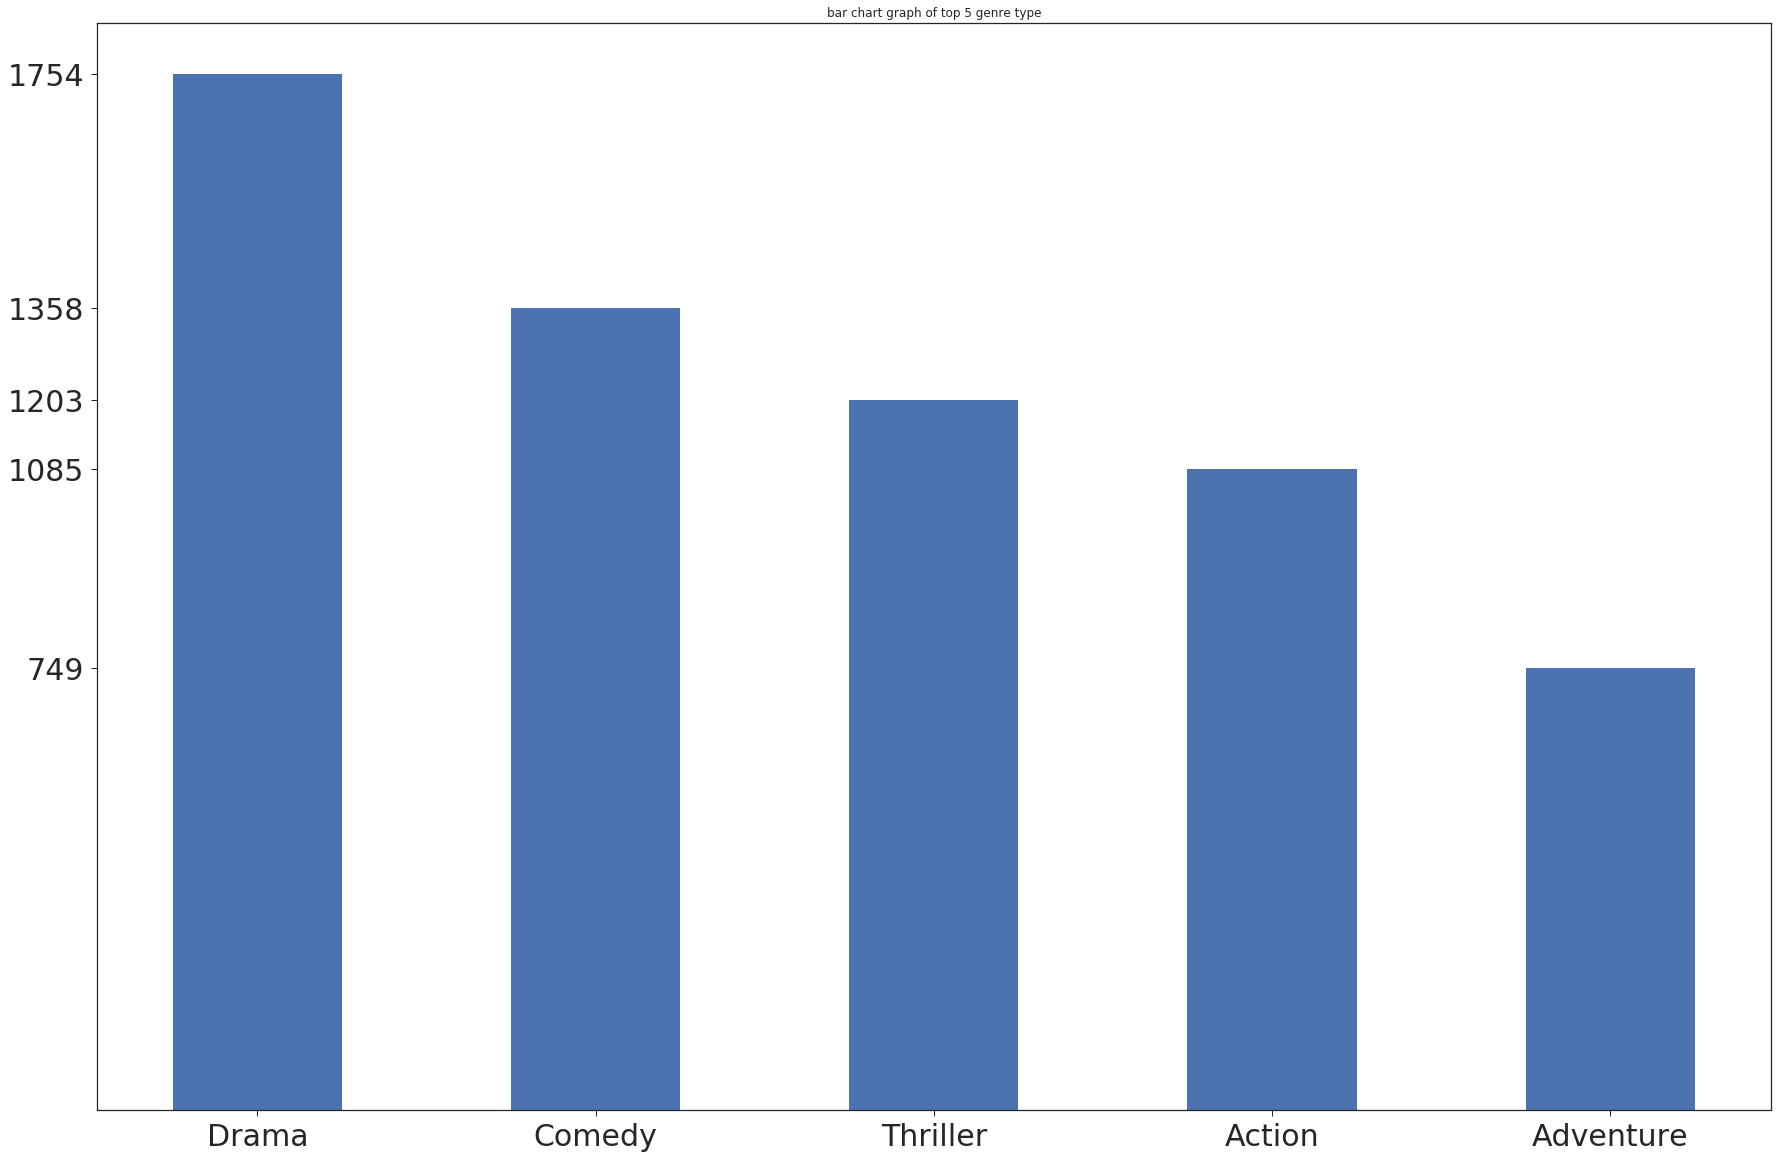

The following plot represents the top 5 genre type with its number of occurence across the dataset


In [11]:
#This is to plot bar chart graph of top 5 genre type occured in the movie data set 

labels, ys = zip(*top_genre)
xs = np.arange(len(labels)) 
width = 0.5

#Size of the genre graph
plt.rcParams["figure.figsize"] = [30,20]

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels, fontsize=30) 
plt.yticks(ys, fontsize=30)
plt.title("bar chart graph of top 5 genre type")

plt.show()

print("The following plot represents the top 5 genre type with its number of occurence across the dataset")

We can say from the graph below that the histogram is skewed to the right


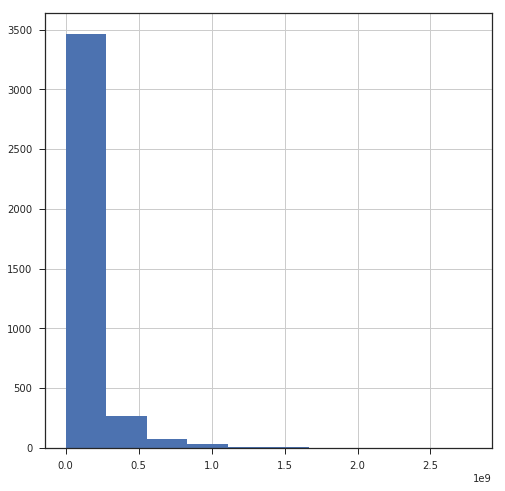

In [12]:
#This is to plot a histogram for the budget column
df.revenue.hist(figsize=(8,8));

print("We can say from the graph below that the histogram is skewed to the right")

### Research Question 2: what is the occurance percentage of each genres?
> To clearly show the distribution of each genre type across the dataset, we need to plot the percentage of each genre in a pie chart to provide clear way for analyiss 

The following pie chart shows percentage of each genre type


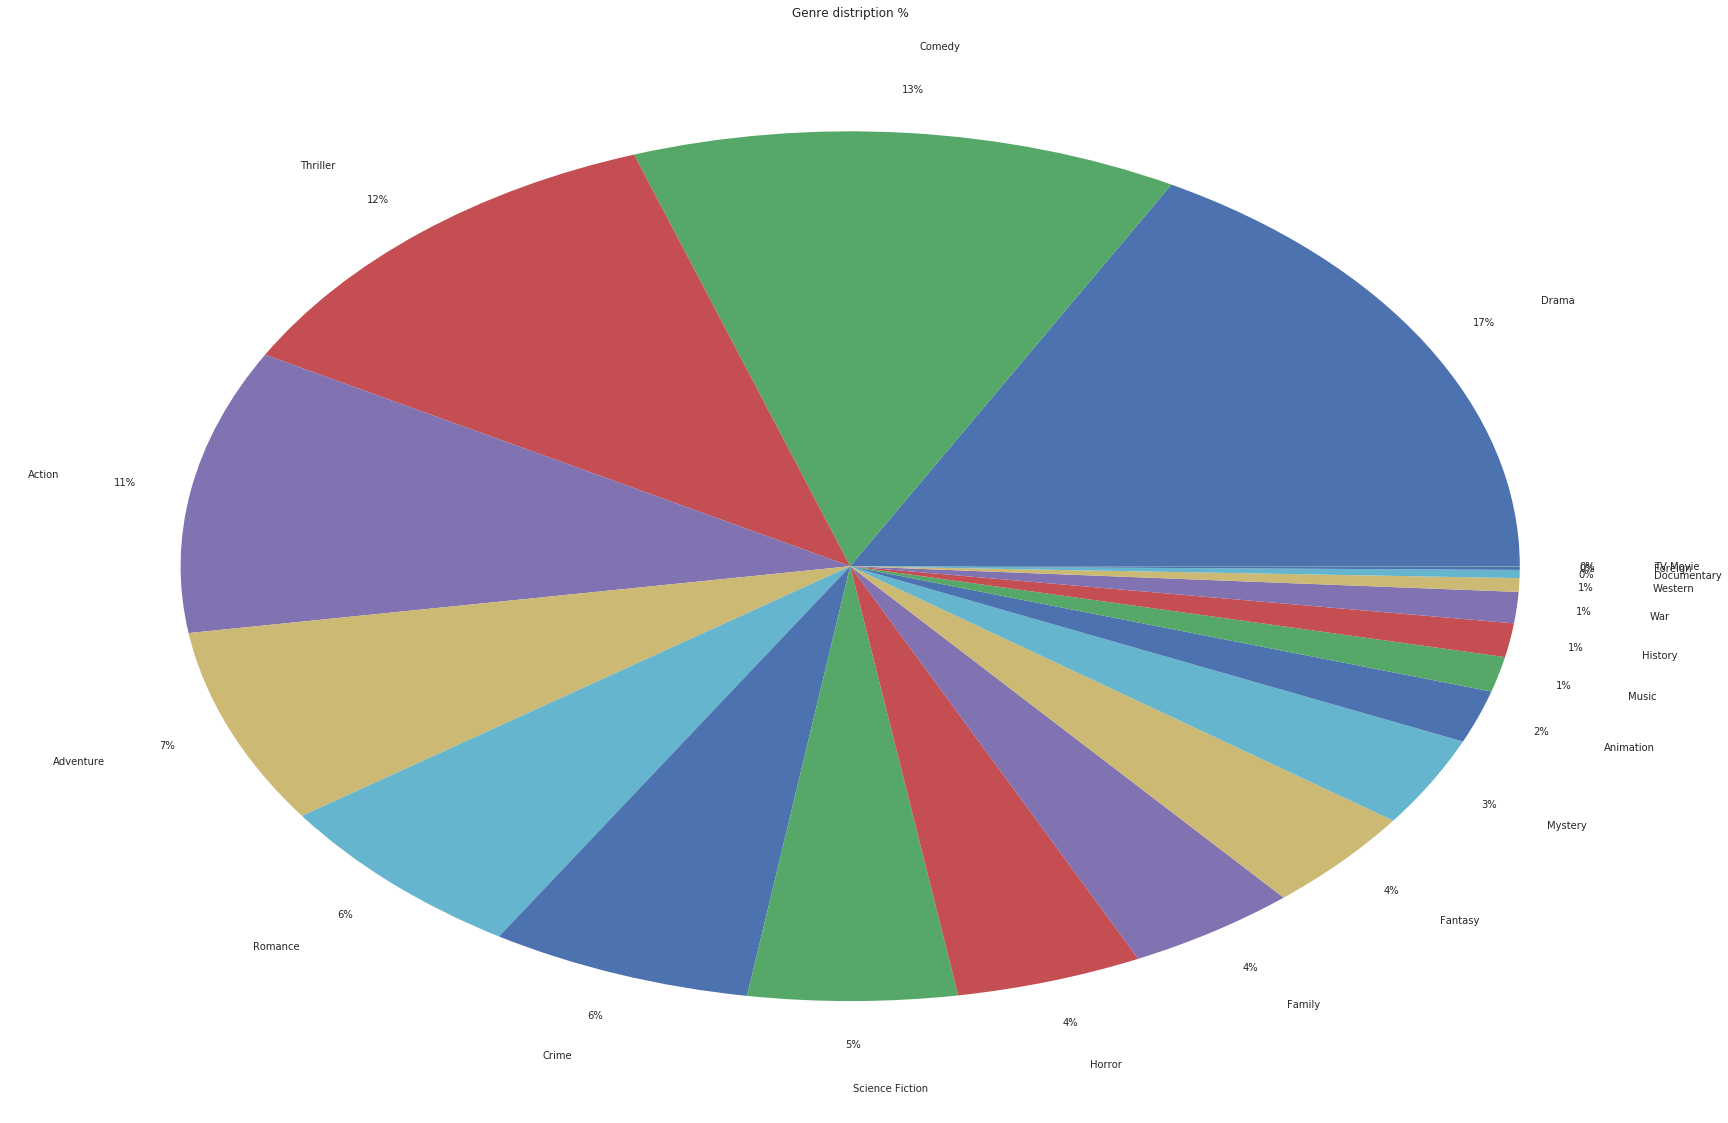

In [13]:
#This is to plot a clourful Pie Char of the Genre percentage distribution 
import matplotlib.pyplot as plt
plt.figure()

labels, values = zip(*all_top_genre)
plt.pie(values, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Genre distription %")
print("The following pie chart shows percentage of each genre type")
plt.show()



> We can clearly say that the most popular Genre type is Drama and Comedy with 18% and 14% respectivly. This show us an indicator about what type of movies bring more money to the movie industry. This is not a definit conclusion because there are a lot of other variables that might increase the reveneue of each Movie other that than its type. For example, the popular actor in the movie and the unique idea of such movie. 

> Next section will dive deep into the revenue relation with different features in the data set. 

### Research Question 3: What is the relation between genre type and revenue? Which genre has the highest revenue?

In [14]:
#This piece of code is to sum revenue of each genre type in the dataset.
genre_revenue_list = []
for a_genre in genres_types:
    genre_revenue = df[df["genres"].str.contains(a_genre[0])].sum()["revenue"]
    genre_revenue_list.append((a_genre[0],genre_revenue))

print("Thie list shows the revenue associated with each Genre type \n")
print(genre_revenue_list)

Thie list shows the revenue associated with each Genre type 

[('Drama', 130518076351), ('Comedy', 132183056333), ('Thriller', 117679503931), ('Action', 169886215114), ('Adventure', 163500596287), ('Romance', 57193921352), ('Crime', 54777153159), ('Science Fiction', 85081292714), ('Horror', 26524253059), ('Family', 86340257365), ('Fantasy', 86420717216), ('Mystery', 31319746667), ('Animation', 51681421541), ('Music', 11242189360), ('History', 10501275508), ('War', 12617816329), ('Western', 4545471891), ('Documentary', 754345448), ('Foreign', 144507449), ('TV Movie', 42000000)]


In [15]:
#A function to return the second value of a tuble, 
#This is needed to be passed as an argument in sort function below
def takeSecond(elem):
    return elem[1]

#Sort genre by revenue list descending, to see the top genre generating revenue
genre_revenue_list.sort(key=takeSecond , reverse=True)
print("Holywood!, are you ready for the results! \n Top genre generating the highest revenue is \n  {} \n with total revenue of \n {}".format(genre_revenue_list[0][0] , locale.currency( genre_revenue_list[0][1], grouping=True )))




Holywood!, are you ready for the results! 
 Top genre generating the highest revenue is 
  Action 
 with total revenue of 
 $169,886,215,114.00


### Research Question 4: What is the relation between the budget and revenue? is it strong? 

As shown in the graph below, we don't see strong relation between budget & revenue.


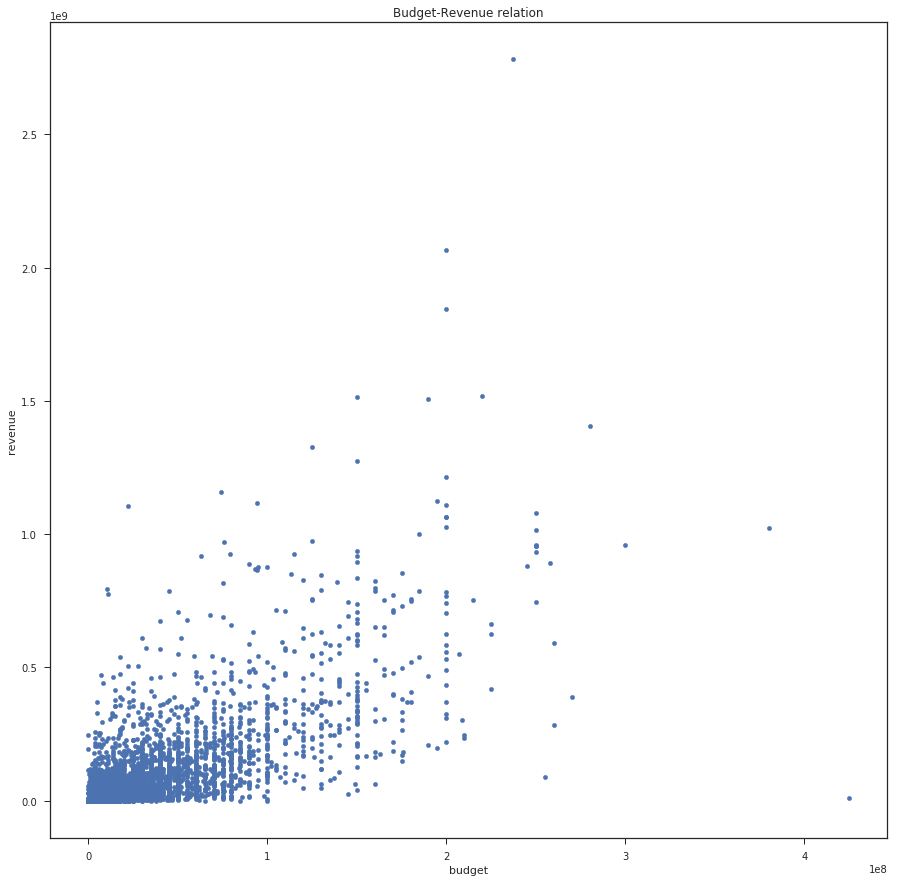

In [16]:
df.plot(title='Budget-Revenue relation', x='budget', y='revenue' , kind='scatter', figsize=(15,15));

### Research Question 5: Who are actors/acresses is associated with higher movie revenue? Who are the actors/actresses with highest movie revenues? 

> The answer of such questions will help Holywood producers in choosing actor/acress for their movies and bring more money to the movie they produce.

In [17]:
#The following piece of code generate a list of all actors/acress mentioned in the 
#IMDB data set

# The following has been commneted since it takes long time to execut.
# The analysis has been prepared already.

'''
cast_names = {}
for index, row in df.iterrows():
    splited=row['cast'].split('|')    
    for a_cast in splited:
            if a_cast not in cast_names:
                actor_occurence=df.cast.str.count(a_cast).sum()
                cast_names[a_cast]=actor_occurence
                
print(cast_names)
'''
#This list has the result of the above code. 
#This list has the name and occurance of all actors/acress in the IMDB data set given
cast_names_copy = {'Chris Pratt': 10, 'Bryce Dallas Howard': 7, 'Irrfan Khan': 6, "Vincent D'Onofrio": 24, 'Nick Robinson': 5, 'Tom Hardy': 21, 'Charlize Theron': 31, 'Hugh Keays-Byrne': 3, 'Nicholas Hoult': 10, 'Josh Helman': 1, 'Shailene Woodley': 6, 'Theo James': 4, 'Kate Winslet': 31, 'Ansel Elgort': 2, 'Miles Teller': 9, 'Harrison Ford': 42, 'Mark Hamill': 18, 'Carrie Fisher': 13, 'Adam Driver': 7, 'Daisy Ridley': 1, 'Vin Diesel': 22, 'Paul Walker': 21, 'Jason Statham': 32, 'Michelle Rodriguez': 17, 'Dwayne Johnson': 23, 'Leonardo DiCaprio': 30, 'Will Poulter': 6, 'Domhnall Gleeson': 8, 'Paul Anderson': 4, 'Arnold Schwarzenegger': 35, 'Jason Clarke': 5, 'Emilia Clarke': 3, 'Jai Courtney': 5, 'J.K. Simmons': 19, 'Matt Damon': 39, 'Jessica Chastain': 20, 'Kristen Wiig': 20, 'Jeff Daniels': 31, 'Michael PeÃ±a': 16, 'Sandra Bullock': 34, 'Jon Hamm': 11, 'Michael Keaton': 26, 'Allison Janney': 13, 'Steve Coogan': 17, 'Amy Poehler': 13, 'Phyllis Smith': 3, 'Richard Kind': 4, 'Bill Hader': 16, 'Lewis Black': 4, 'Daniel Craig': 23, 'Christoph Waltz': 8, 'LÃ©a Seydoux': 4, 'Ralph Fiennes': 35, 'Monica Bellucci': 10, 'Mila Kunis': 20, 'Channing Tatum': 23, 'Sean Bean': 27, 'Eddie Redmayne': 13, 'Douglas Booth': 5, 'Alicia Vikander': 8, 'Oscar Isaac': 11, 'Sonoya Mizuno': 1, 'Corey Johnson': 5, 'Adam Sandler': 35, 'Michelle Monaghan': 17, 'Peter Dinklage': 13, 'Josh Gad': 9, 'Kevin James': 12, 'Robert Downey Jr.': 43, 'Chris Hemsworth': 14, 'Mark Ruffalo': 28, 'Chris Evans': 23, 'Scarlett Johansson': 32, 'Samuel L. Jackson': 71, 'Kurt Russell': 34, 'Jennifer Jason Leigh': 24, 'Walton Goggins': 5, 'DemiÃ¡n Bichir': 7, 'Liam Neeson': 48, 'Forest Whitaker': 36, 'Maggie Grace': 12, 'Famke Janssen': 18, 'Dougray Scott': 15, 'Paul Rudd': 31, 'Michael Douglas': 35, 'Evangeline Lilly': 3, 'Corey Stoll': 5, 'Bobby Cannavale': 13, 'Lily James': 3, 'Cate Blanchett': 32, 'Richard Madden': 4, 'Helena Bonham Carter': 30, 'Holliday Grainger': 5, 'Jennifer Lawrence': 16, 'Josh Hutcherson': 20, 'Liam Hemsworth': 11, 'Woody Harrelson': 43, 'Elizabeth Banks': 26, 'Britt Robertson': 8, 'George Clooney': 31, 'Raffey Cassidy': 1, 'Thomas Robinson': 1, 'Hugh Laurie': 18, 'Jake Gyllenhaal': 24, 'Rachel McAdams': 23, 'Oona Laurence': 1, '50 Cent': 12, 'Alexandra Daddario': 6, 'Carla Gugino': 23, 'Ioan Gruffudd': 13, 'Archie Panjabi': 5, 'Dakota Johnson': 6, 'Jamie Dornan': 2, 'Jennifer Ehle': 9, 'Eloise Mumford': 4, 'Victor Rasuk': 4, 'Christian Bale': 32, 'Steve Carell': 25, 'Ryan Gosling': 17, 'Brad Pitt': 39, 'Melissa Leo': 13, 'Tom Cruise': 37, 'Jeremy Renner': 15, 'Simon Pegg': 22, 'Rebecca Ferguson': 1, 'Ving Rhames': 33, 'Mark Wahlberg': 36, 'Seth MacFarlane': 8, 'Amanda Seyfried': 20, 'Jessica Barth': 1, 'Giovanni Ribisi': 21, 'Taron Egerton': 3, 'Colin Firth': 31, 'Michael Caine': 53, 'Mark Strong': 23, 'Liev Schreiber': 22, 'John Slattery': 4, "Dylan O'Brien": 3, 'Kaya Scodelario': 6, 'Thomas Brodie-Sangster': 6, 'Giancarlo Esposito': 14, 'Aidan Gillen': 9, 'Ian McKellen': 21, 'Milo Parker': 1, 'Laura Linney': 21, 'Hattie Morahan': 2, 'Patrick Kennedy': 3, 'Sharlto Copley': 10, 'Dev Patel': 8, 'Ninja': 2, 'Yolandi Visser': 1, 'Jose Pablo Cantillo': 5, 'Anna Kendrick': 18, 'Rebel Wilson': 4, 'Hailee Steinfeld': 10, 'Brittany Snow': 11, 'Skylar Astin': 4, 'Tom Hanks': 46, 'Mark Rylance': 3, 'Amy Ryan': 9, 'Alan Alda': 13, 'Sebastian Koch': 3, 'Jack Black': 31, 'Dylan Minnette': 2, 'Odeya Rush': 3, 'Jillian Bell': 2, 'Brie Larson': 10, 'Jacob Tremblay': 1, 'Joan Allen': 16, 'Sean Bridgers': 3, 'William H. Macy': 31, 'Abbie Cornish': 12, 'Jeffrey Dean Morgan': 12, 'Colin Farrell': 35, 'Anthony Hopkins': 42, 'Marley Shelton': 8, 'Raymond Ochoa': 1, 'Jack Bright': 1, 'Jeffrey Wright': 12, 'Frances McDormand': 23, 'Maleah Nipay-Padilla': 1, 'Ed Harris': 44, 'Joel Kinnaman': 6, 'Boyd Holbrook': 6, 'Bruce McGill': 15, 'Saoirse Ronan': 14, 'Emory Cohen': 3, 'Emily Bett Rickards': 1, "Eileen O'Higgins": 1, "O'Shea Jackson Jr.": 1, 'Corey Hawkins': 1, 'Jason Mitchell': 1, 'Neil Brown Jr.': 1, 'Aldis Hodge': 2, 'Rose Leslie': 2, 'Elijah Wood': 30, 'Ã“lafur Darri Ã“lafsson': 2, 'Michael Fassbender': 22, 'Seth Rogen': 24, 'Katherine Waterston': 6, 'Henry Cavill': 7, 'Armie Hammer': 8, 'Elizabeth Debicki': 2, 'Luca Calvani': 1, 'Blake Lively': 8, 'Michiel Huisman': 3, 'Ellen Burstyn': 17, 'Kathy Baker': 9, 'Haley Bennett': 7, 'Danila Kozlovskiy': 3, 'Tim Roth': 28, 'Andrei Dementiev': 1, 'Jim Parsons': 4, 'Rihanna': 2, 'Steve Martin': 38, 'Jennifer Lopez': 24, 'Matt Jones': 1, 'Nat Wolff': 5, 'Cara Delevingne': 3, 'Halston Sage': 1, 'Justice Smith': 1, 'Austin Abrams': 1, 'Michael Angarano': 15, 'Milo Ventimiglia': 10, 'Dominik GarcÃ\xada-Lorido': 3, 'Anne Heche': 16, 'Rachel Weisz': 27, 'John C. Reilly': 32, 'Ben Whishaw': 10, 'Rooney Mara': 8, 'Kyle Chandler': 4, 'Sarah Paulson': 6, 'Jake Lacy': 2, 'Robert De Niro': 72, 'Anne Hathaway': 24, 'Rene Russo': 16, 'Anders Holm': 2, 'JoJo Kushner': 1, 'Josh Brolin': 25, 'John Hawkes': 10, 'Sam Worthington': 15, 'Bradley Cooper': 20, 'Dascha Polanco': 1, 'Edgar RamÃ\xadrez': 6, 'Luke Bracey': 3, 'Teresa Palmer': 13, 'Delroy Lindo': 21, 'Ray Winstone': 19, 'Sienna Miller': 16, 'Uma Thurman': 31, 'Ryan Reynolds': 30, 'Ben Kingsley': 39, 'Natalie Martinez': 3, 'Matthew Goode': 12, 'Michelle Dockery': 3, 'Johnny Depp': 46, 'Gwyneth Paltrow': 31, 'Ewan McGregor': 43, 'Paul Bettany': 18, 'Olivia Munn': 6, 'Matthias Schoenaerts': 8, 'Amber Heard': 18, 'Leehom Wang': 1, 'Tang Wei': 1, 'Viola Davis': 19, 'Holt McCallany': 2, 'Emily Blunt': 21, 'Benicio del Toro': 20, 'Victor Garber': 10, 'Jon Bernthal': 6, 'Kate Mara': 12, 'Michael B. Jordan': 6, 'Jamie Bell': 16, 'Toby Kebbell': 8, 'Anya Taylor-Joy': 1, 'Ralph Ineson': 1, 'Kate Dickie': 4, 'Harvey Scrimshaw': 1, 'Ellie Grainger': 1, 'Melissa McCarthy': 6, 'Rose Byrne': 20, 'Miranda Hart': 1, 'Will Smith': 22, 'Margot Robbie': 4, 'Rodrigo Santoro': 8, 'Robert Taylor': 3, 'Gerald McRaney': 3, 'Rupert Friend': 7, 'Zachary Quinto': 6, 'Hannah Ware': 1, 'Emilio Rivera': 2, 'Rolf Kanies': 1, 'Benjamin Walker': 3, 'Cillian Murphy': 16, 'Brendan Gleeson': 26, 'Pierce Brosnan': 35, 'Milla Jovovich': 23, 'Dylan McDermott': 18, 'Angela Bassett': 23, 'Robert Forster': 12, 'Sylvester Stallone': 44, 'Graham McTavish': 6, 'Tessa Thompson': 3, 'Phylicia RashÄd': 4, 'Amy Schumer': 3, 'Colin Quinn': 1, 'Vanessa Bayer': 1, 'Helen Mirren': 31, 'Aaron Paul': 9, 'Alan Rickman': 18, 'Iain Glen': 8, 'Barkhad Abdi': 1, 'Emily Browning': 10, 'Christopher Eccleston': 10, 'David Thewlis': 24, 'Jeremy Irvine': 8, 'Hanna Mangan Lawrence': 2, 'Ronny Cox': 12, 'Martin Palmer': 1, 'Levi Miller': 1, 'Garrett Hedlund': 11, 'Hugh Jackman': 25, 'Melanie Stone': 4, 'Kevin Sorbo': 16, 'Adam Johnson': 4, 'Jake Stormoen': 3, 'Rocky Myers': 2, 'Thomas Mann': 3, 'RJ Cyler': 1, 'Olivia Cooke': 4, 'Connie Britton': 6, 'Nick Offerman': 8, 'Noah Schnapp': 1, 'Bill Melendez': 2, 'Venus Schultheis': 1, 'Hadley Belle Miller': 1, 'Madisyn Shipman': 1, 'Bitsie Tulloch': 1, 'Gugu Mbatha-Raw': 3, 'Alec Baldwin': 47, 'Matthew Willig': 1, 'Joseph Gordon-Levitt': 29, 'Anthony Mackie': 16, 'Lizzy Caplan': 10, 'Keanu Reeves': 43, 'Lorenza Izzo': 4, 'Ana de Armas': 1, 'Aaron Burns': 2, 'Colleen Camp': 5, 'Scott Eastwood': 3, 'Lolita Davidovich': 9, 'Melissa Benoist': 2, 'Jack Huston': 7, 'Andy Samberg': 8, 'Selena Gomez': 14, 'Steve Buscemi': 41, 'Diane Keaton': 29, 'John Goodman': 49, 'Alan Arkin': 23, 'Olivia Wilde': 21, 'Charlotte Le Bon': 2, 'Ben Schwartz': 3, 'James Badge Dale': 7, 'Marie Avgeropoulos': 2, 'Taylor Lautner': 9, 'Adam Rayner': 3, 'Rafi Gavron': 2, 'Sam Medina': 1, 'Ed Helms': 9, 'Christina Applegate': 18, 'Skyler Gisondo': 1, 'Steele Stebbins': 1, 'Sam Rockwell': 29, 'Rosemarie DeWitt': 11, 'Saxon Sharbino': 2, 'Kyle Catlett': 2, 'Kennedi Clements': 1, 'Abigail Breslin': 18, 'Joely Richardson': 9, 'Laura Cayouette': 3, 'J.D. Evermore': 2, 'Kristen Stewart': 26, 'Guy Pearce': 34, 'Jacki Weaver': 9, 'Bel Powley': 3, 'Gary Oldman': 36, 'Noomi Rapace': 6, 'Paddy Considine': 15, 'Jason Bateman': 24, 'Rebecca Hall': 14, 'Joel Edgerton': 18, 'David Denman': 3, 'Beau Knapp': 2, 'Will Ferrell': 31, 'Linda Cardellini': 10, 'Thomas Haden Church': 14, 'Hannibal Buress': 1, 'Nicola Posener': 4, 'Ambyr Childers': 4, 'Thomas Jane': 22, 'Bryan Greenberg': 5, 'Bruce Willis': 62, 'Johnathon Schaech': 10, 'Jeff Bridges': 39, 'Marion Cotillard': 11, 'James Franco': 41, 'Jason Lee': 18, 'Justin Long': 29, 'Bella Thorne': 5, 'Matthew Gray Gubler': 5, 'Jesse McCartney': 5, 'Caroline Goodall': 7, 'Judy Davis': 14, 'Hayley Magnus': 1, 'Mae Whitman': 13, 'Robbie Amell': 6, 'Bianca A. Santos': 2, 'Skyler Samuels': 1, 'Shannyn Sossamon': 11, 'James Ransone': 7, 'Tate Ellington': 1, 'Nicholas King': 1, 'Lucas Jade Zumann': 1, 'Raini Rodriguez': 3, 'Eduardo VerÃ¡stegui': 1, 'Daniella Alonso': 3, 'Neal McDonough': 19, 'Kristen Bell': 19, 'Idina Menzel': 4, 'Jonathan Groff': 5, 'Chris Williams': 1, 'Tom Hiddleston': 9, 'Jeremy Irons': 29, 'Luke Evans': 7, 'Elisabeth Moss': 8, 'Ryan Guzman': 3, 'Ian Nelson': 1, 'John Corbett': 8, 'Kristin Chenoweth': 8, 'Peter Firth': 6, 'Kit Harington': 6, 'Lara Pulver': 1, 'Elyes Gabel': 2, 'Jeremy Piven': 14, 'Adrian Grenier': 4, 'Jerry Ferrara': 4, 'Kevin Connolly': 1, 'Kevin Dillon': 5, 'Kevin Hart': 13, 'Kaley Cuoco': 3, 'Affion Crockett': 1, 'Jorge Garcia': 1, 'Tye Sheridan': 7, 'Logan Miller': 3, 'Joey Morgan': 1, 'Sarah Dumont': 1, 'David Koechner': 16, 'Olivia DeJonge': 2, 'Ed Oxenbould': 3, 'Kathryn Hahn': 9, 'Benjamin Kanes': 1, 'Deanna Dunagan': 1, 'Benedict Cumberbatch': 13, 'Kevin Bacon': 35, 'Kate Bosworth': 19, 'Dave Bautista': 3, 'Gina Carano': 4, 'Adam Scott': 20, 'Toni Collette': 29, 'Allison Tolman': 1, 'Emjay Anthony': 2, 'Christina Hendricks': 10, 'ChloÃ« Grace Moretz': 18, 'Owen Wilson': 36, 'Lake Bell': 10, 'Sterling Jerins': 3, 'Spencer Garrett': 2, 'Shameik Moore': 1, 'Kiersey Clemons': 2, 'Tony Revolori': 2, 'ZoÃ« Kravitz': 5, 'Chanel Iman': 1, 'Jesse Eisenberg': 21, 'Topher Grace': 12, 'Tatiana Maslany': 2, 'Katie Holmes': 19, 'Max Irons': 3, 'Victor Webster': 3, 'Ellen Hollman': 2, 'Barry Bostwick': 8, 'Will Kemp': 3, 'M. Emmet Walsh': 13, 'Tina Fey': 8, 'John Leguizamo': 29, 'Ike Barinholtz': 2, 'Maya Rudolph': 6, 'Jonny Weston': 4, 'Virginia Gardner': 1, "Sofia Black-D'Elia": 1, 'Sam Lerner': 2, 'Allen Evangelista': 2, 'Kate Beckinsale': 28, 'Rob Riggle': 5, 'Sanjeev Bhaskar': 1, 'Joanna Lumley': 6, 'Ed Skrein': 5, 'Ray Stevenson': 7, 'Loan Chabanol': 1, 'Gabriella Wright': 2, 'Tatjana PajkoviÄ‡': 1, 'Mia Wasikowska': 14, 'Charlie Hunnam': 9, 'Jim Beaver': 1, 'Salma Hayek': 27, 'Hiroyuki Watanabe': 1, 'Jennifer Blanc': 2, 'Togo Igawa': 4, 'Caroline Chikezie': 3, 'Matt Bomer': 5, 'Joe Manganiello': 4, 'Kevin Nash': 1, 'Adam RodrÃ\xadguez': 2, 'Chris J. Murray': 1, 'Brit Shaw': 1, 'Ivy George': 1, 'Lauren Frandsen': 1, 'Tyler Craig': 1, 'Kodi Smit-McPhee': 8, 'Ben Mendelsohn': 9, 'Caren Pistorius': 1, 'Rory McCann': 2, 'Bryan Cranston': 12, 'Diane Lane': 25, 'Elle Fanning': 15, 'Louis C.K.': 10, 'Chiwetel Ejiofor': 13, 'Nicole Kidman': 42, 'Julia Roberts': 36, 'Dean Norris': 5, 'Lyndon Smith': 1, 'Greta Gerwig': 10, 'Lola Kirke': 2, 'Charlie Gillette': 1, 'Dean Wareham': 1, 'Heather Lind': 2, 'Tom Kenny': 8, 'Bill Fagerbakke': 6, 'Rodger Bumpass': 4, 'Clancy Brown': 24, 'Carolyn Lawrence': 3, 'Jonah Hill': 21, 'Felicity Jones': 14, 'Maria Dizzia': 1, 'Ethan Suplee': 7, 'Josh Wiggins': 3, 'Lauren Graham': 11, 'Mia Xitlali': 1, 'Justin Fletcher': 1, 'Omid Djalili': 4, 'Richard Webber': 1, 'Kate Harbour': 1, 'Tim Hands': 1, 'Gabriel Byrne': 21, 'Isabelle Huppert': 8, 'Devin Druid': 1, 'Olga Kurylenko': 10, 'Tim Robbins': 30, 'MÃ©lanie Thierry': 3, 'Fedja Stukan': 1, 'Sean Penn': 33, 'Jasmine Trinca': 3, 'Javier Bardem': 11, 'Shelley Hennig': 1, 'Moses Jacob Storm': 1, 'Renee Olstead': 1, 'William Peltz': 1, 'Jacob Wysocki': 2, 'Reese Witherspoon': 31, 'SofÃ\xada Vergara': 4, 'Michael Mosley': 1, 'John Carroll Lynch': 5, 'Richard T. Jones': 4, 'Dermot Mulroney': 21, 'Stefanie Scott': 3, 'Lin Shaye': 10, 'Leigh Whannell': 4, 'Angus Sampson': 4, 'Chris Pine': 13, 'Julian Morris': 2, 'Tamzin Merchant': 3, 'Jassa Ahluwalia': 1, "Jonjo O'Neill": 1, 'Maggie Smith': 22, 'Alex Jennings': 3, 'Frances de la Tour': 3, 'Gwen Taylor': 1, 'Dominic Cooper': 11, 'James McAvoy': 23, 'Daniel Radcliffe': 16, 'Jessica Brown Findlay': 5, 'Andrew Scott': 4, 'Charles Dance': 15, 'Manuel Camacho': 1, 'Jean Reno': 15, 'Tobias Moretti': 1, 'Eva Kuen': 1, 'Tom Noonan': 3, 'Richard Jenkins': 26, 'Matthew Fox': 7, 'Lili Simmons': 2, 'Sean Young': 11, 'Ethan Hawke': 34, 'Emma Watson': 14, 'Aaron Ashmore': 4, 'Devon Bostick': 9, 'Tobey Maguire': 17, 'Lily Rabe': 2, 'Peter Sarsgaard': 20, 'Sophie NÃ©lisse': 2, 'Toby Jones': 14, 'Stephen Fry': 11, 'Jeremy Northam': 17, 'Morgan Freeman': 49, 'James Purefoy': 6, 'Jenna Saras': 1, 'Lee-Anne Summers': 1, 'Alexander SkarsgÃ¥rd': 9, 'Christopher Meloni': 7, 'Margarita Levieva': 4, 'Nicolas Cage': 61, 'Sarah Wayne Callies': 5, 'Veronica Ferres': 1, 'Lyriq Bent': 2, 'Lauren Beatty': 1, 'Gemma Arterton': 11, 'Ella Smith': 1, 'Clive Owen': 22, 'Aksel Hennie': 5, 'Shohreh Aghdashloo': 5, 'James Babson': 1, 'Vincent Cassel': 13, 'Shirley Henderson': 5, 'Emma Stone': 16, 'Joaquin Phoenix': 27, 'Jamie Blackley': 5, 'Parker Posey': 13, 'Meredith Hagner': 2, 'Robert Pattinson': 16, 'Damian Lewis': 6, 'Jenny Agutter': 7, 'Meryl Streep': 44, 'Kevin Kline': 33, 'Mamie Gummer': 4, 'Sebastian Stan': 8, 'Audra McDonald': 4, 'Drew Barrymore': 34, 'Jacqueline Bisset': 13, 'David Sandberg': 1, 'Jorma Taccone': 2, 'Leopold Nilsson': 1, 'Andreas Cahling': 1, 'Helene Ahlson': 1, 'Michael Ealy': 11, 'Sanaa Lathan': 10, 'Morris Chestnut': 13, 'Kathryn Morris': 5, 'Rutina Wesley': 2, 'Tilda Swinton': 18, 'Aurore ClÃ©ment': 3, 'Ben Stiller': 34, 'Naomi Watts': 33, 'Charles Grodin': 15, 'Alison Brie': 7, 'Craig T. Nelson': 14, 'T.I.': 3, 'Jim Sturgess': 13, 'Ryan Kwanten': 12, 'Mark van Eeuwen': 1, 'Terry Crews': 8, 'Danny Trejo': 29, 'Luke Hemsworth': 3, 'Sullivan Stapleton': 4, 'Alice Braga': 8, 'Antonio Banderas': 43, 'Juliette Binoche': 18, 'James Brolin': 11, 'Lou Diamond Phillips': 12, 'Carey Mulligan': 11, 'Charlotte Rampling': 21, 'Tom Courtenay': 6, 'Dolly Wells': 2, 'Geraldine James': 6, 'David Sibley': 1, 'Zac Efron': 16, 'Emily Ratajkowski': 1, 'Wes Bentley': 13, 'Nick Rotteveel': 1, 'Alessandro Lindblad': 1, 'Sophie Turner': 2, 'Jessica Alba': 22, 'Dove Cameron': 4, 'Sean Harris': 6, 'Jack Reynor': 6, 'Kellan Lutz': 9, 'D. B. Sweeney': 11, 'Dan Bilzerian': 1, 'Katherine Heigl': 19, 'Tom Wilkinson': 32, 'Alexis Bledel': 13, 'Grace Gummer': 3, 'Linda Emond': 2, 'Booboo Stewart': 6, 'Keegan Connor Tracy': 5, 'Stephanie Bennett': 3, 'Dan Payne': 2, 'Jason Sudeikis': 9, 'Blythe Danner': 11, 'Dianna Agron': 5, 'Michael Sheen': 18, 'Tom Sturridge': 6, 'Juno Temple': 19, 'Jason Segel': 14, 'Anna Chlumsky': 6, 'Joan Cusack': 29, 'Judi Dench': 24, 'Richard Gere': 37, 'Bill Nighy': 32, 'Jakob Salvati': 1, 'Emily Watson': 19, 'Cary-Hiroyuki Tagawa': 12, 'Michael Rapaport': 16, 'David Henrie': 4, 'Nolan North': 4, 'Troy Baker': 7, 'Diedrich Bader': 9, 'Khary Payton': 6, 'James Arnold Taylor': 5, 'Christopher Plummer': 35, 'Martin Landau': 16, 'Henry Czerny': 6, 'Bruno Ganz': 6, 'John Krasinski': 10, 'Bill Murray': 37, 'Jessica Biel': 24, 'James Marsden': 26, 'Catherine Keener': 30, 'Paul Reubens': 8, 'Steve Downes': 1, 'Jen Taylor': 1, 'Michelle Lukes': 1, 'Travis Willingham': 1, 'Brittany Uomoleale': 1, 'Billy Bob Thornton': 25, 'Zoe Kazan': 11, 'Scoot McNairy': 10, 'Ellen Page': 15, 'Evan Rachel Wood': 23, 'Max Minghella': 9, 'Callum Keith Rennie': 7, 'Michael Eklund': 6, 'Logan Marshall-Green': 4, 'Tammy Blanchard': 6, 'Mike Doyle': 1, 'Dakota Fanning': 24, 'Clarke Peters': 2, 'Brian Anthony Wilson': 1, 'Garry Chalk': 3, 'Kathleen Barr': 12, 'Willa Townsend': 1, 'Melissa Sturm': 2, 'Trevor Devall': 3, 'James Freedson-Jackson': 1, 'Hays Wellford': 1, 'Shea Whigham': 6, 'Camryn Manheim': 3, 'Louise Bourgoin': 2, 'Natasha Lyonne': 12, 'Amanda Peet': 22, 'Demi Moore': 29, 'Kiefer Sutherland': 24, 'Donald Sutherland': 44, 'Brian Cox': 34, 'Siobhan Williams': 2, 'Amy Winehouse': 1, 'Mark Ronson': 1, 'Tony Bennett': 1, 'Pete Doherty': 1, 'Blake Fielder': 1, 'Ezra Miller': 8, 'Laura Carmichael': 1, 'Henry Lloyd-Hughes': 1, 'Paul Giamatti': 34, 'Joseph Mawle': 1, 'Bojana NovakoviÄ‡': 6, 'Michael McElhatton': 3, 'Gary Lydon': 2, 'Stuart Graham': 4, 'Britt Irvin': 2, 'Michael Kopsa': 2, 'Kelly Sheridan': 19, 'Ed Speleers': 4, 'Shauna Macdonald': 3, 'Elliot Cowan': 4, 'Holly Weston': 1, 'Amit Shah': 1, 'Julianne Moore': 47, 'Michael Shannon': 16, 'Luke Grimes': 3, 'Rory Kinnear': 4, 'Ken Stott': 8, 'Harriet Walter': 1, 'Karl Glusman': 1, 'Aomi Muyock': 1, 'Klara Kristin': 1, 'Juan Saavedra': 1, 'Gaspar NoÃ©': 1, 'Robert Redford': 30, 'Dennis Quaid': 45, 'Rosamund Pike': 14, 'Rumer Willis': 5, 'Nick Nolte': 35, 'Scout Taylor-Compton': 8, 'Shiloh Fernandez': 8, 'Al Pacino': 41, 'Annette Bening': 20, 'Jennifer Garner': 17, 'Zooey Deschanel': 22, 'Kate Hudson': 23, 'Taylor Kinney': 1, 'Kylie Rogers': 2, 'Russell Crowe': 26, 'QuvenzhanÃ© Wallis': 3, 'Sally Field': 21, 'Max Greenfield': 2, 'Beth Behrs': 2, 'Stephen Root': 3, 'Olivia Taylor Dudley': 2, 'Djimon Hounsou': 16, 'Peter Andersson': 2, 'Andrew Garfield': 9, 'Laura Dern': 21, 'Tim Guinee': 5, 'Rob Corddry': 11, 'Craig Robinson': 5, 'Clark Duke': 5, 'Chevy Chase': 23, 'Natalie Portman': 22, 'Brian Dennehy': 22, 'Chris Messina': 9, 'Holly Hunter': 18, 'Harmony Korine': 1, 'Natalie Wilemon': 1, 'Analeigh Tipton': 5, 'Alfre Woodard': 13, 'Caity Lotz': 5, 'Brandon Routh': 4, 'Tom Cavanagh': 6, 'Dane Cook': 11, 'Ben Feldman': 3, 'Napua Greig': 1, 'Kuana Torres Kahele': 1, 'Norman Reedus': 10, 'Sandrine Holt': 4, 'Peter Benson': 2, 'Michael Hogan': 2, 'Matthew Reese': 1, 'Dolph Lundgren': 27, 'Danielle Chuchran': 5, 'Chuck Liddell': 2, 'Adrien Brody': 25, 'Bashar Rahal': 3, 'Charlotte Gainsbourg': 10, 'Marie-JosÃ©e Croze': 5, 'Peter Stormare': 26, 'Jeffrey Donovan': 3, 'Quinn McColgan': 1, 'Valeria Vereau': 1, 'Clara Lago': 1, 'BÃ©rÃ©nice Bejo': 4, 'Liam Cunningham': 16, 'Stacy Martin': 3, 'Yolande Moreau': 3, 'Emma Thompson': 25, 'Kristen Schaal': 4, 'Laura Allen': 3, 'Elizabeth Whitmere': 1, 'Christian Distefano': 1, 'John MacDonald': 1, 'Mark Duplass': 8, 'Donald Glover': 3, 'Evan Peters': 4, 'Sarah Bolger': 8, "Jason O'Mara": 2, 'Stuart Allan': 2, 'David McCallum': 3, 'Sean Maher': 1, 'Jeremy Sisto': 10, 'Kandyse McClure': 3, 'Isabel Lucas': 6, 'Graham Rogers': 2, 'Nick Jonas': 3, 'Elon Musk': 1, 'Jane Goodall': 1, 'Louie Psihoyos': 3, 'Leilani Munter': 1, 'Charles Hambleton': 2, 'Vince Vaughn': 24, 'Dave Franco': 8, 'June Diane Raphael': 2, 'Eva Mendes': 22, 'Matt Smith': 5, 'Iain De Caestecker': 3, 'Kurt Cobain': 3, 'Dave Grohl': 5, 'Courtney Love': 4, 'Krist Novoselic': 1, 'Paul Gross': 2, 'Rossif Sutherland': 2, 'Clark Johnson': 3, 'Allan Hawco': 1, 'Christine Horne': 1, 'Dan Stevens': 6, 'John Travolta': 41, 'Michael Pitt': 9, 'Jackie Earle Haley': 6, 'Travis Aaron Wade': 1, 'Dane DeHaan': 7, 'Kelly McCreary': 1, 'Kevin Costner': 36, 'Ramiro Rodriguez': 1, 'Carlos Pratts': 2, 'Johnny Ortiz': 1, 'Rafael Martinez': 1, 'Sam Neill': 28, 'Bruce Spence': 4, 'Robin McLeavy': 2, 'Jenni Baird': 2, 'Asa Butterfield': 5, 'Rafe Spall': 6, 'Sally Hawkins': 14, 'Eddie Marsan': 15, 'Jo Yang': 1, 'Patrick Wilson': 21, 'Jordana Brewster': 10, 'Kevin McKidd': 6, 'Bryce Johnson': 4, 'Tara Flynn': 1, 'Alan Stanford': 2, 'Martin Sheen': 27, 'Amy Grant': 1, 'Patrick Fitzsymons': 1, 'Jodelle Ferland': 7, 'Sunny Suljic': 1, 'Matt Bellefleur': 1, 'Fulvio Cecere': 2, 'Rachel Bernard': 1, 'Belle Knox': 1, 'Tressa Silguero': 1, 'Kendall Plemons': 1, 'Cassidy Gifford': 2, 'Ryan Shoos': 1, 'Pfeifer Brown': 1, 'Reese Mishler': 1, 'Price T. Morgan': 1, 'Matthew Broderick': 29, 'Alice Eve': 11, 'Phil Burke': 1, 'Gia Crovatin': 1, 'Monique Candelaria': 3, 'Sarah Butler': 6, 'Jennifer Landon': 1, 'Doug McKeon': 3, 'Gabriel Hogan': 2, 'Harley Jane Kozak': 3, 'Winona Ryder': 37, 'Edoardo Ballerini': 2, 'Jim Gaffigan': 3, 'Anthony Edwards': 12, 'Angelina Jolie': 32, 'MÃ©lanie Laurent': 9, 'Melvil Poupaud': 6, 'Niels Arestrup': 3, 'C. Thomas Howell': 10, 'Sean Astin': 21, 'Jon Voight': 31, 'Virginia Williams': 2, 'Brando Eaton': 3, 'Stephanie Hunt': 1, 'Sarah Dugdale': 1, 'Alisha Newton': 1, 'Hilary Jardine': 1, 'Richard Harmon': 3, 'Isla Fisher': 13, 'Anson Mount': 4, 'Gillian Jacobs': 7, 'Eva Longoria': 9, 'Andrew Cheney': 1, 'John Rhys-Davies': 16, 'Kara Killmer': 1, "Adetokumboh M'Cormack": 1, 'Steve Blackwood': 1, 'Kim Basinger': 25, 'Jordan Prentice': 2, 'Sebastian Schipper': 2, 'Robert Hunger-BÃ¼hler': 1, 'Robert Duvall': 38, 'Josh Hartnett': 21, 'Adriana Barraza': 7, 'Jim Parrack': 5, 'Danny Huston': 16, 'Joe Cole': 2, 'Alan McKenna': 2, 'Ian Pirie': 1, 'Andrea Riseborough': 6, 'Emily Alyn Lind': 7, 'Heather Doerksen': 1, 'William Ainscough': 1, 'Bob Odenkirk': 4, 'T.J. Miller': 3, 'Susan Sarandon': 48, 'Jennifer Coolidge': 10, 'Gillian Anderson': 13, 'Callan McAuliffe': 5, 'Steven Mackintosh': 5, 'RZA': 5, 'Dustin Nguyen': 2, 'Eugenia Yuan': 1, 'Pim Bubear': 1, 'Josh Keaton': 2, 'Danica McKellar': 4, 'Rupert Penry-Jones': 4, 'Ellie Botterill': 1, 'Pavel Douglas': 1, 'Colin McFarlane': 2, 'Carlos PenaVega': 2, 'George Lopez': 10, 'Jamie Lee Curtis': 25, 'Marisa Tomei': 27, 'David Del Rio': 1, 'Haley Joel Osment': 11, 'Minka Kelly': 3, 'Noah Wyle': 6, 'Adelaide Clemens': 4, 'Juliana Harkavy': 1, 'Joshua Mikel': 1, 'J. Larose': 1, 'Natalie Victoria': 1, 'Sarah Sculco': 1, 'Carrie-Anne Moss': 22, 'Xavier Samuel': 8, 'Tony Todd': 11, 'Robert Hetrick': 1, 'JosÃ© Manuel Mireles Valverde': 1, 'Alex Ashbaugh': 1, 'Dale Pavinkski': 1, 'Lili Mirojnick': 1, 'Andrea Navedo': 1, 'Rupert Grint': 16, 'Ron Perlman': 35, 'Robert Sheehan': 5, 'Stephen Campbell Moore': 8, 'Eric Lampaert': 1, 'Teyonah Parris': 2, 'Nick Cannon': 8, 'Jennifer Hudson': 7, 'Danny Glover': 42, 'John Amos': 5, 'Loni Love': 1, 'Jimmy Bennett': 11, 'Alan Cumming': 17, 'Elijah Kelley': 2, 'Meredith Anne Bull': 1, 'Sam Palladio': 1, 'Octavia Spencer': 5, 'Bill Burr': 5, 'Jesse Metcalfe': 6, 'Meghan Ory': 2, 'Virginia Madsen': 21, 'Dennis Haysbert': 12, 'Milo Cawthorne': 2, 'Kimberley Crossman': 1, 'Sam Berkley': 1, 'Delaney Tabron': 1, 'Colin Moy': 2, 'Benjamin Bratt': 15, 'Michael C. Hall': 5, 'Tamara Taylor': 2, 'Jason Isaacs': 17, 'Paget Brewster': 2, 'Elizabeth Olsen': 11, 'David Krumholtz': 6, 'Bradley Whitford': 8, 'Maddie Hasson': 1, 'January Jones': 6, 'Jake Abel': 4, 'Bruce Greenwood': 24, 'Kate Beahan': 4, 'Matt Bettinelli-Olpin': 1, 'Susan Burke': 1, 'Zoe Cooper': 1, 'Gerald Downey': 1, 'Walter Koenig': 2, 'Manu Intiraymi': 1, 'Bruce A. Young': 2, 'Gary Graham': 3, 'David Morse': 22, 'Rainn Wilson': 10, 'Jared Breeze': 1, 'Mike Vogel': 12, 'Zuleikha Robinson': 3, 'Mindy Kaling': 1, 'Ben Foster': 16, "Chris O'Dowd": 9, 'Dustin Hoffman': 41, 'Jesse Plemons': 3, 'Lee Pace': 7, 'Aml Ameen': 4, 'Andre Royo': 3, 'Taissa Farmiga': 6, 'Malin Ã…kerman': 14, 'Nina Dobrev': 3, 'Alexander Ludwig': 3, 'Alia Shawkat': 7, 'Henry Rollins': 8, 'Jordan Todosey': 1, 'Steven Ogg': 1, 'James Cade': 1, 'Paul Shaffer': 1, 'Miley Cyrus': 9, 'Michael Cera': 13, 'Craig Roberts': 4, 'Georgia King': 3, 'Tom Riley': 3, 'Jim Piddock': 1, 'Garrett Coffey': 1, 'Caon Mortenson': 1, 'Riley Jane': 1, 'Taylor Coliee': 1, 'Luke Davis': 1, 'Aubrey Peeples': 2, 'Aurora Perrineau': 1, 'Hayley Kiyoko': 4, 'Barnaby Carpenter': 1, 'Christian Slater': 40, 'Wilmer Valderrama': 5, 'Piper Perabo': 12, 'Michaela McManus': 1, 'Michael Moore': 7, 'Krista Kiuru': 1, 'Tim Walker': 1, 'Idris Elba': 13, 'Opeyemi Fagbohungbe': 1, 'Abraham Attah': 1, 'Richard Pepple': 1, 'Ama K. Abebrese': 1, 'William Shatner': 16, 'George Buza': 1, 'Rob Archer': 1, 'ZoÃ© De Grand Maison': 1, 'Alex Ozerov': 2, 'Peter Mullan': 12, 'Agyness Deyn': 2, 'Kevin Guthrie': 2, 'Hugh Ross': 1, 'Douglas Rankine': 1, 'Chad McKnight': 1, 'Brianne Davis': 3, 'AJ Bowen': 8, 'Scott Poythress': 3, 'Michael Ironside': 17, 'Katrina Law': 2, 'Donna Mills': 2, "Aaron O'Connell": 1, 'Melanie Nelson': 1, 'Anna Lise Phillips': 1, 'Jack Campbell': 2, 'Katie Moore': 1, 'Hamish Phillips': 1, 'Kieran Thomas McNamara': 1, 'Maria Bello': 25, 'Frank Grillo': 8, 'Cody Horn': 2, 'Dustin Milligan': 6, 'Megan Park': 4, 'Kal Penn': 10, 'Claudia Lee': 1, 'Kenny Wormald': 7, 'Toby Hemingway': 2, 'Luke Baines': 1, 'Robert Carlyle': 15, 'Ashley Jensen': 3, 'James Cosmo': 4, 'Sidse Babett Knudsen': 1, "Chiara D'Anna": 1, 'Monica Swinn': 1, 'Eugenia Caruso': 1, 'Fatma Mohamed': 1, 'Katharine Isabelle': 9, 'Christopher Lloyd': 31, 'Kyle Schmid': 4, 'Emily VanCamp': 4, 'Michael Nyqvist': 7, 'Ana Mulvoy Ten': 1, 'Talia Balsam': 1, 'Ali Ahn': 1, 'Casper Van Dien': 10, 'Rileah Vanderbilt': 3, 'Milynn Sarley': 1, 'Lauren Parkinson': 1, 'Marah Fairclough': 1, 'Jeffrey Tambor': 15, 'Mike White': 2, 'Max Charles': 3, 'Jeff Bennett': 21, 'Dusan Brown': 1, 'Sarah Hyland': 7, 'James Earl Jones': 20, 'Sarah Gadon': 9, 'Rupert Everett': 12, 'Jessica Rothe': 1, 'Michael Monks': 2, 'Mark Hapka': 2, 'Eric Jungmann': 1, 'Carmen Ejogo': 6, 'Stephen McHattie': 16, 'Janet-Laine Green': 1, 'Mike Mizanin': 2, 'Melissa Roxburgh': 2, 'Josh Blacker': 1, 'Matthew MacCaull': 1, 'Paul McGillion': 4, 'Keir Gilchrist': 3, 'Pollyanna McIntosh': 3, 'Samuel Witwer': 1, 'Adrienne Barbeau': 5, 'Mickey Rourke': 32, 'Freida Pinto': 6, 'Maruia Shelton': 1, 'Carolina GÃ³mez': 1, 'Mischa Barton': 13, 'Luke Goss': 10, 'Michael ParÃ©': 17, 'Julie Guevara': 1, 'Dieter Laser': 2, 'Laurence R. Harvey': 3, 'Robert LaSardo': 3, "Tommy 'Tiny' Lister": 3, 'Jay Tavare': 2, 'Lou Taylor Pucci': 12, 'Nadia Hilker': 1, 'Nick Nevern': 2, 'Augie Duke': 1, 'Jeremy Gardner': 2, 'Miranda Cosgrove': 7, 'Donal Logue': 10, 'Tom Sizemore': 22, 'Jenessa Grant': 1, 'Austin Butler': 4, 'Barbara Crampton': 5, 'Andrew Sensenig': 4, 'Lisa Marie': 3, 'Larry Fessenden': 4, 'Monte Markham': 2, 'Haviland Stillwell': 1, 'Karen Strassman': 1, 'Cameron Clarke': 1, 'Todd Haberkorn': 1, 'Laura Bailey': 5, 'Karrueche Tran': 1, 'Jaason Simmons': 2, 'Rob Van Dam': 1, 'Jena Sims': 1, 'Ed Quinn': 4, 'Michael Dudikoff': 3, 'Rick Fox': 1, 'Chad "Gunner" Lail': 1, 'Molly Hagan': 4, 'Anna Hutchison': 3, 'Andrea Whitburn': 1, 'Jennifer Koenig': 1, 'Don Knodel': 1, 'Michael Dickson': 1, 'Lyndsy Fonseca': 2, 'Michael Doneger': 1, 'Bruce Campbell': 17, 'Sonya Walger': 3, 'Troian Bellisario': 2, 'Bailey Noble': 1, 'Kate Burton': 7, 'Caitlin Carmichael': 2, 'Melissa Tracy': 1, 'Mark Webber': 10, 'Lucy Griffiths': 2, 'David Clayton Rogers': 3, 'Laura Marano': 1, 'Leigh-Allyn Baker': 2, 'Christian Campbell': 3, 'Kiana Madeira': 1, 'Christian Paul': 1, 'Reid Warner': 1, 'Darrin Bragg': 1, 'Ben Rovner': 1, 'Jelena Nik': 1, 'Roy Abramsohn': 3, 'Jhey Castles': 1, 'Jason Woods': 1, 'Grace Van Dien': 2, 'Elaine Partnow': 1, 'Lane Townsend': 2, 'Connie Nielsen': 10, 'Peter Fonda': 7, 'Bryan Batt': 1, 'Jacqueline Kim': 3, 'James Urbaniak': 4, 'Freya Adams': 1, 'Ken Jeong': 9, 'Nigel Barber': 2, 'Jeremy Chabriel': 1, 'Florence Mezzara': 1, 'Sosina Wogayehu': 1, 'Katherine McNamara': 2, 'Ryan McCartan': 1, 'Laine MacNeil': 1, 'Briana Buckmaster': 1, 'Joseph Fiennes': 13, 'Hugo Weaving': 15, 'Lisa Flanagan': 1, 'Megan Alston': 1, 'Emma Roberts': 18, 'Sarah Silverman': 10, 'Adam Aalderks': 1, 'Rob Lowe': 15, 'Paz Vega': 8, 'Candice Bergen': 10, 'Seychelle Gabriel': 2, 'Jude Ciccolella': 1, 'Cristiano Ronaldo': 1, 'Paul Haggis': 1, 'Jason Beghe': 6, 'Alex Gibney': 3, 'Lawrence Wright': 1, 'Sherry Stringfield': 4, 'Lena Headey': 17, 'Richard Dreyfuss': 22, 'John Cho': 4, 'Noah Segan': 7, 'Steven Luke': 1, 'Munro Chambers': 1, 'Laurence Leboeuf': 1, 'Aaron Jeffery': 2, 'Edwin Wright': 1, 'Jordyn Kane': 1, 'Chiara Zanni': 4, 'Bethany Brown': 1, 'Michael Dobson': 2, 'Julie Benz': 8, 'Carter Jenkins': 3, 'Cesar Garcia': 2, 'Mercy Malick': 1, 'Lisa Pelikan': 3, 'David Spade': 14, 'Brittany Daniel': 4, 'Dennis Miller': 6, 'Christopher Walken': 46, 'Adam Beach': 5, 'Pierre Coffin': 7, 'Chris Renaud': 1, 'June Squibb': 4, 'Rhea Perlman': 5, 'Mary Kay Place': 8, 'Aarti Mann': 2, 'Tom Selleck': 16, 'William Devane': 6, 'Gloria Reuben': 3, 'Luke Perry': 3, 'Leslie Hope': 5, 'Bob Belleville': 1, 'Chrisann Brennan': 1, 'Nolan Bushnell': 2, 'Jason Chen': 1, 'Nick Denton': 1, 'Spencer Locke': 6, 'Angeline Appel': 1, 'Lauren York': 1, 'Steffani Brass': 1, 'David Shatraw': 1, 'ClÃ©mence PoÃ©sy': 6, 'David Morrissey': 12, 'Laura Birn': 2, 'Deborah Findlay': 1, 'Michael Gross': 6, 'Jamie Kennedy': 10, 'Pearl Thusi': 1, 'Rea Rangaka': 1, 'Brandon Auret': 2, 'David Oyelowo': 8, 'Michael Kenneth Williams': 5, 'Mimi Rogers': 21, 'Leonor Varela': 9, 'Jai Koutrae': 1, 'Kendra Appleton': 1, 'Todd Lascane': 1, 'Bren Foster': 2, 'Brendan Clearkin': 1, 'Michelle Ryan': 5, 'Gale Harold': 1, 'Leo Howard': 1, 'Jewel Staite': 2, 'Lauren Holly': 11, 'Lauren Lee Smith': 3, 'Natalie Brown': 1, 'Nicholas Braun': 5, 'Mackenzie Davis': 4, 'Ed Westwick': 4, 'Vanessa Hudgens': 12, 'Keegan-Michael Key': 2, 'Tina Ivlev': 2, 'Richard Tyson': 5, 'Bianca Malinowski': 1, 'Kris Kjornes': 1, 'Dustin Quick': 1, 'Roger Craig Smith': 4, 'Chris Diamantopoulos': 4, 'Kari Wuhrer': 5, 'Simone Kessell': 1, 'Tamsin Egerton': 8, 'Alice Englert': 4, 'Bipasha Basu': 3, 'Ryan Corr': 2, 'Craig Stott': 1, 'Sarah Snook': 5, 'Anthony LaPaglia': 15, 'Lance Henriksen': 28, 'Matt Winston': 3, 'Camille Balsamo': 1, 'Giovonnie Samuels': 1, 'Winston James Francis': 1, 'Dana Snyder': 2, 'Will Friedle': 6, 'Charlie Schlatter': 3, 'Gregg Turkington': 1, 'Lotte Verbeek': 2, 'Dean Stockwell': 9, 'Luke Wilson': 25, 'Kevin Corrigan': 8, 'Billy Crudup': 17, 'Olivia Thirlby': 11, 'Malin Buska': 1, 'Lucas Bryant': 1, 'Queen Latifah': 21, "Mo'Nique": 3, 'Mike Epps': 18, 'Tika Sumpter': 5, 'William Mapother': 7, 'Rya Kihlstedt': 2, 'Sharon Maughan': 1, 'Anne Betancourt': 1, 'John Rubinstein': 3, 'Robert Knepper': 6, 'Emily Atack': 1, 'Andrew Buckley': 1, 'Valene Kane': 1, 'Josh Charles': 8, 'Thomas Sadoski': 4, 'Mia Barron': 1, 'Terry Kinney': 4, 'Alan Tudyk': 10, 'Coco Jack Gillies': 2, 'Shane Jacobson': 2, 'Deborah Mailman': 3, 'Conrad Anker': 1, 'Grace Chin': 1, 'Jimmy Chin': 1, 'Amee Hinkley': 1, 'Patricia Clarkson': 21, 'Jake Weber': 4, 'Sarita Choudhury': 5, 'Patrick Stewart': 25, 'Cheryl Hines': 8, 'Gary Cole': 15, 'Jon Heder': 8, 'James Roday': 2, 'Kara Hayward': 2, 'Georgie Henley': 5, 'Laura Fraser': 2, 'Ian Ziering': 4, 'Tara Reid': 10, 'Cassie Scerbo': 4, 'Frankie Muniz': 8, 'Ryan Newman': 2, 'Jonathan Good': 1, 'Roger R. Cross': 3, 'Daniel Cudmore': 1, 'Lochlyn Munro': 10, 'Ty Olsson': 2, 'Valentino Rossi': 2, 'Jorge Lorenzo': 2, 'Casey Stoner': 2, 'Dani Pedrosa': 1, 'Jessica Szohr': 4, 'Robert Davi': 5, 'Jay R. Ferguson': 2, 'Al Sapienza': 2, 'Taryn Manning': 8, 'Raymond Cruz': 2, 'Katie Sarife': 1, 'Samantha Droke': 2, 'Pam Grier': 11, 'Hayden Christensen': 14, 'Hudson Meek': 1, 'Bobby Batson': 1, 'Elizabeth Hunter': 1, 'Steve Guttenberg': 18, 'Nia Peeples': 7, 'Patrick Renna': 4, 'Carlos Bernard': 2, 'Michael Winslow': 7, 'Cobie Smulders': 7, 'Gail Bean': 1, 'Elizabeth McGovern': 7, 'Robyn Coffin': 1, 'Rosario Dawson': 32, 'Nathan Fillion': 11, 'Christopher Gorham': 3, 'Matt Lanter': 7, 'James Norton': 2, 'Howard Ward': 1, 'Elizabeth Rider': 1, 'Sienna Guillory': 9, 'Gianni Capaldi': 3, 'Enzo Cilenti': 2, 'Michele Hicks': 1, 'Sonja Kinski': 1, 'Hannah Murray': 4, 'Steven Waddington': 5, 'Adrian Rawlins': 3, "Josh O'Connor": 1, 'Patricia Potter': 1, 'Missy Peregrym': 2, 'Jeff Roop': 1, 'Eric Balfour': 6, 'Nicholas Campbell': 1, 'Andrew J. West': 1, 'Justin Kirk': 4, 'Ashley Benson': 5, 'Matt McGorry': 1, 'Michael William Freeman': 1, 'Rebecca Naomi Jones': 1, 'Alex Cranmer': 1, 'Miranda Richardson': 22, 'Sophie Rundle': 1, 'Kyle Soller': 2, 'Mia Goth': 1, 'Martin McCann': 2, 'Olwen FouÃ©rÃ©': 1, 'Barry Ward': 1, 'Andrew Simpson': 1, 'Fergus Riordan': 2, 'Madeleine Kelly': 1, 'McKell David': 1, 'Darren Evans': 1, 'Natifa Mai': 1, 'Maria Thayer': 1, 'Chris Marquette': 8, 'Ray Wise': 16, 'Michael Cassidy': 1, 'Syd Wilder': 1, 'Colin Hanks': 10, 'Justin Chatwin': 7, 'Dylan Everett': 1, 'Jayne Eastwood': 1, 'Kathryn Prescott': 1, 'Gabriel Basso': 3, 'Sean Gunn': 1, 'Jacob Zachar': 2, 'Aurelia Scheppers': 1, 'Lea Thompson': 13, 'Michael J. Fox': 21, 'Robert Zemeckis': 1, 'Dan Harmon': 2, 'Abigail Hardingham': 1, 'Cian Barry': 1, "Fiona O'Shaughnessy": 1, 'David Troughton': 2, 'Elizabeth Elvin': 1, 'Grace Phipps': 3, 'Sierra McCormick': 2, 'Lexi Atkins': 2, 'Spencer Breslin': 9, 'Jed Brophy': 1, 'Jeffrey Thomas': 1, 'Laura Petersen': 1, 'Johnny Messner': 4, 'Michael DeMello': 1, 'Jordan Gelber': 2, 'Tuffy Questell': 1, 'Kevin Smith Kirkwood': 1, 'Adam Pally': 3, 'Rosa Salazar': 1, 'Rob Huebel': 3, 'Tony Hale': 1, 'Peter Krause': 3, 'Mitchel Musso': 4, 'Dean Geyer': 2, 'Nikki Leigh': 1, 'Brooke Butler': 2, 'Jake Johnson': 8, 'Orlando Bloom': 17, 'Emile Hirsch': 17, 'Emily Mortimer': 19, 'Niamh Algar': 1, 'Stephen Cromwell': 1, "Gerry O'Brien": 1, 'Ged Murray': 1, 'Aaron Eckhart': 26, 'Finn Wittrock': 2, 'Robin Tunney': 10, 'Michael Reilly Burke': 4, 'Kate Ashfield': 6, 'Ty Simpkins': 2, 'Ryan Simpkins': 3, 'Amy Smart': 20, 'Mark Feuerstein': 4, 'Henry Winkler': 5, 'Jason Alexander': 14, 'Lily Tomlin': 10, 'Julia Garner': 4, 'Marcia Gay Harden': 20, 'Judy Greer': 13, 'Laverne Cox': 1, 'Jordan James Smith': 1, 'Sara Fabel': 1, 'Tiffany DeMarco': 1, 'Claire Garvey': 1, 'Maiara Walsh': 4, 'Diego Boneta': 2, 'Jocelin Donahue': 3, 'AndrÃ©s Velencoso': 1, 'Ã€lex Monner': 1, 'Stephen Lang': 16, 'Kelly Blatz': 4, 'Brittany Curran': 3, 'Gage Golightly': 1, 'Nick Nicotera': 1, 'Jamie Chung': 12, 'Richard Ng': 1, 'Sarah Lian': 1, 'Ines Laimins': 1, 'Jonathan Gordon': 1, 'Jason Ralph': 1, 'Haaz Sleiman': 2, 'Britt Lower': 1, 'Meghann Fahy': 2, 'Alfred Molina': 33, 'Jim Belushi': 25, 'Julianne Hough': 6, 'Teddy Sears': 3, 'Madalyn Horcher': 1, 'Drew Rausch': 1, 'Penelope Mitchell': 2, 'Jean-Claude Van Damme': 40, 'John Ralston': 1, 'Darren Shahlavi': 2, 'Aki Aleong': 2, 'Jason Tobin': 2, 'Maisie Williams': 3, 'Ella Purnell': 3, 'Haruka Abe': 1, 'Jake Davies': 1, 'Wilson Haagens': 1, 'Cameron Bright': 7, 'Logan Huffman': 2, 'Malala Yousafzai': 1, 'Ziauddin Yousafzai': 1, 'Toor Pekai Yousafzai': 1, 'Khushal Yousafzai': 1, 'Atal Yousafzai': 1, 'Aubrey Plaza': 9, 'Anton Yelchin': 17, 'CiarÃ¡n Hinds': 17, 'Mira Sorvino': 15, 'Alexa PenaVega': 15, 'Cybill Shepherd': 7, 'Karen Gillan': 3, 'Ross Lynch': 2, 'Maia Mitchell': 2, 'Garrett Clayton': 2, 'John DeLuca': 2, 'Ana Golja': 1, 'Jennifer Beals': 11, 'Ashanti Bromfield': 1, 'Trevor Tordjman': 1, 'Jake Epstein': 1, 'Elodie Yung': 2, 'Jonathan Pryce': 14, 'Robert Bathurst': 1, 'James Callis': 3, 'Graham Phillips': 3, 'Zack Pearlman': 1, 'Ashley Greene': 10, 'Kate Walsh': 4, 'Gina Gershon': 14, 'Kevin Alejandro': 2, 'Meaghan Jette Martin': 4, 'Tommy Savas': 1, 'Annie Monroe': 1, 'Jackie Tohn': 1, 'Page Kennedy': 2, 'Scott Adkins': 11, 'Nick Chinlund': 6, 'Caitlin Keats': 1, 'Jake La Botz': 2, 'Tony Perez': 2, 'Conal Byrne': 1, 'Amy Seimetz': 4, 'Tim Habeger': 1, 'Adam Fristoe': 1, 'Patrick Fugit': 6, 'Kate Lyn Sheil': 2, 'Kentucker Audley': 2, 'Portia Doubleday': 3, 'Marc-AndrÃ© Grondin': 3, 'Chris Noth': 7, 'Natalie Krill': 1, 'Candace Cameron Bure': 1, 'Paul Greene': 1, 'Sarah Strange': 2, 'David Lewis': 3, 'Marcus Rosner': 1, 'Nina Simone': 1, 'Lisa Simone Kelly': 1, 'Dick Gregory': 1, 'Stanley Crouch': 1, 'Elisabeth Henry-Macari': 1, 'Mary Elizabeth Winstead': 12, 'Don Johnson': 8, 'Derek Luke': 13, 'Katie Nehra': 1, 'Martin Freeman': 14, 'Rebecca Front': 1, 'Andy Nyman': 3, 'Nicholas Woodeson': 2, 'Jemaine Clement': 6, 'Regina Hall': 8, 'Stephanie Allynne': 2, 'Jessica Williams': 1, 'Michael Chernus': 2, 'Jon Schnepp': 1, 'Tim Burton': 3, 'Jon Peters': 1, 'Lorenzo di Bonaventura': 1, 'Wesley Strick': 1, 'Louisa Krause': 1, 'Whitney Able': 3, 'Deborah Rush': 2, 'William Sadler': 17, 'Common': 4, 'Cary Elwes': 23, 'Morgan Saylor': 2, 'Louise Brealey': 1, 'Lee Ross': 1, 'Sheila Reid': 1, 'Pippa Nixon': 1, 'Claire Greasley': 1, 'Sarah Lind': 2, 'Devon Sawa': 7, 'Gina Holden': 5, 'Peter MacNeill': 2, 'Tom McLaren': 1, 'Ali Larter': 11, 'Merrin Dungey': 1, 'Patrick Fischler': 2, 'Arjun Gupta': 1, 'Joe Egender': 2, 'Michael Caton': 2, 'Emma Hamilton': 1, 'Ningali Lawford': 1, 'Brian Taylor': 1, 'Beth Riesgraf': 1, 'Martin Starr': 9, 'Jack Kesy': 1, 'Rory Culkin': 10, 'Leticia Jimenez': 1, 'Daniel MacPherson': 1, 'Grace Huang': 1, 'Luke Ford': 6, 'Lacey Chabert': 9, 'Mariah Carey': 3, 'Brennan Elliott': 3, 'Kathy Najimy': 4, 'Kevin Chamberlin': 2, 'Lachlan Buchanan': 1, 'Puja Mohindra': 1, 'Bryce Draper': 2, 'Stephanie Danielsen': 1, 'Laura Jacobs': 1, 'Lee Bane': 1, 'Megan Lockhurst': 1, 'Flynn Allen': 1, 'Suzie Frances Garton': 1, 'Judith Haley': 1, 'Josh Duhamel': 14, 'Katrina Norman': 2, 'Lucas Till': 6, 'Elma Begovic': 1, 'Annette Wozniak': 1, 'Jordan Gray': 1, 'Lawrene Denkers': 1, 'Denise Yuen': 1, 'Taylor Swift': 3, 'Ellen DeGeneres': 3, 'Lena Dunham': 4, 'Chris Wedge': 6, 'Ray Romano': 7, 'Denis Leary': 14, 'Jennifer Armour': 1, 'Jeremy Isabella': 1, 'Paus S. Tracey': 1, 'James Lafferty': 3, 'Julie Gonzalo': 2, 'Dale Dickey': 6, 'Marshall Bell': 5, 'Gavin Andresen': 2, 'Ross Ulbricht': 1, 'Cody Wilson': 1, 'Matthias Klie': 1, 'Mel Brooks': 9, 'Dave Chappelle': 9, 'Whoopi Goldberg': 26, 'Robin Williams': 51, 'Danny McBride': 11, 'Will Forte': 6, 'Paz de la Huerta': 4, 'Samantha Hill': 1, 'Adam Brooks': 4, 'Matthew Kennedy': 1, 'SebastiÃ¡n Silva': 1, 'Tunde Adebimpe': 1, 'Reg E. Cathey': 3, 'Mark Margolis': 4, 'Victoria Pratt': 2, 'Addy Miller': 1, 'Eddie Jemison': 2, 'Aiden Flowers': 1, 'Taylor Schilling': 3, 'Jason Schwartzman': 17, 'Judith GodrÃ¨che': 2, 'RJ Hermes': 1, 'Kevin Leslie': 1, 'Simon Cotton': 1, 'Phil Dunster': 1, 'Danny Midwinter': 4, 'Nicola Stapleton': 1, 'Anthony Padilla': 1, 'Ian Hecox': 1, 'Shane Dawson': 3, 'Mark Edward Fischbach': 1, 'Jillian Nelson': 1, 'Ridley Scott': 1, 'Peter Chiang': 1, 'Alberto Iglesias': 1, 'Andy Lau': 3, 'Wang Qian-Yuan': 1, 'Cai Lu': 1, 'Liu Ye': 2, 'Wu Ruo-Fu': 1, 'Dakota Blue Richards': 3, 'Karl Davies': 2, 'Jack McMullen': 1, 'Brigitte Millar': 1, 'Zeb Moore': 1, 'Lynn Collins': 8, 'Emma Fuhrmann': 2, 'Larry Jack Dotson': 1, 'Brooklyn Decker': 4, 'Clea DuVall': 10, 'Ron Livingston': 18, 'Thomas Stroppel': 1, 'Artie Ahr': 1, 'Amber Marie Bollinger': 1, 'Christine Haeberman': 1, 'Steve Hanks': 1, 'AnnaSophia Robb': 10, 'Scott Cohen': 3, 'Israel Broussard': 2, 'Taylor Richardson': 1, 'Steven Seagal': 38, 'Byron Mann': 7, 'Josh Barnett': 1, 'Adina Stetcu': 1, 'Massimo Dobrovic': 2, 'Stephen Dorff': 28, 'Eddie Griffin': 8, 'Bill Billions': 1, 'Jonathan Billions': 1, 'Wes Studi': 2, 'Steven Michael Quezada': 2, 'Dylan Kenin': 1, 'Alex Knight': 2, 'Charisma Carpenter': 1, 'Daniel Baldwin': 5, 'Morgan Obenreder': 1, 'Bruce Payne': 10, 'Jesse Garcia': 1, 'Brett Goldstein': 1, 'Catherine Tate': 4, 'Natalia Tena': 6, 'Laura Haddock': 3, 'Ruth Sheen': 3, 'Daryl Hannah': 28, 'Eric Roberts': 15, 'Michael Madsen': 22, 'Dominique Swain': 5, 'J.G. Quintel': 1, 'Sam Marin': 1, 'William Salyers': 1, 'Heather Graham': 25, 'Jason Lewis': 2, 'Rachael Carpani': 2, 'Mason Cook': 2, 'Emily Tennant': 4, 'Lauren Ashley Carter': 3, 'Brian Morvant': 1, 'John Weselcouch': 1, 'Dean Cates': 1, 'Kat Dennings': 9, 'Chad Michael Murray': 8, 'Corbin Bleu': 8, 'Mark Saul': 2, 'Alba Rohrwacher': 2, 'Natalie Gold': 1, 'Victor Williams': 1, 'Robert Englund': 23, 'Clint Howard': 7, 'Courtney Gains': 3, 'Christopher Lee': 27, 'Bela Lugosi': 1, 'Julian Sands': 13, 'Guillermo del Toro': 1, 'Roger Corman': 1, 'Priscilla C. Shirer': 1, 'T.C. Stallings': 1, 'Karen Abercrombie': 1, 'Beth Moore': 1, 'Michael Jr.': 1, 'Jessica Lowndes': 6, 'Jake Weary': 2, 'Alyvia Alyn Lind': 2, 'Bea Santos': 1, 'Krista Bridges': 2, 'Udo Kier': 14, 'Janis Joplin': 1, 'Cat Power': 2, 'D.A. Pennebaker': 1, 'Dick Cavett': 2, 'Peter Albin': 1, 'Riccardo Scamarcio': 5, 'Laura Chiatti': 2, 'Michele Placido': 3, 'Maria Pia Calzone': 1, 'Luciana Littizzetto': 1, 'David Chisum': 2, 'Assaf Cohen': 1, 'Louise Griffiths': 2, 'Henri Lubatti': 1, 'Victor McCay': 1, 'Elise Couture': 1, 'Michael Reed': 1, 'India Pearl': 1, 'Edmund Donovan': 1, 'Erica Derrickson': 1, 'Michael Smiley': 3, 'Yaya DaCosta': 3, 'Arlen Escarpeta': 2, 'Yolanda Ross': 1, 'Mark Rolston': 4, 'Suzzanne Douglas': 2, 'Arielle Holmes': 1, 'Caleb Landry Jones': 6, 'ElÃ©onore Hendricks': 2, 'Yuri Pleskun': 1, 'Buddy Duress': 1, 'Keith Richards': 3, 'Tom Waits': 4, 'Steve Jordan': 2, 'Waddy Wachtel': 1, 'Buddy Guy': 1, 'Sterling Knight': 4, 'Kote Tolordava': 1, 'Giorgi Tsaava': 1, 'Chloe Rose': 1, 'Robert Patrick': 21, 'Rachel Wilson': 1, 'Luke Bilyk': 1, 'PJ McCabe': 1, 'Sean Carrigan': 1, 'Sarah Baldwin': 1, 'Neville Archambault': 1, 'Jim Cummings': 23, 'Tonya Kay': 1, 'Rebekah Kennedy': 1, 'Ellis Greer': 1, 'Dan Creed': 1, 'Will Tranfo': 1, 'Robert Brettenaugh': 1, 'Alexandra Bard': 1, 'James Adam Lim': 1, 'Scott Harders': 1, 'Anna Harr': 1, 'Kevin Gage': 5, 'Dana Melanie': 2, 'Kayla Carlyle': 1, 'Vernon Wells': 3, 'Ben Rosenfield': 2, 'Lindsay Burdge': 2, 'Joshua Leonard': 7, 'Jennifer Lafleur': 1, 'Chris Farley': 7, 'Pat Finn': 1, 'Bo Derek': 6, 'Dan Aykroyd': 37, 'Theo Ikummaq': 1, 'Ashley Springer': 1, 'AndrÃ© De Shields': 1, 'Elton John': 2, 'Bruce Springsteen': 2, 'Chris Cornell': 1, 'Ahmir-Khalib Thompson': 1, 'Edmund Kingsley': 1, 'David Wayman': 1, 'Lisa Greenwood': 1, 'Gil Kolirin': 2, 'Kate Angus': 1, 'Forrest Borie': 1, 'Christopher Bleuze-Carolan': 1, 'Ana Malagon': 1, 'Stephen Paynter': 1, 'Kitana Kiki Rodriguez': 1, 'Mya Taylor': 1, 'Karren Karagulian': 2, "Mickey O'Hagen": 1, 'Shelby Young': 1, 'Chloe Bridges': 4, 'Mitch Hewer': 1, 'Taylor Ashley Murphy': 1, 'Cynthia Nixon': 11, 'David Warshofsky': 2, 'Rosalind Chao': 2, 'Katee Sackhoff': 10, 'James Van Der Beek': 6, 'Russ Bain': 1, 'Will Yun Lee': 4, 'Gichi Gamba': 1, 'Desiree Akhavan': 1, 'Rebecca Henderson': 1, 'Halley Feiffer': 2, 'Scott Adsit': 2, 'Anh Duong': 1, 'Steve Howey': 4, 'Jake McDorman': 3, 'Beau Mirchoff': 4, 'Vandana Shiva': 1, 'Stella McCartney': 1, 'Rinko Kikuchi': 4, 'Nobuyuki Katsube': 1, 'Shirley Venard': 1, 'David Zellner': 1, 'Nathan Zellner': 1, 'Rowan Blanchard': 2, 'Paris Berelc': 1, 'Karan Brar': 1, 'Francesca Capaldi': 1, 'Starlette Miariaunii': 1, 'Roy Dupuis': 3, 'Clara Furey': 1, 'Louis Negin': 1, 'Gregory Hlady': 1, 'Shannon Whisnant': 1, 'John Wood': 8, 'Karissa Staples': 1, 'Brant Daugherty': 2, 'Brittany Underwood': 2, 'Ion Overman': 2, 'Doris Roberts': 4, 'Heather Morris': 1, 'Ryan Doom': 2, 'Perez Hilton': 1, 'Chad Addison': 1, 'Tatum Miranda': 1, 'Lexi Ainsworth': 2, 'Hunter King': 1, 'Amy S. Weber': 1, 'Stephanie Cotton': 1, 'Judd Nelson': 10, 'Hal Ozsan': 1, 'Nicholle Tom': 3, 'Iliza Shlesinger': 1, 'Scott Glenn': 16, 'Stephen Tobolowsky': 13, 'Kristen Hager': 2, 'Chris Coy': 5, 'Max Arciniega': 1, 'Christopher Abbott': 1, 'Scott Mescudi': 2, 'David Call': 1, 'Martin Scorsese': 6, 'Wes Anderson': 1, 'David Fincher': 2, 'Richard Linklater': 2, 'Alfred Hitchcock': 2, 'Shashawnee Hall': 1, 'Richard Riehle': 7, 'Patrick Bauchau': 5, 'Daniel Roebuck': 7, 'Sarah Scott': 1, 'August Emerson': 1, 'Kurt Loder': 1, 'Maeve Dermody': 4, 'Aidan Turner': 1, 'Fran Kranz': 3, 'Pedro Pascal': 1, 'Joey Kern': 4, 'Joel Murray': 4, 'Emma Fitzpatrick': 3, 'Jeremy Sumpter': 4, 'Elizabeth Di Prinzio': 2, 'Brett Davern': 3, 'Linsey Godfrey': 1, 'Justin Bieber': 3, "Chris D'Elia": 1, 'Natasha Leggero': 1, 'Michael Welch': 8, 'Michelle Hendley': 1, 'Alexandra Turshen': 1, 'Michael Galante': 1, 'Joseph Ricci': 1, 'Marlon Brando': 14, 'Justin Armstrong': 2, 'Swisyzinna': 2, 'Israel Luna': 2, 'Nicole Holt': 1, 'Thomas Ian Nicholas': 7, 'Jodie Sweetin': 1, 'Tuppence Middleton': 5, 'Bae Doona ': 1, 'Brian J. Smith': 3, 'Jamie Clayton': 1, 'Kyra Sedgwick': 15, 'Aaron Tveit': 1, 'FranÃ§ois Arnaud': 1, 'Sammy Silverwatch': 1, 'Sharon Stone': 24, 'Anna Wintour': 3, 'Barry Watson': 4, 'EsmÃ© Bianco': 2, 'Gavin Lewis': 1, 'Mark Lindsay Chapman': 3, 'Eric Etebari': 2, 'Peter Capaldi': 6, 'Alex Kingston': 5, 'Greg Davies': 1, 'Matt Lucas': 4, 'Phillip Rhys': 1, 'Barry Crimmins': 1, 'David Cross': 15, 'Patton Oswalt': 9, 'Margaret Cho': 3, 'Langley Kirkwood': 3, 'Jill Scott': 3, 'Eve': 72, 'Brooklyn Sudano': 1, 'Deion Sanders': 1, 'Akshay Kumar': 9, 'Sidharth Malhotra': 2, 'Jackie Shroff': 3, 'Jacqueline Fernandez': 2, 'Kareena Kapoor': 6, 'Annika Marks': 2, 'Karina Logue': 1, 'Amberley Gridley': 1, 'Cliff Chamberlain': 1, 'Osy Ikhile': 1, 'Daisy Betts': 1, 'Georgina Haig': 3, 'Adam Green': 1, 'Kane Hodder': 9, 'Mick Garris': 1, 'Victoria Justice': 5, 'Pierson Fode': 2, 'Matthew Daddario': 1, 'Ryan Ward': 1, 'Danny Flaherty': 2, 'Nathan Stevens': 1, 'Jasen Wade': 3, 'Caitlin E.J. Meyer': 1, 'Mason D. Davis': 1, 'Joshua Cooper': 1, 'Chris Schellenger': 1, 'Katy Reece': 1, 'Austin Scott': 1, 'Kabby Borders': 1, 'Mirela Burke': 1, 'Shye Ben Tzur': 1, 'Ehtisham Khan Ajmeri': 1, 'Gufran Ali': 1, 'Shazib Ali': 1, 'Sabir Bamami': 1, 'Kian Lawley': 1, 'Elizabeth Keener': 1, 'Angelica Chitwood': 1, 'Chris Gann': 1, 'Stefanie Estes': 1, 'Jeff Bergman': 1, 'Kevin Michael Richardson': 9, 'Tress MacNeille': 5, "John O'Hurley": 1, 'John Cena': 6, 'Chris Tucker': 9, 'Austin Abke': 1, 'Bryan Bockbrader': 1, 'Cara Theobold': 1, 'Tom Ward': 3, 'Sophie Stanton': 1, 'Zoe Boyle': 1, 'Keke Palmer': 8, 'Cory Hardrict': 5, 'Eric D. Hill Jr.': 1, 'Quincy Brown': 1, 'Brian Geraghty': 6, 'Ann Dowd': 5, 'Nolan Gerard Funk': 5, 'Rodrigo Prieto': 1, 'Bhagavan Angulo': 1, 'Govinda Angulo': 1, 'Jagadisa Angulo': 1, 'Narayana Angulo': 1, 'Krsna Angulo': 1, 'Kent Moran': 2, 'Michael Clarke Duncan': 14, 'S. Epatha Merkerson': 4, 'Justin Hartley': 1, 'Rob Morgan': 1, 'Aziz Ansari': 6, 'Zosia Mamet': 2, 'Joe Anderson': 8, 'Edi Gathegi': 3, 'Noam Chomsky': 3, 'Amber Tamblyn': 7, 'Vincent Piazza': 2, 'Emily Goss': 1, 'Taylor Bottles': 1, 'Cathy Barnett': 1, 'Jim Korinke': 1, 'Natalie Pellegrini': 1, 'Sarah Burns': 2, 'Reid Scott': 1, 'Catherine Reitman': 1, 'Bobby Moynihan': 1, 'Craig Cobb': 1, 'Jonny Beauchamp': 1, 'Jonathan Rhys Meyers': 16, 'Elise Muller': 1, 'James C. Burns': 2, 'Yuri Lowenthal': 4, 'Jamie Tisdale': 1, 'Matt Mercer': 2, 'Marianna Palka': 2, 'Morgan Peter Brown': 2, 'Anna Lore': 1, 'Laurel Vail': 1, 'Collin Blackard': 1, 'Kate McLeod': 1, 'Alfred Rosenblatt': 1, 'Jon Necaj': 1, 'Kiernan Shipka': 2, 'TimothÃ©e Chalamet': 1, 'Elizabeth Reaser': 6, 'Grant Bowler': 3, 'Rayven Symone Ferrell': 1, 'Tig Notaro': 2, 'Zach Galifianakis': 21, 'Kyle Dunnigan': 1, 'Shenae Grimes': 2, 'Steve Lund': 1, 'Ron Lea': 1, 'Hannah Spearritt': 3, 'Jane Moffat': 1, 'Jonathan Bennett': 6, 'Talulah Riley': 5, 'Tim Daly': 9, 'Mario Van Peebles': 10, 'Cody Christian': 2, 'David Wain': 1, 'Molly Shannon': 7, 'Ken Marino': 4, 'David Hyde Pierce': 9, 'Paul Gascoigne': 1, 'Vinnie Jones': 21, 'Gary Lineker': 1, 'Diego Maradona Jr.': 1, 'JosÃ© Mourinho': 1, 'Jason Hall': 1, 'Clint Eastwood': 44, 'Taya Kyle': 1, 'Sean McGrath': 1, 'Denise Poirier': 1, 'Anne Sorce': 1, 'Tabor Helton': 1, 'Monica Graves': 1, 'Gore Vidal': 2, 'William F. Buckley': 1, 'Kelsey Grammer': 10, 'John Lithgow': 23, 'Dean Cain': 10, 'Kyra Zagorsky': 2, 'Benjamin Hollingsworth': 4, 'Paul Wight': 1, 'Julie Warner': 5, 'Jordan Rodrigues': 1, 'Carlito Olivero': 1, 'Jay Ellis': 1, 'Dominic Sandoval': 1, 'Ariel Levy': 2, 'Cristobal Tapia Montt': 1, 'Luis Gnecco': 1, 'Philip Davis': 2, 'Ian Hart': 7, 'Pauline Collins': 5, 'Malachi Kirby': 2, 'Jack Whitehall': 1, 'Mathew Horne': 2, 'Sarah Solemani': 1, 'Nikki Runeckles': 1, 'Harry Enfield': 2, 'Whitney Moore': 2, 'Tom Arnold': 12, 'Simon Rex': 5, 'Lucius Baston': 3, "Paul O'Brien": 2, 'Charlotte Nicdao': 1, 'Emily Wheaton': 1, 'Spencer McLaren': 1, 'Paul Henri': 1, 'Tim Ogletree': 1, 'Joey Oglesby': 1, 'Dave Sheridan': 2, 'Troy Ogletree': 1, 'Sophia Taylor Ali': 1, 'Jean Rochefort': 4, 'Sandrine Kiberlain': 2, 'Laurent Lucas': 3, 'Anamaria Marinca': 3, 'ClÃ©ment MÃ©tayer': 1, 'Eden Sher': 1, 'Ashley Rickards': 3, 'Avan Jogia': 2, 'Peyton List': 5, 'Anais Bordier': 1, 'Samantha Futerman': 1, 'Kanoa Goo': 1, 'Robert Durst': 1, 'Andrew Jarecki': 1, 'Marc Smerling': 1, 'Zachary Stuart-Pontier': 1, 'Lynda Obst': 1, 'Bella Heathcote': 3, 'Helen Slater': 7, 'Mark L. Young': 1, 'Julia Pott': 1, 'Winona Mae': 1, 'Dhafir Harris': 1, 'Charlie Plummer': 1, 'Cory Nichols': 1, 'Christian Madsen': 1, 'Erin Davies': 1, 'Leon Cain': 1, 'Steve Mazoukis': 1, 'Amy Pietz': 2, 'Kelcie Stranahan': 2, 'Grant Harvey': 1, 'Ethan Erickson': 1, 'Cameron Dallas': 1, 'Hamilton Nash Grier': 1, 'Olivia Stuck': 1, 'Joey Bragg': 1, 'Caroline Sunshine': 1, 'Joshua Burge': 1, 'Joel Potrykus': 1, 'Teri Ann Nelson': 1, 'Alan Longstreet': 1, 'Bill Paxton': 24, 'Joe Dempsie': 2, 'Iwan Rheon': 2, 'Jamie Draven': 2, 'Danny Webb': 3, 'Franz Drameh': 1, 'Alexandra Breckenridge': 1, 'Doug Jones': 7, 'Alexandra Holden': 5, 'Blair Bomar': 1, 'Misty Copeland': 1, 'Victoria Rowell': 3, 'Bevy Smith': 1, 'Deirdre Kelly': 1, 'Tim McVey': 1, 'Dwayne Richard': 1, 'Tom Asaki': 1, 'Billy Mitchell': 2, 'Walter Day': 2, 'Paris Warner': 1, 'Lisa Clark': 1, 'Hailey Smith': 1, 'Clare Niederpruem': 3, 'Barta Heiner': 1, 'John Mulaney': 2, 'Ravi Patel': 1, 'Verne Troyer': 1, 'Mike Krzyzewski': 1, 'Russell Brand': 10, 'Matthew McConaughey': 29, 'Casey Affleck': 15, 'Zoe Saldana': 19, 'Alfie Allen': 3, 'Willem Dafoe': 45, 'Dean Winters': 3, 'Richard Armitage': 4, 'Ryan Potter': 1, 'Daniel Henney': 1, 'Keira Knightley': 25, 'Allen Leech': 3, 'Ki Hong Lee': 1, 'Blake Cooper': 1, 'Edward Norton': 23, 'Ben Affleck': 35, 'Carrie Coon': 1, 'Neil Patrick Harris': 13, 'Tyler Perry': 17, 'Shia LaBeouf': 20, 'Logan Lerman': 14, 'Rami Malek': 4, 'Choi Min-sik': 1, 'Amr Waked': 2, 'Julian Rhind-Tutt': 1, 'Megan Fox': 12, 'Will Arnett': 16, 'William Fichtner': 11, 'Alan Ritchson': 1, 'Noel Fisher': 2, 'Cameron Diaz': 38, 'Ellie Kemper': 6, 'Riz Ahmed': 8, 'Kevin Rahm': 1, 'Stanley Tucci': 24, 'Nicola Peltz': 2, 'Li Bingbing': 4, 'F. Murray Abraham': 6, 'Mathieu Amalric': 11, 'Austin Stowell': 1, 'Jayson Blair': 2, 'Andy Serkis': 13, 'Keri Russell': 13, 'Denzel Washington': 38, 'Marton Csokas': 6, 'David Harbour': 5, 'Charlie Day': 5, 'Jennifer Aniston': 27, 'Kevin Spacey': 34, 'Jamie Foxx': 23, 'Colm Feore': 10, 'Jonas Armstrong': 2, 'Randall Park': 1, 'Diana Bang': 1, 'Kyle Gallner': 10, 'Cole Konis': 1, 'Ben Reed': 1, 'John Turturro': 27, 'Aaron Taylor-Johnson': 12, 'Ken Watanabe': 6, 'Isobelle Molloy': 1, 'Bill Smitrovich': 1, 'Amila Terzimehic': 1, 'Ana Coto': 1, 'Daren Kagasoff': 1, 'Douglas Smith': 4, 'Jay Baruchel': 16, 'Gerard Butler': 28, 'Maika Monroe': 3, 'Olivia Luccardi': 1, 'Lili Sepe': 1, 'Bailey Spry': 1, 'Mel Gibson': 35, 'Craig Berry': 1, 'David Burrows': 1, 'Karl Urban': 13, 'Wentworth Miller': 5, 'Eric Stonestreet': 1, 'Ben Barnes': 7, 'Harry Lloyd': 2, 'Damon Wayans Jr.': 3, "James D'Arcy": 12, 'Art Parkinson': 2, 'Tom McGrath': 3, 'Chris Miller': 3, 'Christopher Knights': 2, 'Conrad Vernon': 3, 'John Malkovich': 35, 'James Corden': 7, 'Eva Green': 11, 'Callan Mulvey': 2, 'David Wenham': 10, 'Brenton Thwaites': 7, 'Ice Cube': 21, 'Adam David Thompson': 1, 'Michael Gambon': 17, 'Imelda Staunton': 10, 'Felicity Huffman': 6, 'Jon Favreau': 13, 'Zach Gilford': 5, 'Kiele Sanchez': 5, 'ZoÃ« Borde': 1, 'Nicky Whelan': 3, 'Martin Klebba': 4, 'Ellar Coltrane': 1, 'Patricia Arquette': 15, 'Elijah Smith': 1, 'Lorelei Linklater': 1, 'Albert Brooks': 8, 'Ian McShane': 14, 'John Hurt': 37, 'Rufus Sewell': 13, 'Jennifer Connelly': 28, 'Vera Farmiga': 16, 'Jeremy Strong': 2, 'John Cusack': 50, 'Zoe Ventoura': 1, 'Damien Garvey': 1, 'Christopher Morris': 1, 'Wendi McLendon-Covey': 6, 'Liana Liberato': 7, 'Mireille Enos': 5, 'Stacy Keach': 16, 'Briana Evigan': 10, 'Stephen Boss': 3, 'Misha Gabriel': 1, 'Izabella Miko': 6, 'Lily Collins': 7, 'Sam Claflin': 6, 'Suki Waterhouse': 1, 'Christian Cooke': 3, 'Sam Trammell': 4, 'Brit Marling': 6, 'Astrid BergÃ¨s-Frisbey': 1, 'Steven Yeun': 1, 'Dorien Makhloghi': 1, 'Scott Speedman': 16, 'Kevin Durand': 7, 'Nonso Anozie': 1, 'Gemma Chan': 3, 'Nate Parker': 5, 'Noah Taylor': 10, 'Christopher Kirby': 2, 'Madeleine West': 1, 'Birgitte Hjort SÃ¸rensen': 1, 'Tim McInnerny': 5, 'James Gandolfini': 20, 'John Ortiz': 5, 'Leslie Mann': 14, 'Kate Upton': 1, 'Nikolaj Coster-Waldau': 6, 'Ty Burrell': 9, 'Ariel Winter': 6, 'Joel McHale': 7, 'Ginnifer Goodwin': 8, 'Lucy Liu': 23, 'Raven-SymonÃ©': 9, 'Andy GarcÃ\xada': 30, 'Jim Carrey': 32, 'Rachel Melvin': 2, 'Kathleen Turner': 18, 'Brady Bluhm': 1, 'Anne-Marie Duff': 4, 'Jing Lusi': 1, "Jack O'Connell": 7, 'Takamasa Ishihara': 1, 'AndrÃ© Holland': 1, 'Omar J. Dorsey': 1, 'Anne Dorval': 1, 'Suzanne ClÃ©ment': 2, 'Antoine-Olivier Pilon': 1, 'Patrick Huard': 1, 'Alexandre Goyette': 1, 'Brady Corbet': 9, 'Claudia Traisac': 1, 'Carlos Bardem': 1, 'Keene McRae': 1, 'Adewale Akinnuoye-Agbaje': 6, 'Jessica Lucas': 5, 'Diego Luna': 10, 'Eugenio Derbez': 4, 'Terrence Howard': 20, 'Imogen Poots': 14, 'RamÃ³n RodrÃ\xadguez': 2, 'Leven Rambin': 4, 'Anna Friel': 11, 'Omar Sy': 4, 'Manish Dayal': 2, 'Om Puri': 9, 'Rohan Chand': 2, 'Isaac Hempstead Wright': 2, 'Dee Bradley Baker': 10, 'Steve Blum': 5, 'Amy Adams': 23, 'Krysten Ritter': 9, 'Jason Patric': 11, 'Gia Mantegna': 4, 'Jude Law': 33, 'Jodie Whittaker': 6, 'Daniel Ryan': 1, 'Fionnula Flanagan': 5, 'David Rawle': 1, 'Pat Shortt': 1, 'Jon Kenny': 1, 'Lester Speight': 2, 'Matt Gerald': 2, 'Laurence Fishburne': 33, 'Gabourey Sidibe': 3, 'Matt Walsh': 4, 'Nathan Kress': 2, 'Alycia Debnam-Carey': 2, 'Liu Yifei': 2, 'Summer Jike': 1, 'Andy On': 3, 'TÃ³mas Lemarquis': 3, 'Julie Bowen': 7, 'Curtis Armstrong': 6, 'John Michael Higgins': 6, 'Sam Reid': 2, 'Sam Hazeldine': 4, 'Harold Perrineau': 10, 'Abigail Spencer': 3, 'Marcus Thomas': 2, 'Maggie Gyllenhaal': 15, 'Hayley Derryberry': 1, 'Peyman Moaadi': 1, 'Lane Garrison': 2, 'Joseph Julian Soria': 2, 'Taraji P. Henson': 9, 'Leslie Bibb': 15, 'Kate del Castillo': 3, 'Henry Simmons': 3, 'Shane McRae': 2, 'Perdita Weeks': 1, 'Edwin Hodge': 2, 'FranÃ§ois Civil': 1, 'Marion Lambert': 1, 'Vanessa Redgrave': 17, 'Alex Pettyfer': 8, 'Gabriella Wilde': 2, 'Rhys Wakefield': 5, 'Emma Rigby': 3, 'Nash Edgerton': 1, 'Anthony Hayes': 1, 'Michelle Williams': 20, 'Kristin Scott Thomas': 19, 'Sam Riley': 6, 'Ruth Wilson': 4, 'Viggo Mortensen': 24, 'Kirsten Dunst': 28, 'Prometheus Aleifer': 1, 'Nikos Mavrakis': 1, 'Sarah Wright': 2, 'Isabella Rossellini': 16, 'Joshua Peace': 1, 'Annabelle Wallis': 3, 'Eric Ladin': 1, 'Tony Amendola': 1, 'Gabriel Bateman': 1, 'Steven Brand': 4, 'Kevin Brewerton': 1, 'Ivory Dortch': 1, 'Kate French': 1, 'Jenifer Bartoli': 1, 'Christophe MaÃ©': 1, 'Richard Roxburgh': 8, 'Yvonne Strahovski': 5, 'Miranda Otto': 9, 'Jack Kilmer': 1, 'Zoe Levin': 1, 'Tom Welling': 5, 'Sam Elliott': 16, 'David Belle': 3, 'Robert Maillet': 2, 'Carlo Rota': 2, 'Essie Davis': 6, 'Noah Wiseman': 1, 'Daniel Henshall': 3, 'Hayley McElhinney': 1, 'Cathy Adamek': 1, 'Kathy Bates': 24, 'Kevin McHale': 1, 'Josh Lucas': 20, 'Debra Winger': 12, 'Rhys Ifans': 21, 'Blake Ritson': 3, 'Colin Morgan': 2, 'Dominic West': 12, 'Akon': 1, 'Seri DeYoung': 1, 'Torsten Voges': 1, 'Jonathan Banks': 4, 'Kyle Villalovos': 1, 'Ewen Bremner': 7, 'Gil Bellows': 7, 'William Hurt': 32, 'Ben Schnetzer': 1, 'Kaitlyn Dever': 2, 'Sheila Kelley': 4, 'Ethan Embry': 12, 'Joel David Moore': 9, 'Amy Madigan': 7, 'Kristen Rakes': 1, 'Ellen Barkin': 17, 'Macon Blair': 3, 'Devin Ratray': 1, 'Amy Hargreaves': 3, 'Kevin Kolack': 1, 'Eve Plumb': 1, 'Malcolm McDowell': 30, 'Ben McKenzie': 3, 'Damon Herriman': 3, 'Sky Ferreira': 1, 'Nicolas Martinez': 1, 'Kirby Bliss Blanton': 2, 'Hamish Linklater': 2, 'India Eisley': 2, 'Carl Beukes': 1, 'Jaco Muller': 1, 'Kerris Dorsey': 2, 'Hilary Swank': 20, 'Tommy Lee Jones': 37, 'Jacek Koman': 1, 'Matthew Nable': 1, 'Sam Shepard': 23, 'Vinessa Shaw': 9, 'Nick Damici': 5, 'Wallace Shawn': 11, 'Rade Serbedzija': 9, 'Brendan Fraser': 29, 'Tony Jaa': 3, 'Celina Jade': 2, 'Michael Jai White': 13, 'Sasha Grey': 5, 'Neil Maskell': 8, 'Nacho Vigalondo': 1, 'Brian Elder': 1, 'Onni Tommila': 1, 'Ted Levine': 8, 'Rebecca Da Costa': 1, 'Crispin Glover': 13, 'Dominic Purcell': 17, 'Freya Tingley': 1, 'James Madio': 3, 'Sean Whalen': 2, 'Joy Bryant': 9, 'Christopher McDonald': 24, 'Suraj Sharma': 2, 'Aasif Mandvi': 3, 'Zach Braff': 8, 'Joey King': 6, 'Pierce Gagnon': 1, 'Donald Faison': 10, 'Imogene Wolodarsky': 1, 'Ashley Aufderheide': 1, 'Wallace Wolodarsky': 2, 'Penn Badgley': 3, 'Nick Kroll': 1, 'Caitlin Fitzgerald': 1, 'Aaron Douglas': 1, 'Joel Gretsch': 3, 'Andrea Brooks': 1, 'Reilly Dolman': 2, 'Scott Evans': 1, 'John Cullum': 2, 'KryÅ¡tof HÃ¡dek': 1, 'Paul Brannigan': 3, 'Michael Moreland': 1, 'Scott Dymond': 1, 'Jason Dohring': 1, 'Enrico Colantoni': 3, 'Chris Lowell': 2, 'Percy Daggs III': 1, 'Tracy-Ann Oberman': 1, 'Stellan SkarsgÃ¥rd': 25, 'Roma Downey': 2, 'Diogo Morgado': 1, 'Louise Delamere': 1, 'Darwin Shaw': 1, 'Amber Rose Revah': 1, 'Katie Couric': 2, 'Michael Pollan': 2, 'Bill Clinton': 2, 'Tom Vilsack': 1, 'Kelly Brownell': 1, 'Kevin Conroy': 13, 'Hynden Walch': 2, 'Treat Williams': 16, 'Shemar Moore': 2, 'Lucas Hedges': 1, "Morgana O'Reilly": 1, 'Rima Te Wiata': 1, 'Glen-Paul Waru': 1, 'Cameron Rhodes': 1, 'Millen Baird': 1, 'Cara Buono': 2, 'Kristen Connolly': 4, 'Jim Caviezel': 19, 'Michael Chiklis': 8, "Ser'Darius Blain": 1, 'Tim Allen': 25, 'Tommy Snider': 1, 'Katie Lowes': 3, 'Ben Bledsoe': 1, 'Stephen Apostolina': 1, 'Kirk Baily': 1, 'Sheryl Lee': 5, 'Katie Cassidy': 8, 'Eliza Dushku': 10, 'Michelle Trachtenberg': 12, 'Samantha Morton': 15, 'Helen Hunt': 19, 'Josh Lawson': 2, 'Kate Mulvany': 1, 'Lisa McCune': 1, 'Michael Stahl-David': 4, 'Nikki Reed': 7, 'Jennifer Grey': 5, 'Andrew Divoff': 6, 'Jacqueline Obradors': 4, 'Jonathan Lipnicki': 5, 'Rashida Jones': 4, 'Nick Frost': 9, 'Alexander Karim': 1, 'IrÃ¨ne Jacob': 3, 'Aymen Hamdouchi': 2, 'Jared Harris': 9, 'Erin Richards': 2, 'Rory Fleck-Byrne': 1, 'Rachel Nichols': 8, 'Philip Seymour Hoffman': 30, 'Robin Wright': 25, 'Daniel BrÃ¼hl': 11, 'Chris Rock': 23, 'J.B. Smoove': 3, 'Gabrielle Union': 10, 'Romany Malco': 4, 'Chadwick Boseman': 3, 'Nelsan Ellis': 4, 'Lennie James': 7, 'Ashley Hinshaw': 4, "Denis O'Hare": 6, 'James Buckley': 3, 'Christa Nicola': 1, 'Amir K': 2, 'Eric Bana': 14, 'Lars Eidinger': 1, 'Ray Liotta': 40, 'Kelly Reilly': 9, 'Dylan Moran': 5, 'Danielle Panabaker': 9, "Matt O'Leary": 5, 'George Finn': 1, 'Amin Joseph': 2, 'Taika Waititi': 2, 'Jonathan Brugh': 1, 'Cori Gonzalez-Macuer': 1, 'Stuart Rutherford': 1, 'Bruce Dern': 23, 'Harry Treadaway': 5, 'Ben Huber': 1, 'Hanna Brown': 1, 'David Ajala': 1, 'Peter Ferdinando': 3, "Jerry O'Connell": 13, 'Liv Tyler': 19, 'Marisa Coughlan': 2, 'Olivia Colman': 4, 'Tom Holland': 10, 'Nick Cave': 1, 'Warren Ellis': 1, 'Blixa Bargeld': 1, 'Susie Bick': 1, 'Arthur Cave': 1, 'Ashley Judd': 16, 'Nathan Gamble': 3, 'Cozi Zuehlsdorff': 1, 'Harry Connick Jr.': 11, 'Jenny Slate': 4, 'Tony Roberts': 8, 'Cung Le': 3, 'Juliette Lewis': 24, 'Deke Garner': 1, 'Jonny Mars': 2, 'Helen McCrory': 3, 'Phoebe Fox': 1, 'Ned Dennehy': 2, 'Joelle Carter': 2, 'David Andrews': 7, 'Chris Ellis': 3, 'Ricky Gervais': 7, 'Steve Whitmire': 4, 'Eric Jacobson': 1, 'Emmy Rossum': 9, 'Michelle Mylett': 2, 'Caroline Palmer': 1, 'Ry Barrett': 1, 'Gemma Bird Matheson': 1, 'Sydney Kondruss': 1, 'Thomas Middleditch': 1, 'Asami': 1, 'Kairi Narita': 1, 'Noriaki Kamata': 1, 'Matthew Floyd Miller': 1, 'Dean Simone': 1, 'Jill Larson': 1, 'Anne Ramsay': 2, 'Michelle Ang': 1, 'Ryan Cutrona': 1, 'Brett Gentile': 1, 'Michael Parks': 9, 'GÃ©nesis RodrÃ\xadguez': 3, 'Ralph Garman': 2, 'Bruce Altman': 5, 'Andrew Polk': 1, 'Stephen Merchant': 3, 'Christine Woods': 1, 'Kevin Weisman': 1, 'Nate Torrence': 2, 'Kyle Mooney': 1, 'Caitlyn Folley': 1, 'Julie Marcus': 1, 'Ian Duncan': 1, 'Daniel Faraldo': 1, 'Diana GarcÃ\xada': 1, 'David Tennant': 15, 'Billy Connolly': 17, 'Bobby Smalldridge': 1, 'Emilia Jones': 1, 'Ian Somerhalder': 5, 'Alexis Knapp': 3, 'Noel Clarke': 9, 'Michael Bisping': 1, 'Mindy Robinson': 1, 'Carrie Preston': 1, 'Alysia Reiner': 2, 'Marlon Wayans': 12, 'Jaime Pressly': 8, 'Essence Atkins': 3, 'Gabriel Iglesias': 4, 'Missi Pyle': 4, 'Paul Dano': 12, 'Greg Kinnear': 30, 'Connor Corum': 1, 'Jon Ted Wynne': 1, 'Lauren Cohan': 2, 'Tom Berenger': 28, 'Cam Gigandet': 16, 'Luis GuzmÃ¡n': 18, 'Christina Ricci': 28, 'Gregg Henry': 9, 'Shawn Doyle': 3, 'Johnny Harris': 3, 'Sam Keeley': 2, 'Nicholas Pinnock': 2, 'Nicholas Bakopoulos-Cooke': 1, 'Ena Imai': 1, 'Simon Bird': 2, 'Blake Harrison': 2, 'Freddie Stroma': 3, 'Tamla Kari': 1, 'Brittany McDonald': 1, 'Ashleigh Ball': 6, 'Chanelle Peloso': 2, 'Tabitha St. Germain': 7, 'Ben Vereen': 3, 'Jena Malone': 13, 'Danielle Brooks': 1, 'Edward Snowden': 1, 'Julian Assange': 4, 'Glenn Greenwald': 1, 'Jacob Appelbaum': 1, 'Kevin Bankston': 1, 'Victoria Naumova': 1, 'Shane Johnson': 1, 'Julie McNiven': 1, 'Tomas Arana': 3, 'Addison Timlin': 4, 'Spencer Treat Clark': 4, 'Veronica Cartwright': 7, 'Liam McIntyre': 1, 'Gaia Weiss': 1, 'Roxanne McKee': 4, 'Evan Bird': 1, 'Cortney Palm': 1, 'Hutch Dano': 1, 'Peter Gilroy': 1, 'Devon Graye': 5, 'Pruitt Taylor Vince': 3, 'Jessica Tovey': 2, 'Nicholas Gunn': 1, 'Pippa Black': 1, 'Tim Phillips': 1, 'Andrew Ryan': 1, 'Paloma GuzmÃ¡n': 1, 'Frances Sternhagen': 6, 'Timothy Spall': 28, 'Roger Ashton-Griffiths': 2, 'Jamie Thomas King': 2, 'Lesley Manville': 5, 'Lee Ingleby': 2, 'Katherine Cunningham': 1, 'Nick Thune': 1, 'Holly Houk': 1, 'Tom Hopper': 1, 'Charlie Murphy': 2, 'Jason Momoa': 5, 'John Pyper-Ferguson': 5, 'Merritt Patterson': 1, 'Lara Rossi': 1, 'Jimmy Akingbola': 1, 'Oliver Cooper': 2, 'Dick Miller': 5, 'Zoey Deutch': 1, 'Lucy Fry': 1, 'Dominic Sherwood': 1, 'Julia Stiles': 17, 'Stephen Rea': 24, 'Alejandro Furth': 1, 'Pixie Davies': 1, 'Salman Khan': 8, 'Nawazuddin Siddiqui': 2, 'Randeep Hooda': 3, 'Mithun Chakraborty': 3, 'Luke Benward': 3, 'Mike C. Manning': 1, 'Dillon Lane': 1, 'John Karna': 1, 'Katie Findlay': 1, 'Carlson Young': 1, 'Thad Luckinbill': 1, 'Sarah Baker': 2, 'Maria Howell': 1, 'Matt Dillon': 24, 'Ali Cobrin': 1, 'Erin Agostino': 1, 'James Thomas': 1, 'Alice Hunter': 1, 'Alyson Bath': 1, 'Ewen Leslie': 2, 'Eric Jacobus': 1, 'Julian Barratt': 2, 'Ian Virgo': 1, 'Miguel Ãngel MuÃ±oz': 1, 'Dana Meinrath': 1, 'Vivica A. Fox': 14, 'Mark McGrath': 1, 'Darren E. Burrows': 1, 'Charlie Tahan': 5, 'Annabel Scholey': 1, 'Hannah Arterton': 1, 'Giulio Berruti': 1, 'Greg Wise': 1, 'Katy Brand': 1, 'Dominic Rains': 2, 'Ray Park': 6, 'William Atherton': 11, 'Faran Tahir': 2, 'Serinda Swan': 2, 'Nora McMenamy': 1, 'Charlotte De Bruyne': 1, 'Jan Decleir': 3, 'Ali Suliman': 5, 'Josse De Pauw': 2, 'Lee Nicholas Harris': 3, 'Scot Williams': 3, 'Gil Darnell': 1, 'Vytautas Sapranauskas': 1, 'Mary-Louise Parker': 17, 'Elisabeth Shue': 17, 'Chris Jarvis': 1, 'Aqueela Zoll': 1, 'Anthony Ilott': 1, 'Sadie Katz': 1, 'Rollo Skinner': 1, 'Joe Reegan': 1, 'Reiley McClendon': 1, 'Matthew Holmes': 1, 'Rick Ravanello': 2, 'Adrian Paul': 6, 'Seann William Scott': 21, 'Garret Dillahunt': 5, 'Jim Broadbent': 27, 'Warwick Davis': 10, 'Stephen Graham': 8, 'Peter Facinelli': 11, 'David McNally': 1, 'Andrey Ivchenko': 1, 'Pascal Petardi': 1, 'ZoÃ« Bell': 5, 'Kristanna Loken': 6, 'Brigitte Nielsen': 4, 'Cynthia Rothrock': 1, 'Erin Karpluk': 4, 'Ryan Robbins': 4, 'Ava Acres': 2, 'Alistair Petrie': 1, 'Ryan Eggold': 3, 'Johnny Flynn': 1, 'Mary Steenburgen': 22, 'Brendan Fletcher': 7, 'Mike Dopud': 4, 'Michaela Mann': 1, 'Bruce Blain': 1, 'Sheila Vand': 1, 'Arash Marandi': 1, 'Marshall Manesh': 1, 'Rome Shadanloo': 1, 'Shawn Christensen': 2, 'Fatima Ptacek': 2, 'Paul Wesley': 7, 'Baya Rehaz': 1, 'Derek Lee': 1, 'Clif Prowse': 1, 'Edo Van Breemen': 1, 'Zachary Gray': 1, 'James Arrington': 2, 'Joel Bishop': 2, 'Jan Broberg': 2, 'Carly Fogelson': 1, 'Boris Kodjoe': 5, 'Brandon Gonzales': 1, 'Cameron Mills': 1, 'Emayatzy Corinealdi': 1, 'Garrett Hines': 1, 'Minnie Driver': 16, 'Jordan Belfi': 3, 'Jason Ritter': 8, 'Stephen Hagan': 1, 'Jane Seymour': 8, 'Katherine Flynn': 1, 'Ionut Grama': 2, 'Alexander Calvert': 1, 'Jesse Camacho': 1, 'Elsie Gatien': 1, 'Eve Harlow': 1, 'Stephan James': 1, 'Ã‰milie Dequenne': 1, 'LoÃ¯c Corbery': 1, 'Anne Coesens': 1, 'Martine Chevalier': 1, 'Annelise Hesme': 1, 'Camilla Luddington': 2, 'Scott Michael Foster': 1, 'Haley Hudson': 3, 'Sarah Drew': 2, 'Patricia Heaton': 2, 'Logan White': 1, 'Robert Amaya ': 2, 'Thomas Gibson': 3, 'Morena Baccarin': 2, 'Teo Halm': 1, 'Astro': 1, 'Resse Hartwig': 1, 'Ella Wahlestedt': 1, 'Jason Gray-Stanford': 1, 'Roberto Aguire': 1, 'Lateef Crowder': 2, 'Laila Ali': 1, 'Hazuki Kato': 1, 'Sophia Myles': 5, 'Nathalia Ramos': 2, 'Carolina Guerra': 1, 'Sebastian Martinez': 1, 'Michael York': 11, 'Finn Jones': 1, 'Catherine Oxenberg': 2, 'Olly Alexander': 2, 'Pierre Boulanger': 1, 'Cora Bissett': 1, 'Jake Busey': 9, 'Alexander Mendeluk': 1, 'Kate Nauta': 3, 'Benjamin Easterday': 1, 'Eric Scott Woods': 2, 'Kelle Cantwell': 1, 'Aimee Mullins': 1, 'Ryan Phillippe': 19, 'Joyful Drake': 2, 'Hakim Callender': 1, 'James DuMont': 1, 'Joan Jett': 2, 'Olympia Dukakis': 11, 'Will Harris': 1, 'Spencer Lofranco': 2, 'James Woods': 28, 'Gaby Hoffmann': 11, 'Paul Briganti': 1, 'Stephen Singer': 1, 'Tara Strong': 15, 'Andrea Libman': 2, 'Nicole Oliver': 4, 'Rachael Leigh Cook': 13, 'Shane West': 7, 'Bill Pullman': 25, 'Brian Krause': 4, 'Meat Loaf': 6, 'Allie MacDonald': 2, 'Kent Nolan': 1, 'Stanley Weber': 3, 'Dave Legeno': 2, 'Karel Roden': 8, 'Catherine Annette': 1, 'Jamie Noel': 1, "Grant O'Connell": 1, 'Ben Whalen': 1, 'Rachelle Lefevre': 6, 'Desiree Hall': 2, 'Samantha Colburn': 1, 'Eddie Ritchard': 1, 'Crista Flanagan': 2, 'Jessica Lange': 18, 'Michael Biehn': 15, 'Cody Hackman': 1, 'Anderson Silva': 1, 'Lyoto Machida': 1, 'Martin Kove': 4, 'Mike Colter': 2, 'Christina Chong': 1, 'Christian Contreras': 1, 'Luke Neal': 3, 'Leighton Meester': 9, 'Harvey Keitel': 39, 'Dylan Baker': 12, 'Nina Arianda': 3, 'Sebastian de Souza': 1, 'Robert Homer Mollohan': 1, 'Lisa Bonet': 5, 'Michael Raymond-James': 1, 'Chris Browning': 3, 'Taylor Kitsch': 7, 'Gordon Pinsent': 6, 'Liane Balaban': 3, 'Mark Critch': 1, 'Molly Ringwald': 9, 'Marina Sirtis': 1, 'Ronnie Gene Blevins': 2, 'Sue Rock': 1, 'Heather Kafka': 1, 'Scott Foley': 4, 'Amy Acker': 4, 'Dagmara DomiÅ„czyk': 5, 'Brittany Allen': 2, 'Melanie Papalia': 3, 'Jesse Moss': 6, 'Anja Savcic': 2, 'Sean Rogerson': 3, 'Harrison Gilbertson': 4, 'Brian Wimmer': 1, 'John Gallagher Jr.': 2, 'Alex Essoe': 1, 'Amanda Fuller': 4, 'Fabianne Therese': 1, 'Pat Healy': 5, 'Ã“scar Jaenada': 2, 'Michael Imperioli': 3, 'Luis Gerardo MÃ©ndez': 2, 'JoaquÃ\xadn Cosio': 5, 'Teresa Ruiz': 1, 'Manny Pacquiao': 1, 'Jinkee Pacquiao': 1, 'Freddie Roach': 1, 'Jimmy Kimmel': 1, 'Ian Gomez': 2, 'Adam Tomei': 1, 'BÃ©rÃ©nice Marlohe': 1, 'Lambert Wilson': 11, 'Frank Langella': 17, 'James D. Rolfe': 1, 'Jeremy Suarez': 4, 'Sarah Glendening': 1, 'Stephen Mendel': 2, 'Helena Barrett': 1, 'Nathan Phillips': 4, 'Angourie Rice': 2, 'Jessica De Gouw': 1, 'David Field': 4, 'Danny Pudi': 1, 'Sterling Beaumon': 2, 'Jeananne Goossen': 2, 'Adrian Holmes': 4, 'Adam Butcher': 3, 'Kyle Mac': 11, 'Dylan Bruce': 1, 'Chad Willett': 1, 'Tony Goldwyn': 9, 'Molly Parker': 5, 'Alan Powell': 1, 'Ali Faulkner': 1, 'Caitlin Nicol-Thomas': 1, 'Danny Vinson': 1, 'Kenda Benward': 1, 'Jeremy Jordan': 1, 'Natalie Knepp': 1, 'Bettina Bresnan': 1, 'Marceline Hugot': 1, 'Jane Fonda': 16, 'Jillian Murray': 1, 'Currie Graham': 1, 'Ryan Donowho': 3, 'Jeremy Allen White': 2, 'Jon Gries': 7, 'Alison Pill': 6, 'Jack McBrayer': 3, 'Nasim Pedrad': 1, 'Danny Shayler': 1, 'Abbie Salt': 1, 'Robert Curtis': 3, 'Dylan Postl': 1, 'Andrew Dunbar': 1, 'Tyler Labine': 4, 'Lucy Punch': 5, 'Hayes MacArthur': 1, 'Amanda Lund': 1, 'Sol Heras': 1, 'Anthony Baines': 1, 'Kezia Burrows': 1, 'Nick Cornwall': 1, 'Harry Feltham': 1, 'Jonathan Daniel Brown': 2, 'Aaron Yoo': 5, 'Amanda Tapping': 4, 'Brad Carter': 1, 'Josh Henderson': 4, 'Shirley MacLaine': 22, 'Scott Bakula': 10, 'Hugh Grant': 23, 'Chris Elliott': 6, 'Jamie Bamber': 3, 'Lachy Hulme': 2, 'Sam Parsonson': 1, 'Chris Connelly': 1, 'Cliff Curtis': 12, 'James Rolleston': 3, 'Kirk Torrance': 1, 'Sia Trokenheim': 1, 'Andrew Grainger': 1, 'Jay Gallagher': 1, 'Bianca Bradey': 1, 'Leon Burchill': 1, 'Luke McKenzie': 1, 'Yure Covich': 1, 'Shane Harper': 2, 'David A.R. White': 1, 'Tom Felton': 6, 'Nadia Parra': 1, 'Damon Gameau': 1, 'Jessica Marais': 1, 'Megan Mullally': 3, 'Mena Suvari': 12, 'Brian Austin Green': 2, 'Joanne Kelly': 1, 'Robert Picardo': 4, 'Fiona Gubelmann': 1, 'Scottie Thompson': 3, 'Stan Lee': 1, 'Axel Alonso': 1, 'Joe Quesada': 1, 'Chad Michael Collins': 4, 'Asen Asenov': 1, 'Woon Young Park': 1, 'Lilly-Fleur Pointeaux': 1, 'Catriona MacColl': 2, "Fu'ad AÃ¯t Aattou": 3, 'Shane Woodward': 1, 'Gala Besson': 1, 'Kevin Feige': 1, 'Justin Welborn': 3, 'Emmy Argo': 1, 'Gustavo SalmerÃ³n': 1, 'Nick Blanco': 1, 'Emilia Zoryan': 1, 'Kayla Servi': 1, 'Eric Winter': 3, 'Ben Scott': 1, 'Ted Danson': 11, 'Kiana Cason': 1, 'Kaitlyn Dodson': 1, 'Alexia Fast': 4, 'Brett Dier': 2, 'Rupert Evans': 3, 'Antonia Campbell-Hughes': 3, 'Hannah Hoekstra': 1, 'Steve Oram': 3, 'Kelly Byrne': 1, 'Cameron Monaghan': 4, 'India Salvor Menuez': 1, 'James Frecheville': 4, 'Olivia Tennet': 1, 'Ari Boyland': 1, 'Cohen Holloway': 1, 'Adelaide Kane': 5, 'Leland Orser': 5, 'Lance Reddick': 3, 'Allison Miller': 2, 'Sam Anderson': 2, 'Robert Belushi': 2, 'Catherine Kresge': 1, 'GÃ©rard Lanvin': 4, 'JoeyStarr': 2, 'Ymanol Perset': 1, 'Simon Abkarian': 3, 'Alice Taglioni': 3, 'Danielle Macdonald': 1, 'Muna Otaru': 1, 'Darius Williams-Watt': 1, 'Kate Rasmussen': 1, 'Joe Bistaveous': 1, 'Juliette Frederick': 1, 'Vincent Naviti': 1, 'Carmen Electra': 8, 'Stacey Dash': 5, 'James Remar': 21, 'Niall Greig Fulton': 1, 'Douglas Russell': 1, 'Bryan Larkin': 1, 'Matt LeBlanc': 3, 'Rachael Harris': 5, 'Ashley Williams': 3, 'Zendaya': 3, 'Spencer Boldman': 1, 'Adam DiMarco': 4, 'Emilia McCarthy': 1, 'Justin Chon': 3, 'Kevin Wu': 1, 'Harry Shum Jr.': 1, 'Jin Auyeung': 1, 'Emmanuelle BÃ©art': 6, 'Rachael Blake': 3, 'Socratis Otto': 1, 'Leah Purcell': 1, 'Mark Stanley': 1, 'Ali Cook': 1, 'David Elliot': 1, 'Paul Luebke': 1, 'Steven Moffat': 1, 'Mark Gatiss': 1, 'Lia Marie Johnson': 1, 'Andrea Russett': 1, 'Marcus Johns': 1, 'Kristina Hayes': 1, 'Teala Dunn': 1, 'Chris Klein': 14, 'Teri Polo': 9, 'Dylan Walsh': 5, 'Dennis Farina': 15, 'Tyler James Williams': 3, 'Brandon P. Bell': 2, 'Paul Eenhoorn': 1, 'Earl Lynn Nelson': 1, 'Karrie Crouse': 1, 'Elizabeth McKee': 1, 'Alice Olivia Clarke': 1, 'Melissa George': 10, 'Sarah Roberts': 1, 'Luci Christian': 3, 'David Matranga': 2, 'Wendel Calvert': 1, 'Adam Gibbs': 1, 'Elizabeth Bunch': 1, 'Amanda Adrienne': 1, 'Rodney Rowland': 1, 'Tom Ardavany': 1, 'John Charles Meyer': 1, 'Robbie Coltrane': 15, 'Julie Walters': 12, 'Kirsten Prout': 2, 'Dean Armstrong': 1, 'Jesse Hutch': 2, 'Ken Kirzinger': 2, 'Charles S. Dutton': 13, 'Kadeem Hardison': 4, 'Randy Wayne': 4, 'Larissa Vereza': 1, 'Matthew Lillard': 25, 'Grey Griffin': 20, 'Frank Welker': 23, 'Mindy Cohn': 8, 'Bill Moseley': 10, 'Nathan Jones': 1, 'Dean Kirkright': 1, 'Wil Wheaton': 3, 'Alison Haislip': 1, 'Brian Steele': 1, 'Denise Williamson': 1, 'Samuel Davis': 1, 'Roger Edwards': 1, 'Chris Osborn': 1, 'Dominique Pinon': 4, 'Michael Burstin': 1, 'Muhammad Ali': 3, 'Muhammad Ali Jr.': 1, 'Hana Ali': 1, 'Maryum Ali': 1, 'Rahaman Ali': 1, 'Kelly Hu': 10, 'Anthony Marks': 1, 'Morgan West': 1, 'Gethin Anthony': 1, 'Frederikke Dahl Hansen': 1, 'Sebastian Armesto': 1, 'Mille Dinesen': 1, 'Hrithik Roshan': 7, 'Katrina Kaif': 6, 'Danny Denzongpa': 1, 'Ron Smoorenburg': 1, 'Kane Kosugi': 2, 'Gary Daniels': 3, 'Charlotte Kirk': 1, 'Evan Jones': 2, 'Tom Benedict Knight': 1, 'Caroline Boulton': 1, 'Luke Mitchell': 1, 'Kris Kristofferson': 23, 'Jacques Gamblin': 3, 'Alexandra Lamy': 3, 'Fabien HÃ©raud': 1, 'Sophie de FÃ¼rst': 1, 'Pablo Pauly': 2, 'Roger Ebert': 1, 'Werner Herzog': 5, 'Errol Morris': 3, 'Ava DuVernay': 1, 'Adam Brody': 14, 'Beth Dover': 1, 'Chandler Riggs': 1, "Frances O'Connor": 8, 'Joel Courtney': 2, 'Tina Louise': 1, 'Erin Cummings': 3, 'Karen Lynn Gorney': 2, 'David Verdaguer': 1, 'Audrey Marie Anderson': 1, 'Lee Garlington': 3, 'Spencer List': 1, 'Tzi Ma': 4, 'Iulia Verdes': 1, 'Emmanuelle Chriqui': 10, 'Pablo Schreiber': 3, 'Freddy RodrÃ\xadguez': 6, 'William Zabka': 5, 'Kerr Smith': 5, 'McKaley Miller': 1, 'Kristoffer Polaha': 1, 'Haley Lu Richardson': 1, 'Nicole Fox': 1, 'Peter L. Larson': 1, 'Stan Adelstein': 1, 'Lanice Archer': 1, 'Debra Messing': 9, 'Billie Joe Armstrong': 1, 'Julian Shatkin': 1, 'Georgia X. Lifsher': 1, 'America Ferrera': 11, 'Jacob Vargas': 4, 'Gabriel Mann': 7, 'ChloÃ« Sevigny': 14, 'Jacob Lofland': 2, 'Shep Gordon': 1, 'Alice Cooper': 2, 'Anne Murray': 1, 'Willie Nelson': 9, 'Aaron Swartz': 1, 'Tim Berners-Lee': 1, 'Cory Doctorow': 1, 'Peter Eckersley': 1, 'Lawrence Lessig': 1, 'David Soren': 1, 'Erin McGathy': 1, 'Spencer Crittenden': 1, 'Steve Agee': 2, 'Ed Asner': 9, 'David Mazouz': 2, 'Valentina Lodovini': 1, 'Rose McIver': 1, 'Wyatt Nash': 1, 'Bailey De Young': 1, 'Adrian Pasdar': 5, 'Fred Tatasciore': 5, 'David Kaye': 2, 'Aaron Staton': 1, 'Wrenn Schmidt': 1, 'Cody Saintgnue': 1, 'Nick Saso': 1, 'John Stamos': 2, 'Bryan Callen': 3, 'Diane Guerrero': 1, 'AndrÃ© Bauma': 1, 'Emmanuel de Merode': 1, 'MÃ©lanie Gouby': 1, 'Rodrigue Mugaruka Katembo': 1, 'Vianney Kazarama': 1, 'Alex Zane': 1, 'Nick Principe': 1, 'Todd Farmer': 1, 'Malice McMunn': 1, 'Trent Haaga': 2, 'John Fallon': 1, 'Sean Patrick Thomas': 5, 'Dina Cataldi': 1, 'Kristen Bush': 1, 'Vincent Lacoste': 1, 'Didier Bourdon': 5, 'AnÃ©mone': 1, 'ValÃ©rie Bonneton': 1, 'Katherine Sigimund': 1, 'Corey Eid': 1, 'Riley Polanski': 1, 'Jillian Clare': 1, 'Jeff Bowser': 1, 'Lee Beom-soo': 3, 'Jung Woo-Sung': 1, 'Lee Si-young': 1, 'Ahn Sung-Ki': 2, 'Kim In-Kwon': 1, 'Christopher Soren Kelly': 1, 'Cal Bartlett': 1, 'Megan Heffernan': 1, 'Marty Lindsey': 1, 'Brian George': 1, 'Sara Paxton': 13, 'John Heard': 18, 'Bill Sage': 4, 'Sharon Lawrence': 2, 'Nicole Badaan': 2, 'Maxine Peake': 2, 'Florence Pugh': 1, 'Anna Burnett': 1, 'Corey Large': 1, 'Titus Welliver': 2, 'Mick Foley': 1, 'Artie Lange': 4, 'Roddy Piper': 3, 'Jerry Lawler': 1, 'Sid Haig': 4, 'Stephen Mangan': 1, 'Ronan Keating': 1, 'Patrick Brice': 1, 'Amanda Crew': 7, 'Seth Green': 26, 'Danny Woodburn': 4, 'Saidah Arrika Ekulona': 1, 'Dawn Olivieri': 2, 'Adi Rukun': 1, 'M.Y. Basrun': 1, 'Amir Hasan': 1, 'Inong': 1, 'Kemat': 1, 'Craig Fairbrass': 6, 'James Caan': 23, 'Shannon Elizabeth': 7, 'Melissa Ordway': 2, 'Iris Apfel': 2, 'Carl Apfel': 1, 'Thomas Dekker': 12, 'Mark Wood': 1, 'Lisa Cameron': 1, 'Lisa Livingstone': 1, 'Rebecca Wilkie': 1, 'Adam Coutts': 1, 'Radha Mitchell': 19, 'AnaÃ¯s Demoustier': 4, 'Johan Raja Lawak': 1, 'Nurul Elfira Loy': 1, 'Awie': 1, 'Aznil Hj Nawawi': 1, 'The Glam Girls': 1, 'China Anne McClain': 1, 'Kelli Berglund': 1, 'Marshall Williams': 1, 'Noah Centineo': 1, 'Ashley Argota': 1, 'William Shimell': 1, 'Zen McGrath': 1, 'Cole Hauser': 11, 'Josh Kelly': 2, 'Danielle Savre': 1, 'Bokeem Woodbine': 8, 'Ronny Jhutti': 1, 'Ruby Jones': 1, 'Bonnie Lee Bouman': 1, 'Leroy Gopal': 1, 'Lex Shrapnel': 2, 'Andy Buckley': 2, 'Sally Kirkland': 3, 'Jeffrey Combs': 11, 'GÃ©rard Depardieu': 20, 'Drena De Niro': 1, 'Amy Ferguson': 2, 'Paul Calderon': 3, 'James Randi': 1, 'Adam Savage': 1, 'Bill Nye': 1, 'Uri Geller': 1, 'Penn Jillette': 3, 'Anna Torv': 1, 'Dante Basco': 3, 'Hayley Joanne Bacon': 1, 'India Dale-Hill': 1, 'Mike Seal': 1, 'Philip Desmeules': 1, 'Duncan Casey': 1, 'Lee Charles': 1, 'Jordan Long': 1, 'Reece Ritchie': 1, 'Tom Cullen': 2, 'Nazanin Boniadi': 1, 'Marama Corlett': 1, 'Danielle Harris': 8, 'Chelan Simmons': 1, 'Glenn Thomas Jacobs': 2, 'Kaj-Erik Eriksen': 1, 'Callum Turner': 1, 'Vanessa Kirby': 1, 'Paul Schneider': 6, 'Anna Camp': 2, 'Heather Lawless': 1, 'Antonia Thomas': 1, 'Christian McKay': 4, 'Ricky Tomlinson': 1, 'James Lance': 2, 'Jenna Coleman': 2, 'Samuel Anderson': 2, 'Dan Starkey': 1, 'Cheng Pei-Pei': 2, 'Andrew Leung': 1, 'Morven Christie': 2, 'Naomi Christie': 1, 'Cleopatra Coleman': 1, 'Fiona Dourif': 2, 'Patrick Warburton': 16, 'Efren Ramirez': 6, "Bobb'e J. Thompson": 2, 'Alex Honnold': 1, 'Royal Robbins': 1, 'Lynn Hill': 1, 'Dean Potter': 1, 'Katharine McPhee': 3, 'JoBeth Williams': 12, 'Jessalyn Wanlim': 1, 'Antonio Cupo': 3, 'Ashley C. Williams': 2, 'Tahyna Tozzi': 1, 'Jack Noseworthy': 4, 'Joel de la Fuente': 1, 'Cary Woodworth': 1, 'Jeffrey Ballard': 1, 'ZoÃ« Belkin': 1, 'Michelle Fairley': 2, 'Rosie Day': 2, 'David Rintoul': 1, 'Johnny Knoxville': 13, 'Spike Jonze': 3, 'Jackson Nicoll': 3, 'Gregg Harris': 1, 'Lukas Haas': 10, 'Sabina Gadecki': 1, 'Benedict Samuel': 1, 'Rosanna Arquette': 11, 'Goran Visnjic': 12, 'Gaspard Ulliel': 4, 'JÃ©rÃ©mie Renier': 6, 'Louis Garrel': 3, 'Amira Casar': 4, 'Christian Howard': 1, 'Mike Moh': 1, 'Akira Koieyama': 1, 'Gaku Space': 1, 'Noah Silver': 1, 'Madisen Beaty': 2, 'Angela DiMarco': 1, 'David S. Hogan': 1, 'Kate Alden': 1, 'Gabriel Congdon': 1, 'Ben Andrews': 1, 'Leo Fafard': 1, 'Amy Matysio': 1, 'Jonathan Cherry': 3, 'Aidan Devine': 2, 'Naya Rivera': 1, 'Catalina Sandino Moreno': 5, 'Kate Flannery': 1, 'Roger Waters': 2, 'Josh Hopkins': 2, 'Scott Mechlowicz': 7, 'Alphonso McAuley': 2, 'Winter Ave Zoli': 1, 'Kamille Leai': 1, 'Vanessa Branch': 2, 'Johnny Pacar': 3, 'Shaun Sipos': 3, 'Bryan Dechart': 1, 'Italia Ricci': 1, 'Georgina Beedle': 1, 'Ralitsa Paskaleva': 2, 'Dan Cade': 1, 'Betty Gilpin': 1, 'Marin Ireland': 3, 'Glenn Close': 24, 'Robert Carradine': 10, 'Tony Evangelista': 1, 'Rib Hillis': 2, "Conan O'Brien": 2, 'Hensy Pichardo': 1, "Brendan O'Carroll": 1, 'Jennifer Gibney': 1, "Eilish O'Carroll": 1, "Danny O'Carroll": 1, "Fiona O'Carroll": 1, 'JosÃ©phine de la Baume': 2, 'Allen Iverson': 1, 'Tom Brokaw': 1, 'Dwyane Wade': 1, 'Carmelo Anthony': 1, 'Larry Brown': 1, 'Tricia Helfer': 3, 'Brian Van Holt': 2, 'Andrea Roth': 3, 'Catherine Deneuve': 11, 'Pio MarmaÃ¯': 2, 'FÃ©odor Atkine': 1, 'Nicolas Bouchaud': 1, 'Gustave de Kervern': 1, 'Nicole Alonso': 1, 'Torey Byrne': 1, 'Tommy Ball': 1, 'Will Crown': 1, 'David Paul Baker': 1, 'Vyacheslav Fetisov': 1, 'Vladimir Pozner': 1, 'Stephen Rakes': 1, 'James J. Bulger': 1, 'Tommy Donahue': 1, 'David Boeri': 1, 'Chris Mulkey': 2, 'Gael GarcÃ\xada Bernal': 9, 'Jason Jones': 2, 'Haluk Bilginer': 2, 'Nasser Faris': 1, 'Vivian Sung': 1, 'Bruce Bu Lu-Si': 1, 'Megan Lai': 1, 'Marcus Chang': 1, 'Lee Luo': 1, 'Brenda Blethyn': 11, 'Dolores Heredia': 2, 'Elisa Lasowski': 2, 'MyAnna Buring': 5, 'Tobin Bell': 10, 'Patrick Muldoon': 4, 'Mark DeCarlo': 2, 'John Paul Tremblay': 3, 'Robb Wells': 4, 'Mike Smith': 3, 'John Dunsworth': 2, 'Jonathan Torrens': 1, 'Xavier Dolan': 2, 'Emmanuelle Vaugier': 8, 'Kristin Bauer van Straten': 2, 'Jon Cor': 1, 'Jesse Carere': 1, 'Drew Justice': 1, 'Rio Mangini': 1, 'Jenna Ortega': 1, 'Eden Wood': 1, 'Jet Jurgensmeyer': 1, 'Natasha Henstridge': 9, 'James Gaisford': 1, 'Tatum Chiniquy': 1, 'Oona Chaplin': 1, 'Janet Montgomery': 3, 'Joey Lauren Adams': 9, 'Elizabeth Gillies': 1, 'Paul Iacono': 2, 'Thorsten Kaye': 1, 'Amaury Nolasco': 3, 'Melanie Lynskey': 12, 'Simon Helberg': 3, 'Benedict Lim': 1, 'Danil Ishutin': 1, 'Clinton Loomis': 1, 'Danielle Dallacco': 1, 'Angelica Boccella': 1, 'Giovanni Roselli': 1, 'Chris Lazzaro': 1, 'Nicole Rutigliano': 1, 'Jennifer Lee': 2, 'Walt Disney': 2, 'Morgan McClellan': 1, 'Lara Vosburgh': 1, 'Colleen McGrann': 1, 'Christopher Parker': 1, 'Brian Flaherty': 1, 'Rachel Mills': 1, 'Joshua Zeman': 1, 'Dina Shihabi': 1, 'Laith Nakli': 1, 'David Rasche': 3, 'Dakota Goyo': 3, 'Bridget Moynahan': 9, 'Linda Kash': 1, 'Kendra Leigh Timmins': 1, 'Grumpy Cat': 1, 'Megan Charpentier': 2, 'Russell Peters': 3, 'Carlos Boettcher': 1, 'Mike Boettcher': 1, 'Kalen M. Waite': 1, 'AndrÃ¡s SÃ¼tÃ¶': 1, 'ÃdÃ¡m Varga': 1, 'Lajos OttÃ³ HorvÃ¡th': 1, 'EnikÃ¶ BÃ¶rcsÃ¶k': 1, 'Zita TÃ©by': 1, 'Stuart Rigby': 1, 'Elizabeth Friedman': 1, 'Alena Savostikova': 1, 'Bailey Gaddis': 1, 'Lauren Bronleewe': 1, 'Haylie Duff': 4, 'Chris Soldevilla': 1, 'Leslie Easterbrook': 4, 'Angie Everhart': 2, 'Alison Becker': 1, 'Collin Dean': 1, 'John Cleese': 24, 'Oliver Sacks': 1, 'Bobby McFerrin': 1, 'Ranveer Singh': 2, 'Arjun Kapoor': 2, 'Priyanka Chopra': 6, 'Tahar Rahim': 2, 'ArsinÃ©e Khanjian': 3, 'Akin Gazi': 1, 'George Georgiou': 1, 'Patrick J. Adams': 3, 'Carole Bouquet': 4, 'Christina Cole': 2, 'Joe Swanberg': 5, 'Sheridan Smith': 2, 'Sean Maguire': 2, 'Izzy Meikle-Small': 1, 'Cheryl Ladd': 3, 'Patrick Lyster': 4, 'Rachel Hendrix ': 2, 'Scott Mortensen': 1, 'Elliott Hanna': 1, 'Ruthie Henshall': 1, 'Deka Walmsley': 1, 'Ann Emery': 4, 'Chris Grahamson': 1, 'Gregg Sulkin': 2, 'Ian Anthony Dale': 3, 'Billy Campbell': 5, 'Michael Michele': 2, 'Laura Harring': 8, 'Abby Elliott': 1, 'Glen Powell': 1, 'Brandy Schaefer': 1, 'Zack Andrews': 1, 'Bobby Roe': 1, 'Mikey Roe': 1, 'Jeff Larson': 1, 'Gemma Jones': 7, 'Tony Curran': 6, 'Nicholas Gleaves': 3, 'Jordan Murphy': 1, 'John Hennigan': 1, 'Christian Oliver': 1, 'Christina Wolfe': 1, 'Marcus Shirock': 1, 'James Duval': 5, 'Billy Crystal': 19, 'Dave Foley': 7, 'Sean Hayes': 5, 'Ryan Ochoa': 1, 'Eric Allan Kramer': 2, 'Calum Worthy': 1, 'Roshon Fegan': 1, 'Gigi Rice': 1, 'Tim Blake Nelson': 10, 'Jake Croker': 1, 'Aren Buchholz': 1, 'Beau Garrett': 2, 'Dichen Lachman': 1, 'Caitlin Stasey': 3, 'Maurissa Tancharoen': 1, 'Leah Pipes': 4, 'Thomas McDonell': 2, 'Alex Russell': 3, 'Zachary Knighton': 3, 'Johanna Braddy': 2, 'Miles Fisher': 2, 'Max Adler': 2, 'Kathryn McCormick': 2, 'Finola Hughes': 3, 'Carolyn Hennesy': 2, 'Erin Cardillo': 1, 'Jim Jefferies': 3, 'Harley Sylvester': 1, 'Doug Allen': 2, 'Jay Simpson': 2, 'Vas Blackwood': 3, 'Marc Evan Jackson': 1, 'Sidney Bernstein': 1, 'Billy Wilder': 1, 'Todd Field': 3, 'Sara Malakul Lane': 3, 'Samantha Cardona': 1, "Erin O'Brien": 1, 'Jennifer Robyn Jacobs': 1, 'Rebecca Rowley': 1, 'Brian Armstrong': 1, 'Margaux Avedisian': 1, 'Vitalik Buterin': 1, 'Mike Caldwell': 1, 'Huang Bo': 2, 'Xu Zheng': 2, 'Zhou Dong-Yu': 1, 'Yuan Quan': 1, 'Martha Higareda': 3, 'Miri Higareda': 1, 'Michel Brown': 1, 'Juan Pablo Medina': 1, 'Barbara Alyn Woods': 1, 'James Adomian': 1, 'Jake Cherry': 3, 'Derek Waters': 1, 'Jonathan Sadowski': 2, 'Al Thompson': 1, 'David Aaron Baker': 1, 'Cherami Leigh': 1, 'Drew Monson': 1, 'Lisa Schwartz': 1, 'Michelle Veintimilla': 1, 'Patricia Callahan': 1, 'Matthew Crawford': 1, 'Stanton A. Glantz': 1, 'Katharine Heyhoe': 1, 'Sylvie Testud': 3, 'Anne Consigny': 3, 'Laura Smet': 1, 'Grace Helbig': 1, 'Hannah Hart': 1, 'Mamrie Hart': 1, 'Olivia Alexander': 2, 'Chris Riedell': 1, 'Sebastian Ingrosso': 1, 'Axel Axwell Hedfors': 1, 'Steve Angello': 1, 'Lars Mikkelsen': 1, 'Ashley Walters': 2, 'Zlatko BuriÄ‡': 2, 'Adam Deacon': 6, 'Howard Scott Warshaw': 1, 'Manny Gerard': 1, 'Joe Lewandowski': 1, 'Paul Sanchez': 2, 'Zachary Soetenga': 1, 'Lindsey McKeon': 1, 'Sofia Pernas': 2, 'Jamie Anderson': 1, 'Rani Mukerji': 7, 'Tahir Bhasin': 1, 'Jisshu Sengupta': 1, 'Sanjay Taneja': 1, 'Amelle Chahbi': 1, 'Noom Diawara': 1, 'Aude Pepin': 1, 'Fabrice EbouÃ©': 1, 'Carl Sagan': 1, 'Anna Nerman': 1, 'Camilla HammarstrÃ¶m': 1, 'Hanna Mellin': 1, 'FÃ©lix de Givry': 1, 'Pauline Ã‰tienne': 1, 'Shantel VanSanten': 2, 'John Robinson': 4, 'James Patrick Stuart': 1, 'Brittany Murphy': 20, 'Robert Blanche': 2, 'Elizabeth Roberts': 1, 'Rik Swartzwelder': 1, 'LeJon Woods': 1, 'Tyler Hollinger': 1, 'Dorothy Silver': 1, 'Jeremy Ray Valdez': 1, 'Juliocesar Chavez': 1, 'Sonam Kapoor': 2, 'Fawad Afzal Khan': 1, 'Kirron Kher': 1, 'Ratna Pathak': 1, 'Aditi Rao Hydari': 2, 'Joss Whedon': 1, 'J.J. Abrams': 2, 'Steven S. DeKnight': 1, 'Ronald D. Moore': 1, 'Jane Espenson': 1, 'Adam Gregory': 1, 'Timothy S. Shoemaker': 1, 'Ben Urie': 1, 'Michael Todd Behrens': 1, 'David Morgan': 1, 'Michael Gladis': 1, 'Tom Gallop': 1, 'Shawn Parsons': 1, 'Scott Beehner': 1, 'Brace Harris': 1, "Eileen O'Connell": 1, 'Jordan Black': 1, 'Jon Brion': 1, 'Elliott Smith': 1, 'LaMonta Caldwell': 2, 'Sterling Jones': 1, 'Dan Kearney': 2, "Juan 'Doc Restrepo": 2, 'Aron Hijar': 2, "Dinesh D'Souza": 1, 'Barack Obama': 2, 'Josh Bonzie': 1, 'Rich Bentz': 1, 'Bram Hoover': 1, 'Tas Pappas': 1, 'Ben Pappas': 1, 'Tegan Crowley': 1, 'Scott Marcus': 1, 'Steven Kennedy': 1, 'Don Bridges': 1, 'Nick Stribakos': 1, 'Mathieu Kassovitz': 6, 'CÃ©line Sallette': 2, 'David Gastou': 1, 'Chelsea Handler': 2, 'George Takei': 9, 'Leonard Nimoy': 11, 'Nichelle Nichols': 2, 'Lea Salonga': 3, 'Nas': 29, 'Alicia Keys': 2, 'Busta Rhymes': 5, 'Q-Tip': 1, 'Pete Rock': 1, 'Jeremy Clarkson': 2, 'Richard Hammond': 2, 'J. Michael Trautmann': 1, 'Daniel Fredrick': 1, 'Clint James': 1, 'Victoria Spencer Smith': 1, 'Matt Passmore': 1, 'Katie Walder': 1, 'Nathan Keyes': 2, 'Laura Gordon': 1, 'Caroline Clements': 1, 'Adam Bucci': 1, 'Michael Adam Hamilton': 2, 'Jack Turner': 1, 'Tom Stedham': 1, 'Bill Voorhees': 1, 'Tino Struckmann': 1, 'Larry Gamell Jr.': 1, 'Lauren Vera': 1, 'Robson Nunes': 1, 'BabÃº Santana': 1, 'Alinne Moraes': 1, 'CauÃ£ Reymond': 1, 'Valdineia Soriano': 1, 'Emma Booth': 2, 'Lily Pearl': 1, 'Matthew Vandyke': 1, 'Laura Dekker': 1, 'Justin Peck': 1, 'Chelsea Peretti': 1, 'Yassir Lester': 1, 'Moshe Kasher': 1, 'Esther Povitsky': 1, 'Brendon Walsh': 1, 'Andrew Howard': 2, 'Arielle Kebbel': 10, 'Rob Brydon': 5, 'Rosie Fellner': 2, 'Claire Keelan': 3, 'Marta Barrio': 1, 'Lawrence Makoare': 1, 'Te Kohe Tuhaka': 1, 'Xavier Horan': 1, 'Rena Owen': 2, 'Sunil Thapa': 1, 'Darshan Kumaar': 1, 'Robin Das': 1, 'Mosab Hassan Yousef': 1, 'Gonen Ben Yitzhak': 1, 'Sheikh Hassan Yousef': 1, 'Aisling Franciosi': 1, 'Brent Butt': 1, 'Gabrielle Miller': 1, 'Fred Ewanuick': 1, 'Eric Peterson': 1, 'Janet Wright': 1, 'Keegan Edwards': 1, 'Jay Reinke': 1, 'Olivia Williams': 12, 'Matthew Modine': 17, 'Antonia Clarke': 1, 'Adam Thomas Wright': 1, 'Govinda': 4, 'Saif Ali Khan': 5, 'Kalki Koechlin': 2, "Ileana D'Cruz": 2, 'Kim DeJesus': 1, 'Joe Cross': 2, 'Dirk Nowitzki': 1, 'Holger Geschwinder': 1, 'Kobe Bryant': 1, 'Michael Finley': 1, 'Steve Nash': 1, 'Mitt Romney': 1, 'Alysa King': 1, 'Madison Ferguson': 1, 'Christophe Gallander': 1, 'Samora Smallwood': 1, 'Bart Rochon': 1, 'Laetitia Casta': 3, 'Ramzy Bedia': 4, 'Gaspard Proust': 1, 'AndrÃ© Dussollier': 7, 'Nargis Fakhri': 1, 'Varun Dhawan': 3, 'Anupam Kher': 4, 'Richard Stanley': 1, 'Fairuza Balk': 8, 'Marco Hofschneider': 3, 'Kier-La Janisse': 1, 'Michael Gingold': 1, 'Ali Zafar': 1, 'Parineeti Chopra': 1, 'Ian Ogilvy': 3, 'Alison Doody': 3, 'Christopher Ellison': 1, 'Danny-Boy Hatchard': 1, 'Lysette Anthony': 6, 'Deepika Padukone': 2, 'Naseeruddin Shah': 5, 'Dimple Kapadia': 1, 'Harry Styles': 3, 'Niall Horan': 3, 'Zayn Malik': 2, 'Louis Tomlinson': 3, 'Liam Payne': 3, 'Reed Albergotti': 2, 'Alia Bhatt': 2, 'Ashutosh Rana': 1, 'Siddharth Shukla': 1, 'Sharon Hinnendael': 2, 'Jill Evyn': 1, 'Constance Brenneman': 1, 'Michael Airington': 1, 'Tim Gunn': 1, 'Jeff Hiller': 1, 'Dan Savage': 2, 'Peter Cushing': 21, 'Alec Guinness': 7, 'Roger Moore': 13, 'Barbara Bach': 3, 'Curd JÃ¼rgens': 3, 'Richard Kiel': 2, 'Caroline Munro': 5, 'Bob Newhart': 5, 'Eva Gabor': 3, 'Geraldine Page': 4, 'Joe Flynn': 4, 'Jeanette Nolan': 1, 'Woody Allen': 37, 'Carol Kane': 11, 'Paul Simon': 2, 'Sean Marshall': 1, 'Helen Reddy': 2, 'Mickey Rooney': 10, 'Red Buttons': 6, 'Jim Dale': 7, 'FranÃ§ois Truffaut': 1, 'Teri Garr': 8, 'Melinda Dillon': 5, 'Bob Balaban': 8, 'Dirk Bogarde': 4, 'Sean Connery': 40, 'Edward Fox': 5, 'Sebastian Cabot': 5, 'Sterling Holloway': 4, 'Paul Winchell': 2, 'Junius Matthews': 3, 'Barbara Luddy': 1, 'Dean Jones': 7, 'Don Knotts': 7, 'Julie Sommars': 1, 'Jacques Marin': 1, 'Roy Kinnear': 2, 'Patrick Wayne': 6, 'Taryn Power': 1, 'Margaret Whiting': 1, 'Patrick Troughton': 2, 'Gene Hackman': 46, 'Terence Hill': 3, 'Ian Holm': 19, "Jack O'Halloran": 1, 'Barry Miller': 3, 'Joseph Cali': 1, 'Paul Pape': 1, 'Madeline Kahn': 10, 'Cloris Leachman': 14, 'Harvey Korman': 3, 'Ron Carey': 1, 'Burt Reynolds': 19, 'Jerry Reed': 5, 'Jackie Gleason': 6, 'Mike Henry': 2, 'Franco Columbu': 1, 'Lou Ferrigno': 3, 'Roger Callard': 1, 'Serge Nubret': 1, 'Sondra Locke': 6, 'Pat Hingle': 11, 'William Prince': 1, 'Bill McKinney': 6, 'James Coburn': 20, 'Maximilian Schell': 7, 'James Mason': 8, 'David Warner': 12, 'Klaus LÃ¶witsch': 1, 'Liza Minnelli': 4, 'Lionel Stander': 2, 'Barry Primus': 2, 'Paul Newman': 24, 'Strother Martin': 6, 'Michael Ontkean': 1, 'Jennifer Warren': 2, 'Lindsay Crouse': 7, 'Keith Carradine': 7, 'Albert Finney': 16, 'Robert Stephens': 3, 'Tom Conti': 3, 'Jason Robards': 13, 'Hal Holbrook': 11, 'Marsha Mason': 4, 'John Beck': 3, 'Susan Swift': 1, 'John Hillerman': 3, 'Linda Blair': 5, 'Richard Burton': 11, 'Louise Fletcher': 9, 'Max von Sydow': 19, 'Kitty Winn': 2, 'Jack Lemmon': 17, 'Lee Grant': 5, 'Brenda Vaccaro': 4, 'Joseph Cotten': 6, 'Olivia de Havilland': 3, 'Michael Palin': 5, 'Harry H. Corbett': 2, 'John Le Mesurier': 2, 'Max Wall': 1, 'Warren Mitchell': 2, 'Jack Nance': 3, 'Charlotte Stewart': 2, 'Allen Joseph': 1, 'Jeanne Bates': 1, 'Judith Roberts': 1, 'Linda Haynes': 1, 'James Best': 2, 'Dabney Coleman': 8, 'Anthony Quinn': 16, 'Irene Papas': 4, 'Michael Ansara': 5, 'Johnny Sekka': 1, 'Michael Forest': 1, 'Orson Bean': 2, 'Richard Boone': 4, 'Hans Conried': 1, 'John Huston': 5, 'Otto Preminger': 1, 'Richard Chamberlain': 10, 'Patrick McGoohan': 6, 'Louis Jourdan': 4, 'Robert Shaw': 10, 'Marthe Keller': 4, 'Fritz Weaver': 3, 'Steven Keats': 4, 'David Niven': 8, 'Jodie Foster': 25, 'Helen Hayes': 2, 'Leo McKern': 8, 'Veronica Quilligan': 1, 'David Carradine': 16, 'Liv Ullmann': 1, 'Heinz Bennent': 1, 'Gert FrÃ¶be': 3, 'Isolde Barth': 1, 'Charles Bronson': 14, 'Jack Warden': 19, 'Clint Walker': 2, 'Slim Pickens': 5, 'Stuart Whitman': 4, 'Richard Harris': 17, 'Will Sampson': 2, 'Keenan Wynn': 9, 'Roy Scheider': 14, 'Bruno Cremer': 1, 'Francisco Rabal': 2, 'Amidou': 1, 'Ramon Bieri': 2, 'Olivia Hamnett': 1, 'David Gulpilil': 5, 'Frederick Parslow': 1, 'Vivean Gray': 2, 'John Denver': 1, 'George Burns': 3, 'Donald Pleasence': 18, 'Ralph Bellamy': 3, 'Shelley Duvall': 9, 'Sissy Spacek': 14, 'Janice Rule': 2, 'Robert Fortier': 1, 'Ruth Nelson': 2, 'Tiffany Bolling': 1, 'Woody Strode': 3, 'Lieux Dressler': 1, 'David McLean': 1, 'Kathleen Lloyd': 2, 'John Marley': 3, 'R. G. Armstrong': 6, 'Doris Dowling': 1, 'Bob Holt': 2, 'Jesse Welles': 1, 'Richard Romanus': 3, 'David Proval': 3, 'George Segal': 7, 'Richard Widmark': 7, 'Timothy Bottoms': 6, 'Henry Fonda': 11, 'Susan Strasberg': 3, 'Martin Speer': 1, 'Russ Grieve': 1, 'John Steadman': 1, 'James Whitworth': 1, 'Virginia Vincent': 1, 'Julie Christie': 16, 'Gerrit Graham': 6, 'Berry Kroeger': 1, 'Lisa Lu': 1, 'Evan C. Kim': 2, 'Bong Soo Han': 1, 'Marilyn Joi': 1, 'Saul Kahan': 1, 'Marcy Goldman': 1, 'Burt Lancaster': 14, 'Nigel Davenport': 4, 'Barbara Carrera': 4, 'Richard Basehart': 1, 'John Amplas': 1, 'Lincoln Maazel': 1, 'Christine Forrest': 2, 'Elyane Nadeau': 1, 'Tom Savini': 3, 'Louis Gossett, Jr.': 13, 'Eli Wallach': 8, 'Joan Collins': 3, 'Robert Lansing': 1, 'John David Carson': 1, 'Albert Salmi': 1, 'Jacqueline Scott': 2, 'Christopher George': 6, 'Leslie Nielsen': 13, 'Lynda Day George': 2, 'Richard Jaeckel': 5, 'Chris Sarandon': 11, 'Cristina Raines': 1, 'Martin Balsam': 14, 'JosÃ© Ferrer': 7, 'Burgess Meredith': 12, 'Quinn Cummings': 1, 'Paul Benedict': 2, 'Barbara Rhoades': 1, 'Gena Rowlands': 14, 'John Cassavetes': 6, 'Ben Gazzara': 7, 'Joan Blondell': 1, 'Paul Stewart': 2, 'Marilyn Chambers': 1, 'Frank Moore': 1, 'Joe Silver': 2, 'Howard Ryshpan': 1, 'Patricia Gage': 1, 'John Carradine': 3, 'Brooke Adams': 5, 'Fred Buch': 1, 'Jack Davidson': 1, 'Sigourney Weaver': 32, 'Eli Roth': 1, 'Rhona Mitra': 11, 'Shane Brolly': 3, 'Jordan Nagai': 2, 'Bob Peterson': 4, 'Moon Bloodgood': 6, 'Jason Cope': 3, 'Nathalie Boltt': 1, 'Sylvaine Strike': 1, 'Elizabeth Mkandawie': 1, 'Geoffrey Arend': 4, 'Justin Bartha': 10, 'Thandie Newton': 14, 'Oliver Platt': 24, 'Ayelet Zurer': 2, 'Pierfrancesco Favino': 3, 'Anika Noni Rose': 3, 'Bruno Campos': 2, 'Keith David': 17, 'Michael-Leon Wooley': 1, 'Jennifer Cody': 1, 'Quinton Aaron': 1, 'Tim McGraw': 3, 'Jae Head': 2, 'Billy Burke': 10, 'Betty White': 6, 'Bree Turner': 3, 'Nick Searcy': 5, 'Anna Faris': 20, 'Mr. T': 1, 'Teri Hatcher': 7, 'Jennifer Saunders': 2, 'Dawn French': 1, 'Hank Azaria': 19, 'Matthew Perry': 8, 'Tyler Steelman': 1, 'Steve Valentine': 3, 'Daryl Sabara': 5, 'Sage Ryan': 1, 'Catherine Zeta-Jones': 21, 'Art Garfunkel': 5, 'Joanna Gleason': 4, 'Lynn Whitfield': 9, "Keir O'Donnell": 3, 'Jayma Mays': 5, 'Shirley Knight': 5, 'Sarah Roemer': 4, 'Colm Meaney': 16, 'Michael Zegen': 2, 'James Rebhorn': 8, 'Dwight Yoakam': 7, 'Julanne Chidi Hill': 1, 'Antje Traue': 1, 'Jane Horrocks': 6, 'Alison Lohman': 7, 'Lorna Raver': 2, 'Dileep Rao': 1, 'David Paymer': 11, 'Sarah Polley': 13, 'Delphine ChanÃ©ac': 1, 'David Hewlett': 6, 'Abigail Chu': 1, 'Chandler Canterbury': 3, 'Nadia Townsend': 1, 'Dominique McElligott': 3, 'Rosie Shaw': 1, 'Adrienne Shaw': 1, 'PenÃ©lope Cruz': 21, 'Tracy Morgan': 5, 'Kristin Cavallari': 2, 'Jerry Shea': 1, 'Nestor Aaron Absera': 1, 'Steve Talley': 4, 'Victor Gojcaj': 1, 'Hugh Dancy': 13, 'Breckin Meyer': 10, 'Amber Valletta': 7, 'Crystal Allen': 2, 'Linden Ashby': 4, 'Calin Stanciu': 1, 'Jared Leto': 14, 'Diane Kruger': 13, 'Linh Äan Pháº¡m': 2, 'Mare Winningham': 6, 'Katie Jarvis': 1, 'Kierston Wareing': 3, 'Rebecca Griffiths': 1, 'Max Thieriot': 6, 'R. H. Thomson': 1, 'Cedric the Entertainer': 13, 'Andy Richter': 4, 'Carl Reiner': 3, 'David Schwimmer': 10, 'Danny Jacobs': 2, 'Johnny Simmons': 4, 'Isabelle Fuhrman': 3, 'CCH Pounder': 5, 'DJ Qualls': 5, 'Bobby Campo': 1, 'Nick Zano': 3, 'Haley Webb': 2, 'Krista Allen': 2, 'Zachary Levi': 5, 'Paula Patton': 11, 'Lenny Kravitz': 1, 'Odette Annable': 5, 'Meagan Good': 10, 'RenÃ©e Zellweger': 18, "Kerry O'Malley": 1, 'Tom Frederic': 1, 'Louise Cliffe': 1, 'Jake Curran': 1, 'Claudia Karvan': 2, 'Michelle Nolden': 1, 'Arliss Howard': 1, 'Sam Huntington': 6, 'Dan Fogler': 6, 'Storm Acheche SahlstrÃ¸m': 1, 'Alexander Nathan Etel': 3, 'Deirdre Blades': 1, 'Camilla Belle': 12, 'Maggie Siff': 2, 'Don Cheadle': 21, 'Wesley Snipes': 33, 'Costas Mandylor': 6, 'Betsy Russell': 7, 'Peter Outerbridge': 3, 'Michael Stuhlbarg': 3, 'Fred Melamed': 2, 'Sari Lennick': 1, 'Aaron Wolff': 1, 'Timothy Olyphant': 13, 'Steve Zahn': 23, 'Anthony Ruivivar': 1, 'Ashton Kutcher': 16, 'Ashley Johnson': 3, 'Gabriel Macht': 12, 'Tom Skerritt': 16, 'Columbus Short': 9, 'David Strathairn': 17, 'Maya Massar': 1, 'Patrick Swayze': 21, 'Brennan Brown': 1, 'Nathaniel Brown': 1, 'Cyril Roy': 1, 'Masato Tanno': 1, 'Jesse Kuhn': 1, 'Paulette Lamori': 1, 'Ashley Scott': 3, 'Brian J. White': 4, 'Steve Harris': 4, 'Ross McCall': 2, 'Treva Etienne': 1, 'Luke Massy': 1, 'Nicky Holender': 1, 'Aamir Khan': 7, 'Madhavan': 1, 'Sharman Joshi': 1, 'Boman Irani': 4, 'Tyrese Gibson': 11, 'Larry David': 3, 'Michael McKean': 11, 'Lyle Kanouse': 1, 'Rain': 29, 'Naomie Harris': 7, 'Sung Kang': 5, 'Randall Duk Kim': 3, 'Rick Yune': 5, 'Aly Michalka': 3, 'Gaelan Connell': 1, 'Lisa Kudrow': 13, 'Scott Porter': 6, 'Max Records': 3, 'Lauren Ambrose': 6, "Catherine O'Hara": 20, 'Tania Raymonde': 4, 'Olivia Dawn York': 1, 'Jeff Daniel Phillips': 2, 'Chris Carmack': 5, 'Rachel Miner': 5, 'Melissa Jones': 1, 'Kevin Yon': 1, 'Lynch R. Travis': 1, 'Hayden Panettiere': 14, 'Paul Rust': 1, 'Lauren London': 3, 'Lauren Storm': 2, 'Jack Carpenter': 1, 'Matt Lauer': 1, 'Tony Kgoroge': 3, 'Patrick Mofokeng': 1, 'Matt Stern': 1, 'Emilia Fox': 7, 'Ben Chaplin': 9, 'Martin Donovan': 7, 'Elias Koteas': 15, 'Eugene Levy': 22, 'Bug Hall': 7, 'Kevin M. Horton': 1, 'Brandon Hardesty': 1, 'John Larroquette': 5, 'Ally Sheedy': 8, 'Alicja Bachleda-CuruÅ›': 3, 'Dervla Kirwan': 2, 'Alison Barry': 1, "Marion O'Dwyer": 1, 'Jacques Perrin': 2, 'Rie Miyazawa': 1, 'Aldo Baglio': 1, 'Matthias Brandt': 1, 'Jensen Ackles': 4, 'Jaime King': 7, 'Betsy Rue': 1, 'Freddie Highmore': 10, 'Mia Farrow': 22, 'Robert Stanton': 2, 'Penny Balfour': 2, 'Edward James Olmos': 10, 'Michael Trucco': 2, 'Grace Park': 1, 'Yann Arthus-Bertrand': 1, 'Julia Voth': 1, 'America Olivo': 3, 'Michael Hurst': 3, 'Ashraf Barhom': 3, 'Michael Lonsdale': 3, 'Barry Humphries': 1, 'Bethany Whitmore': 1, 'Sean Patrick Flanery': 10, 'Clifton Collins, Jr.': 12, 'Val Kilmer': 39, 'Shawn Hatosy': 7, 'Heath Ledger': 15, 'Zhang Ziyi': 3, 'Barry Shabaka Henley': 2, 'Skeet Ulrich': 7, 'Virginie Ledoyen': 2, 'Robinson StÃ©venin': 1, 'Lola Naymark': 1, 'Adrien Jolivet': 2, 'David Ellison': 1, 'Dean Cameron': 3, 'Christopher Showerman': 2, 'Melissa Joan Hart': 7, 'Joey Lawrence': 3, 'Nicole Tubiola': 1, 'Burgess Jenkins': 2, 'Jason MacDonald': 1, 'Chris Massoglia': 3, 'Michael Adamthwaite': 1, 'Cara Seymour': 5, 'Kieran Culkin': 9, 'Armin Mueller-Stahl': 10, 'Ulrich Thomsen': 7, "BrÃ\xadan F. O'Byrne": 4, 'Emma Lung': 1, 'Michael Dorman': 1, 'Andrei Arlovski': 2, 'Mike Pyle': 1, 'Iggy Pop': 5, 'Mike Lobell': 1, 'Tom Charlfa': 1, 'Ann Marie Horan': 1, 'Thora Birch': 15, 'William Black': 1, 'Elijah Cummings': 1, 'Baron Hill': 1, 'Jeanne Tripplehorn': 5, 'Ken Howard': 2, 'Kenneth Welsh': 8, 'Franka Potente': 8, 'Sheri Moon Zombie': 5, 'Tyler Mane': 3, 'Chase Wright Vanek': 1, 'Brad Dourif': 18, 'Rebekah Kochan': 3, 'Daniel Skelton': 3, 'Chris Salvatore': 3, 'Michael E.R. Walker': 1, 'Julia Cho': 1, 'Collette Wolfe': 3, 'Jacinda Barrett': 6, 'Billy Ray Cyrus': 2, 'Emily Osment': 5, 'Jason Earles': 4, 'Zulay Henao': 2, 'Roger Guenveur Smith': 3, 'Cyril Raffaelli': 2, 'Philippe Torreton': 2, 'Daniel Duval': 3, 'Lara Flynn Boyle': 9, 'Katie Finneran': 1, 'Kevin Nealon': 4, 'Robert Hoffman': 2, 'Beatrice Miller': 1, 'Dallas Roberts': 8, 'Peter Gallagher': 12, 'Amy Irving': 6, 'Frankie Faison': 6, 'Natalie Mendoza': 2, "Gavin O'Herlihy": 2, 'Krysten Cummings': 1, 'Josh Dallas': 1, 'Josh Stewart': 2, 'Juan FernÃ¡ndez': 1, 'Madeline Zima': 3, 'Johanna Wokalek': 1, 'Edward Petherbridge': 1, 'Rachel Griffiths': 9, 'Sophie Lowe': 4, 'Bryan Brown': 10, 'Adrianne Palicki': 5, 'Garcelle Beauvais': 2, 'Will Patton': 15, 'Hakeem Kae-Kazim': 2, 'Romola Garai': 12, 'Jenna Fischer': 7, 'MarÃ\xada Valverde': 1, 'Ellie Nunn': 1, 'Takuya Kimura': 1, 'Yu Aoi': 1, 'Tadanobu Asano': 3, 'Takeshi Aono': 1, 'Tatsuya GashÃ»in': 1, 'Igal Naor': 1, 'Stewart Scudamore': 1, 'James Floyd': 2, 'Martin Compston': 5, 'Lisa Roberts Gillan': 1, 'Rob Schneider': 19, 'Ryan Merriman': 4, 'LeVar Burton': 6, 'Xander Berkeley': 9, 'Rider Strong': 4, 'Alexi Wasser': 1, 'Rusty Kelley': 1, 'Marc Senter': 2, 'Pell James': 3, 'Kelly Macdonald': 10, 'Field Cate': 1, 'Kendall Cross': 3, 'Kerry Fox': 8, 'Edie Martin': 1, 'Richard Dean Anderson': 1, 'Michael Shanks': 7, 'Christopher Judge': 5, 'Don S. Davis': 3, 'Romano Orzari': 1, 'Manuel Tadros': 1, 'Jesse Rath': 2, 'Alex Ivanovici': 1, 'Todd Jensen': 3, 'Tsuyoshi Ihara': 2, 'Mika Hijii': 3, 'George Wendt': 6, 'Craig Anton': 1, 'Charisse Baker': 1, 'Andrew Astor': 1, 'Kate Melton': 2, 'Nick Palatas': 2, 'Sandra Oh': 7, 'Estella Warren': 4, 'Rhett Giles': 2, 'Victor Parascos': 1, 'Vanessa Gray': 1, 'Tony Bellette': 1, 'Jenna Dewan': 5, 'Chase Ryan Jeffery': 1, 'Elan Moss-Bachrach': 1, 'Daniel Day-Lewis': 14, 'Sophia Loren': 9, 'Lisa Howard': 1, 'Chris Walker': 1, 'Shaun Dooley': 1, 'Jim Carter': 6, 'Eamonn Walker': 5, 'Sela Ward': 4, 'Oliver James': 3, 'Kristopher Turner': 2, 'Rik Young': 1, 'Madison Riley': 1, 'Amber McDonald': 1, 'Nia Vardalos': 4, 'Alexis Georgoulis': 1, 'Alistair McGowan': 1, 'Harland Williams': 9, 'Sofia Vassilieva': 2, 'Lee Bo-young': 1, 'Jong-hak Choi': 1, 'Wung-hoe Gu': 1, 'Cheol-hyeong Im': 1, 'Lynda Boyd': 3, 'Matt Frewer': 8, 'Joe Chisholm': 1, 'Mandy-Rae Cruikshank': 1, 'Simon Hutchins': 1, 'Kirk Krack': 1, 'Michael Bunin': 1, 'Alex Borstein': 6, 'H. Jon Benjamin': 1, 'Derek Mears': 3, 'Jared Padalecki': 3, 'Amanda Righetti': 2, 'Travis Van Winkle': 3, 'Monica Potter': 5, 'Martha MacIsaac': 3, 'Carla Gallo': 2, 'Kerry Washington': 15, 'Michael Sinterniklaas': 1, 'Wayne Grayson': 2, 'Sam Riegel': 1, 'Frank Frankson': 1, 'Darren Dunstan': 1, 'Lee Oakes': 1, 'James Cromwell': 19, 'Iko Uwais': 1, 'Sisca Jessica': 1, 'Christine Hakim': 1, 'Mads Koudal': 1, 'Yusuf Aulia': 1, 'Nona Gaye': 2, 'Lindsay Lohan': 19, 'Janeane Garofalo': 11, 'Bonnie Somerville': 3, 'Kristin Kreuk': 4, 'Jake T. Austin': 7, 'Kyla Pratt': 5, 'Martha West': 1, 'Sarah Michelle Gellar': 16, 'Jonathan Tucker': 5, 'Erika Christensen': 8, 'Anna Cummer': 1, 'Kelly Metzger': 1, 'Cathy Weseluck': 3, 'Luke Mably': 3, 'Adar Beck': 1, 'Chris Carey': 1, 'Nathalie Cox': 1, 'BeyoncÃ© Knowles': 7, 'Bonnie Perlman': 1, 'Vincent Gallo': 7, 'Maribel VerdÃº': 2, 'Klaus Maria Brandauer': 5, 'Alden Ehrenreich': 2, 'Silvia PÃ©rez': 1, 'David Anders': 3, 'Daniel Newman': 1, 'Preston Bailey': 2, 'Lexie Behr': 1, 'Luce Rains': 1, 'Liezl Carstens': 2, 'Kisha Sierra': 1, 'Arron Shiver': 1, 'Paul McGann': 5, 'Vera Filatova': 1, 'Joanne Whalley': 9, 'Catherine Bell': 6, 'Chris Potter': 5, 'Matthew Knight': 1, 'Hannah Endicott-Douglas': 3, 'Catherine Disher': 3, 'Landon Pigg': 1, 'Sarah Habel': 2, 'Shannon Eagen': 1, 'Emily Hampshire': 5, 'GeneviÃ¨ve Bujold': 10, 'Jessica ParÃ©': 3, 'Shanti Roney': 1, 'Tom Hollander': 6, 'Gina McKee': 4, 'Chris Addison': 1, 'Michael Jackson': 5, 'Orianthi': 1, 'Kenny Ortega': 2, 'Dorian Holley': 1, 'Patrick Woodroffe': 1, 'Alex Frost': 2, 'Vittorio Brahm': 1, 'Tatiana Astengo': 1, 'Manolo Cardona': 1, 'Cristian Mercado': 1, 'Robert Benz': 1, 'Darla Biccum': 1, 'Jonathan Keltz': 2, 'Isaach De BankolÃ©': 2, 'Hilary Duff': 13, 'Evan Ross': 3, 'Michael Murphy': 9, 'Tsianina Joelson': 1, 'Pete Postlethwaite': 16, 'Alice Krige': 9, 'Mackenzie Crook': 2, 'Tamer Hassan': 4, 'Danny Dyer': 13, 'Alan van Sprang': 1, 'Kathleen Munroe': 1, 'Richard Fitzpatrick': 2, 'Shoshana Bush': 1, 'David Alan Grier': 9, 'Cuba Gooding Jr.': 34, 'Stephanie Jacobsen': 3, 'John Henshaw': 3, 'Anthony Flanagan': 1, 'Warren Clarke': 4, 'Tim Curry': 27, 'Kira Tozer': 1, 'Willow Johnson': 1, 'Dorla Bell': 1, 'Randy Quaid': 25, 'Emilee Wallace': 1, 'Marife Necesito': 1, 'Sophie Nyweide': 1, 'Tom McCarthy': 1, 'Daveigh Chase': 4, 'Elizabeth Berkley': 4, "Jodi Lyn O'Keefe": 5, 'G.K. Bowes': 2, 'Kelly Brewster': 1, 'Doug Erholtz': 1, 'Jennie Fahn': 1, 'Helen Niedwick': 1, 'Kerry BishÃ©': 3, 'Ritchie Coster': 3, 'Antonia Steinberg': 1, 'Arsenio Hall': 3, 'Tommy Davidson': 3, 'Kevin Chapman': 3, 'Richard Edson': 4, 'Anne Marie DeLuise': 3, 'Julianna Margulies': 8, 'Steven Strait': 4, 'Evan McGuire': 1, 'Liam Hourican': 1, 'Mick Lally': 1, 'Michael McGrath': 1, 'Aaron Abrams': 4, 'Stephen Amell': 3, 'Greg Bryk': 3, 'Stephen Patrick Dunn': 1, 'Lynley Hall': 1, 'Liya Kebede': 1, 'Craig Parkinson': 2, 'Meera Syal': 2, 'Tony Fucile': 2, 'Lori Richardson': 1, 'Josef Hader': 1, 'Josef Bierbichler': 1, 'Birgit Minichmayr': 2, 'Christoph Luser': 1, 'Pia Hierzegger': 1, 'Zachary Gordon': 6, 'Edward Burns': 9, 'Steven Elder': 2, 'Orlando Jones': 10, 'Anthony Rapp': 3, 'Michael Landes': 5, 'William B. Davis': 5, 'Tuva Novotny': 2, 'Marc Wootton': 2, 'Pam Ferris': 5, 'Jason Watkins': 1, 'Francesco Scianna': 1, 'Margareth MadÃ¨': 1, 'Raoul Bova': 4, 'Giorgio Faletti': 1, 'Leo Gullotta': 1, 'Jerome Ranft': 1, 'Isaac C. Singleton Jr.': 2, 'Clark Bartram': 2, 'Damion Poitier': 1, 'Simon Potter': 1, 'Erin Gray': 1, 'David Schallipp': 1, 'Matthew Schallipp': 1, 'Siobhan Fallon': 5, "Mike O'Brien": 1, 'Claire Danes': 18, 'Jolie Vanier': 1, 'James Spader': 15, 'Caterina Scorsone': 1, 'Andrew-Lee Potts': 2, 'Philip Winchester': 2, 'Zach Cregger': 1, 'Trevor Moore': 1, 'Raquel Alessi': 1, 'Molly Stanton': 1, 'Ruth Bradley': 2, 'Kate Bell': 1, 'James Nesbitt': 5, 'Gerard Jordan': 1, 'Mark Ryder': 1, 'Mark Walton': 2, 'Susie Essman': 3, 'Dara McGarry': 1, 'Hiroki Suzuki': 1, 'IchirÃ´ta Miyakawa': 1, 'Natsuki Kasa': 1, 'Mihiro': 1, 'Akina Minami': 1, 'Eddie Murphy': 42, 'Yara Shahidi': 1, 'Stephen Rannazzisi': 1, 'Michelle Pfeiffer': 34, 'Spencer Hudson': 1, 'John Mann': 1, 'Kay Panabaker': 4, 'Naturi Naughton': 3, 'Kherington Payne': 1, 'Walter Perez': 2, 'Elizabeth Rice': 2, 'Adam Goldberg': 7, 'Meredith Ostrom': 1, 'Amanda Douge': 1, 'Anthony Waller': 1, 'Sarah Chalke': 5, 'Derek Richardson': 5, 'Mason Vale Cotton': 1, 'David DeLuise': 3, 'Clive Revill': 3, 'Deborah Kara Unger': 10, 'Noam Jenkins': 1, 'Eugene Clark': 1, 'Ashlynn Yennie': 2, 'Akihiro Kitamura': 1, 'Andreas Leupold': 1, 'Jackson Rathbone': 3, 'Shaun Evans': 4, 'Hanne Steen': 1, 'Laura Donnelly': 1, 'Jonathan Readwin': 2, 'Joon Park': 1, 'James Marsters': 2, 'Julie Delpy': 14, 'Maria Simon': 1, 'Ulrich Tukur': 6, 'Dagmar Manzel': 1, 'Zhang Jingchu': 2, 'Teri Andrzejewski': 1, 'Alastair Gamble': 1, 'Juan Riedinger': 2, 'Joseph McKenna': 1, 'Wynn Everett': 1, 'Anthony Lemke': 1, 'Eva Amurri Martino': 3, 'Brea Grant': 1, 'Timothy Hutton': 15, 'Bill Stinchcomb': 1, 'Mary Woronov': 6, 'Heather Robb': 1, 'Milly Rosso': 1, 'Becky Rosso': 1, 'Christopher Cousins': 2, 'Chris Wylde': 1, 'Jacy King': 1, 'Emmanuelle Seigner': 5, 'Elsa Pataky': 3, 'Robert Miano': 3, 'Valentina Izumi': 1, 'Rachel Specter': 1, 'Denise Richards': 14, 'Brendan Hines': 1, 'Blanca Soto': 1, 'Ivana Baquero': 2, 'Gattlin Griffith': 3, 'Samantha Mathis': 11, 'Sam Bell': 1, 'Mark Polish': 1, 'Jon Cryer': 4, 'Channon Roe': 1, 'Yancey Arias': 1, 'Chris J. Johnson': 1, 'Carly Schroeder': 4, 'Cody Linley': 2, 'Brie Gabrielle': 1, 'Micah Alberti': 1, 'Ellen Muth': 1, 'Jasmine Guy': 2, 'Callum Blue': 2, 'Sarah Wynter': 3, 'Britt McKillip': 1, 'Lilliam Kouri': 1, 'Naike Rivelli': 1, 'Ethan Rains': 1, 'Kimberly Elise': 7, 'Aunjanue Ellis': 7, 'Ele Bardha': 1, 'Loren Bass': 1, 'Mike Mitchell': 2, 'Demi Lovato': 3, 'Kevin G. Schmidt': 1, 'Iben Hjejle': 2, 'David Duchovny': 15, 'Lauren Hutton': 5, 'Guillaume Canet': 8, 'GÃ©raldine Pailhas': 4, 'Hippolyte Girardot': 5, 'Michael Strusievici': 1, 'Valin Shinyei': 1, "Nicholas D'Agosto": 6, 'Eric Christian Olsen': 8, 'Molly Sims': 1, 'Danneel Ackles': 6, 'Kimberley Nixon': 4, 'Troy Garity': 5, 'Calum MacNab': 1, 'Daniel Mays': 5, 'Joe Jackson': 1, 'Meg Ryan': 26, 'Andy Ostroy': 1, 'Ayesha Takia': 1, 'Mahesh Manjrekar': 2, 'Prakash Raj': 1, 'Vinod Khanna': 1, 'Alexie Gilmore': 2, 'Geoff Pierson': 3, 'Preston Jones': 1, 'Julianna Guill': 4, 'Mary Cobb': 1, 'Kaira Akita': 1, 'Chris Santos': 1, 'Peter Zizzo': 1, 'Timothy J. Cox': 1, 'Timothy Davis': 1, 'Edward Furlong': 13, 'Monica Keena': 4, 'Diora Baird': 7, 'Michael Copon': 3, 'Charlotte Riley': 2, 'Andrew Lincoln': 1, 'Sarah Lancashire': 1, 'Burn Gorman': 3, 'Oren Skoog': 1, 'Joshua Miller': 1, 'Patrick Casey': 1, 'Jennifer Lyons': 1, 'Tony Denman': 3, 'Steve Austin': 6, 'Laura Vandervoort': 5, 'Peter Mooney': 1, 'Barbara Niven': 2, 'Peter Michael Dillon': 1, 'Dina Korzun': 1, 'Katheryn Winnick': 7, 'Audrina Patridge': 2, 'Marsha Thomason': 3, 'Hugo Steele': 1, 'John Densmore': 1, 'Robby Krieger': 1, 'Ray Manzarek': 1, 'Jim Morrison': 1, 'Hope Davis': 15, 'Philip Baker Hall': 6, 'Lauren German': 4, 'Con Schell': 1, 'Alexander Beyer': 1, 'Christian Berkel': 1, 'Ryan Carnes': 2, 'Jean Marchand': 1, 'Cameron Goodman': 2, 'Matthew Wolf': 2, 'Jay Brazeau': 4, 'Erin Dilly': 1, 'Stephen Huszar': 1, 'Janet McTeer': 6, 'Robert Pugh': 2, 'Dean Lennox Kelly': 1, 'Meredith MacNeill': 1, 'Kenneth Vanbaeden': 1, 'Valentijn Dhaenens': 1, 'Koen De Graeve': 1, 'Wouter Hendrickx': 1, 'Johan Heldenbergh': 1, 'Jane Lynch': 11, 'Carol Burnett': 3, 'Jordan Ladd': 4, 'Samantha Ferris': 1, 'Gabrielle Rose': 3, 'Stephen Park': 1, 'Serge Houde': 1, 'Charlyne Yi': 1, 'Gill Summers': 1, 'Danny Pino': 2, 'Brad Greenquist': 3, 'Arie Verveen': 1, 'Michael Rooker': 17, 'Temuera Morrison': 9, 'Lara Cox': 1, 'Ted DiBiase, Jr.': 1, 'Able Wanamakok': 1, 'Ryan Kelley': 2, 'Galadriel Stineman': 1, 'Alyssa Diaz': 1, 'Herbert Siguenza': 1, 'Emil Marwa': 2, 'Sophie Monk': 3, 'Tad Hilgenbrink': 4, 'Mike Straub': 1, 'Eric Cantona': 2, 'Steve Evets': 2, 'Stephanie Bishop': 1, 'Gerard Kearns': 1, 'Demetri Martin': 2, 'Henry Goodman': 3, 'Steve Purcell': 2, 'Jason Topolski': 1, 'Jeremy London': 4, 'A Martinez': 3, 'Paul Logan': 2, 'Lauren Walsh': 1, 'Stephen Blackehart': 2, 'Tom Aldredge': 1, 'Nicholas Art': 2, 'Blanche Baker': 2, 'Guy Boyd': 3, 'Jamal Woolard': 1, 'Antonique Smith': 1, 'Jessica McNamee': 1, 'Victoria Thaine': 1, 'John Brumpton': 4, 'Michael Dorn': 2, 'Mark Famiglietti': 1, 'Janette Armand': 1, 'Doug Fahl': 1, 'Cooper Hopkins': 1, 'Bill Johns': 2, 'Russell Hodgkinson': 1, 'Paul Herman': 1, 'James Faulkner': 2, 'Jonathan Pienaar': 1, 'Axel Milberg': 2, 'Julia Bremermann': 1, 'April Pearson': 1, 'Dimitri Leonidas': 1, 'Calvin Dean': 1, 'Jamie Sives': 3, 'Sergi LÃ³pez': 3, 'MÃ©lusine Mayance': 2, 'Arthur Peyret': 1, 'AndrÃ© Wilms': 2, 'Jason Mantzoukas': 1, 'Judah Friedlander': 4, 'Dmitry Chepovetsky': 1, 'Igor Jijikine': 1, 'Robert Wisden': 2, 'Inna Korobkina': 1, 'Doug Hutchison': 5, 'Anna Paquin': 15, 'Nathaniel Parker': 6, 'Steve Speirs': 1, 'Kellie Cockrell': 3, 'Billy Boyd': 4, 'Yvon Back': 2, 'Padraic Delaney': 1, 'Natalie Britton': 1, 'Uriah Shelton': 1, 'Alycia Delmore': 1, 'Lynn Shelton': 1, 'Trina Willard': 1, 'Cassandra Peterson': 4, 'Simon Baker': 8, 'Claire Forlani': 11, 'Michael DeLorenzo': 2, 'Elisha Cuthbert': 7, 'Jenna Elfman': 5, 'Andie MacDowell': 15, 'Lindsay Sloane': 6, 'Eric Bossick': 1, 'Akiko MonÃ´': 1, 'YÃ»ko Nakamura': 1, 'Stephen Sarrazin': 1, 'Tiger Charlie Gerhardt': 1, 'Emma Caulfield': 2, 'Michelle Borth': 2, 'John Patrick Amedori': 2, 'Desmond Harrington': 5, 'Hamish Bowles': 1, 'Grace Coddington': 1, 'Tonne Goodman': 1, 'Jenny Wade': 3, 'Carl Anthony Payne II': 1, 'Juan Longoria GarcÃ\xada': 1, 'Diane Ayala Goldner': 3, 'Barry Pepper': 11, 'Kate Levering': 1, 'Vincent Elbaz': 6, 'Isabelle CarrÃ©': 3, 'FranÃ§ois-Xavier Demaison': 3, 'Audrey Dana': 2, 'Jessica Stroup': 2, 'Matt Long': 2, 'Allen Williamson': 1, 'Matt Czuchry': 1, 'Jesse Bradford': 15, 'Marika Dominczyk': 1, 'Traci Lords': 3, 'Geoff Stults': 3, 'Nisreen Faour': 1, 'Melkar Muallem': 1, 'Hiam Abbass': 5, 'Jenna Kawar': 1, 'Jonny Lee Miller': 10, 'Louise Dylan': 1, 'Oshri Cohen': 1, 'Michael Moshonov': 1, 'Yoav Donat': 1, 'Itay Tiran': 1, 'Zohar Strauss': 1, 'Lorenzo Lamas': 1, 'Debbie Gibson': 1, 'Sean Lawlor': 1, 'Vic Chao': 1, 'Jonathan Nation': 1, 'Fred Testot': 2, 'Gilles Lellouche': 6, 'Jimmy Page': 3, 'The Edge': 3, 'Jack White': 2, 'Link Wray': 1, 'Tessie Santiago': 1, 'Chris Bruno': 1, 'Frank Whaley': 8, 'Bart Johnson': 3, 'Michael Flynn': 1, 'Sacha Baron Cohen': 10, 'Richard Bey': 3, 'Ron Paul': 1, 'Gustaf Hammarsten': 2, 'Clifford BaÃ±agale': 1, 'Maria Canals-Barrera': 3, 'Geena Davis': 15, 'Harry Cook': 1, 'Joel Tobeck': 2, 'Wendy Playfair': 1, 'MichÃ¨le Laroque': 3, 'Amir ': 4, 'MylÃ¨ne Demongeot': 1, 'Constance DollÃ©': 1, 'Melissa Molinaro': 2, 'Hristo Shopov': 3, 'Zahary Baharov': 1, 'Billy West': 9, 'Katey Sagal': 5, 'John DiMaggio': 11, 'Lauren Tom': 4, 'Phil LaMarr': 3, 'Sean Faris': 9, 'Maggie Q': 6, 'David Leitch': 1, 'Dominic Dierkes': 1, 'D.C. Pierson': 1, 'Adrian Webster': 1, "Patrick O'Connor": 1, 'Arin Alldridge': 1, 'Rita Ramnani': 1, 'Gareth Brough': 1, 'Deborra-Lee Furness': 2, 'Peta Wilson': 2, 'Asher Keddie': 1, 'Erik Thomson': 1, 'Rainer WinkelvoÃŸ': 1, 'Josh Flitter': 3, 'Emma Lockhart': 1, 'Art LaFleur': 4, 'Reed Alexander': 1, 'William Haze': 1, 'Lucy Hale': 4, 'Courtney Thorne-Smith': 4, 'Amanda Schull': 2, 'Phoebe Strole': 1, 'Assumpta Serna': 3, 'Nelson Landrieu': 1, 'Manoel Felciano': 1, 'Leelee Sobieski': 11, 'Matthias SchweighÃ¶fer': 3, 'Diane Gaeta': 1, 'Brooke Nevin': 3, 'Jim Cody Williams': 1, 'Linda Park': 1, 'Wood Harris': 3, 'Omari Hardwick': 2, 'Mos Def': 10, 'Colin Egglesfield': 3, 'Andrew McCarthy': 9, 'Eion Bailey': 1, 'Wendy Worthington': 1, 'Christopher Sweeney': 1, 'Kuno Becker': 5, 'Leo Gregory': 6, 'J. J. Feild': 4, 'Sarah Jessica Parker': 18, 'Natalia Klimas': 1, 'Gil McKinney': 1, 'Emi Ikehata': 1, 'Jadie-Rose Hobson': 1, 'Drew Seeley': 1, 'Shannon Woodward': 4, 'Katrina Bowden': 5, 'Raymond J. Barry': 8, 'Lee Evans': 4, 'Noma Dumezweni': 1, 'Adam James': 3, 'Gad Elmaleh': 4, 'Pascale Arbillot': 1, 'Manu Payet': 2, 'Jean Benguigui': 1, 'Ary Abittan': 1, 'Albert Dupontel': 9, 'Catherine Frot': 5, 'Bouli Lanners': 2, 'Nicolas MariÃ©': 2, 'Bernard Farcy': 1, 'Adamo Ruggiero': 1, 'Keith Jordan': 1, 'Hallee Hirsh': 1, 'Kelly Keaton': 1, 'Derek Long': 1, 'Deja Kreutzberg': 1, 'Joshua Weigel': 1, 'Steven Crowder': 2, 'Kim Hidalgo': 1, 'Jean-Paul Rouve': 5, 'Richard Berry': 3, 'Anne Marivin': 4, 'MÃ©lanie Bernier': 2, 'Didier Bezace': 1, 'Maya Angelou': 1, 'Nia Long': 13, 'Vanessa Bell Calloway': 3, 'Ice-T': 10, 'Chris Kelly': 1, 'Jessica Duffy': 1, 'Quinn Hunchar': 1, 'Jeremy Make': 1, 'Jennifer Batter': 1, 'Laura Breckenridge': 4, 'Christopher Shand': 3, 'Joe Hansard': 1, 'Lucy Decoutere': 2, 'Veronica Olivier': 1, 'Beatrice Flammini': 1, 'Flavia Roberto': 1, 'Raniero Monaco Di Lapio': 1, 'Giuseppe Maggio': 1, "Tricia O'Kelley": 1, 'Ryan Devlin': 1, 'Mark Harmon': 5, 'Kaitlin Olson': 1, 'Peter Vives': 1, 'Claudia Bassols': 3, 'Patrick Regis': 2, 'Brendan Mackey': 2, 'Erbi Ago': 1, 'Darcy Fowers': 1, 'Kalina Green': 1, 'Michael McCoy': 1, 'Marguerite Moreau': 4, 'Amanda Anka': 1, 'Tammin Sursok': 3, 'Harris Allan': 1, 'Jenna Harrison': 1, 'Emma Catherwood': 1, 'Kenan Thompson': 5, 'Tara Wilson': 2, 'Ellie Kendrick': 1, 'Geoff Breton': 1, 'Marcia Jean Kurtz': 1, 'Serafina Fiore': 1, 'Carlo Verdone': 5, 'Sergio Castellitto': 2, 'Kseniya Rappoport': 2, 'Michael Stephenson': 2, 'George Hardy': 2, 'Darren Ewing': 1, 'Jason Steadman': 1, 'Jason Wright': 1, 'Shera Bechard': 1, 'John Tokatlidis': 1, 'Frank J. Zupancic': 1, 'Christian Bako': 1, 'Laura McLean': 1, 'Jay Paulson': 3, 'Cullen Moss': 1, 'Mary J. Blige': 1, 'Gladys Knight': 1, 'Luke Treadaway': 4, 'Julie Hagerty': 5, 'Tammy Bruce': 1, 'Alexander Siddig': 3, 'Elena Anaya': 4, 'Amina Annabi': 1, 'Tom McCamus': 2, 'Jason Dolley': 4, 'Tiffany Thornton': 2, 'Josie Loren': 1, 'Bruce Dickinson': 1, 'Nicko McBrain': 1, 'Dave Murray': 2, 'Adrian Smith': 1, 'David Attenborough': 3, 'Oprah Winfrey': 3, 'Chi Cao': 1, 'Chengwu Guo': 1, 'Wen Bin Huang': 1, 'Joan Chen': 6, 'Bobbi Sue Luther': 1, 'Richard Lynch': 7, 'Fanny Valette': 2, 'Johan LibÃ©reau': 1, 'Maud Wyler': 1, 'Nicolas Giraud': 2, 'Justin Blanckaert': 1, 'Jay Chandrasekhar': 4, 'Kevin Heffernan': 5, 'Steve Lemme': 3, 'Erik Stolhanske': 3, 'Daniel Sunjata': 2, 'Robert Hill': 1, 'Robin Hill': 2, 'Julia Deakin': 1, 'David Schaal': 1, 'Tony Way': 1, 'Amitabh Bachchan': 3, 'Abhishek Bachchan': 2, 'Vidya Balan': 4, 'Paresh Rawal': 3, 'Arundathi Nag': 1, 'Darren Criss': 3, 'Joey Richter': 1, 'Bonnie Gruesen': 1, 'Lauren Lopez': 1, 'Joseph Walker': 1, 'Fia Perera': 1, 'Erin Marie Hogan': 1, 'Shane Van Dyke': 2, 'Norman Saleet': 1, 'Lee Clow': 1, 'Jim Durfee': 1, 'Cliff Freeman': 1, 'Jeff Goodby': 1, 'George Lois': 1, 'Michael Ruppert': 1, 'John Simm': 2, 'Bernard Cribbins': 1, 'Timothy Dalton': 10, 'Gina Marie May': 1, 'James Chalke': 1, 'Greg Serano': 1, 'Franck Dubosc': 1, 'Pierre-FranÃ§ois Martin-Laval': 2, 'Pierre Richard': 2, 'Michel Galabru': 1, 'Keshia Knight Pulliam': 1, 'Mati Diop': 2, 'Nicole Dogue': 1, 'GrÃ©goire Colin': 2, 'Alex Descas': 1, 'Jesco White': 1, 'Sophie Ward': 3, 'Clive Russell': 2, 'Paul Blair': 2, 'Doug Bradley': 7, 'BenoÃ®t Poelvoorde': 5, 'Olivia Bonamy': 2, 'Jacques Mathou': 1, 'Christian Charmetant': 1, 'Laurent Gamelon': 1, 'Penny Downie': 1, 'Oliver Ford Davies': 1, 'Mariah Gale': 1, 'Larry Cohen': 1, 'Joe Dante': 1, 'John Carpenter': 3, 'Darren Lynn Bousman': 1, 'Shareeka Epps': 2, 'Emily Rios': 1, 'Eric McCormack': 5, 'Dan Lauria': 2, 'Jody Thompson': 3, 'Christina Milian': 6, 'Nikki SooHoo': 2, 'Cody Longo': 1, 'Rachele Brooke Smith': 2, 'Laura CerÃ³n': 1, 'Bob Stephenson': 1, 'Sherman Augustus': 1, 'Aja Evans': 1, 'Joel Michaely': 1, 'Kad Merad': 5, 'MÃ©lanie Doutey': 3, 'Francis Renaud': 2, 'Pierre Laplace': 1, 'John Lasseter': 2, 'Don Bluth': 1, 'Howard Ashman': 1, 'Jeffrey Katzenberg': 1, 'Vivek Oberoi': 3, 'Dia Mirza': 2, 'Andy Bichlbaum': 1, 'Mike Bonanno': 1, 'Reggie Watts': 1, 'Marc Blucas': 7, 'Claudia Troll': 1, 'Jess Weixler': 5, 'Enrico Brignano': 1, 'Carlo Buccirosso': 2, 'Biagio Izzo': 2, 'Sophia Bush': 4, 'Jennifer Morrison': 7, 'Don Omar': 1, 'Tego CalderÃ³n': 1, 'Roger Ward': 1, 'Min Tanaka': 3, 'Manabu Oshio': 1, 'Takeo Nakahara': 1, 'Erich Anderson': 2, 'Diane Almeida': 1, 'Judie Aronson': 2, 'Diana Barrows': 1, 'Steven Barton': 1, 'Kana Hanazawa': 2, 'RyÅhei Kimura': 1, 'Satomi Moriya': 1, 'Hiro Shimono': 1, 'Sunil Shetty': 2, 'Sameera Reddy': 1, 'Selton Mello': 2, 'Luis Miranda': 1, 'Marek Oravec': 1, 'Renu Setna': 1, 'Bruno Bilotta': 1, 'Lance Predmore': 1, 'Ryan E. Francis': 1, 'Lindsey Andersen': 1, 'Aaron Ringhiser-Carlson': 1, 'Natasha Cordova': 1, 'Mathilde Seigner': 2, 'Bernard Campan': 3, 'Bertille Chabert': 1, 'Judith Davis': 1, 'Austin Highsmith': 1, 'Jesse Johnson': 3, 'Barbara Hershey': 19, 'Julie Andrews': 15, 'Randy Couture': 6, 'Craig Ferguson': 6, 'Bruce Boxleitner': 10, 'Mandy Moore': 16, 'Donna Murphy': 2, 'M.C. Gainey': 3, 'Ned Beatty': 21, 'Daniel Olbrychski': 1, 'Amanda Bynes': 7, 'Skandar Keynes': 3, 'Gary Sweet': 1, 'Arthur Angel': 2, 'Christopher Mintz-Plasse': 7, 'Steven Berkoff': 6, 'Steve Toussaint': 3, 'Jason Flemyng': 10, 'Christopher Egan': 1, 'Marcia DeBonis': 1, 'Justin Timberlake': 12, 'Barbra Streisand': 11, 'Brandon T. Jackson': 7, 'Mike Myers': 18, 'Henry Thomas': 11, 'Jimmi Simpson': 3, 'Emilie de Ravin': 6, 'Chris Cooper': 16, 'Lena Olin': 9, 'Noah Ringer': 1, 'Shaun Toub': 3, 'Mia Kirshner': 9, 'Rhys Coiro': 1, 'Rick Malambri': 1, 'Adam G. Sevani': 2, 'Joe Slaughter': 1, 'Sharni Vinson': 5, 'Alyson Stoner': 3, 'Geoffrey Rush': 21, 'Dejan Angelov': 1, 'DragoÈ™ Bucur': 1, 'Carice van Houten': 7, 'Griffin Dunne': 5, 'Jordi MollÃ\xa0': 5, 'Mykel Shannon Jenkins': 1, 'Mark Ivanir': 4, 'Marko Zaror': 1, 'John Doman': 3, 'Faith Wladyka': 1, 'Gio Perez': 1, 'Joel Garland': 1, 'Flaminia Cinque': 2, "Alex O'Loughlin": 2, 'Anthony Anderson': 12, 'Jeff Goldblum': 25, 'Todd Louiso': 2, 'Riley Keough': 4, 'Stella Maeve': 3, 'Eric Dane': 4, 'Patrick Dempsey': 11, 'Bailee Madison': 9, 'Alan Dale': 2, 'Jack Thompson': 11, 'Lauren Mote': 1, 'Pamela Adlon': 7, 'Jaden Smith': 5, 'Jackie Chan': 23, 'Yu Rong-Guang': 2, 'Tess Liu': 1, 'Eileen Atkins': 6, 'Kasia Smutniak': 1, 'Richard Durden': 1, 'Bing Yin': 1, 'Kim Cattrall': 11, 'Moran Atias': 2, "Mickey O'Keefe": 1, 'Sean Combs': 5, 'Philip Granger': 1, 'David Gasman': 1, 'Antony Hickling': 1, 'Kiely Williams': 5, 'Collins Pennie': 1, 'Shah Rukh Khan': 4, 'Kajol': 1, 'Jimmy Shergill': 1, 'Zarina Wahab': 1, 'Tanay Chheda': 1, 'Chris Riggi': 1, 'Jenn Proske': 1, 'Bradley Dodds': 1, 'William Ackman': 1, 'George W. Bush': 8, 'Jonathan Alpert': 1, 'Kristin Davis': 5, 'Sasha Barrese': 1, 'Madeline Carroll': 5, 'Aidan Quinn': 22, 'Rebecca De Mornay': 10, 'Emily Barclay': 2, 'Chris Brown': 5, 'Cher': 45, 'Christina Aguilera': 2, 'RaphaÃ«lle AgoguÃ©': 1, 'Katie Featherston': 4, 'David Bierend': 1, 'Brian Boland': 1, 'Molly Ephraim': 1, 'Seth Ginsberg': 1, 'Violante Placido': 4, 'Thekla Reuten': 3, 'Paolo Bonacelli': 2, 'Johan Leysen': 1, 'Juan Carlos HernÃ¡ndez': 1, 'Patrick John Flueger': 1, 'Deborah Ann Woll': 2, 'Annalee Jefferies': 1, 'Kevon Kane': 1, 'Fernando Lara': 1, 'Emilio Estevez': 16, 'Yorick van Wageningen': 2, 'Jean Smart': 4, 'Kai Lennox': 2, 'Dana Gaier': 2, 'Elsie Kate Fisher': 1, 'MÃ³nica del Carmen': 1, 'Armando HernÃ¡ndez': 1, 'JosÃ© Juan Meraz': 1, 'Gustavo SÃ¡nchez Parra': 1, 'Jeffrey DeMunn': 7, 'Frances Conroy': 5, 'Nate Corddry': 1, 'Robert Capron': 3, 'Daniel Franzese': 2, 'Chad Lindberg': 3, 'Jeff Branson': 1, 'Rodney Eastman': 2, 'Steven R. McQueen': 1, 'Loren Dean': 5, 'Nathan Lane': 12, 'Jonny Coyne': 3, 'Ashley Bell': 5, 'Patrick Fabian': 6, 'Iris Bahr': 1, 'Louis Herthum': 2, 'Ryan Sheckler': 1, 'Michael McMillian': 2, 'Amanda Walsh': 2, 'Kevin Kirkpatrick': 1, 'Brooke Smith': 4, 'Rick D. Wasserman': 1, 'Marc Worden': 4, 'Mark Hildreth': 4, 'Sam Vincent': 1, 'JosÃ© Luis GarcÃ\xada PÃ©rez': 1, 'Robert Paterson': 1, 'Stephanie Szostak': 3, 'Anjelica Huston': 26, 'Rachel Bilson': 4, 'Matthew Davis': 8, 'Kaitlyn Maher': 2, 'Madison Pettis': 2, 'David Zayas': 2, 'Melanie Griffith': 18, 'Lucas Black': 6, 'Bill Cobbs': 5, 'Lora Kojovic': 1, 'Kevin Breznahan': 1, 'Eric Elmosnino': 3, 'Lucy Gordon': 1, 'Anna Mouglalis': 2, 'Victoria Profeta': 1, 'Thampy Antony': 1, 'Mike Starr': 3, 'Bette Midler': 13, 'Pascale Hutton': 2, 'Joe Jonas': 3, 'Kevin Jonas': 2, 'Cristina Contes': 1, 'Merritt Wever': 4, 'Jack Nicholson': 37, 'Bam Margera': 4, 'Ryan Dunn': 3, 'Steve-O': 4, 'Chris Pontius': 5, 'Molly C. Quinn': 3, 'Joey Pollari': 1, 'Ayrton Senna': 1, 'Alain Prost': 1, 'Frank Williams': 1, 'Ron Dennis': 1, 'Viviane Senna': 1, 'Bill Oberst Jr.': 5, 'Tomas Boykin': 1, 'Devanny Pinn': 1, 'Tawny Amber Young': 1, 'Maxie J. Santillan Jr.': 1, 'Thomas F. Duffy': 1, 'David Bowe': 2, 'Stephen Spinella': 3, 'Roxane Mesquida': 4, 'Jack Plotnick': 2, 'Johnny Strong': 2, 'Kevin Phillips': 1, 'Debra Jo Rupp': 1, 'John Lynch': 7, 'Fisher Stevens': 6, 'Tom Bower': 4, 'Jamie Campbell Bower': 3, 'George McLaren': 1, 'Thierry Neuvic': 2, 'Cyndi Mayo Davis': 1, 'AnnaLynne McCord': 5, 'Hassan Johnson': 2, 'John Magaro': 1, 'Denzel Whitaker': 2, 'Zena Grey': 2, 'Nick Lashaway': 1, 'Jon Foo': 1, 'Kelly Overton': 1, 'Gary Stretch': 4, 'Martin Lawrence': 19, 'Nick Stahl': 10, 'William Katt': 6, 'Lawrence Turner': 2, 'Christy Carlson Romano': 6, 'Audrey Wasilewski': 2, 'Frank Collison': 3, 'Dominique Baffier': 1, 'Jean Clottes': 1, 'Jean-Michel Geneste': 1, 'Lola Glaudini': 2, 'Richard Petrocelli': 1, 'Steve Bisley': 3, 'Tom E. Lewis': 1, 'Claire van der Boom': 1, 'Christopher Davis': 1, 'Emma Bell': 2, 'Shawn Ashmore': 9, 'Kevin Zegers': 16, 'Ed Ackerman': 1, 'Nikolaj Lie Kaas': 1, 'Sarah Steele': 3, 'Alexander Scheer': 1, 'Fadi Abi Samra': 1, 'Nora von WaldstÃ¤tten': 1, 'Talal El-Jordi': 1, 'Madison Davenport': 2, 'Emily Rose Everhard': 1, 'Colin Ford': 2, 'Gilbert Gottfried': 6, 'Frank Rautenbach': 1, 'Neels Van Jaarsveld': 1, 'Caroline Dhavernas': 4, 'Adrian G. Griffiths': 2, 'Chelah Horsdal': 3, 'Bobby Coleman': 3, 'Hallock Beals': 1, 'Dominic Borrelli': 1, 'Georgia Goodrick': 1, 'Maddi Black': 1, 'Oliver Maltman': 1, 'Peter Wight': 2, 'Diana Kaarina': 3, 'Adrian Petriw': 2, 'Patricia Drake': 1, 'Glenn Howerton': 2, 'Christopher Jordan Wallace': 1, 'Ben Syder': 1, 'Gareth David-Lloyd': 1, 'Dominic Keating': 1, 'William Huw': 1, 'Elizabeth Arends': 1, 'Christie Lynn Smith': 1, 'Matthew Beard': 1, 'Jennifer Love Hewitt': 18, 'Sonja Bennett': 2, 'Kim Seung-woo': 1, 'David Lee McInnis': 1, 'Christina Cha': 1, 'Choi Seung-Hyun': 1, 'Seung-won Jeong': 1, 'Dianne Wiest': 19, 'Erin Wasson': 1, 'Alexandra Williams': 1, 'Nathalie Fay': 1, 'Dennis Hopper': 28, 'Ted McGinley': 1, 'Ciara Bravo': 4, 'Charlie Bright': 1, 'Cody Cameron': 2, 'Karley Scott Collins': 2, 'Shane Kippel': 1, 'Mateo Morales': 1, 'Taylor Poulin': 1, 'Slim Twig': 1, 'Debby Ryan': 3, 'Jean-Luc Bilodeau': 2, 'Keenan Tracey': 2, 'Anna Mae Routledge': 1, 'Danielle Campbell': 2, 'Maggie Castle': 2, 'Brandon Smith': 3, 'Chelsea Kane': 4, 'Christine Taylor': 7, 'Clint Black': 1, 'Friedrich MÃ¼cke': 1, 'Kevin Rankin': 2, 'Nichola Burley': 3, 'Rachel McDowall': 1, 'Richard Winsor': 1, 'Eleanor Bron': 4, 'Patrick Baladi': 1, 'Dean Edwards': 1, 'Noureen DeWulf': 3, 'Mircea Monroe': 4, 'Stephen Kramer Glickman': 1, 'Austin Michael Scott': 1, 'James Pickens Jr.': 1, 'Summer Glau': 2, 'Andre Braugher': 8, 'Reeve Carney': 2, 'Jean-Pierre Marielle': 1, 'Dominique Lavanant': 2, 'LÃ©a Drucker': 2, 'Bengt Nilsson': 1, 'Sanna Persson': 1, 'Magnus BÃ¶rjeson': 1, 'Marcus Haraldsson Boij': 1, 'Johannes BjÃ¶rk': 1, 'Allison McAtee': 1, 'Sarah Stouffer': 1, 'Katherine Ann McGregor': 1, 'Ray Zupp': 1, 'J. Blakemore': 1, 'IstvÃ¡n LÃ©nÃ¡rt': 1, 'Alyssa Milano': 9, 'Tom Lenk': 1, 'Halina Reijn': 1, 'Thom Hoffman': 1, 'Natassia Malthe': 7, 'Natalia Guslistaya': 1, 'Dusan Bucan': 1, 'Dana Delany': 8, 'Jesse Head': 1, 'Reed Diamond': 2, 'Richard Coyle': 6, 'David Suchet': 3, 'Tamsin Greig': 1, 'Claire Foy': 1, 'James Garner': 15, 'Arnold Vosloo': 9, 'George Newbern': 5, 'Marie Westbrook': 1, 'Bruce Davison': 16, 'Brooke Burns': 2, 'Michelle Glavan': 1, 'Marshall Chapman': 1, 'Michael Laurino': 1, 'Anessa Ramsey': 2, 'Alex Draper': 1, 'Cassidy Freeman': 1, 'Clark Freeman': 1, 'William Baldwin': 10, 'Banksy': 1, 'Shepard Fairey': 2, 'Thierry Guetta': 1, 'Olivia Grant': 1, 'Benjamin Helstad': 1, 'Kristoffer Joner': 1, 'Trond Nilssen': 1, 'Morten LÃ¸vstad': 1, 'Rachel Hurd-Wood': 3, 'Phoebe Tonkin': 3, 'Deniz Akdeniz': 1, 'Lincoln Lewis': 1, 'Huub Stapel': 1, 'Egbert Jan Weeber': 1, 'Caro Lenssen': 1, 'Bert Luppes': 1, 'Stephen Hawking': 2, 'Melissa Ricci': 1, 'Masato Sakai': 1, 'Hidetaka Yoshioka': 1, 'Hitori Gekidan': 1, 'Gaku Hamada': 1, 'Yuko Takeuchi': 1, 'CÃ©sar Vianco': 1, 'Shad Moss': 5, 'Loretta Devine': 8, 'Teairra Mari': 2, 'Matthew Macfadyen': 7, 'Hayley Atwell': 8, 'Sarah Parish': 1, 'Courtney B. Vance': 12, 'Meredith Droeger': 1, 'Chris Zylka': 3, 'Joe Chrest': 1, 'James Russo': 5, 'Tracy Middendorf': 1, 'Roberta Wallach': 1, 'Mikael Persbrandt': 1, 'Trine Dyrholm': 1, 'William JÃ¸hnk Nielsen': 1, 'Markus Rygaard': 1, 'Kristin Booth': 4, 'Ivan Sergei': 1, 'Wayne Dyer': 1, 'Tommy Flanagan': 6, 'Ernie Hudson': 8, 'Reece Thompson': 4, 'Rachel Blanchard': 4, 'Rafael Amaya': 1, 'Jose Masegosa': 1, 'Chus Pereiro': 1, 'Cristian Valencia': 1, 'Rodleen Getsic': 1, 'Norwood Fisher': 1, 'Gregg Gilmore': 1, 'Paul Ill': 1, 'Jeff F. Renfro': 1, 'Carlos Mencia': 1, 'Regina King': 13, 'Lance Gross': 3, 'Kang-ho Song': 2, 'Kang Dong-won': 2, 'Kyeong-min Go': 1, 'Su-ho Ha': 1, 'Terence Stamp': 13, 'Sean Pertwee': 11, 'Donald Sumpter': 2, 'Tia Mowry': 3, 'Tamera Mowry': 3, 'Ardon Bess': 1, 'Robin BrÃ»lÃ©': 1, 'Sandra Caldwell': 1, 'Andy McAvin': 1, 'Beau Bridges': 12, 'Bindi Irwin': 2, 'Matthew Dylan Roberts': 1, 'Kevin Otto': 1, 'Darron Meyer': 1, 'Halle Berry': 24, 'Chandra Wilson': 1, 'Mark A. Altman': 1, 'John Barger': 1, 'Ahmed Best': 3, 'David Brin': 2, 'Matt Cohen': 2, 'Shawn Roberts': 3, 'Landon Liboiron': 3, 'Adrienne Pickering': 1, 'Zoe Naylor': 1, 'Gyton Grantley': 2, 'Damian Walshe-Howling': 1, 'Kieran Darcy-Smith': 1, 'Tabrett Bethell': 1, 'Freya Stafford': 1, 'Andy Whitfield': 2, 'Clare Bowen': 1, 'BjÃ¸rn Floberg': 1, 'Gard B. Eidsvold': 1, 'Jorunn Kjellsby': 1, 'BjÃ¸rn Sundquist': 1, 'Ophelia Lovibond': 2, 'Shanika Warren-Markland': 2, 'Jeremy Dozier': 1, 'Morgana Davies': 1, 'Christian Byers': 1, 'Tom Russell': 1, 'John Savage': 9, 'Valentina de Angelis': 1, 'Holland Taylor': 4, 'Peter Riegert': 3, 'Brandon Molale': 1, 'Megan Faccio': 1, 'Melody C. Roscher': 1, 'Ariel Schulman': 1, 'Angela Wesselman-Pierce': 1, 'Nev Schulman': 1, 'Brooke Shields': 11, 'Angela Kinsey': 1, 'Kelly Preston': 18, 'BÃ¡rbara Mori': 1, 'Kabir Bedi': 2, 'Kangana Ranaut': 3, 'Nicholas Brown': 1, 'Gigi Edgley': 2, 'Kristen Quintrall': 1, 'Peter Jurasik': 3, 'Parry Shen': 3, 'Nick Reding': 1, 'Oliver Litondo': 1, 'Alfred Munyua': 1, 'Joseph Mazzello': 4, 'Jon Seda': 3, 'Ashton Holmes': 6, 'Aaron Kwok': 1, 'Shu Qi': 2, 'Wu Jing': 4, 'Yuen Wah': 1, 'Kirsty Mitchell': 1, 'Colin Ferguson': 2, 'Yancy Butler': 4, 'Kacey Barnfield': 3, 'Roxanne Pallett': 1, 'Claire Sloma': 1, 'Marlon Morton': 1, 'Amanda Bauer': 1, 'Brett Jacobsen': 1, 'Nikita Ramsey': 1, 'Jennifer Stone': 4, 'Wesley Morgan': 1, 'Doug Murray': 2, 'Jason Blicker': 2, 'Trevor Morgan': 5, 'Jon Foster': 5, 'Jennifer Sipes': 1, 'Taye Diggs': 11, 'Anita Briem': 3, 'Georgette Perna': 1, 'Joseph Morgan': 3, 'Ben Cross': 11, 'Bob Morley': 1, 'David Argue': 3, 'Poppy Montgomery': 4, 'Adam Kaufman': 2, 'Michelle Harrison': 1, 'Tom Burke': 4, 'Hugh Bonneville': 4, 'Eros Vlahos': 1, 'Joseph Booton': 1, 'Ramon Camacho': 1, 'Philip Marlatt': 1, 'Jack Cullison': 1, 'Jamie Bernadette': 1, 'Zoe Sloane': 1, 'Jade Viggiano': 1, 'Amancaya Aguilar': 1, 'Kahiry Bess': 1, 'Alisha Naragsheth': 1, 'Laurie Simmons': 1, 'Grace Dunham': 1, 'Rachel Howe': 1, 'Cheech Marin': 13, 'MoisÃ©s Arias': 3, 'Josh Radnor': 3, 'Kam Heskin': 3, 'Chris Geere': 2, 'Jonathan Firth': 4, 'Selina Lo': 2, 'Ase Wang': 1, 'Kohl Sudduth': 4, 'Peter Woodward': 3, 'Kari Wahlgren': 3, 'Ricardo Antonio Chavira': 1, 'Gwendoline Yeo': 3, 'Ruta Gedmintas': 1, 'Joshua Bowman': 3, 'Courtney Hope': 1, 'Kelly McGillis': 7, 'Connor Paolo': 1, 'Gregory Jones': 1, 'Linda Hamilton': 9, 'Jason Marsden': 6, 'Shannon Beckner': 1, 'Oded Fehr': 5, 'Ryan Kennedy': 2, 'Adrien Dorval': 1, 'Duncan Fisher': 1, 'Nick Ashy Holden': 1, 'Jon Michael Davis': 1, 'Ernest James': 1, 'Max Ehrich': 1, 'James McCaffrey': 4, 'Jang Dong-gun': 2, 'Ti Lung': 1, 'Peter Bogdanovich': 1, 'Kristen Kerr': 4, 'Zack Shada': 1, 'Carlos Alazraqui': 7, 'Corey Feldman': 11, 'Jamison Newlander': 1, 'Tanit Phoenix': 3, 'Casey B. Dolan': 1, 'Sean Cameron Michael': 2, 'John Cassini': 3, 'Camille Sullivan': 1, 'Dylan Neal': 2, 'Nigel Lindsay': 2, 'Kayvan Novak': 1, 'Adeel Akhtar': 1, 'Arsher Ali': 1, 'Claude Legault': 1, 'RÃ©my Girard': 2, 'Martin Dubreuil': 1, 'Fanny Mallette': 1, 'Rose-Marie Coallier': 1, 'Brendan Cowell': 1, 'Steve Le Marquand': 1, 'Alan Dukes': 1, "Renee O'Connor": 5, 'Bart Baggett': 1, 'Matt Lagan': 2, 'Adam Grimes': 1, 'Viva Bianca': 1, 'Peter Docker': 1, 'Eamon Farren': 2, 'Jordan Fielding': 1, 'Stephen Billington': 2, 'Sophie Vavasseur': 3, 'Richard Felix': 2, 'Tommy Bastow': 2, 'Tom Hughes': 1, 'Jack Doolan': 1, 'Brandon Johnson': 1, 'Masaya Onosaka': 1, 'Satsuki Yukino': 1, 'Hiromi Tsuru': 1, 'Maaya Sakamoto': 1, 'ShÅ Hayami': 1, 'Jack Rebney': 1, 'Ben Steinbauer': 1, 'Nick Prueher': 1, 'Joe Pickett': 1, 'Douglas Rushkoff': 1, 'Matthew Settle': 2, 'Conor McCarron': 1, 'Mhairi Anderson': 1, 'Martin Bell': 1, 'Joe Cassidy': 1, 'Linda Cuthbert': 1, 'Alfie Boe': 1, 'Norm Lewis': 1, 'Jenny Galloway': 1, 'MiloÅ¡ BikoviÄ‡': 1, 'Petar Strugar': 1, 'Viktor SaviÄ‡': 1, 'Nina JankoviÄ‡': 1, 'Predrag VasiÄ‡': 1, 'Marja Lewis Ryan': 1, 'Emily Peck': 1, 'Todd Kubrak': 1, 'Daniel Carlisle': 1, 'Gil Zabarsky': 1, 'Antony Langdon': 1, 'SÃ´nia Braga': 5, 'Vik Muniz': 1, 'Daniel Domscheidt-Berg': 1, 'Dan Hedaya': 13, 'Charlene Tilton': 2, 'Jay Gillespie': 3, 'Harmony Blossom': 1, 'Hector David Jr.': 1, 'Marc Donato': 2, 'Jascha Washington': 3, 'Whitney Hoy': 1, 'Justin Arnold': 1, 'Julin': 1, 'Jaleel White': 1, 'Sarah Lieving': 2, 'Gerald Webb': 4, 'Jakob Cedergren': 1, 'Peter Plaugborg': 1, 'Patricia Schumann': 1, 'Tahmoh Penikett': 1, 'Mark Deklin': 1, 'Peter Wingfield': 2, 'John Terry': 3, 'Chip Bent': 1, 'Edrick Browne': 2, 'Bo Burnham': 2, 'Richard de Klerk': 1, 'ZoÃ© FÃ©lix': 1, 'AriÃ© Elmaleh': 1, 'Ivan Franek': 1, 'Igor Skreblin': 1, 'Philippe Krhajac': 1, 'Claudia Ferri': 2, 'Alexandra Davies': 1, 'Saskia Hampele': 1, 'Indiana Evans': 2, 'Alev UÃ§arer': 1, 'Erdal BesikÃ§ioglu': 1, 'TÃ¼lin Ã–zen': 1, 'Bora AltaÅŸ': 1, 'Janet Jackson': 5, 'Brendan Fehr': 6, 'Francia Almendarez': 2, 'Russell Yuen': 1, 'Zhenhu Han': 1, 'Cristina Rosato': 1, 'Roc LaFortune': 1, 'Sean Devine': 1, 'Nicole Leroux': 1, 'Michael Mando': 1, 'Amber lavey': 1, 'Hope Likens': 1, 'Tara Morice': 2, 'Aisling Loftus': 2, 'Michelle Rhee': 1, 'George Reeves': 1, 'Margo Stilley': 2, 'Paul Popplewell': 2, 'Deobia Oparei': 3, 'Santiago Segura': 1, 'Antonio de la Torre': 3, 'RaÃºl ArÃ©valo': 2, 'Fran Perea': 1, 'Carolina Bang': 1, 'Ã‰ric Caravaca': 1, 'Patrick Bruel': 2, 'Pascal ElbÃ©': 2, 'Cindy Sampson': 1, 'Meghan Heffern': 2, 'Ben Lewis': 2, 'Hadewych Minis': 1, 'Barry Atsma': 2, 'Isabelle Stokkel': 1, 'Charlotte Arnoldy': 1, 'David Schofield': 3, 'Eliza Bennett': 5, 'Ruth Gemmell': 2, 'Juliet Aubrey': 1, 'Emma Cleasby': 2, 'Zoe Tuckwell-Smith': 1, 'Krew Boylan': 1, 'Will Travel': 1, 'Damien Freeleagus': 1, 'Rebekah Foord': 1, 'Necar Zadegan': 1, 'Traci Dinwiddie': 1, 'Gary Weeks': 1, 'Erin Carufel': 1, 'Heather Howe': 1, 'Julia Ormond': 15, 'Melissa Farman': 1, 'Kerem Bursin': 1, 'Liv Boughn': 1, 'Dean Wellins': 1, 'Mustafa Sandal': 1, 'Alexia Rasmussen': 2, 'Mark Chao': 1, 'Ethan Juan': 1, 'Ma Ju-Lung': 1, 'Chia-yen Ko': 1, 'Rhydian Vaughan': 1, 'Nakia Burrise': 3, 'Haryke Hendrikse': 1, 'Rebecca Mader': 1, 'Mario Maurer': 1, 'Sudarat Budtporm': 1, 'Peerawat Herapath': 1, 'Pijitra Siriwerapan': 1, 'Acharanat Ariyaritwikol': 1, 'Kedar Williams-Stirling': 1, 'Ashley Bashy Thomas': 3, 'Michael Socha': 1, 'Jan Uddin': 1, 'Werner SchÃ¼nemann': 1, 'Renato Prieto': 1, 'Fernando Alves Pinto': 1, 'Rosanne Mulholland': 1, 'Inez Viana': 1, 'Bob Hoskins': 21, 'Simon Nehan': 1, 'Rob Freeman': 1, 'Prince David Oseia': 1, 'David Dontoh': 1, 'Ben Crowe': 1, 'Glenn Salvage': 1, 'Jude Gerard Prest': 1, 'Cooper Harris': 1, 'Clint Browning': 1, 'William Morse': 1, 'William Morgan Sheppard': 1, 'Chace Crawford': 4, 'Philip Ettinger': 2, 'Richard Dorton': 1, 'Matt Mullins': 1, 'Victoria Tennant': 5, 'Joe Rogan': 2, 'Ralph Abraham': 1, 'Joel Bakst': 1, 'Steven Barker': 1, 'Cynthia Geist': 1, 'Cherilyn Wilson': 2, 'Zach Cohen': 1, 'Iftach Ophir': 1, 'Nicholas Downs': 1, 'David Loren': 1, 'Adam Huss': 1, 'Michelle Laurent': 1, 'Bob Rumnock': 1, 'Sebastian Bach': 1, 'Jimmy Chamberlin': 1, 'Geddy Lee': 1, 'Neil Peart': 1, 'Clayne Crawford': 4, 'Janel Parrish': 2, 'Madeleine Martin': 1, 'Sharon Leal': 2, 'Malik Yoba': 3, "Brooke D'Orsay": 2, 'Chase Ellison': 2, 'Yvon Chouinard': 1, 'Doug Tompkins': 1, 'Keith Malloy': 1, 'Makohe': 1, "Timmy O'Neill": 1, 'Ed Lauter': 13, 'Louis Mandylor': 2, 'Tiffany Shepis': 1, 'Kristina Wayborn': 2, 'Scott Anthony Leet': 1, 'Victoria Hamilton': 1, 'Kim Coates': 9, 'Nora Kirkpatrick': 1, 'Clovis Cornillac': 8, 'FranÃ§ois Damiens': 2, 'Elsa KikoÃ¯ne': 2, 'JoAnna Garcia': 1, 'Beth Broderick': 2, 'Chryssie Whitehead': 1, 'Matt Bush': 3, 'Sean Marquette': 1, 'Michael Rogers': 2, 'Scott Hylands': 1, 'Marilyn Norry': 1, 'Eva Allan': 1, 'Rondel Reynoldson': 1, 'Allison Anders': 1, 'John Landis': 1, 'Kim Morgan': 1, 'Fred Olen Ray': 1, 'Bayar': 2, 'Hattie': 20, 'Ponijao': 1, "Chris O'Donnell": 16, 'Lesley Ann Warren': 7, 'Sara Kapner': 1, 'Robyn Lively': 5, 'Jeffrey Johnson': 1, 'Maree Cheatham': 1, 'Tanner Maguire': 1, 'Ben Hiura': 1, 'ShÃ»ji Kashiwabara': 1, 'Masanori Mimoto': 1, 'YÃ»ki Ogoe': 1, 'Teresa Saponangelo': 1, 'Giuseppe Battiston': 2, 'Monica Nappo': 1, 'Colin Salmon': 4, 'Mario Guerra': 1, 'Limara Meneses': 1, 'Eman Xor OÃ±a': 1, 'Jon Adams': 1, 'Renny Arozarena': 1, 'Milka Ahlroth': 1, 'Neal Huff': 1, 'Jacob Latimore': 2, 'Aarif Lee': 1, 'Tony Leung Ka-Fai': 2, 'Christy Chung': 2, 'Jennifer Tse': 1, 'Michelle Ye Xuan': 1, 'Arisara Thongborisut': 1, 'Supanart Jittaleela': 1, 'Sushar Manaying': 1, 'Soranut Yupanun': 1, 'Inthira Yeunyong': 1, 'William Forsythe': 11, 'Stacey Hinnen': 1, "Serah D'Laine": 2, 'Marcus T. Paulk': 1, 'Carmen Perez': 1, 'Mink Stole': 4, 'Danny A. Abeckaser': 1, 'Ari Graynor': 7, 'Jason Fuchs': 2, 'Imran Khan': 4, 'Sharmila Tagore': 2, 'Shahana Goswami': 3, 'Josh Fox': 1, 'Phil Riverstone': 1, 'Amy Badberg': 1, 'Merv Cross': 1, 'Virginia Cross': 1, 'MarÃ\xada Ester Escobar': 1, 'Francisco Maturana': 1, 'Alexis GarcÃ\xada V.': 1, 'Jaime Gaviria GÃ³mez': 1, 'Claudio Santamaria': 2, 'Bruno Solo': 3, 'Eriq Ebouaney': 2, 'Bruce Marchiano': 1, 'Jaci Velasquez': 1, 'Steve Borden': 1, 'Alan Bagh': 1, 'Janae Caster': 1, 'Colton Osborne': 1, 'Adam Sessa': 1, 'Joe Conti': 1, 'Gerald McCullouch': 1, 'Stephen Guarino': 1, 'Alex Di Dio': 1, 'Gregory Gunter': 1, 'Choi Ah-jin ': 1, 'Kwon Hyun-sang': 1, 'Park Eun Bin': 1, 'Son Ho-jun': 1, 'Kim Su-ro': 1, 'Aishwarya Rai Bachchan': 8, 'Neha Dhupia': 1, 'Aditya Roy Kapoor': 1, 'Randhir Kapoor': 1, 'Zarine Khan': 1, 'Sohail Khan': 1, 'Ryan Sypek': 1, 'Ajay Devgn': 3, 'Emraan Hashmi': 1, 'Prachi Desai': 1, 'Michel Blanc': 5, 'Miou-Miou': 2, 'Adam Carolla': 1, 'Abbey DiGregorio': 1, 'Jess Harnell': 2, 'Lucas Cruikshank': 1, 'Jennette McCurdy': 3, 'Pixie Lott': 1, 'Ben Bonenfant': 1, 'Nick Frangione': 1, 'Artem Mishin': 1, 'Michael Carlisi': 1, 'Paul Gerrior': 1, 'Lemmy': 2, 'Dave Brock': 1, 'Phil Campbell': 1, 'Fast Eddie Clarke': 1, 'Jarvis Cocker': 1, 'Fred Dalton Thompson': 3, 'Kristy Swanson': 14, 'Bill Cunningham': 1, 'Tom Wolfe': 2, "Carmen Dell'Orefice": 1, 'Sammir Dattani': 1, 'Samir Soni': 1, 'Aseem Tiwari': 1, 'Heather Langenkamp': 5, 'Wes Craven': 2, 'Robert Shaye': 1, 'Lisa Wilcox': 3, 'Miyuki Sawashiro': 1, 'Kana Asumi': 1, 'George Bruch': 1, 'Alan Keyes': 1, 'David Icke': 1, 'Chuck Baldwin': 1, 'Craig Hall': 2, 'Te Aho Aho Eketone-Whitu': 1, 'Ei Kura Albert': 1, 'Greg Cusick': 1, 'Marie-France Pisier': 1, 'Jean-Luc Bideau': 1, 'GÃ©raldine Nakache': 1, 'Mikael Ã…kerfeldt': 1, 'Martin "Axe" Axenrot': 1, 'Martin Mendez': 1, 'Per Wiberg': 1, 'Fredrik Ã…kesson': 1, 'Greg Abbey': 2, 'Dan Green': 2, 'Matthew Charles': 1, 'Sean Schemmel': 1, 'Brandon Carroll': 1, 'Lane Hughes': 2, 'Caio Blat': 1, 'Paulo Vilhena': 1, 'Francisco Miguez': 1, 'Fiuk': 1, 'ZÃ© Carlos Machado': 1, 'Joan Rivers': 1, 'Melissa Rivers': 1, 'Kathy Griffin': 3, 'Don Rickles': 9, 'Fala Chen': 1, 'Simon Yam': 4, 'Michael Miu Kiu-Wai': 1, 'Kenny Wong Tak-Ban': 1, 'Gloria Foster': 1, 'Jake Lloyd': 2, 'Ian McDiarmid': 4, 'John Hannah': 8, "Kevin J. O'Connor": 7, 'Bonnie Hunt': 11, 'Sophie Marceau': 9, 'Selma Blair': 22, 'Michael Gough': 3, 'Brian Blessed': 3, 'Nigel Hawthorne': 8, 'Jason Biggs': 13, 'Alyson Hannigan': 5, 'Maury Chaykin': 6, 'Larisa Oleynik': 3, 'Larry Miller': 12, 'Robert Wagner': 5, 'Brendan Sexton III': 2, 'Alicia Goranson': 1, 'Diane Venora': 7, 'Tony Shalhoub': 12, 'Madison Eginton': 1, 'Jackie Sawiris': 1, 'Sydney Pollack': 5, 'Chazz Palminteri': 13, 'Joe Viterelli': 4, 'Michael McGlone': 2, 'Kenneth Branagh': 19, 'Vladimir Kulich': 1, 'Dennis StorhÃ¸i': 1, 'Daniel Southern': 1, 'Kevin Pollak': 15, 'James Gammon': 3, 'Saffron Burrows': 9, 'LL Cool J': 8, 'Trey Parker': 6, 'Matt Stone': 5, 'Mary Kay Bergman': 4, 'Isaac Hayes': 5, 'Rita Wilson': 5, 'HÃ©ctor Elizondo': 15, 'Freddie Prinze Jr.': 11, 'Annabeth Gish': 8, 'Benjamin Weir': 1, 'David Della Rocco': 1, 'David Ferry': 1, 'David Herman': 1, 'Ajay Naidu': 4, 'A.J. Cook': 4, 'Embeth Davidtz': 10, 'Kiersten Warren': 1, 'Heather Donahue': 2, 'Michael C. Williams': 3, 'Bob Griffith': 1, 'Jim King': 1, 'Barbara Jefford': 2, 'Vicellous Reon Shannon': 1, 'Craig Bierko': 5, 'Gretchen Mol': 5, 'Cole Sprouse': 2, 'Jon Stewart': 4, 'Chris Bauer': 4, 'Anthony Heald': 4, 'Linda Fiorentino': 12, 'Jason Mewes': 8, 'Wayne Allwine': 6, 'Russi Taylor': 5, 'Tony Anselmo': 5, 'Diane Michelle': 1, 'Lili Taylor': 12, 'Maura Tierney': 6, 'Alicia Silverstone': 12, 'Illeana Douglas': 4, 'Madeleine Stowe': 12, 'Leslie Stefanson': 3, 'Thomas Kopache': 1, 'Zachary David Cope': 1, 'Kathryn Erbe': 4, 'Kevin Dunn': 6, 'Jessica Campbell': 1, 'Mark Harelik': 1, 'Joely Fisher': 1, 'Andy Dick': 8, 'Joanna Pacula': 7, 'Bridget Fonda': 15, 'Giuseppe Andrews': 3, 'James DeBello': 5, 'Kel Mitchell': 4, 'Jenifer Lewis': 3, 'Cliff Gorman': 1, 'Tricia Vessey': 1, 'Henry Silva': 8, 'Victor Argo': 3, 'Quincy Jones': 1, 'Jay Mohr': 8, 'David Arquette': 16, 'Michael Vartan': 7, 'Jenny Bicks': 1, 'George Dzundza': 13, 'Chris Owen': 2, 'William Lee Scott': 2, 'Bob Zmuda': 1, 'Danny DeVito': 34, 'Gerry Becker': 1, 'Chris Kattan': 5, 'Duane Whitaker': 2, 'Bo Hopkins': 2, 'Muse Watson': 4, 'Brett Harrelson': 3, 'Alessandro Nivola': 13, 'Gene Wolande': 1, 'Richard E. Grant': 12, 'Joel Grey': 4, 'Ian McNeice': 9, 'Saskia Reeves': 2, 'Don McKellar': 3, 'James Bolam': 3, 'Peter Greene': 4, 'Nicole Ari Parker': 4, 'Emily Bergl': 2, 'Jason London': 9, 'J. Smith-Cameron': 2, 'Dylan Bruno': 1, 'Robert Gossett': 1, 'Scott Caan': 6, 'Stacy Edwards': 2, 'Allan Houston': 1, 'Brent Spiner': 6, 'Obba BabatundÃ©': 3, 'Neve Campbell': 15, 'Cylk Cozart': 3, 'Chow Yun-fat': 5, 'Kim Chan': 1, 'Ric Young': 3, 'Bai Ling': 5, 'Matthew Rhys': 5, 'Osheen Jones': 1, 'Christine Tucci': 1, 'James Handy': 1, 'Wade Williams': 5, 'Kiana Tom': 1, 'Bill Goldberg': 3, 'Heidi Schanz': 1, 'Burt Young': 10, 'James Fox': 18, "Donna D'Errico": 1, 'Alexia Robinson': 1, 'Jsu Garcia': 3, 'Mackenzie Astin': 4, 'Markus Redmond': 1, 'Powers Boothe': 11, 'Gene Dinovi': 2, 'Marco Leonardi': 1, 'Ara Celi': 1, 'Rebecca Gayheart': 3, 'Daniel Hugh Kelly': 5, 'Miriam Margolyes': 4, 'RÃ¼diger Vogler': 1, 'Nick Cassavetes': 3, 'Bernie Mac': 9, 'Hart Bochner': 6, 'Eileen Ryan': 1, 'Ray Baker': 2, 'Joe Morton': 8, 'Elizabeth Hurley': 6, 'Calista Flockhart': 2, 'Barry Newman': 3, 'Joe Dallesandro': 3, 'Joe Breen': 1, 'Michael Legge': 2, 'Ciaran Owens': 1, 'Rob Reiner': 3, 'Colleen Rennison': 1, 'Jake Sandvig': 1, 'Stephen Collins': 3, 'Susan May Pratt': 3, 'Christopher Lambert': 13, 'Aidan Rea': 1, 'David Roberson': 1, 'Liz May Brice': 1, 'Beth Toussaint': 1, 'Jane Singer': 1, 'Nehemiah Persoff': 6, 'Susan Boyd': 1, 'Dave Goelz': 6, 'Bill Barretta': 2, 'Frank Oz': 7, 'Jerry Nelson': 3, 'Richard Farnsworth': 5, 'Jane Galloway Heitz': 1, 'Joseph A. Carpenter': 1, 'Donald Wiegert': 1, 'Nicholas Tse': 4, 'Stephen Fung': 2, 'Sam Lee': 2, 'Daniel Wu': 2, 'Grace Yip': 1, 'Hannah Taylor-Gordon': 1, 'Ã‰va IgÃ³': 1, 'IstvÃ¡n BÃ¡lint': 1, 'Arija Bareikis': 1, 'L.Q. Jones': 3, 'Christopher Hart': 1, 'Jonathan Jackson': 7, 'Cory Buck': 1, 'Pat Morita': 8, 'Gabrielle Fitzpatrick': 1, 'Larry Drake': 5, 'Lorraine Pilkington': 2, 'Shaun Parkes': 1, 'Nicola Reynolds': 1, 'Omar Epps': 9, 'Hill Harper': 5, 'Christine Baranski': 5, 'Julie Hamilton': 1, 'Sophie Lee': 3, 'Daniel Wyllie': 3, 'Jennifer Esposito': 7, 'Ron Lester': 1, 'Yves Beneyton': 1, 'Betsy Brantley': 2, 'Caroline Langrishe': 1, 'TchÃ©ky Karyo': 10, 'JÃ¼rgen Prochnow': 8, 'Lara Belmont': 2, 'Freddie Cunliffe': 1, 'Brandt Wille': 1, 'Bud Cort': 4, 'RuPaul': 1, 'Steven Weber': 5, 'Elaine Hendrix': 4, 'Tom Green': 5, 'Isaiah Washington': 9, 'Joey Slotnick': 1, 'J.G. Hertzler': 1, 'Anthony Michael Hall': 9, 'Wayne PÃ©re': 1, 'Kirstie Alley': 14, 'Ben Duncan': 1, 'Daniel Okrent': 1, 'Dan Moran': 1, 'Tony Darrow': 2, 'Youki Kudoh': 5, 'Anne Suzuki': 2, 'Lawrence Gilliard Jr.': 3, 'Andrea Martin': 5, 'Tom Long': 2, 'Compay Segundo': 1, 'Eliades Ochoa': 1, 'Ry Cooder': 1, 'Joachim Cooder': 1, 'Ibrahim Ferrer': 1, 'Mary McCormack': 7, 'Tina Majorino': 4, 'Martin Short': 15, 'Malinda Williams': 2, 'Sean Nelson': 2, 'Lindsay Duncan': 7, 'Sheila Gish': 1, 'Harold Pinter': 2, 'Jeremy Davies': 6, 'Goldie Hawn': 15, 'Mark McKinney': 3, 'Jessica Cauffiel': 2, 'Patricia Neal': 5, 'Mark Borchardt': 1, 'Mike Schank': 1, 'Tom Schimmels': 1, 'Monica Borchardt': 1, 'Alex Borchardt': 1, 'Patrick Bergin': 5, 'K.D. Lang': 1, 'Faye Dunaway': 21, 'Erin Chambers': 1, 'Ty Hodges': 1, 'Robin Riker': 3, 'Mary Parker Williams': 2, 'Katie Volding': 1, 'Kevin Kilner': 1, 'Jessica Steen': 2, 'Leonardas Pobedonoscevas': 1, 'Mantas VaitiekÅ«nas': 1, 'Oliver Cotton': 1, 'GÃ¶tz Otto': 3, 'Vincent Hammond': 1, 'Julia Louis-Dreyfus': 7, 'Roger Daltrey': 2, 'Ally Walker': 4, 'Tushka Bergen': 2, 'Eddie Izzard': 7, 'Jewel': 3, 'Karyn Dwyer': 1, 'Christina Cox': 3, 'Wendy Crewson': 6, 'Ann-Marie MacDonald': 1, 'Rose McGowan': 10, 'Dina Meyer': 7, 'Bob Gunton': 10, 'Leon Robinson': 3, 'Carlos Jacott': 2, 'Allan Corduner': 3, 'Dexter Fletcher': 2, 'Bruce McCulloch': 2, 'Skipp Sudduth': 1, 'Martin Vidnovic': 1, 'Ian Richardson': 4, 'Darrell Hammond': 1, 'Christiane Noll': 1, 'Jerry Doyle': 2, 'Jeff Conaway': 3, 'Carrie Dobro': 1, 'Tovah Feldshuh': 3, 'Barbara Tyson': 3, 'Mike Anscombe': 1, 'Jeff J.J. Authors': 1, 'Will Keenan': 2, 'Alyce LaTourelle': 1, 'Lloyd Kaufman': 1, 'Sheri Wenden': 1, 'Jon Abrahams': 3, 'Mary-Kate Olsen': 14, 'Ashley Olsen': 12, 'Peter White': 1, 'Yvonne SciÃ²': 1, 'Vikram Gokhale': 1, 'Smita Jaykar': 1, 'John Franklin': 2, 'Natalie Ramsey': 2, 'Paul Popowich': 1, 'Nancy Allen': 8, 'Glenne Headly': 12, 'Paul Guilfoyle': 4, 'Hossein Mahjoub': 1, 'Mohsen Ramezani': 1, 'Salameh Feyzi': 1, 'Farahnaz Safari': 1, 'Elham Sharifi': 1, 'Rowan Atkinson': 11, 'Tony Robinson': 3, 'Paul Johansson': 2, 'Holly Fields': 1, 'Eric Idle': 13, 'Robert Prosky': 12, 'Thomas McHugh': 1, 'Fred Newman': 1, 'Chris Phillips': 1, 'Constance Shulman': 1, 'William Eadie': 1, 'Mandy Matthews': 1, 'Michelle Stewart': 1, 'Lynne Ramsay Jr.': 1, 'Slick Rick': 1, 'Tori Spelling': 1, 'John Paul Pitoc': 1, 'Brad Beyer': 1, 'Peter MacNicol': 7, 'Dom DeLuise': 17, 'Jill Hennessy': 3, 'CiarÃ¡n McMenamin': 2, 'Michael Elphick': 4, 'Sherman Howard': 2, 'Chez Starbuck': 1, 'Justin Jon Ross': 1, 'Courtnee Draper': 1, 'Dave Coulier': 1, 'Linda Bassett': 3, 'Ian Aspinall': 1, 'Jimi Mistry': 3, 'Ever Carradine': 2, 'Stephanie Chang': 1, 'Neal MacMillan': 1, 'Brandon Baker': 2, 'Yuji Okumoto': 3, 'Mary Page Keller': 2, 'Lee Thompson Young': 1, 'Kirsten Storms': 3, 'Kathryn Greenwood': 1, 'Trevor Blumas': 1, 'Joe Grifasi': 1, 'Behzad Dorani': 1, 'Rik Mayall': 3, 'Adrian Edmondson': 1, "Steve O'Donnell": 2, 'Joan Plowright': 10, 'Scott Michaelson': 1, 'Nick Bakay': 1, 'George Carlin': 10, 'Silvio Muccino': 3, 'Giulia Carmigniani': 1, 'Giuseppe Sanfelice': 1, 'Giulia Steigerwalt': 1, 'Luca De Filippo': 1, 'Ken Lo': 1, 'Bradley James Allan': 1, 'Anthony Carpio': 1, 'Mars': 122, 'Scott Innes': 4, 'B. J. Ward': 3, 'Kimberly Brooks': 1, 'Timothy Daly': 1, 'Debrah Farentino': 2, 'Julianne Nicholson': 2, 'Justin Theroux': 7, 'Ann Miller': 13, 'Sonali Bendre': 1, 'Mukesh Rishi': 1, 'Holmes Osborne': 1, 'Mary Gibbs': 1, 'Sam Robards': 3, 'Jake Thomas': 2, 'Corey Burton': 6, 'Claudia Christian': 4, 'John Mahoney': 11, 'Eddie Kaye Thomas': 5, 'Heather Matarazzo': 5, 'Robert Schwartzman': 1, 'Chyler Leigh': 2, 'Shawn Wayans': 4, 'Roselyn SÃ¡nchez': 5, 'Ernie Reyes, Jr.': 4, 'Harris Yulin': 6, 'Alakina Mann': 1, 'James Bentley': 1, 'Eric Sykes': 1, 'Debi Derryberry': 3, 'Megan Cavanagh': 1, 'Jeffrey Garcia': 2, 'Kevin Smith': 8, 'Jeff Anderson': 3, "Brian O'Halloran": 3, 'Elizabeth Perkins': 13, 'Alexander Pollock': 1, 'Jet Li': 21, 'Max Ryan': 2, 'Catherine McCormack': 5, 'Stephen Dillane': 11, 'Larry Bryggman': 1, 'Kirby Morrow': 1, 'Scott Wolf': 3, 'Jodi Benson': 10, 'Richard Roundtree': 7, 'Ming-Na Wen': 5, 'Wiley Wiggins': 2, 'Ken Webster': 1, 'Gregory Itzin': 1, 'Allison Mackie': 1, 'Kristen Wilson': 4, 'Charles Malik Whitfield': 2, 'David Keith': 6, 'Gina Philips': 3, 'Jonathan Breck': 2, 'Patricia Belcher': 1, 'Eileen Brennan': 8, 'Steve Burton': 1, 'Michael Wincott': 5, 'Mika Boorem': 5, 'Paul Soter': 3, 'Justin Chambers': 4, 'Lou Myers': 1, 'Geraldine Somerville': 1, 'Lexa Doig': 2, 'Chuck Campbell': 1, 'Lisa Ryder': 1, 'David Cronenberg': 2, 'Jessica Bowman': 1, 'Stuart Stone': 1, 'Marin Hinkle': 1, 'Laurence Fox': 3, 'Daniel Brocklebank': 1, 'Ian Robison': 1, 'Catherine Dent': 2, 'Shawn Christian': 1, 'Susan Chuang': 2, 'Ariana Richards': 1, 'Mary Jo Smith': 1, 'Paul Reiser': 5, 'Jason Bonham': 2, 'Susanne Blakeslee': 4, 'Natasha Richardson': 5, 'Skye McCole Bartusiak': 4, 'Guy Torry': 2, 'Matthew Harrison': 1, 'Paul Hogan': 6, 'Linda Kozlowski': 5, 'Jere Burns': 3, 'Alec Wilson': 1, 'Brad Renfro': 6, 'Avery Brooks': 4, 'Mekhi Phifer': 11, 'Andrew Keegan': 2, 'Melissa Sagemiller': 5, 'Ron Silver': 7, 'Frank John Hughes': 3, 'Scott Grimes': 3, 'David Caruso': 7, 'Stephen Gevedon': 2, 'Paul Soles': 1, 'Coronji Calhoun': 1, 'John Ingle': 6, 'Rob Paulsen': 10, 'Anndi McAfee': 5, 'DMX': 5, 'Bill Duke': 4, 'Greg Germann': 2, 'Method Man': 2, 'Redman': 3, 'Anna Maria Horsford': 3, 'Horatio Sanz': 3, 'Bernie Casey': 4, 'Per Christian Ellefsen': 1, 'Sven Nordin': 1, 'JÃ¸rgen Langhelle': 1, 'Marit Pia Jacobsen': 1, 'Per Christensen': 1, 'Laurie Holden': 3, 'David Ogden Stiers': 13, 'Courteney Cox': 12, 'Robert Sean Leonard': 6, 'John Novak': 3, 'Tobias Mehler': 2, 'Jason Connery': 1, 'Akshaye Khanna': 2, 'Preity Zinta': 3, 'Sonali Kulkarni': 1, 'Amanda Detmer': 3, 'John Tormey': 1, 'John Schuck': 2, 'Adam Garcia': 3, 'Alix Koromzay': 1, 'Will Estes': 1, 'Edward Albert': 3, 'Gaven E. Lucas': 1, 'Brandy Norwood': 4, 'Michael Badalucco': 1, 'James Morrison': 1, 'Shalom Harlow': 1, 'Ivana MiliÄeviÄ‡': 4, 'Sarah Murdoch': 1, 'Rosie Perez': 8, 'Fredro Starr': 1, 'Bijou Phillips': 4, 'Stephen Baldwin': 9, 'Brandy Ledford': 1, 'Cameron Daddo': 1, 'Dara Perlmutter': 1, 'John Cameron Mitchell': 1, 'Michael Aronov': 1, 'Miriam Shor': 1, 'Stephen Trask': 1, 'David Kelly': 2, 'David Hemmings': 3, 'Ralph Brown': 8, 'William Converse-Roberts': 1, 'Colleen Haskell': 1, 'John C. McGinley': 13, 'Andy Davoli': 1, 'Christian Clavier': 4, 'Matt Ross': 1, 'Jay Hernandez': 7, 'Herman Osorio': 1, 'Miguel Castro': 1, 'Ike Ogut': 1, 'Nelofer Pazira': 1, 'Hassan Tantai': 1, 'Sadou Teymouri': 1, 'Hoyatala Hakimi': 1, 'Kip Pardue': 3, 'Til Schweiger': 9, 'Lee Majors': 3, 'Willie Garson': 3, 'Alastair Galbraith': 1, 'Marianne Faithfull': 3, 'David Mattey': 1, 'Clyde Lewis': 1, 'Heidi Sjursen': 1, 'Paul Kyrmse': 1, 'Joe Fleishaker': 1, 'David Barrass': 1, 'Hannah Cresswell': 1, 'Stuart Wilson': 8, 'Gregory Smith': 6, 'Chelsea Field': 6, 'Vincent Kartheiser': 3, 'Kate Lynn Evans': 1, "Rickey D'Shon Collins": 1, 'Jason Davis': 1, 'Courtland Mead': 2, 'Trudie Styler': 1, 'Oliver Milburn': 2, 'Gary Sinise': 13, 'Ben Miller': 3, 'Chilton Crane': 1, 'Caitlin Wachs': 4, 'Miguel Sandoval': 2, 'David Glyn-Jones': 1, 'Kerry Armstrong': 1, "Richard O'Brien": 3, 'Mary Scheer': 2, 'Scott Atkinson': 1, 'Heather Hopper': 1, 'Usher Raymond': 3, 'Bernadette Peters': 8, 'James Fleet': 3, 'Abigail Cruttenden': 1, 'Charlotte McDougall': 1, 'Judge Reinhold': 11, 'Julia Sweeney': 2, 'Joe Pichler': 2, 'Michaela Gallo': 2, 'Kaleigh Krish': 1, 'Fred Ward': 20, 'Michael Showalter': 1, 'David Boreanaz': 4, 'Jessica Capshaw': 1, 'Rebecca Pidgeon': 4, 'ChÃ¢u Belle Dinh': 1, 'Williams Belle': 1, 'Malik Diouf': 1, 'Yann Hnautra': 1, "Guylain N'Guba-Boyeke": 1, 'Mia Sara': 6, 'Summer Phoenix': 1, 'Theresa Russell': 6, 'Billy Zane': 12, 'Joshua Harto': 2, 'Alex D. Linz': 3, 'Nora Dunn': 2, 'Josh Peck': 9, 'Steve Schirripa': 1, 'Robert Wisdom': 1, 'Leo Fitzpatrick': 5, 'James Le Gros': 8, 'Richard Masur': 9, 'Simmone Jade Mackinnon': 1, 'Reg Rogers': 2, 'Lance Crouther': 1, 'Robert Vaughn': 8, 'Jason Priestley': 1, 'Briony Glassco': 1, 'Peter Falk': 8, 'Peter Berg': 7, 'Chris Penn': 7, 'Kelly Lynch': 13, 'Sakae Kimura': 1, 'Vincent Schiavelli': 2, 'Penelope Wilton': 7, 'Vincent Regan': 5, 'Daryl Mitchell': 2, 'Colin Friels': 3, 'Bille Brown': 1, 'Wendy Hughes': 1, 'Jonathan M. Woodward': 1, 'Joe Alaskey': 1, 'Bob Bergen': 4, 'Gary Anthony Sturgis': 1, 'TÃ©a Leoni': 11, 'Daniel Benzali': 2, 'Gerasimos Skiadaressis': 1, 'John Shrapnel': 3, 'Derek Jacobi': 7, 'Brian Thompson': 5, 'Charlton Heston': 17, 'Sofia Milos': 1, 'Charlie Sheen': 26, 'Angie Harmon': 6, 'Jon Lovitz': 15, 'Michael Moriarty': 6, 'Valentina Cervi': 2, 'Joanne Linville': 1, 'Rip Torn': 16, 'Stephanie Niznik': 1, "Ryan O'Neal": 8, 'Steve Bond': 1, 'Shadia Simmons': 1, 'Lauren Maltby': 2, 'Susan Brady': 1, 'Robert Curtis Brown': 2, 'Jennifer Westfeldt': 2, 'Esther Wurmfeld': 1, 'Hillel Friedman': 1, 'Stanley Kubrick': 1, 'Barbara Kroner': 1, 'Steven Marcus': 1, 'Alexander Singer': 1, 'Alana Austin': 1, 'Riley Smith': 4, 'Mary-Margaret Humes': 1, "Trever O'Brien": 1, 'Timothy Carhart': 5, 'JosÃ© Garcia': 5, 'Daniel Ceccaldi': 1, 'Sacha Bourdo': 1, 'Emmanuel Quatra': 1, 'Edward Herrmann': 11, 'Ricky Schroder': 3, 'Phil McKee': 1, 'Jamie Harris': 1, 'Jay Rodan': 1, 'Billy Kay': 1, 'James Costa': 1, 'Swoosie Kurtz': 6, 'Brendan Coyle': 1, 'Chelcie Ross': 2, 'Lynne Thigpen': 2, 'Polly Noonan': 1, 'Marla Sokoloff': 3, 'Brandon Tyler': 1, 'Jesse Spencer': 2, 'Rachel Roth': 1, 'Rick Moranis': 18, 'Snoop Dogg': 9, 'Michael T. Weiss': 2, 'Clifton Powell': 4, 'Jay Adams': 1, 'Steve Caballero': 2, 'Tony Hawk': 2, 'Angela Lindvall': 1, 'Ã‰lodie Bouchez': 2, 'Giancarlo Giannini': 5, 'John Benjamin Hickey': 2, 'Phoebe Cates': 8, 'Dr. Dre': 3, 'DJ Pooh': 1, 'Angell Conwell': 1, 'Bruce Bruce': 1, 'James Marshall': 2, 'Angela Featherstone': 3, 'Ezra Godden': 1, 'Raquel MeroÃ±o': 1, 'Macarena GÃ³mez': 1, 'Brendan Price': 1, 'MÃ\xada Maestro': 6, 'Pilar Padilla': 1, 'Kimberly J. Brown': 5, 'Debbie Reynolds': 8, 'Daniel Kountz': 1, 'Judith Hoag': 5, 'Phillip Van Dyke': 1, 'Claudette Mink': 2, 'Kyle Cassie': 1, 'Troy Yorke': 1, 'Austin Nichols': 2, 'Ben Easter': 2, 'Michel Serrault': 4, 'FrÃ©dÃ©ric Diefenthal': 2, 'Jackie Burroughs': 4, 'Mimi Kuzyk': 2, 'Omar Gooding': 1, 'Elaine Cassidy': 1, 'Elden Henson': 3, 'Cody Lightning': 1, 'Sara Rivas': 1, 'Amrish Puri': 3, 'Dalip Tahil': 2, 'Alexis Lopez': 1, 'Timothy Omundson': 1, 'Charles Halford': 1, 'Henry Gibson': 3, 'Eric Berger': 2, 'Sabine AzÃ©ma': 4, 'HÃ©lÃ¨ne Duc': 1, 'Gary Grubbs': 1, 'Andy Goldsworthy': 1, 'David Gallagher': 1, 'Tony Curtis Blondell': 1, 'Ben Burtt': 2, 'Elissa Knight': 2, 'Jeff Garlin': 3, 'Fred Willard': 4, 'John Ratzenberger': 2, 'Holly Valance': 2, 'Karen Allen': 7, 'Josh Zuckerman': 2, 'Christopher Carley': 1, 'Bee Vang': 1, 'Ahney Her': 1, 'Brian Haley': 2, 'Jada Pinkett Smith': 11, 'Seth Meyers': 1, 'Jean Michel ParÃ©': 1, 'Thomas Kretschmann': 16, 'Anil Kapoor': 4, 'Mia Drake Inderbitzin': 1, 'Saurabh Shukla': 1, 'FranÃ§ois BerlÃ©and': 6, 'Natalya Rudakova': 1, 'David Atrakchi': 1, 'Nathanael Baring': 1, 'Mo Zinal': 1, 'William Moseley': 3, 'Anna Popplewell': 3, 'David Hayman': 5, 'Matthew Marsden': 4, 'Reynaldo Gallegos': 1, 'Cassie Ventura': 1, 'Jolene Blalock': 1, 'Stephen Hogan': 1, 'Amanda Donohoe': 3, 'Sarah Jane Morris': 1, 'Rhys Darby': 1, 'Sasha Alexander': 1, 'Simon McBurney': 3, 'Liza Lapira': 1, 'Alexis Dziena': 4, 'Lucy Lawless': 3, 'Ludacris': 2, 'Cameron Boyce': 1, 'Erica Gluck': 1, 'Jennifer Schwalbach Smith': 1, 'Gerry Bednob': 1, 'Karen David': 1, 'Simon Quarterman': 2, 'Tom Wu': 3, 'Mark Simich': 1, 'Ashley Tisdale': 8, 'Lucas Grabeel': 4, 'David Kross': 3, 'Jeanette Hain': 1, 'Michelle Yeoh': 6, 'BelÃ©n Fabra': 1, 'Leonardo Sbaraglia': 1, 'Llum Barrera': 1, 'Geraldine Chaplin': 5, 'Ãngela Molina': 3, 'Jack Conley': 2, 'Linzey Cocker': 2, 'Marisol Nichols': 2, 'Vincent Miller': 1, 'Anne Archer': 9, 'Cynthia Stevenson': 4, 'Richard Karn': 1, 'Elizabeth Ann Bennett': 1, 'Emily Perkins': 2, 'Jessica Parker Kennedy': 1, 'Ben Browder': 4, 'Doug Sweetland': 1, 'Ashley Eckstein': 1, 'Tom Kane': 3, 'Scott Patterson': 3, 'Christopher Evan Welch': 1, 'Aidan McArdle': 3, 'Alexis Zegerman': 1, 'Samuel Roukin': 1, 'Sinead Matthews': 1, 'Collin Chou': 2, 'Santiago Cabrera': 2, 'Angus MacLane': 1, 'Tessa Swigart': 1, 'Donnie Wahlberg': 5, 'Eduardo Noriega': 5, 'SaÃ¯d Taghmaoui': 4, 'Alyy Khan': 1, 'Nick Swardson': 4, 'Lainie Kazan': 4, 'Alexa Davalos': 1, 'Joseph Cross': 5, 'Mary Beth Hurt': 6, 'Allan Royal': 1, 'Christa ThÃ©ret': 1, 'Alexandre Astier': 2, 'JÃ©rÃ©my Kapone': 1, 'Marion Chabassol': 1, 'Alex Fisher': 1, 'Peter Clayton-Luce': 1, 'Gemma Ward': 2, 'Claudia Black': 3, 'Xzibit': 3, 'Alice Drummond': 1, 'Roslyn Ruff': 1, 'Bill Irwin': 3, 'Peter Sallis': 6, 'Sally Lindsay': 1, 'Melissa Collier': 1, 'Sarah Laborde': 1, 'Geraldine McEwan': 1, 'Richmond Arquette': 2, 'Andrew Ginsburg': 1, 'Fernanda Romero': 2, 'Shahkrit Yamnarm': 1, 'Charlie Yeung': 1, 'Panward Hemmanee': 1, 'Nirattisai Kaljaruek': 1, 'Ken Davitian': 2, 'Josef Sommer': 5, 'David Dorfman': 4, 'Nate Hartley': 1, 'Austin Basis': 2, 'Jay Patterson': 1, 'Tara Ellis': 1, 'Finn Atkins': 1, 'Betty Buckley': 3, "David O'Hara": 3, 'Augustus Prew': 1, 'Natascha McElhone': 9, 'Nicki Aycox': 2, 'Daniel Boileau': 1, 'Laura Jordan': 1, 'Matt King': 1, 'Kelly Adams': 1, 'Katy Barker': 1, 'Ari Folman': 1, 'Ron Ben-Yishai': 1, 'Dror Harazi': 1, 'Ronny Dayag': 1, 'Agnes Kittelsen': 1, 'Nicolai Cleve Broch': 1, 'Knut Joner': 1, 'Christian Rubeck': 2, 'Peter Coyote': 14, 'Malcolm Stewart': 1, 'Christine Chatelain': 1, 'Niall Matter': 1, 'Teddy Geiger': 1, 'Erin Mathews': 1, 'Alessandro Juliani': 1, 'Tracey Ullman': 6, 'Jenna Jameson': 2, 'Roxy Saint': 1, 'Penny Drake': 1, 'Whitney Anderson': 1, 'Olli Jantunen': 1, 'Hannu-Pekka BjÃ¶rkman': 1, 'Vuokko Hovatta': 1, 'Vesa Vierikko': 1, 'Jussi Lampi': 1, 'Drake Bell': 8, 'Sophie Okonedo': 6, 'Patricia Charbonneau': 1, 'Abigail Canton': 1, 'Paul RodrÃ\xadguez': 1, 'Joaquim de Almeida': 5, 'Marcus Carl Franklin': 1, 'Mary Lynn Rajskub': 2, 'Maurice LaMarche': 3, 'Christa Miller': 1, 'Daniel Dae Kim': 1, 'Laura Ramsey': 5, 'Jordan Carlos': 1, 'Helena Bereen': 1, 'Tom Collins': 2, 'Lisa Marie Caruk': 1, 'Sarunyu Wongkrachang': 1, 'à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ': 1, 'Primorata Dejudom': 1, 'Clare Clifford': 1, 'Noah Emmerich': 7, 'Charles Baker': 1, 'Jill Wagner': 1, 'Paulo Costanzo': 3, 'Rachel Kerbs': 1, 'Abraham Benrubi': 4, 'Jeffrey Nordling': 3, 'Dax Shepard': 7, 'David Jason': 4, 'Andrew Caldwell': 2, 'Andree Moss': 1, 'Carolyn Moss': 1, 'Wendy Talley': 1, 'Mozhan MarnÃ²': 1, 'Navid Negahban': 1, 'Ali Pourtash': 1, 'Joshua Jackson': 7, 'Rachael Taylor': 6, 'Megumi Okina': 1, 'Eri Otoguro': 1, 'Kym Whitley': 2, 'Brenda Song': 7, 'Margo Harshman': 3, 'Gary Reineke': 1, 'Chuck Shamata': 2, 'Jennifer Carpenter': 6, 'Stuart Townsend': 8, 'Mike Erwin': 1, 'Kyle MacLachlan': 10, 'Michael Weston': 3, 'Johnny Whitworth': 2, 'Ana Claudia TalancÃ³n': 3, 'Azura Skye': 3, 'Michael Bowen': 7, 'Candice King': 1, 'Andrew DiPalma': 1, 'Georgia Groome': 2, 'Eleanor Tomlinson': 2, 'Alan Davies': 1, 'Summer Bishil': 1, 'Peter Macdissi': 1, 'Seu Jorge': 1, 'Melissa Lyons': 2, 'Cassidy Ladden': 1, 'Chantal Strand': 1, 'Maryke Hendrikse': 2, 'Glen Alfonso': 1, 'Monique Alexander': 1, 'Belladonna': 1, 'Audrey Hollander': 1, 'Jane Krakowski': 6, 'Reece Shearsmith': 3, 'Jennifer Ellison': 1, 'James Bierman': 1, 'Gary Dourdan': 2, 'Jim Meskimen': 2, 'Moni Moshonov': 1, 'Rob Brown': 4, 'Darrin Henson': 2, 'Allen Covert': 4, 'Caroline Aaron': 2, 'Hugh Dillon': 1, 'India Ennenga': 1, 'Jay Chou': 3, 'Charlene Choi': 3, 'Eric Tsang': 3, 'Wang Gang': 1, 'Chen Bolin': 1, 'Lauren Collins': 1, 'Konstantin Khabenskiy': 1, 'Elizaveta Boyarskaya': 1, 'Sergei Bezrukov': 1, 'Anna Kovalchuk': 1, 'Egor Beroev': 1, 'Mathew St. Patrick': 1, 'Courtney Ford': 1, 'Rockmond Dunbar': 2, 'Tom Kiesche': 1, 'Becky Ann Baker': 1, 'Ron Glass': 1, 'Misty Upham': 2, 'Charlie McDermott': 1, 'John Canoe': 1, 'Jay Klaitz': 2, 'Adam Herschman': 2, 'Hrant Alianak': 2, 'Jamie Bloch': 1, 'Iza Calzado': 1, 'Gary Wilmes': 1, 'Stacie Theon': 1, 'Stark Sands': 3, 'Erin Cahill': 2, 'Chuck Hittinger': 1, 'Mimi Michaels': 2, 'Matt Rippy': 1, 'Nikki Sanderson': 1, 'Hans Matheson': 3, 'Franco Nero': 5, 'Todd Giebenhain': 1, 'Rachel Robinson': 1, 'Dodie Brown': 1, 'Georgina Rylance': 4, 'Angus Sutherland': 1, 'Autumn Reeser': 2, 'Morwenna Banks': 3, 'Prudence Edwards': 1, 'Nathan Baesel': 2, 'Diane Salinger': 3, 'Leonor Watling': 4, 'Julie Cox': 3, 'Noah Crawford': 2, "Brenna O'Brien": 2, 'Aidan Drummond': 1, 'Dempsey Pappion': 1, 'Travis Fimmel': 2, 'Stephen Moyer': 7, 'Philip Holder': 1, 'Margie McCrae': 1, 'David Franklin': 1, 'Christien Anholt': 1, 'Tyler Patrick Jones': 1, 'Sonu Sood': 1, 'Kulbhushan Kharbanda': 1, 'Rajesh Vivek': 1, 'Dana Davis': 1, 'Natalia Avelon': 1, 'Mel Raido': 1, 'Ronnie Fox': 1, 'Clark Gregg': 9, 'Brad William Henke': 3, 'Julie Dreyfus': 1, 'Petch Osathanugrah': 1, 'Larry Bishop': 1, 'Stana Katic': 4, 'Jane Curtin': 3, 'Vincent Lindon': 3, 'Lancelot Roch': 1, 'Olivier Marchal': 1, 'Hammou GraÃ¯a': 1, 'Bernard Hill': 4, 'Art Malik': 2, 'Sophia Bairley': 1, 'Blanchard Ryan': 2, 'Bernie McInerney': 1, 'Antoni Corone': 1, 'Ed Begley Jr.': 7, 'Katt Williams': 1, 'Michael Beach': 5, 'Romain Duris': 6, 'Pascale BussiÃ¨res': 1, 'Robbie Kay': 1, 'Alessandro Gassman': 3, 'Joss Ackland': 11, 'David Mann': 2, 'Tamela Mann': 1, 'Cliff DeYoung': 6, 'Dale Midkiff': 4, 'Ami Dolenz': 4, 'Danae Nason': 2, 'Joshua Lee': 1, 'Vanessa Lachey': 1, "Gary 'G. Thang' Johnson": 1, 'Philippe Petit': 1, 'Jean FranÃ§ois Heckel': 1, 'Jean-Louis Blondeau': 1, 'Annie Allix': 1, 'David Forman': 1, 'Len Cariou': 3, 'Larissa Laskin': 1, 'Ken Takemoto': 1, 'Don McManus': 2, 'Laz Alonso': 6, 'Adam Croasdell': 1, 'Eric Schlosser': 1, 'Richard Lobb': 1, 'Vince Edwards': 2, 'Carole Morison': 1, 'Stephen Lord': 2, 'Gary McDonald': 1, 'Natalie J. Robb': 1, 'Daniel Perrone': 1, 'Lee Tergesen': 4, 'Billy Lush': 1, 'Fabrice Luchini': 5, 'FranÃ§ois Cluzet': 4, 'Eva Birthistle': 3, 'Hannah Tointon': 1, 'Rachel Shelley': 2, 'Jeremy Sheffield': 3, 'Ailsa Marshall': 1, 'Michael McLafferty': 1, 'David Higlen': 1, 'Brad Culver': 1, 'Kim Estes': 1, 'Roger Bart': 6, 'Paul Sorvino': 9, 'Anthony Stewart Head': 3, 'Sarah Brightman': 1, 'Paris Hilton': 4, 'Devon Aoki': 4, 'Benno FÃ¼rmann': 4, 'Jonas Ball': 1, 'Matthew R. Anderson': 1, 'Jon Huertas': 2, 'Sam Hunter': 1, 'Sammo Hung': 2, 'Vanness Wu': 1, 'Richard McCabe': 1, 'David Hasselhoff': 4, 'Ryan McCluskey': 2, 'Anthony Green': 1, 'Lisa Ray': 3, 'Sheetal Sheth': 2, 'Antonia Frering': 1, 'Nina Wadia': 1, 'Jessica Simpson': 4, 'Aimee Garcia': 4, 'Olesya Rulin': 2, 'Stephen Martines': 1, 'Valerie Cruz': 1, 'Desmond Askew': 3, 'Michael Robert Brandon': 1, 'Bill Maher': 2, 'Jose Luis De Jesus Miranda': 1, 'Andrew Newberg': 1, 'Steve Burg': 1, 'Tal Bachman': 1, 'Harry Eden': 2, 'Miriam Karlin': 1, 'Jodhi May': 2, 'Kevin Sussman': 3, 'Evan Parke': 1, 'Jared Kusnitz': 1, 'Greyson Chadwick': 1, 'Chandler Darby': 1, 'Carissa Capobianco': 1, 'Randy McDowell': 1, 'Lisa Houle': 1, 'Georgina Reilly': 2, 'Rick Roberts': 3, 'Mark Doherty': 1, 'Amy Huberman': 1, 'Keith Allen': 3, "Aisling O'Sullivan": 2, 'Sarah Thompson': 2, 'Matt Dallas': 2, 'Bruce Thomas': 2, 'Jillian Schmitz': 1, 'Kristen Dalton': 1, 'Andrew Dominik': 1, 'Morgan Lily': 1, 'Cris Vianna': 1, 'Marcello Melo Jr.': 1, 'Michel Gomes': 1, 'Gabriela Luiz': 1, 'Julie Depardieu': 2, 'Marie Gillain': 3, 'DÃ©borah FranÃ§ois': 4, 'Moritz Bleibtreu': 3, 'Jane Alexander': 6, 'Lisa Stansfield': 1, 'Jenn Murray': 1, 'David Wilmot': 2, 'Ger Ryan': 1, 'David Ganly': 1, 'Kirk Cameron': 5, 'Erin Bethea': 1, 'Ken Bevel': 2, 'Stephen Dervan': 1, 'Eric Young': 1, 'Michael Chen': 1, 'Nouva Monika Wahlgren': 1, 'Eihi Shiina': 1, 'Itsuji Itao': 1, 'Yukihide Benny': 1, 'Jiji BÃ»': 1, 'Ikuko Sawada': 1, 'Charles Berling': 2, 'Edith Scob': 2, 'Dominique Reymond': 1, 'Tyler Hilton': 2, 'Donnie Yen': 5, 'Kelly Chen': 1, 'Leon Lai': 1, 'Guo Xiaodong': 1, 'Kau Jan-Hoi': 1, 'Kelly Ripa': 1, 'Trevor Gagnon': 1, 'Philip Bolden': 3, 'Christopher Minie': 1, 'Daisy Victoria Vandy': 1, 'Dagbeh Tweh': 1, 'Barry Chernoh': 1, 'Gianni Di Gregorio': 1, 'Valeria De Franciscis': 1, 'Maria CalÃ¬': 1, 'Marina Cacciotti': 1, 'Grazia Cesarini Sforza': 1, 'Michael Carman': 1, 'Mark Brady': 1, 'Brian Klugman': 1, 'Agnes Bruckner': 8, 'Trevor Wright': 3, 'David Moscow': 4, 'Arjay Smith': 1, 'Daniel Auteuil': 7, 'Juliette Lamboley': 1, 'Julie Ferrier': 2, 'Lionel Abelanski': 3, 'John Reardon': 1, 'Ashley Roberts': 1, 'Jonah Blechman': 3, 'Jake Mosser': 1, 'Aaron Michael Davies': 1, 'Jimmy Clabots': 1, 'Euriamis Losada': 1, 'Myleene Klass': 1, 'Robin Walsh': 1, 'Matt McKenna': 1, 'Ryan Pinkston': 2, 'Denise Boutte': 1, 'Regine Nehy': 1, 'Matthew Smalley': 1, 'Jemima Rooper': 2, 'Tom Mison': 1, 'Scarlett Alice Johnson': 2, 'Shanna Collins': 3, 'Kelan Pannell': 1, 'Janette Scott': 2, 'Toshiyuki Nishida': 1, 'Sohee Park': 1, 'Stephan Bender': 1, 'Max Roeg': 1, 'Thomas Jay Ryan': 2, 'Diana Scarwid': 7, 'Owen Beckman': 1, 'Reynaldo Rosales': 1, 'Heidi Dippold': 1, 'Julie Ann Emery': 3, 'J.P. Davis': 1, 'Katie Stuart': 4, 'Dominic Monaghan': 3, 'Angus Scrimm': 4, 'Brenda Cooney': 1, 'Robert Stadlober': 1, 'Hanno Koffler': 1, 'Christian Redl': 1, 'Elisabeth Harnois': 5, 'Hilarie Burton': 2, 'Tyler Hoechlin': 2, 'Gideon Emery': 3, 'Gloria Votsis': 1, 'Derek Magyar': 3, 'Martijn Lakemeier': 1, 'Melody Klaver': 1, 'Raymond Thiry': 1, 'Nicole de Boer': 2, 'Sebastian Spence': 1, 'Jerry Wasserman': 1, 'Winston Rekert': 1, 'Colby Johannson': 1, 'Craig Sheffer': 9, 'Luke Gair': 1, 'Leonard Wu': 1, 'Will Oldham': 2, 'Lucy': 51, 'Michelle Duncan': 2, 'Asier Newman': 1, 'Cherry Jones': 4, 'Brittany Finamore': 1, 'Edouard Baer': 5, 'Jean-Pierre Kalfon': 2, 'Laurent Terzieff': 2, 'Roschdy Zem': 5, 'StÃ©phane Audran': 1, 'Gilles Cohen': 2, 'John Mayer': 1, 'Pino Palladino': 1, 'David Ryan Harris': 1, 'Robbie McIntosh': 1, 'Margaret Avery': 3, 'Jeff Dunham': 4, 'Brian Haner': 1, 'Skye Bennett': 2, 'Noah Huntley': 2, 'Ronald Pickup': 1, 'William Hope': 4, 'Alycia Purrott': 1, 'Amy Sedaris': 4, 'Sarah Jayne Jensen': 1, ' Nicole MuÃ±oz': 1, 'Louis Koo': 3, 'Barbie Hsu': 1, 'Nick Cheung': 2, 'Fan Siu-Wong': 1, 'Asin Thottumkal': 1, 'Jiah Khan': 1, 'Pradeep Ram Singh Rawat': 1, 'Caterina Murino': 2, 'Joe Benoit': 1, 'Helen Boston': 1, 'Louise Canady': 1, 'Felicia Day': 2, 'Nick Towne': 1, 'Javier BeltrÃ¡n': 1, 'Matthew McNulty': 1, 'Marina Gatell': 1, 'Adria Allue': 1, 'Tom Budge': 1, 'Josef Ber': 1, 'Leon Ford': 1, 'Samuel Johnson': 1, 'Ryanne Duzich': 1, 'Teddy Dunn': 1, "Genelia D'Souza": 1, 'Manjari Phadnis': 1, 'Prateik Babbar': 2, 'Sugandha Garg': 1, 'Phil Vischer': 2, 'Mike Nawrocki': 2, 'Cam Clarke': 1, 'Laura Gerow': 1, 'Christine Lakin': 1, 'Johan Urb': 1, 'Adam Kulbersh': 1, 'Robert Clotworthy': 1, 'Dan Didio': 1, 'Len Wein': 1, 'Christopher Nolan': 1, 'Anna Tyrie': 1, 'Philip Goldacre': 1, 'Peter Wear': 1, 'Ava Hunt': 1, 'Hugh Hemmings': 1, 'Wilson Bethel': 1, 'Mitch Eakins': 1, 'Erik Eidem': 1, 'Brandon Fobbs': 1, 'Fabrice Adde': 1, 'Philippe Nahon': 1, 'Didier Toupy': 1, 'FranÃ§oise ChichÃ©ry': 1, 'Catherine Marchal': 1, 'GÃ©rald Laroche': 1, 'Daniel Buckland': 1, 'Robert Hobbs': 1, 'Rapulana Seiphemo': 1, 'Jeffrey Zekele': 1, 'Ronnie Nyakale': 1, 'James Wolk': 2, 'Mike Pniewski': 2, 'Jenette Goldstein': 3, 'Chantal Neuwirth': 2, 'Holly Dignard': 1, 'Chris Thomas King': 1, 'Michael Filipowich': 1, 'Ignacio Serricchio': 1, 'Melonie Diaz': 4, 'Arnie Pantoja': 1, 'Masi Oka': 1, 'Dennis Chan': 3, 'Tim Chiou': 1, 'Jey Crisfar': 1, 'Marcel Schlutt': 1, 'Nicholas Fox Ricciardi': 1, 'Susanne SachÃŸe': 1, 'Katharina Klewinghaus': 1, 'GÃ©rard Jugnot': 4, 'Nora Arnezeder': 3, 'Kenny Doughty': 1, 'Sian Breckin': 1, 'Jaime Winstone': 4, 'Robert Boulter': 1, 'Kara Hui': 1, 'Hui Siu-Hung': 1, 'Sammy Leung': 1, 'Sam Dunn': 2, 'Charlee Danielson': 1, 'Anthony Sneed': 1, 'Ginger Starr': 1, 'John A. Thorburn': 1, 'Tom Kohut': 1, 'Aidan Gould': 1, 'Bruno Bichir': 1, 'Horacio Garcia Rojas': 1, 'Morgan Spurlock': 2, 'Sarah Carter': 3, 'Alex Wyndham': 1, 'Hunter S. Thompson': 1, 'Shahid Kapoor': 1, 'Juhi Chawla': 2, 'Vishal Malhotra': 1, 'Isabelle Adjani': 5, 'Denis PodalydÃ¨s': 3, 'Jackie Berroyer': 2, 'Yann Collette': 1, 'Karim Zakraoui': 1, 'Ricky Jay': 4, 'Lisa Kowalski': 1, 'Greta Scacchi': 4, 'Pilar LÃ³pez de Ayala': 1, 'Anne Brochet': 1, 'AndrÃ©e Damant': 1, 'Aitana SÃ¡nchez-GijÃ³n': 3, 'Carolina Crescentini': 1, 'Andrea Renzi': 1, 'Flavio Parenti': 1, 'Mick Jagger': 7, 'Charlie Watts': 2, 'Ronnie Wood': 1, 'Pierre Vaneck': 1, 'Alessandra Martines': 1, 'FranÃ§ois Marthouret': 1, 'Velile Tshabalala': 1, 'Ruari Mears': 1, 'Luis Fernando PeÃ±a': 1, 'Kestie Morassi': 2, 'Nick Russell': 1, 'Jason Graham': 1, 'Charles Napier': 4, 'Jeff Denton': 1, 'Veronica Hart': 1, 'Bart Fletcher': 1, 'Ian Brighthope': 1, 'Jerome Burne': 1, 'Phillip Day': 1, 'Charlotte Gerson': 1, 'Dr. Dan Rogers': 1, 'Ralf Moeller': 4, 'Veronica Russell': 1, 'Larry the Cable Guy': 9, 'Jenny McCarthy': 4, 'Yaphet Kotto': 8, 'Victoria Harris': 1, 'Irma Monroig': 1, 'Berta Ros': 1, 'Patrick Baynham': 1, 'Ann Chaland': 1, 'Thea Gill': 2, 'Charlie David': 2, 'Arta Dobroshi': 1, 'Fabrizio Rongione': 1, 'Alban Ukaj': 1, 'Morgan Marinne': 2, 'Patrick Kilpatrick': 4, 'Dylan Purcell': 1, 'Reena Shah': 1, 'Debargo Sanyal': 1, 'Annette Hanshaw': 1, 'Aseem Chhabra': 1, 'Bhavana Nagulapally': 1, 'Olivier Gourmet': 7, 'David Saracino': 2, 'Jean-Michel FÃªte': 1, 'Jil Milan': 1, 'Chris Bell': 1, 'Mark Bellinghaus': 1, 'Mike Bell': 1, 'John Anderson': 2, 'Bill Bruninga': 1, 'Ron Chesser': 1, 'Dr. Howard Oliver': 1, 'Varg Vikernes': 1, 'Hellhammer': 1, 'Clu Gulager': 5, 'Cassie Shea Watson': 1, 'AdriÃ¡n Alonso Barona': 2, 'Angelina PelÃ¡ez': 1, 'Elizabeth McLaughlin': 1, 'Ellen Marlow': 1, 'Sophie Anna Everhard': 1, 'Samantha Boscarino': 1, 'Bridgit Mendler': 2, 'Kurt Kuenne': 1, 'Andrew Bagby': 1, 'David Bagby': 1, 'Kathleen Bagby': 1, 'Shirley Turner': 1, 'James Murray': 1, 'RaphaÃ«l Coleman': 1, 'Owen Teale': 1, 'Ty Glaser': 1, 'Tom Wisdom': 1, 'Oana Pellea': 1, 'William Ash': 2, 'Christine Bottomley': 1, 'Andreas Wisniewski': 1, 'Stuart McQuarrie': 1, 'Marilou Berry': 2, 'FrÃ©dÃ©rique Bel': 2, 'Chantal Lauby': 3, 'JosÃ©phine de Meaux': 1, 'Taylor Cole': 1, 'Joseph McKelheer': 2, 'Bret Harrison': 2, 'Maria Mason': 1, 'Jennifer Tilly': 10, 'Jake Muxworthy': 2, 'Tom Ellis': 1, 'Will Mellor': 1, 'Orlando Seale': 1, 'Nikki Blonsky': 1, 'Perry Benson': 2, 'Dido Miles': 1, 'Olga Fedori': 1, 'Ainsley Howard': 1, 'Toby Alexander': 1, 'Sidney Johnston': 2, 'Nancy Sullivan': 2, 'Davina McCall': 1, 'Warren Brown': 1, 'Karl Geary': 2, 'Eric Edelstein': 1, 'Tanner Cohen': 1, 'Judy McLane': 1, 'Zelda Williams': 1, 'Wendy Robie': 2, 'Nathan Geist': 1, 'Claudia Gerini': 4, 'Eva Riccobono': 1, 'Vittorio Emanuele Propizio': 1, 'Andrea Miglio Risi': 1, 'Phillip Adams': 1, 'Glory Annen': 1, 'Briony Behets': 2, 'Jamie Blanks': 1, "Steve 'Lips' Kudlow": 1, 'Robb Reiner': 1, 'Kevin Goocher': 1, 'Glenn Gyorffy': 1, 'William Howell': 1, 'Jean-Claude Dreyfus': 1, 'Barbora BobuÄ¾ovÃ¡': 1, 'Brigitte Boucher': 1, 'Nora Zehetner': 3, 'Nicole Gale Anderson': 3, 'Deborah Grover': 1, 'Matthew Edison': 1, 'Colleen Porch': 1, 'Aiden Kersh': 1, 'Ridge Canipe': 1, 'Sean Johnson': 1, 'Holden Thomas Maynard': 1, "Tatum O'Neal": 3, 'Aimee Spring Fortier': 1, 'Jessica Heap': 1, 'Jerry Trainor': 1, 'Amber Benson': 2, 'Johann Urb': 1, 'Stevie Long': 1, 'Trevor Murphy': 1, 'Ben Stein': 2, 'Richard Dawkins': 4, 'William Dembski': 1, 'Paul Zachary Myers': 1, 'Denis Moschitto': 1, 'Volkan Ã–zcan': 1, 'Fahri YardÄ±m': 1, 'Reyhan Sahin': 1, 'Thomas Turgoose': 3, 'Piotr Jagiello': 1, 'Heather Locklear': 6, 'Robert Buckley': 1, 'Vanessa Williams': 8, 'Cameron Bancroft': 2, 'Sam Duke': 1, 'Talia Zucker': 1, 'Rosie Traynor': 1, 'David Pledger': 1, 'Martin Sharpe': 1, 'Steve Jodrell': 1, 'Cady McClain': 1, 'Amber Joy Williams': 1, 'Austin Williams': 1, 'Joe Dinicol': 2, 'Meredith Bailey': 1, 'Adam Harrington': 2, 'Diego Maradona': 2, 'Manu Chao': 1, 'Emir Kusturica': 1, 'Paul Clemens': 1, 'Michael James Kacey': 1, 'Fay Kato': 1, 'Melissa Paladino': 1, 'Brian Rohan': 1, 'Napoleon Ryan': 1, 'Campbell Scott': 12, 'Peter Spence': 1, 'Marc Strange': 1, 'ClÃ©o Pires': 1, 'JÃºlia Lemmertz': 1, 'Felipe Severo': 1, 'Gillray Coutinho': 1, 'Lou Adler': 1, 'Herb Alpert': 1, 'Hal Blaine': 1, 'Glen Campbell': 2, 'Al Casey': 1, 'Keith Ferguson': 3, 'Sabrina Bryan': 3, 'Adrienne Bailon': 4, 'Roshan Seth': 7, 'Michael Steger': 1, 'Natalie Becker': 1, 'Antoinette Engel': 1, 'Cyria Coentro': 1, 'Thiago Martins': 2, 'Rocco Pitanga': 1, 'VitÃ³ria Frate': 1, 'Paulo CÃ©sar Grande': 1, 'Samuel E. Wright': 3, 'Parker Goris': 1, 'Simona Maicanescu': 1, 'Bruno Lochet': 1, 'Claudio Bisio': 1, 'Anita Caprioli': 1, 'Nate Mendel': 2, 'Chris Shiflett': 2, 'Pat Smear': 2, 'Taylor Hawkins': 2, 'LeBron James': 1, 'Romeo Travis': 1, 'Sian Cotton': 1, 'Willie McGee': 1, 'Dru Joyce': 1, 'Powell Jones': 1, 'Johnny White': 1, 'Mike Pearce': 1, 'Jeremy Hardy': 1, 'Javier CÃ¡mara': 3, 'Lola DueÃ±as': 1, 'Fernando Tejero': 2, 'BenjamÃ\xadn VicuÃ±a': 1, 'Luis Varela': 2, 'Brian Dobson': 1, 'Paul Dobson': 2, 'Laura Harris': 3, 'Mark Oliver': 2, 'Kevin McNally': 5, 'Karin Konoval': 1, 'Mini Anden': 1, 'Michael Arden': 1, 'Griffin Gluck': 1, 'Nolan Gould': 1, 'Riley Griffiths': 1, 'Ryan Lee': 1, 'Nicole Beharie': 2, 'Alex Manette': 1, 'Billy Gardell': 1, 'Angela Lansbury': 9, 'Hunter McCracken': 1, 'Finnegan Williams': 1, 'Will.i.am': 1, 'Jean Dujardin': 5, 'Penelope Ann Miller': 11, 'Megan Hilty': 1, 'Heida Reed': 1, "Colin O'Donoghue": 2, 'Travis Oates': 1, 'Bud Luckey': 3, 'Jennifer Pudavick': 1, 'Tenika Davis': 1, 'Kaitlyn Wong': 1, 'Terra Vnesa': 1, 'Ali Tataryn': 1, 'Kurt Fuller': 1, 'Mimi Kennedy': 3, 'Lauren Hodges': 1, 'Charlie Bewley': 4, 'Lydia Rose Bewley': 1, 'Will Rothhaar': 2, 'Ellen Wroe': 1, 'Jacqueline MacInnes Wood': 1, 'Justin Michael Brandt': 1, 'Richard Goteri': 1, 'Peter Carey': 1, 'Tim Meadows': 7, 'Fernanda Dorogi': 1, 'Brian Hallisay': 1, 'John Hensley': 2, 'Maggie Elizabeth Jones': 1, 'Jasper Newell': 1, 'Kathy Burke': 3, 'Titus Makin Jr.': 1, 'Roger Barclay': 1, 'Lisa Gay Hamilton': 2, 'Lea Michele': 3, 'James Denton': 2, 'Marcos Luna': 1, 'Putu Dinda Pratika': 1, 'Puti Sri Candra Dewi': 1, 'Ni Made Megahadi Pratiwi': 1, 'Laraine Newman': 4, 'Kat Graham': 1, 'Mario LÃ³pez': 2, 'Warren Christie': 1, 'Lloyd Owen': 1, 'Andrew Airlie': 1, 'Pink': 16, 'E.G. Daily': 8, 'Johnny A. Sanchez': 2, 'John Boyega': 1, 'Gilles Marini': 1, 'Walt Dohrn': 1, 'Bret Marnell': 1, 'Thomas Horn': 1, 'Dylan Vox': 1, 'Theresa June-Tao': 1, 'Zachary Booth': 2, 'Denis Lawson': 3, 'Vicky Krieps': 1, 'SynnÃ¸ve Macody Lund': 1, 'Julie R. Ã˜lgaard': 1, 'Eivind Sander': 1, 'Brett Cullen': 2, 'Olivia Newton-John': 5, 'Kris Marshall': 1, 'Kevin Bishop': 5, 'Mirrah Foulkes': 1, 'Ivy Mak': 1, 'Matt Ryan': 1, 'Zawe Ashton': 2, 'Amara Miller': 1, 'Nick Krause': 1, 'Michael Rispoli': 4, 'Parker Bagley': 1, 'Jesse Heiman': 1, 'Katarina Cas': 1, 'Richard Sammel': 1, 'Annabel Wright': 1, 'Jaqueline Fleming': 1, 'Jordana Spiro': 1, 'Elvis Polanski': 1, 'Jordan Baker': 1, 'Flint Beverage': 1, 'Robin Lord Taylor': 1, 'Emie Hudson': 1, 'Sprague Grayden': 2, 'Lauren Bittner': 1, 'Christopher Nicholas Smith': 1, 'Chloe Csengery': 1, 'Ella Hunt': 1, 'Imogen Gray': 1, 'Nicholas Tucci': 3, 'Wendy Glenn': 2, 'Alec Newman': 5, 'Su Elliott': 1, 'Jack Angel': 1, 'Fred Armisen': 3, 'Gary Basaraba': 4, 'Travis Turner': 1, 'Julia Rhodes': 1, 'Geoff Gustafson': 1, 'Christopher Goodman': 1, 'Alex Zahara': 2, 'Jason AcuÃ±a': 1, 'Dave England': 2, 'Preston Lacy': 2, 'Jeroen Perceval': 1, 'Jeanne Dandoy': 1, 'Barbara Sarafian': 1, 'Tibo Vandenborre': 1, 'Marianne Jean-Baptiste': 4, 'Krista Sheffler': 1, 'Phil Sheridan': 1, 'Timothy Gibbs': 1, 'Lolo Herrero': 1, 'SalomÃ© JimÃ©nez': 1, 'Matt Prokop': 1, 'Sasha Pieterse': 2, 'Vanessa Morgan': 1, 'Jonathan LaPaglia': 2, 'Ginny Weirick': 1, 'Sean Cook': 1, 'George Riddle': 1, 'Henry Hopper': 1, 'Ryo Kase': 2, 'Schuyler Fisk': 2, 'Jane Adams': 3, 'Seymour Cassel': 9, 'Katie McGrath': 1, 'Leilah de Meza': 1, 'Sam Heughan': 1, 'Charlotte Salt': 1, 'Lubna Azabal': 1, 'Alice Parkinson': 2, 'Allison Cratchley': 1, 'Sarah Shahi': 2, 'Busy Philipps': 1, 'Lorraine Nicholson': 1, 'Carrie Underwood': 2, 'Bianca Kajlich': 2, 'Lucy Cohu': 1, 'Joanna Cassidy': 6, 'Maurice Cole': 1, 'Anne Reid': 3, 'Alex Rocco': 6, 'Elizabeth Mathis': 1, 'Ben Milliken': 1, 'Patrick Labyorteaux': 1, 'Julie McCullough': 1, 'Nick Afanasiev': 1, 'Katie Wilson': 1, 'Kyle Morris': 1, 'Ivan Kaye': 2, 'Valentin Teodosiu': 1, 'Tatum Etheridge': 1, 'JosÃ© JuliÃ¡n': 1, 'Chelsea Rendon': 1, 'Marcelle Baer': 1, 'Valerie Azlynn': 2, 'Alicia Leigh Willis': 1, 'Autumn Federici': 1, 'Randy Orton': 2, 'Katy Mixon': 1, 'Ray McKinnon': 1, 'Aimee Teegarden': 3, 'Faith Ford': 2, 'Samuel Bottomley': 1, 'Lucas Pittaway': 1, 'Louise Harris': 1, 'Frank Cwertniak': 1, 'Matthew Howard': 1, 'Regina Advento': 1, 'Malou Airaudo': 1, 'Ruth Amarante': 1, 'Pina Bausch': 1, 'Jorge Puerta': 1, "Q'orianka Kilcher": 3, 'Charlie Rowe': 2, 'Jonathan Adams': 1, 'Jan Rabson': 1, 'Rolf LassgÃ¥rd': 2, 'Annika Nordin': 1, 'Kim TjernstrÃ¶m': 1, 'Eero Milonoff': 1, 'Jimmy Yuill': 2, 'Marilyn Mantle': 1, 'Alex Kendrick': 3, 'Ben Davies': 1, 'Kevin Downes': 1, 'Rusty Martin': 1, 'Noah Cappe': 1, 'Christopher Denham': 2, 'Nicole Vicius': 2, 'Davenia McFadden': 1, 'Kandice Stroh': 2, 'Kim Rhodes': 2, 'Kyle Massey': 1, 'Lori Alan': 2, 'Blake Clark': 3, 'Paul Dzenkiw': 1, 'Dan Shor': 2, 'Mari Morrow': 2, 'Faizon Love': 3, 'Ashleigh Gryzko': 1, 'Mackenzie Gray': 2, 'Arthur Corber': 1, 'Jolene Andersen': 1, 'Nick Eversman': 1, 'Stephan Smith Collins': 1, 'April Bowlby': 1, 'Alexis DÃ\xadaz de Villegas': 1, 'Jorge Molina': 1, 'Andrea Duro': 2, 'Andros PerugorrÃ\xada': 1, 'Blanca Rosa Blanco': 1, 'Bradley Steven Perry': 2, 'Alec Mapa': 2, 'Rachael Stirling': 1, 'Fan Bingbing': 1, 'Sebastian Street': 1, 'Angela Bettis': 5, 'Zach Rand': 1, 'Aleks Paunovic': 1, 'Christina Jastrzembska': 1, 'Dennis Bateman': 1, 'Sean Paul Lockhart': 1, 'Genevieve Buechner': 3, 'Tomer Sisley': 3, 'Julien Boisselier': 2, 'Serge Riaboukine': 2, 'Laurent Stocker': 1, 'Dave Annable': 1, 'Tia Carrere': 12, 'Zana MarjanoviÄ‡': 2, 'Goran KostiÄ‡': 1, 'Branko ÄuriÄ‡': 1, 'Dzana Pinjo': 1, 'MiloÅ¡ TimotijeviÄ‡': 1, 'Laura Dickinson': 1, 'Bobby Gaylor': 1, 'George Kennedy': 17, 'Lou Avarez': 1, 'Aure Atika': 2, 'NoÃ©mie Lvovsky': 3, 'Jean-Pierre Darroussin': 2, 'Nicolas Duvauchelle': 2, 'Adam Hicks': 3, 'Naomi Scott': 1, 'Blake Michael': 1, 'Nick Roux': 1, 'Adam Trese': 2, 'Eric Sheffer Stevens': 1, 'Julia Taylor Ross': 1, 'Adam Barnett': 1, 'Anurag Kashyap': 1, 'Tony Oller': 1, 'Stephen Lunsford': 1, 'Devon Werkheiser': 2, 'James Northcote': 1, 'Amy Wren': 1, 'Tom Brooke': 1, 'Mike Birbiglia': 2, 'Kate Bayley': 1, 'John Getz': 6, 'Michael Mercurio': 1, 'Amanda Pace': 1, 'Noel Gugliemi': 1, 'Cory Monteith': 1, 'Alex Shaffer': 2, 'Richard Tanne': 1, 'Jason Rogel': 1, 'Jeff Chase': 1, 'Elisa Donovan': 1, 'Jennifer Elise Cox': 2, 'Tucker Albrizzi': 2, 'Jeannie Berlin': 1, 'Magaly Solier': 1, 'Daniel Aguirre': 1, 'Parminder Nagra': 2, 'Theo Stevenson': 2, 'Brittney Wilson': 1, 'Ali Liebert': 2, 'Hale Appleman': 2, 'Charlie Barnett': 2, 'Barry Adamson': 1, 'Chris Bresky': 1, 'Matt Doyle': 1, 'Maximiliano HernÃ¡ndez': 2, 'Bel DeliÃ¡': 1, 'Steve Davis': 1, 'Luke Arnold': 1, 'Andy Rodoreda': 2, 'James Caitlin': 1, 'Sibel Kekilli': 1, 'Elyas Mâ€™Barek': 1, 'Mavie HÃ¶rbiger': 1, 'Creed Bratton': 1, 'Olivia Crocicchia': 1, 'Bridger Zadina': 1, 'Susan Brown': 1, 'Jennifer Waris': 2, 'Rachel Harrison': 1, 'Nevada Brandt': 1, 'Lauren Lavoie': 1, 'Zach Hudson': 1, 'Jessica Manuel': 1, 'Jeff Prewett': 1, 'Ludivine Sagnier': 4, 'Raad Rawi': 1, 'Mehmet Ferda': 1, 'Philip Quast': 1, 'Tara Lynne Barr': 1, 'Mackenzie Brooke Smith': 1, 'Melinda Page Hamilton': 1, 'Rich McDonald': 1, 'David Long': 2, 'Adele': 1, 'Jo Allen': 1, 'Stephanie Cavey': 1, 'Shanyn Leigh': 1, 'Paul Hipp': 1, 'Alexandra Staden': 1, 'Victor McGuire': 1, 'Ashley Mulheron': 1, 'Sophie Linfield': 1, 'Gordon Alexander': 1, 'Gemma Harvey': 1, 'Rhys Meredith': 1, 'Stacey Asaro': 1, 'Gralen Bryant Banks': 1, 'Rus Blackwell': 1, 'Beau Brasso': 1, 'Eddie Bravo': 1, 'Lee Fulkerson': 1, 'Matthew Lederman': 1, 'Alona Pulde': 1, 'T. Colin Campbell': 1, 'Caldwell Esselstyn Jr.': 1, 'Lindsay Shaw': 2, 'Elena Varela': 1, 'Rhoda Griffis': 1, 'Dean Andrews': 2, 'Sam Jaeger': 2, 'Amber Jaeger': 1, 'Olivier Barthelemy': 1, 'Napakpapha Nakprasitte': 1, 'Rutger Hauer': 20, 'Brian Downey': 1, 'Molly Dunsworth': 1, 'Shannon Kane': 1, 'Cassi Davis': 1, 'Philip Anthony-Rodriguez': 1, 'Michael Urie': 1, 'Federico Castelluccio': 1, 'Nicholas Gonzalez': 2, 'Carly Pope': 4, 'Brian Presley': 3, 'Christine Lahti': 5, 'Travis Rice': 1, 'Nicolas Muller': 1, 'Mark Landvik': 1, 'Jake Blauvelt': 1, 'Pat Moore': 1, "Michael O'Keefe": 4, 'Lily Cole': 1, 'Anne Day-Jones': 1, 'Julian McMahon': 5, 'Lesley-Ann Brandt': 2, 'Eddie Steeples': 1, 'Judd Hirsch': 4, 'Eve Hewson': 1, 'Kerry Condon': 1, 'Linda Boston': 1, 'Charlotte Ross': 1, 'John Atterbury': 1, 'Pamela Binns': 1, 'Lee Boardman': 1, 'Peter Bowles': 2, 'Rohan Nichol': 1, 'Tammi Arender': 1, 'Joanna Kulig': 1, 'Delphine Chuillot': 2, 'Samir Guesmi': 3, 'Sean Clement': 1, 'Simonetta Solder': 1, 'Jordan Hayes': 1, 'Bjanka Murgel ': 1, 'Jeneta St. Clair': 1, 'Lisa Younger': 1, 'Melissa Johnston': 1, 'Morgan Benoit': 1, 'Myko Olivier': 1, 'Ramin Karimloo': 1, 'Sierra Boggess': 1, 'Hadley Fraser': 1, 'Kiera Duffy': 1, 'Barry James': 1, 'Richard McWilliams': 2, 'Philip Brodie': 1, 'Ian Cullen': 1, 'Maggie Daniels': 1, 'Charlie Cox': 3, 'A.J. Buckley': 1, 'Gordon Tootoosis': 1, 'Matthew Kevin Anderson': 1, 'Niels Schneider': 2, 'Wladimir Yordanoff': 4, 'RaphaÃ«l Ferret': 1, 'Michelle Goddet': 1, 'Rick Gonzalez': 3, 'Fiona Glascott': 1, 'Katia Winter': 3, 'Guy Martin': 1, 'Ian Hutchinson': 1, 'John McGuinness': 1, 'Michael Dunlop': 1, 'Robert WiÄ™ckiewicz': 2, 'Agnieszka Grochowska': 1, 'Maria Schrader': 1, 'Marcin Bosak': 1, 'Vincenzo Salemme': 1, 'Asia Argento': 13, 'Nicole Grimaudo': 1, 'Dario Bandiera': 1, 'Charlie Creed-Miles': 3, 'D. L. Hughley': 1, 'Liliana Mumy': 1, 'Art Hindle': 3, 'Jimmy Hart': 1, 'Anna Tuveri': 1, 'Angela Galuppo': 1, 'Jun Ji-hyun': 1, 'Vivian Wu': 3, 'Jiang Wu': 1, 'Elisabeth RÃ¶hm': 3, 'Jerrika Hinton': 1, 'Laura Spencer': 1, 'Katie Parker': 1, 'Courtney Bell': 1, 'Dave Levine': 1, 'Justin Gordon': 1, 'Lady Gaga': 1, 'Gunner Wright': 1, 'Wesley Sellick': 1, 'Corey Richardson': 1, 'Bradley Horne': 1, 'Nancy Stelle': 1, 'Kim Wayans': 1, 'Aasha Davis': 1, 'Adepero Oduye': 1, 'Charles Parnell': 1, 'Jonathan Raggett': 1, 'Jonathan Woodhouse': 1, 'Benedict Wong': 3, 'Chiara Mastroianni': 3, 'MiloÅ¡ Forman': 1, 'Miranda July': 2, 'Isabella Acres': 2, 'Angela Trimbur': 1, 'Meaghan Rath': 2, 'Kelly Rowan': 4, 'Jon McLaren': 1, 'Luke de Lacey': 1, 'Holly Lucas': 1, 'Siubhan Harrison': 1, 'James Oliver Wheatley': 1, 'Jodie Jameson': 1, 'Gisele Fraga': 1, 'Sarah Ann Schultz': 1, 'Hafsia Herzi': 1, 'AdÃ¨le Haenel': 1, 'Alice Barnole': 1, 'Ido Mosseri': 1, 'Kelen Coleman': 1, 'Christina Bach': 1, 'Leigh Lezark': 1, 'Rob Morrow': 5, 'Jade Dornfeld': 1, 'Tamara Feldman': 2, 'Larry Cedar': 1, 'Eddie Rouse': 2, 'Chris New': 1, 'Jonathan Race': 1, 'Laura Freeman': 1, 'Loreto Murray': 1, 'Paulie Redding': 1, 'Chandra West': 3, 'John Diehl': 4, 'Harry Simpson': 1, 'Struan Rodger': 1, 'Robert Sapolsky': 1, 'GÃ¡bor MÃ¡tÃ©': 1, 'Richard G. Wilkinson': 1, 'James Gilligan': 1, 'John McMurtry': 1, 'Umin Boya': 1, 'Chi-Wei Cheng': 1, 'Lin Ching-Tai': 1, 'Masanobu Ando': 1, 'Vivian Hsu': 1, 'Lesley Conroy': 1, 'Paul Michael LÃ©vesque': 1, 'JosÃ© ZÃºÃ±iga': 3, 'Danielle Nicolet': 1, 'Kate Vernon': 1, 'Dylan Sprouse': 1, 'Matthew Timmons': 1, 'Sharon Horgan': 1, 'Sean Kingston': 1, 'Daniel Hendler': 1, 'JazmÃ\xadn Stuart': 1, 'Yayo Guridi': 1, 'Federico Luppi': 3, 'Abian Vainstein': 1, 'Danielle Rayne': 1, 'Alex Albrecht': 1, 'Brad Arnold': 1, 'James Logan': 1, 'Amber Perkins': 1, 'Rachel Quinn': 1, 'Dean Waite': 1, 'Jael Elizabeth Steinmeyer': 1, 'Kara Wang': 1, 'Gackt Camui': 1, 'Birute Galdikas': 1, 'Daphne Sheldrick': 1, 'Ben Spies': 1, 'Marco Simoncelli': 1, 'Ryan McCoy': 1, 'Brett Rosenberg': 1, 'Abigail Richie': 1, 'Ashley Bracken': 1, 'Gary Farmer': 2, 'Chris Parnell': 2, 'ValÃ©rie Donzelli': 3, 'JÃ©rÃ©mie ElkaÃ¯m': 2, 'Gabriel ElkaÃ¯m': 1, 'Brigitte Sy': 1, 'CÃ©sar Desseix': 1, 'Kate Mulgrew': 2, 'Jack Gordon': 2, 'Michael Jibson': 2, 'Elen Rhys': 2, 'Joshua Richards': 1, 'Jackson Bond': 2, 'Mary Kay Fortier-Spalding': 1, 'Emily Fradenburgh': 1, 'Christina Ulloa': 1, 'Evan Glodell': 1, 'Jessie Wiseman': 1, 'Tyler Dawson': 1, 'Rebekah Brandes': 1, 'Vincent Grashaw': 1, 'Rae Dawn Chong': 8, 'Emily Holmes': 2, 'Janet Kidder': 1, 'Madison Desjarlais': 1, 'Simon Russell Beale': 2, 'Harry Hadden-Paton': 1, 'Jolyon Coy': 1, 'Jean Texier': 1, 'Ilona Bachelier': 1, 'ClÃ©ment Godefroy': 1, 'Ella Connolly': 1, 'Amelia Crowley': 1, 'LeÃ¯la Bekhti': 2, 'Benjamin Siksou': 1, 'CÃ©cile Cassel': 1, 'Nicolas BrianÃ§on': 1, 'Esai Morales': 6, 'John Judd': 1, 'Bob Angelini': 1, 'Bern Cohen': 1, 'Reagan Leonard': 1, 'Gil Gerard': 1, 'Cindy Baer': 1, 'Moica': 1, 'Caryn Waechter': 1, 'Drake Shannon': 1, 'Justin Gregg': 1, 'Paul Tylak': 1, 'Nicola Coughlan': 1, 'Liz Lloyd': 1, 'Jennifer Walcott': 1, 'Ollie Barbieri ': 1, 'Jazzie Zonzolo': 1, 'Michael Vu': 1, 'Richie Campbell': 1, 'Iddo Goldberg': 4, 'Scott Crouch': 1, 'Adam Rifkin': 2, 'Sarah Mutch': 1, 'Owen Benjamin': 1, 'Elizabeth Blackmore': 2, 'Doutzen Kroes': 1, 'Derek de Lint': 3, 'Robert de Hoog': 1, 'Mia Talerico': 1, 'Richard Short': 1, 'Corey Sevier': 2, 'Larry Bagby': 2, 'Debra Harrison-Lowe': 1, 'Jiro Ono': 1, 'Masuhiro Yamamoto': 1, 'Yoshikazu Ono': 1, 'Daisuke Nakazama': 1, 'Hachiro Mizutani': 1, 'George Back': 1, 'Andrew Bennator': 1, 'Jason Benjamin': 1, 'Bre Blair': 1, 'Lynn Cole': 1, 'Vincent Riotta': 2, 'Paolo Romio': 1, 'Amanda Fernando Stevens': 1, 'Gerardo Taracena': 2, 'Jaime Camil': 1, 'Miguel Rodarte': 1, 'JesÃºs Ochoa': 1, 'Marc Ian Barasch': 1, 'Coleman Barks': 1, 'John Francis': 2, 'Matt Foyer': 2, 'Barry Lynch': 1, 'Annie Abrams': 1, 'Corin Nemec': 3, 'Brooke Hogan': 2, 'Vanessa Evigan': 1, 'Virginia Newcomb': 1, 'Amanda Marquardt': 1, 'Amelia M. Gotham': 1, 'Jo Hartley': 4, "Seamus O'Neill": 2, 'James Doherty': 1, 'James Burrows': 1, 'Neil Leiper': 1, 'Marshall Cook': 1, 'Michael Jace': 1, 'Mo Collins': 1, 'Josh Folan': 1, 'Chris Perry': 1, 'Natalie Wetta': 1, 'Keithen Hergott': 1, 'Eleanor Wilson': 1, 'Sophie Quinton': 1, 'Olivier Rabourdin': 2, 'Guillaume Gouix': 1, 'David Carr': 17, 'Brian Stelter': 1, 'Bruce Headlam': 1, 'Richard Perez-Pena': 1, 'Sarah Ellison': 1, 'Shannen Fields': 2, 'Corbin Bernsen': 9, 'Bart Bronson': 1, 'Chris Colfer': 2, 'Daniella Monet': 2, 'Swisyzinna Moore': 1, 'Carson Underwood': 1, 'Eric Window': 1, 'David Clark': 1, 'George Harrison': 8, 'Paul McCartney': 9, 'John Lennon': 8, 'Ringo Starr': 9, 'Eric Clapton': 2, 'Courtney Abbiati': 1, 'Jenna Stone': 1, 'Nicholas Harsin': 1, 'Carey Van Dyke': 1, 'Edmund Entin': 1, 'Gary Entin': 1, 'Morgana Shaw': 1, 'Cariba Heine': 2, 'Claire Holt': 2, 'Angus McLaren': 1, 'Wes Chatham': 2, 'C.J. Thomason': 2, 'Jimmy Vivino': 1, 'Scott Healy': 1, 'Jirantanin Pitakporntrakul': 1, 'Weeraprawat Wongpuapan': 1, 'Suteerush Channukool': 1, 'Aaron Milo': 2, 'Ronnie Kroell': 1, 'Harmony Santana': 2, 'Owain Yeoman': 1, 'Christopher Britton': 1, 'Brian Drummond': 1, 'O.C. Brown': 1, 'Bill Courtney': 1, 'Chavis Daniels': 1, "Montrail 'Money' Brown ": 1, 'Lara Daans': 2, 'Ashley Arbaugh': 1, 'Rachel Blais': 1, 'Nadya Vall': 1, 'Michael McKiddy': 1, 'Ross Kidder': 1, 'Markus Taylor': 1, 'Thomas Galasso': 1, 'Harry Burkey': 1, 'Ann-Margret': 11, 'Ross Patterson': 1, 'Desi Lydic': 2, 'Nico Evers-Swindell': 1, 'Samantha Whittaker': 1, 'Jonathan Patrick Moore': 1, 'Richard Reid': 2, 'Aran Bell': 1, 'Rebecca Houseknecht': 1, 'Joan Sebastian Zamora': 1, 'Miko Fogarty': 1, 'Jules Jarvis Fogarty': 1, 'Alain Chabat': 6, 'Vincent Bres': 1, 'Eric Jay Beck': 1, 'April Matson': 1, 'Akeem Smith': 1, 'Greg Cipes': 4, 'Elisha Skorman': 1, 'Deborah Valente': 1, 'Gabrielle Anwar': 7, 'Chord Overstreet': 1, 'Shelley Long': 9, 'Jordan Bridges': 2, 'Sam McMurray': 2, 'Cory Booker': 1, 'Candy Crowley': 1, 'Jerry Seinfeld': 3, 'Paula Brancati': 1, 'John Bregar': 1, 'Patrick Garrow': 1, 'Adam Camara': 1, 'Jeremy Gillespie': 1, 'Stephen Gomori': 1, 'Dylan Gyles': 1, 'Kevin Clash': 1, 'Fran Brill': 1, 'Matthew Sunderland': 1, 'Gina Varela': 1, 'Karlos Drinkwater': 1, 'Jessica Grace Smith': 1, 'Elsa Zylberstein': 2, 'Firmine Richard': 1, 'Jason Baldwin': 3, 'Damien Wayne Echols': 3, 'Jessie Miskelly': 2, 'John Mark Byers': 2, 'Gary Gitchell': 1, 'Evan Davis': 1, 'Christian Serratos': 1, 'Anna Enger': 1, 'Gregory Berns': 1, 'Roy Blanchard': 1, 'Mihaly Csikszentmihalyi': 1, 'The Dalai Lama': 1, 'Richard Davison': 1, 'Karen Black': 11, 'Ariel Gade': 2, 'Yin Chang': 1, 'Tom Irwin': 3, 'Sara Rue': 1, 'Valerie Harper': 2, 'Jordan Wall': 2, 'Enisha Brewster': 2, 'Devin Clark': 1, 'Jon Kondelik': 1, 'Tyler Shamy': 1, 'Luke Barnett': 1, 'Paul Brennan': 1, 'Ralph Nader': 1, 'Brett Ratner': 1, 'Marshall Napier': 1, 'Heather Mitchell': 2, 'Jeff Adachi': 1, 'James H. Billington': 1, 'Robin Blaetz': 1, 'Brooks Boliek': 1, 'Charles Burnett': 1, 'Jason Burkett': 1, 'Michael Perry': 1, 'Jeremy Richardson': 1, 'Kristen Willis': 1, 'Jason Burkey': 1, 'John Schneider': 2, 'Sanath Menon': 1, 'Rohan Grover': 1, 'Bachchan Pachera': 1, 'Houston Rhines': 1, 'Andy Anderson': 1, 'John Callahan': 1, 'Galen Drever': 1, 'Morgan Fairchild': 2, 'Emily Plumtree': 1, 'Sam Stockman': 1, 'Jessica Ellerby': 1, 'Matt Stokoe': 2, 'Will Sasso': 5, 'Leisha Hailey': 1, 'Jami Bassman ': 1, 'Stephanie Brown': 1, 'Kailah Combs': 1, 'Ingrid Coree': 1, 'Brad Jones': 1, 'Lindsay Ellis': 1, 'Lewis Lovhaug': 1, 'Doug Walker': 1, 'Ashlee Hewitt': 1, 'Thomas Calabro': 1, 'Katherine Bailess': 1, 'Bobby Fischer': 1, 'Henry Kissinger': 1, 'Ed Wolf': 1, 'Paul Boneberg': 1, 'Daniel Goldstein': 1, 'Guy Clark': 1, 'Eileen Glutzer': 1, 'Mark Cousins': 1, 'Jean-Michel Frodon': 1, 'Cari Beauchamp': 1, 'Agnes de Mille': 1, 'Jenni Fontana': 1, 'James Nardini': 1, 'Caroline Rich': 1, 'Corbin Timbrook': 1, 'GÃ©rard Meylan': 1, 'Marilyne Canto': 2, 'GrÃ©goire Leprince-Ringuet': 1, "Na'im Lynn": 1, 'David Haydn-Jones': 1, 'James Dugan': 1, 'Patrick Creery': 1, 'Monica Dogra': 1, 'Kriti Malhotra': 1, 'Tony Adolescent': 1, 'Art Alexakis': 2, 'Rob Chaos': 1, 'Chris De Wolfe': 1, 'Abraham Belaga': 2, 'Agathe Bonitzer': 2, 'Reef Cohen': 1, 'FranÃ§ois Loriquet': 1, 'Alastair Mackenzie': 2, 'Jonathan Phillips': 1, 'Mathew Baynton': 1, 'Neelam Bakshi': 1, 'Lee Colley': 1, 'Frances Cooper': 1, 'Jonathan Harden': 1, 'Eddie Vedder': 1, 'Stone Gossard': 1, 'Jeff Ament': 1, 'Mike McCready': 1, 'Murray Bartlett': 1, 'Daniel Dugan': 1, 'Adrian Gonzalez': 1, 'Noah Bean': 1, 'Rachel Boston': 2, 'Jean Brassard': 1, 'S. Lue McWilliams': 1, 'Eric Mabius': 3, 'Oscar Pearce': 1, 'Cliff Robertson': 10, 'Frank Finlay': 3, 'Maureen Lipman': 2, 'Lois Smith': 2, 'Chris Sanders': 2, 'Kevin McDonald': 4, 'Matt Schulze': 2, 'Michael Roof': 1, 'Roscoe Lee Browne': 5, 'Toby Stephens': 5, 'Christopher Dunne': 1, 'Emma Hitching': 1, 'Tyler Posey': 1, 'Anna Hoelck': 1, 'Tim Matheson': 11, 'Eminem': 4, 'Shaheen Khan': 1, 'Jennifer Hale': 2, 'Andre Stojka': 4, 'Alicia Witt': 9, 'Dana Ivey': 1, 'Robert Klein': 3, 'Martin Henderson': 4, 'Shannon Cochran': 1, 'French Stewart': 3, 'Erick Avari': 2, 'Mike Weinberg': 1, 'Barbara Babcock': 2, 'Michael Constantine': 3, 'Sharon Small': 2, 'Tom Hulce': 6, 'Francesca Neri': 1, 'Jonathan Frakes': 3, 'Gates McFadden': 2, 'Angus Macfadyen': 5, 'Liam Aiken': 8, 'Mindy Sterling': 1, 'Elizabeth Mitchell': 4, 'Eric Lloyd': 3, 'Ron Eldard': 4, 'Debi Mazar': 5, 'Daniel Studi': 1, 'Chopper Bernet': 1, 'Jeff LeBeau': 1, 'Keith Dallas': 1, 'George H. W. Bush': 4, 'Dick Clark': 1, 'Tiffany Limos': 1, 'Maeve Quinlan': 1, 'Amanda Plummer': 9, "Olivia d'Abo": 9, 'April Winchell': 1, 'Ken Jenkins': 2, 'Nigel Whitmey': 2, 'Matthew Lawrence': 2, 'Patricia Reyes SpÃ\xadndola': 1, 'Samantha Mumba': 1, 'Phyllida Law': 3, 'Laura Kirk': 1, 'Mark Addy': 5, 'Dash Mihok': 3, 'Daniel E. Smith': 1, 'Peter Cullen': 5, 'John Fiedler': 7, 'Cree Summer': 3, 'Ian James Corlett': 2, 'Olivier Martinez': 7, 'Erik Per Sullivan': 1, 'Zeljko Ivanek': 2, 'Kim Staunton': 1, 'Chelsea Hobbs': 1, 'Jeremy Guilbaut': 1, 'Scott Terra': 2, 'Doug E. Doug': 3, 'Kari Matchett': 1, 'Geraint Wyn Davies': 2, 'Grace Lynn Kung': 1, 'Matthew Ferguson': 1, 'Neil Crone': 1, 'Aaliyah': 2, 'Vincent PÃ©rez': 4, 'Kenneth Mars': 9, 'Miriam Flynn': 8, 'Tessa Allen': 1, 'Dan Futterman': 3, 'John Witherspoon': 6, 'Don Curry': 2, 'Harriet Owen': 1, 'Blayne Weaver': 1, 'Kath Soucie': 5, 'Christian Kane': 2, 'Melissa Errico': 1, 'Laura Prepon': 2, 'Michael Rosenbaum': 5, 'Erin Daniels': 2, 'Eriq La Salle': 1, 'Rebecca Romijn': 6, 'Rie Rasmussen': 1, 'Jackie Sandler': 1, 'Austin Stout': 1, 'Kellie Bright': 1, 'Fele MartÃ\xadnez': 1, 'Izabella Scorupco': 5, 'Zaid Farid': 1, 'Rachel Roberts': 4, 'Aleksia Landeau': 1, 'Ellen Pompeo': 2, 'Marcel IureÈ™': 5, 'Sanoe Lake': 1, 'Wanda De Jesus': 1, 'Tina Lifford': 2, 'Robin Thomas': 2, 'Äá»— Thá»‹ Háº£i Yáº¿n': 1, 'Nora-Jane Noone': 1, 'Eileen Walsh': 1, 'Mary Murray': 1, 'Dorothy Duffy': 1, 'Lyle Lovett': 2, 'Jerod Mixon': 1, 'Bob Tracey': 1, 'Tyron Leitso': 3, 'Katie Carr': 1, 'SisqÃ³': 1, 'Beth Grant': 1, 'Angus T. Jones': 1, 'Erika MarozsÃ¡n': 1, 'TamÃ¡s PuskÃ¡s': 1, 'Dan Butler': 1, 'Sean Cw Johnson': 1, 'Kris Lemche': 4, "Stephen O'Reilly": 1, 'Laura Regan': 4, 'Jennifer Sky': 1, 'Ashley Laurence': 3, 'Rachel Hayward': 1, 'Sarah-Jane Redmond': 1, 'Eric Close': 1, 'Talisa Soto': 3, 'Cathy Moriarty': 8, 'Simona Williams': 1, 'Susan Gibney': 1, 'George Hamilton': 3, 'Mark Rydell': 3, 'Chloe Hunter': 1, 'Paula GarcÃ©s': 4, 'Brad Loree': 1, 'Thomas Lockyer': 1, 'James Frain': 5, 'Chi McBride': 9, 'Lloyd Adams': 1, 'James Arnold': 6, 'Michael J. Bloomfield': 1, 'Robert D. Cabana': 1, 'Leroy Chiao': 1, 'Naveen Andrews': 7, 'Robin Dunne': 5, 'Nathan West': 1, 'Ashley Tesoro': 1, 'Lindy Booth': 3, 'James Gallanders': 1, 'Blair Underwood': 5, 'Lisa Arrindell': 2, 'Malcolm David Kelley': 1, 'Cory Hodges': 1, 'Deborah Harry': 5, 'Andreas Katsulas': 3, 'Myriam Sirois': 1, 'Dean Marshall': 1, 'Tanya Allen': 1, 'Terry Chen': 2, 'Madonna': 11, 'Adriano Giannini': 2, 'Michael Beattie': 1, 'Everlyn Sampi': 1, 'Tianna Sansbury': 1, 'Laura Monaghan': 1, 'Maurice Godin': 1, 'Amy Aquino': 1, 'Nichole Hiltz': 1, 'Britney Spears': 1, 'Joe Pantoliano': 13, 'Uwe Mansshardt': 1, 'Hanns Zischler': 2, 'Paolo Paoloni': 1, 'Remo Girone': 1, 'Stefania Rocca': 2, 'Alessandro Sperduti': 1, 'Danny Nucci': 1, 'Joe Absolom': 2, 'Melanie Gutteridge': 1, 'James Hillier': 1, 'Sam MacLintock': 1, 'Alexandra Maria Lara': 4, 'Lynn Redgrave': 6, 'John Neville': 4, 'RÃºaidhrÃ\xad Conroy': 2, 'Mike Downey': 1, 'Roman Horak': 1, 'Vincent Pastore': 2, 'Allan Gildea': 1, 'Gerard Crossan': 1, 'Mary Moulds': 1, 'Carmel McCallion': 1, 'Ron Rifkin': 3, 'Susanna Thompson': 1, 'Ky-Mani Marley': 1, 'Spragga Benz': 1, 'Paul Campbell': 2, 'Louie Rankin': 1, 'Wyclef Jean': 1, 'Leonard Roberts': 1, 'GQ': 1, 'Nancy Travis': 9, 'Matt Keeslar': 4, 'David Dukes': 3, 'Judith Ivey': 4, 'Spencer Klein': 1, 'Francesca Smith': 1, 'Jamil Walker Smith': 1, 'Dan Castellaneta': 4, 'Rena Sofer': 2, 'Suzi Hofrichter': 1, 'Ja Rule': 1, 'Tony Plana': 3, 'Michael Jeter': 7, 'Audrey Tautou': 5, 'Jody Racicot': 1, 'Christopher Shyer': 1, 'Ulrich MÃ¼he': 1, 'Michel Duchaussoy': 4, 'Charles Shaughnessy': 1, 'Christine Boisson': 1, 'Kyle Howard': 2, 'Bruce Taylor': 1, 'Leon Lamar': 1, 'India Cosper': 1, 'Carmen Chaplin': 1, 'Harry Van Gorkum': 3, 'Amelia Curtis': 1, 'Artel Great': 1, 'Kate Williamson': 1, 'Ron Leibman': 4, 'Catherine Cavadini': 2, 'Bridgette Wilson': 5, 'Bill Bellamy': 1, 'Ossie Davis': 7, 'Ella Joyce': 1, 'Heidi Marnhout': 2, 'Bob Ivy': 1, 'Leslie Danon': 1, 'Julian Stone': 2, 'Michelangelo Tommaso': 1, 'Miguel A. NÃºÃ±ez, Jr.': 2, 'Nicky Katt': 5, 'Ali Landry': 2, 'Todd Robert Anderson': 1, 'Steve Irwin': 1, 'Terri Irwin': 1, 'Magda Szubanski': 2, 'Hui Lou Chen': 1, 'Tad Horino': 1, 'Liu Chia-Yung': 1, 'Steve Oedekerk': 1, 'Jennifer Tung': 1, 'Tanuja': 1, 'Satish Shah': 2, 'Sharat Saxena': 2, 'Shiri Appleby': 4, 'Patricia Kalember': 1, 'Toru Nakamura': 1, 'Seo Jin-ho': 1, 'Shin Goo': 1, 'Ahn Gil-kang': 2, 'Brad Johnson': 6, 'Clarence Gilyard Jr.': 2, 'Janaya Stephens': 2, 'Gordon Currie': 3, 'Boti Bliss': 2, 'Tracey Walter': 5, 'Deborah Offner': 1, 'Karin Anna Cheung': 1, 'Roger Fan': 1, 'Terry Gilliam': 7, 'Tony Grisoni': 1, 'Philip A. Patterson': 1, 'RenÃ© Cleitman': 1, 'Nicola Pecorini': 1, 'Kathleen McDermott': 1, 'Linda McGuire': 1, 'James Wilson': 1, 'Billy Aaron Brown': 1, 'Heather Lindell': 1, "Jeff D'Agostino": 1, 'Jonathan Walker': 1, 'Yvonne Bezerra de Mello': 1, 'Sandro do Nascimento': 1, 'Rodrigo Pimentel': 1, 'Luiz Eduardo Soares': 1, 'Isabella Soupart': 1, 'Nassim HassaÃ¯ni': 1, 'Scott Coffey': 2, 'Rebekah Del Rio': 1, 'Scott Bairstow': 2, 'Luis Tosar': 4, 'Nieve de Medina': 1, 'Enrique VillÃ©n': 2, 'Celso Bugallo': 1, 'Randy Harrison': 1, 'Janel Moloney': 1, 'Jane McGregor': 1, 'Jon Bon Jovi': 3, 'CristiÃ¡n de la Fuente': 1, 'Natasha Gregson Wagner': 3, 'Antonio MuÃ±iz': 1, 'Jay Lacopo': 1, 'Meredith Salenger': 4, 'Samuel Le Bihan': 2, 'LorÃ\xa0nt Deutsch': 3, 'GÃ©rard Darmon': 1, 'Ticky Holgado': 1, 'Martin Bergmann': 1, 'Ann Bernays': 1, 'Edward Bernays': 1, 'Anna Freud': 1, 'Sigmund Freud': 1, 'Dana Carvey': 6, 'Harold Gould': 5, 'Annmarie Fulton': 1, 'William Ruane': 2, 'Michelle Abercromby': 1, 'Michelle Coulter': 1, 'Max Perlich': 2, 'Francesco Pezzulli': 1, 'Maria Letizia Scifoni': 1, 'Fabio Boccanera': 1, 'Yosuke Kubozuka': 1, 'Nakamura ShidÅ II': 2, 'Naoto Takenaka': 1, 'Mari Natsuki': 1, 'Tracy Grandstaff': 2, 'Wendy Hoopes': 2, 'Tim Hodge': 2, 'Lisa Vischer': 1, 'Daniel Anderson': 1, 'Tara Spencer-Nairn': 1, 'Jason Thompson': 1, 'John Benjamin Martin': 1, 'Sanjay Dutt': 3, 'Lucky Ali': 1, 'Scott Mosier': 1, 'Tupac Shakur': 8, 'Nick Broomfield': 3, 'The Notorious B.I.G.': 1, 'Russell Poole': 1, 'Robert Evans': 1, 'Eddie Albert': 5, 'Francis Ford Coppola': 3, 'Mykelti Williamson': 3, 'Jonathan Taylor Thomas': 6, 'Moira Kelly': 6, 'Karen Duffy': 2, 'Priscilla Presley': 4, 'O.J. Simpson': 5, 'Scott Weinger': 3, 'Linda Larkin': 3, 'Jonathan Freeman': 2, 'Nancy Fish': 1, 'Tim Bagley': 2, 'Johnny Williams': 1, 'Graham Greene': 5, 'Jaye Davidson': 2, 'Viveca Lindfors': 2, 'Alexis Cruz': 1, 'Lisa Spoonhauer': 1, 'Gilbert R. Hill': 1, 'Peter Boyle': 17, 'Suzy Amis': 1, 'Lloyd Bridges': 6, 'Simon Callow': 6, 'Jamey Sheridan': 3, 'Ruby Dee': 6, 'Miguel Ferrer': 9, 'Michael Tucker': 1, 'Jan Rubes': 2, 'Carsten Norgaard': 1, 'Brandon Lee': 3, 'Rochelle Davis': 1, 'Macaulay Culkin': 10, 'Christine Ebersole': 2, 'Michael Maccarone': 1, "Rosie O'Donnell": 6, 'Richard Attenborough': 11, 'J. T. Walsh': 13, 'Tone Loc': 3, 'Dan Marino': 1, 'Wendell Pierce': 3, 'George Gaynes': 2, 'G. W. Bailey': 7, 'David Graf': 6, 'Pamela Reed': 6, 'Miko Hughes': 2, 'David Newsom': 1, 'John Lone': 5, 'Sarah Peirse': 1, "Simon O'Connor": 1, 'Diana Kent': 1, 'Michelle Nicastro': 3, 'Howard McGillin': 1, 'Jack Palance': 9, 'Steven Wright': 3, 'Canan J. Howell': 1, 'Constance Towers': 5, 'Chris Conrad': 1, 'Scott McAfee': 2, 'Candace Hutson': 4, 'Heather Hogan': 3, 'Jane March': 3, 'RubÃ©n Blades': 5, 'Jeffrey Jones': 9, 'Krystia Mova': 1, 'Jonathan Vega': 1, 'Bill Hunter': 4, 'Sarah Chadwick': 1, 'Paul Scofield': 6, 'Nastassja Kinski': 5, 'Brooke Langton': 3, 'Roz Hammond': 1, 'RaÃºl JuliÃ¡': 8, 'Damian Chapa': 2, 'Kylie Minogue': 4, 'Rod Steiger': 9, 'Kent Cheng': 2, 'Joey Leung Wing-Chung': 1, 'Gino Conforti': 1, 'Barbara Cook': 1, 'Gary Imhoff': 1, 'Charo': 1, 'Mako': 11, 'Martin Neufeld': 1, 'R. Lee Ermey': 8, 'William McNamara': 2, 'Erika Eleniak': 5, 'Matthew Glave': 1, 'Alex Hyde-White': 2, 'Jay Underwood': 2, 'Rebecca Staab': 3, 'Michael Bailey Smith': 2, 'Joseph Culp': 1, 'Peter Davison': 1, 'Alun Armstrong': 5, 'Saul Rubinek': 5, 'Seth Smith': 1, 'Gregory Hines': 7, 'Keenen Ivory Wayans': 5, 'Salli Richardson-Whitfield': 2, 'Jason James Richter': 4, 'Melody Kay': 2, 'Kevin McNulty': 2, 'Tracey Ellis': 1, 'Marcello Mastroianni': 2, 'Jean-Pierre Cassel': 2, 'Rocky Carroll': 1, 'Charles Durning': 20, 'Mamaengaroa Kerr-Bell': 1, 'Julian Arahanga': 1, 'Taungaroa Emile': 1, 'Jason Scott Lee': 10, 'Phillip Glasser': 3, 'Tawny Sunshine Glover': 1, 'Hayley Mills': 5, 'Austin Pendleton': 3, 'Trini Alvarado': 4, 'Brenda Fricker': 5, 'Tony Danza': 3, 'Kate Nelligan': 9, 'Elina LÃ¶wensohn': 2, 'Damian Young': 1, 'Chuck Montgomery': 1, 'Rupert Graves': 4, 'Duane Martin': 2, 'Gary Busey': 13, "Ed O'Neill": 7, 'Shawna Waldron': 1, 'Todd Bosley': 1, 'Peter Friedman': 5, 'Walter Matthau': 22, 'Lou Jacobi': 3, 'Marina Sudina': 1, 'Fay Ripley': 1, 'Evan Richards': 2, 'Oleg Jankowski': 1, 'Igor Volkov': 1, 'Michael Patrick Carter': 1, 'Richard Libertini': 6, 'Robin Mullins': 1, 'A. Michael Baldwin': 3, 'Reggie Bannister': 4, 'Bill Thornbury': 3, 'Gloria Lynne Henry': 1, 'Kevin Connors': 1, 'Kirk Douglas': 13, 'Phil Hartman': 7, 'Brian Bonsall': 2, 'Jayne Atkinson': 3, 'Michael Faustino': 1, 'William Gates': 1, 'Arthur Agee': 1, 'Steve James': 4, 'Pauly Shore': 5, 'Lori Petty': 5, 'Mark Dacascos': 5, 'Kristina Wagner': 1, 'Julia Nickson': 3, "N'Bushe Wright": 2, 'Ron Brice': 1, 'Roberto Benigni': 5, 'Nicoletta Braschi': 4, 'Jean-Claude Brialy': 1, 'Marg Helgenberger': 7, 'Tom Guiry': 4, 'Jon Tenney': 3, 'Brittany Boyd': 1, 'Frederic Forrest': 5, 'Katrin Cartlidge': 2, 'Labina Mitevska': 1, 'Glynis Johns': 3, 'Robert J. Steinmiller Jr.': 1, 'Ely Pouget': 2, 'William Hootkins': 4, 'John Sharian': 3, 'Martin McDougall': 1, 'Dalton James': 1, 'Faith Prince': 2, 'Michelle Forbes': 4, 'T.E. Russell': 1, 'Charles Gitonga Maina': 1, 'Yolanda Vazquez': 1, "Mabutho 'Kid' Sithole": 1, 'Sean McCann': 2, 'Sam Karmann': 1, 'Jean-Christophe Bouvet': 1, 'Dominique Farrugia': 1, 'Paul Mercurio': 2, 'Jessica Tandy': 4, 'MÃ¤dchen Amick': 3, 'Florence Stanley': 1, 'Shinobu Nakayama': 1, 'Chin Siu-Ho': 2, 'Paul Chun Pui': 2, 'Yasuaki Kurata': 1, "Shaquille O'Neal": 3, 'Mary McDonnell': 5, 'Jason Wiles': 1, 'Daniel Stern': 14, 'Patricia Wettig': 3, 'Lesley-Anne Down': 4, 'Robert Joy': 7, "Beverly D'Angelo": 11, 'Jeroen KrabbÃ©': 8, 'Johanna ter Steege': 2, 'Bob Dishy': 1, 'Mary Stuart Masterson': 8, 'Robert Loggia': 15, 'Ernst-Hugo JÃ¤regÃ¥rd': 1, 'Laura Christensen': 1, 'Baard Owe': 1, 'Kirsten Rolffes': 1, 'Travis Tedford': 1, 'Kevin Jamal Woods': 1, 'Jordan Warkol': 1, 'Zachary Mabry': 1, 'Ross Bagley': 1, 'Sasha Mitchell': 2, 'Nicholas Guest': 1, 'Michele Krasnoo': 1, 'Brad Thornton': 1, 'Deborah Mansy': 1, 'Charlie Heath': 1, 'Shevonne Durkin': 1, 'Sandy Baron': 3, 'Benjamin Hendrickson': 1, 'Alberta Watson': 3, 'Matthew Puckett': 1, 'Pamela Gidley': 4, 'Joe Mantegna': 13, 'Robert Jacks': 1, 'Tonie Perensky': 1, 'Joe Stevens': 1, "Austin O'Brien": 2, 'Marnette Patterson': 1, 'David Barry Gray': 1, 'Peter Vaughan': 2, 'Michael Kitchen': 2, 'Jean Marsh': 4, 'Sam Waterston': 8, 'Ricki Lake': 3, 'Joe Pesci': 12, 'Josh Hamilton': 6, 'Victor Wong': 7, 'Max Elliott Slade': 3, 'Sean Fox': 1, 'J. Evan Bonifant': 2, 'Caroline Junko King': 1, 'Alexis Arquette': 3, 'Martha Gehman': 2, 'Bill Nunn': 6, 'George Gerdes': 1, 'Keith Szarabajka': 1, 'Robert Miranda': 1, 'Lexi Randall': 1, 'LaToya Chisholm': 1, 'Cynthia Geary': 1, 'Carrie Snodgress': 3, 'Damon Wayans': 10, 'Robin Givens': 3, 'Christopher Lawford': 1, 'Anne Twomey': 3, 'Lane Smith': 6, 'Eric Thal': 2, 'Megumi Odaka': 1, 'Jun Hashizume': 1, 'Zenkichi Yoneyama': 1, 'Akira Emoto': 1, 'Towako Yoshikawa': 1, 'Robert Musgrave': 2, 'Elissa Sommerfield': 1, 'Isiah Ellis': 1, 'David Patrick Kelly': 3, 'Zelda Harris': 1, 'Carlton Williams': 1, 'Gary Bakewell': 1, "Chris O'Neill": 1, 'Paul Duckworth': 1, 'Robert Crumb': 1, 'Aline Kominsky': 1, 'Charles Crumb': 1, 'Maxon Crumb': 1, 'Robert Hughes': 1, 'Eru Potaka-Dewes': 1, 'Emilio Tuki Hito': 1, 'David Hayter': 1, 'Kathy Christopherson': 1, 'Bruno Giannotta': 1, 'Stuart Weiss': 1, 'Billi Lee': 1, 'Takumi Yamazaki': 1, 'UnshÅ Ishizuka': 1, 'Rica Fukami': 1, 'Mako HyÅdÅ': 1, 'Kenji Utsumi': 1, 'Andrew Robinson': 4, 'Soleil Moon Frye': 1, 'J. Trevor Edmond': 2, 'Peter Paul': 1, 'David Paul': 2, 'Christian Cousins': 2, 'Joseph Cousins': 1, 'Charlotte Lewis': 3, 'BD Wong': 4, 'Ezio Greggio': 3, 'Stephen Chow': 4, 'Anita Yuen': 2, 'Law Kar-Ying': 3, 'Pauline Chan Bo-Lin': 1, 'Joe Cheng Cho': 1, 'Philippe Noiret': 2, 'Massimo Troisi': 1, 'Maria Grazia Cucinotta': 1, 'Renato Scarpa': 1, 'Linda Moretti': 1, 'T. Ryder Smith': 1, 'Victor Ertmanis': 1, 'Chris Young': 3, 'Megan Ward': 3, 'Tawny Kitaen': 6, 'John Polson': 1, 'Deborah Kennedy': 1, 'Joss Moroney': 1, 'Mitch Mathews': 1, 'Waise Lee': 2, 'Kingdom Yuen': 1, 'Catherine Hung Yan': 1, 'Joe Bays': 1, 'Jill Boyd': 1, 'John Candy': 17, 'Douglas Carlson': 1, 'Anthony Ray Parker': 2, 'Ayush Tandon': 1, 'Gautam Belur': 1, 'Adil Hussain': 2, 'Samuel Joslin': 1, 'Oaklee Pendergast': 2, 'Jamie Elman': 1, 'Jesse Williams': 1, 'James Hong': 4, 'Catherine Chan': 1, 'Robert John Burke': 6, 'James Kidnie': 1, 'Heidi Hawkins': 1, 'Peter Weller': 11, 'David Selby': 5, 'Jared Gilman': 1, 'Justin Doran': 1, 'David Wald': 1, 'Emily Neves': 1, 'Megan Boone': 2, 'Jessica Guadix': 1, 'Michael Kelly': 2, 'Anna Wood': 1, 'Nestor Serrano': 1, 'Gonzalo Menendez': 1, 'Alexander Asefa': 1, 'Clare Foley': 1, 'Reggie Lee': 1, 'Sayed Badreya': 1, 'Julia Dietze': 1, 'Stephanie Paul': 1, 'Riley Thomas Stewart': 2, 'Dax Flame': 1, 'John Kahrs': 1, 'Jeff Turley': 1, 'Jack Goldenberg': 2, 'Emily Wickersham': 1, 'Sami Gayle': 1, 'Richard Ayoade': 1, 'Maude Apatow': 1, 'Joseph Gilgun': 1, 'Alisa Khazanova': 1, 'Mary Stockley': 2, 'Kevin Hernandez': 1, 'Ben Drew': 1, 'Alan Ford': 2, 'Camilla Arfwedson': 1, 'Simon Ginty': 1, 'Oliver Hoare': 1, 'Zoe Aggeliki': 1, 'Natasha Calis': 3, 'Rob LaBelle': 2, 'VerÃ³nica Echegui': 2, 'Matthew Mercer': 1, 'Courtenay Taylor': 1, 'Robin Sachs': 1, 'Dave Wittenberg': 1, 'Monica Raymund': 1, 'Abhin Galeya': 1, 'Peter Polycarpou': 1, 'Tatiana Chiline': 1, 'Zhu Zhu': 1, 'Christian Martyn': 1, 'Ellie Harvie': 1, 'Peter DaCunha': 2, 'Alix Elizabeth Gitter': 2, 'Karoline Herfurth': 2, 'Rainer Bock': 1, 'Ingrid BolsÃ¸ Berdal': 3, 'Alex Feldman': 1, 'Sherri Shepherd': 1, 'CJ Adams': 2, 'Katie Aselton': 1, 'Will Bouvier': 1, 'Bostin Christopher': 1, 'Krystal Vee': 1, "Peter O'Toole": 18, 'Daniela Ruah': 1, 'Kristopher Van Varenberg': 2, 'Bianca Bree': 3, 'Joe Flanigan': 1, 'Anna-Louise Plowman': 2, 'Josh Pence': 1, 'Jane Levy': 3, 'Iqbal Theba': 1, 'Judy Geeson': 3, 'Meg Foster': 5, 'Natasha Loring': 1, 'Matt Kane': 1, 'Richard Dillane': 2, 'Peter Brooke': 1, 'Stephen Jennings': 1, 'Dania Ramirez': 1, 'WolÃ© Parks': 1, 'Kyle Bornheimer': 1, 'Martin Clunes': 2, 'Radek Bruna': 1, 'Keith Gilmore': 1, 'Pavel Ledinsky': 1, 'Kim Dickens': 5, 'Paul F. Tompkins': 1, 'Guillaume Gallienne': 2, 'Kate Linder': 1, 'Neil Napier': 2, 'Falk Hentschel': 1, 'George Sampson': 1, 'Sofia Boutella': 1, 'PÃ¥l Sverre Valheim Hagen': 1, 'Anders Baasmo Christiansen': 1, 'Gustaf SkarsgÃ¥rd': 1, 'Odd-Magnus Williamson': 1, 'Tobias Santelmann': 1, 'Kathryn Newton': 1, 'Matt Shively': 1, 'Brady Allen': 1, 'Adnan Haskovic': 1, 'Pietro Castellitto': 1, 'Saadet Isil Aksoy': 1, 'Mariah Bonner': 2, 'Donnie Jeffcoat': 2, 'Sean McGowan': 1, 'Edward Finlay': 1, 'Marta Gastini': 1, 'Unax Ugalde': 3, 'Joe Pingue': 1, 'Sheila McCarthy': 2, 'Will Rogers': 1, 'Michael Beasley': 1, 'Kenny Alfonso': 1, 'Brady Coleman': 1, 'Tommy G. Kendrick': 1, 'Steph Song': 1, "Aliyah O'Brien": 1, 'Sarena Parmar': 1, 'Atticus Mitchell': 2, 'Alexis Denisof': 1, 'Jacopo Olmo Antinori': 1, 'Tea Falco': 1, 'Sonia Bergamasco': 1, 'Tommaso Ragno': 1, 'Veronica Lazar': 1, 'Lauren Miller': 1, 'Nathalie Baye': 2, 'Monia Chokri': 1, 'Yves Jacques': 2, 'Liam Boyle': 1, 'Florence Hall': 1, 'David Oakes': 1, 'Jennie Jacques': 1, 'Carter Hastings': 1, 'Alan Shearman': 1, 'David Mackey': 1, 'Erin Beute': 1, 'Brady Reiter': 1, 'Tom Everett Scott': 7, 'Reese Alexander': 1, 'Jeffrey Bowyer-Chapman': 1, 'Howie Lai': 1, 'Calvin Lee Reeder': 1, 'Adam Wingard': 2, 'Hannah Fierman': 1, 'Mike Donlan': 1, 'Elizabeth Marvel': 1, 'Fernanda Andrade': 3, 'Evan Helmuth': 1, 'Suzan Crowley': 1, 'Isabel Christine Andreasen': 1, 'Kristian Espedal': 1, 'Hallvard Holmen': 1, 'BjÃ¸rn Moan': 1, 'Erin Way': 1, 'Mark Elderkin': 1, 'Luke Tyler': 1, 'Jakob Davies': 1, 'Eloise Laurence': 1, 'Robert Emms': 1, 'Judith Chemla': 1, 'India Hair': 1, 'Dree Hemingway': 1, 'Besedka Johnson': 1, 'Eriko Hatsune': 1, 'Masayoshi Haneda': 1, 'Kaori Momoi': 1, 'Nicholas Lea': 1, 'Emilie Ullerup': 2, 'Corbin Allred': 3, 'David Nibley': 1, 'Lincoln Hoppe': 1, 'Ingeborga Dapkunaite': 1, 'Mariya Ignatova': 1, 'Andrey Kaykov': 1, 'John Laskowski': 1, 'Kathleen Robertson': 3, 'Billy Magnussen': 1, 'Peggy Sheffield': 1, 'Ebon Moss-Bachrach': 2, 'Daniel GimÃ©nez Cacho': 2, 'Alejandra Ãlvarez': 1, 'Patrick Kerton': 1, 'Chase Williamson': 2, 'Rob Mayes': 1, 'Glynn Turman': 1, 'Erica Linz': 1, 'Igor Zaripov': 1, 'Matt Gillanders': 1, 'Jason Berrent': 1, 'Dallas Barnett': 1, 'Alice Lowe': 1, 'Jonathan Aris': 1, 'Monica Dolan': 1, 'Sara Stewart': 1, 'Dreama Walker': 1, 'Hiroshi Tamaki': 1, 'Alec Su': 1, 'Annie Shizuka Inoh': 1, 'Aaron Hughes': 1, 'Will Woytowich': 1, 'Baby Norman': 1, 'Jason Vail': 1, 'Jason Hughley': 1, 'Don McGraw': 1, 'Dwight Henry': 1, 'Levy Easterly': 1, 'Gina Montana': 1, 'Lowell Landes': 1, 'Aaron Poole': 2, 'Julian Richings': 2, 'Stephen Eric McIntyre': 2, 'Charlotte Sullivan': 1, 'Maxine Blue': 1, 'Elle Deets': 1, 'Joseph Medrano': 3, 'Matt Barr': 1, 'Jonas Chernick': 1, 'Sarah Manninen': 1, 'Vik Sahay': 2, 'Sage Brocklebank': 1, 'Jordana Largy': 1, 'Chelsey Reist': 2, 'Madison McAleer': 1, 'Tuomas Lauri Johannes Holopainen': 1, 'Marco Hietala': 1, 'Anette Olzon': 1, 'Emppu Vuorinen': 1, 'Michel Piccoli': 5, 'Denis Lavant': 2, 'Karan Soni': 1, 'Jenica Bergere': 1, 'Tony Cox': 3, 'Declan Conneely': 1, 'Johnny Gatcombe': 1, 'Adrian Guillette': 1, 'Brian Jannelle': 1, 'Clyde Lee': 1, 'Lauren VÃ©lez': 1, 'Bruce Lee': 3, 'Linda Lee Cadwell': 1, 'Shannon Lee': 1, 'Dan Inosanto': 1, 'Diana Lee Inosanto': 1, 'Tantoo Cardinal': 1, 'Naama Kates': 1, 'Roisin Murphy': 1, 'Gavin Drea': 1, 'Fionn Walton': 1, 'Luke Kirby': 3, 'Ruth Negga': 4, 'Alan C. Peterson': 1, 'Alexandra JimÃ©nez': 1, 'Javier BÃ³dalo': 1, 'Anna Castillo': 1, 'Luke Pasqualino': 2, 'Lilach Mendelovich': 1, 'Ana Ularu': 1, 'Rachel DiPillo': 1, 'Iain Belcher': 1, 'Jenna Berman': 1, 'Mackenzie Firgens': 2, 'Cory Knauf': 2, 'Ryan Hartwig': 1, 'Samuel Child': 2, 'Sean Browne': 1, 'Laura Brent': 1, 'Gretchen Lodge': 1, 'Johnny Lewis': 2, 'Ken Arnold': 1, 'Brenna McDonough': 1, 'Catherine Steadman': 1, 'Ali Craig': 1, 'Daniel Caltagirone': 1, 'Aisha Tyler': 2, 'Albert Delpy': 1, 'Lauren Bacall': 7, 'Dina Eastwood': 1, 'Yvette Yates': 1, 'Israel Islas': 1, 'Erando GonzÃ¡lez': 1, 'Mary Mouser': 1, 'Adam Cronheim': 1, 'Niels Bolle': 1, "Alana O'Brien": 1, 'Jamie Pantanella': 1, 'Ben Cotton': 1, 'Brian Markinson': 2, 'Lili BordÃ¡n': 1, 'Jill Teed': 1, 'Luis Da Silva Jr.': 1, 'Crystal Mantecon': 1, 'Sasha Roiz': 1, 'Jenny Mollen': 2, 'Dominic Bogart': 1, 'Bob Marley': 1, 'Ziggy Marley': 1, 'Rita Marley': 1, 'Cedella Marley': 1, 'Jimmy Cliff': 3, 'Craig Conway': 1, 'Simon Phillips': 2, 'Gemma Atkinson': 2, 'Billy Murray': 3, 'Whitney Cummings': 1, 'Charlotte Hunter': 1, 'Jack Derges': 1, 'Anthony Howell': 1, 'Eleanor Gecks': 1, 'Habib Nasib Nader': 1, 'Richard Briers': 5, 'ZoÃ« Tapper': 1, 'Jaimie Alexander': 3, 'James Cameron': 4, 'David Lynch': 1, 'Kevin Durant': 1, 'Taylor Gray': 1, 'Larramie Doc Shaw': 1, 'Trevor Kuhn': 1, 'Lilan Bowden': 1, 'Marlene Okner': 1, 'Aneurin Barnard': 2, 'Amy Shiels': 1, 'Wunmi Mosaku': 1, 'Kevin Howarth': 1, 'Anna Walton': 1, 'Jemma Powell': 1, 'Jessica Mauboy': 1, 'Shari Sebbens': 1, 'Miranda Tapsell': 1, 'Noah Hathaway': 3, 'Jeff Fahey': 8, 'Sonny Chiba': 1, 'Rachel Mwanza': 1, 'Alain Lino Mic Eli Bastien': 1, 'Serge Kanyinda': 1, 'Mizinga Mwinga': 1, 'Ralph Prosper': 1, "Ryan O'Nan": 1, 'Chris Edgerly': 1, 'Eric Lopez': 1, 'Mario Casas': 1, 'JuliÃ¡n VillagrÃ¡n': 1, 'JosÃ© Manuel Poga': 1, 'Inma Cuesta': 2, 'Julie White': 1, 'Brian Huskey': 1, 'Julianne Michelle': 1, 'Joe Toedtling': 1, 'Sebastian Wimmer': 1, 'Anna McGahan': 1, 'John Jarratt': 3, 'Oliver Ackland': 1, 'Cosimo Rega': 1, 'Salvatore Striano': 1, 'Giovanni Arcuri': 1, 'Antonio Frasca': 1, 'J. Dario Bonetti': 1, 'Stig Henrik Hoff': 1, 'Lachlan Nieboer': 1, 'Florian Lukas': 1, 'Barbara Steele': 4, 'Julia Putnam': 1, 'Ellery Sprayberry': 1, 'Thure Lindhardt': 2, 'Souleymane Sy Savane': 1, 'Paprika Steen': 1, 'Zoe Lister-Jones': 1, 'Carrie MacLemore': 1, 'Megalyn Echikunwoke': 1, 'Ryan Metcalf': 1, 'Kendall Schmidt': 1, 'James Maslow': 1, 'Logan Henderson': 1, 'Sammi Rotibi': 1, 'Karlin Walker': 1, 'Dolly Parton': 6, 'Nicolette Pierini': 1, 'Karolina Wydra': 2, 'Sandra Ellis Lafferty': 1, 'Ric Reitz': 1, 'Jackson Walker': 1, 'Bill Blakemore': 1, 'Geoffrey Cocks': 1, 'Juli Kearns': 1, 'John Fell Ryan': 1, 'Jay Weidner': 1, 'Gary Chalk': 1, 'Rachel Hunter': 1, 'Shandi Finnessey': 1, 'Teri Ivens': 1, 'Elika Portnoy': 1, 'Ivaylo Geraskov': 1, 'Jake Hoffman': 1, 'Ashley Austin Morris': 1, 'Crystal Lowe': 1, 'JR Bourne': 1, 'Kali Rocha': 1, 'Tiffany Giardina': 1, 'Ellie King': 1, 'Arly Jover': 2, 'Shaun Benson': 2, 'FrÃ©dÃ©ric Bourdin': 1, "Adam O'Brian": 1, 'Anna Ruben': 1, 'Cathy Dresbach': 1, 'Alan Teichman': 1, 'Devan Leos': 1, "Callum O'Neil": 1, 'Slimane Khettabi': 1, 'Nicolas Abraham': 1, 'Heather Ann Davis': 1, 'Eric Callero': 1, 'Frank Pacheco': 1, 'Alice Rietveld': 1, 'James Gilbert': 1, 'Ian Anderson': 1, 'Peter Apostolopoulos': 1, 'Roger Beck': 1, 'Fred Jaggi': 1, 'Randolf Menzel': 1, 'John Miller': 2, 'Liane Singer': 1, 'Heidrun Singer': 1, 'Rio Dewanto': 1, 'Hannah Al Rashid': 1, 'Aridh Tritama': 1, 'Izzi Isman': 1, 'Sadha Triyudha': 1, 'Anne Parillaud': 2, "Charlie O'Connell": 2, 'David Gallegos': 1, 'Christopher Sabat': 1, 'J. Michael Tatum': 1, 'John Swasey': 1, 'Mike McFarland': 1, 'Paul Kaye': 2, 'Olivia Holt': 1, 'Brendan Meyer': 1, 'Tracy Dawson': 1, 'Tara Buck': 1, 'Barbara Sukowa': 2, 'Julia Jentsch': 2, 'Aryana Engineer': 1, 'Bruce Carey': 1, 'Justin Cook': 1, 'Jason Douglas': 1, 'Abigail Schrader': 1, 'Samantha Lester': 1, 'James Lyons': 1, 'Melanie Lyons': 1, 'Samantha Sloyan': 1, 'Simona Brhlikova': 1, 'Julia Maxwell': 1, 'Tristan Risk': 1, 'Paula Lindberg': 1, 'Maria HofstÃ¤tter': 1, 'Nabil Saleh': 1, 'Natalya Baranova': 2, 'Rene Rupnik': 1, 'Daniel Hoesl': 1, 'George Lazenby': 2, 'Vanessa Broze': 1, 'Michelle Argyris': 1, 'Shantelle Canzanese': 1, 'Michael G. Wilmot': 1, 'Tom Schilling': 1, 'Marc Hosemann': 1, 'Friederike Kempter': 1, 'Justus von DohnÃ¡nyi': 1, 'Katharina SchÃ¼ttler': 1, 'Michael Brodie': 1, 'Teresa Lynn': 1, 'Laidychen Carrasco': 1, 'Raymond Delgado': 1, 'Jonathan Ortiz': 1, 'Kwesi Boakye': 1, 'Diego Klattenhoff': 1, 'Natalie Press': 3, 'Anouska Mond': 1, 'Lee Allen': 1, 'Marshall Allman': 1, 'Eric Lange': 1, 'LluÃ\xads Homar': 2, 'Blanca SuÃ¡rez': 1, 'Sonia Casademont': 1, 'Hui Chi Chiu': 1, 'Fady Elsayed': 1, 'Katherine Helmond': 4, 'Jurga Jutaite': 1, 'Marius Jampolskis': 1, 'Brice Fournier': 1, 'Å\xa0arÅ«nas Bartas': 1, 'Arnoldas Eisimantas': 1, 'Daniel Black': 1, 'Caroline Ford': 1, 'Sudeep': 1, 'Nani': 1, 'Samantha Ruth Prabhu': 1, 'Devadarshini': 1, 'Thagubothu Ramesh': 1, 'Michelle Page': 1, 'Michael Cudlitz': 1, 'Lucinda Jenney': 2, 'Kathleen Rose Perkins': 1, 'Jason Spevack': 2, 'Samantha Weinstein': 1, 'Melyssa Ade': 1, 'Jonathan Blow': 1, 'Phil Fish': 1, 'Edmund McMillen': 1, 'Tommy Refenes': 1, 'Christopher Fitzgerald': 1, 'Alyshia Ochse': 1, 'Julie Graham': 1, 'Jill Baker': 1, 'ValÃ©rie Lemercier': 2, 'BÃ©atrice de StaÃ«l': 1, 'SÃ©bastien NoirÃ©': 1, 'Paul Freeman': 5, 'Clare Higgins': 3, 'Amara Karan': 1, 'Alan Drake': 1, 'Ã€lex BrendemÃ¼hl': 1, 'Irene MontalÃ\xa0': 1, 'FÃ©lix GÃ³mez': 1, 'Matthew Lewis': 1, 'Tippi Hedren': 4, 'Shawnee Smith': 7, 'Andy Milonakis': 1, 'Samantha Cope': 1, 'Cynthia Watros': 1, 'Satya Bhabha': 1, 'Shabana Azmi': 3, 'Rajat Kapoor': 1, 'Siddharth': 2, 'Kathryn Burns': 1, 'Michael Coleman': 1, 'Andrew Daly': 1, 'Rich Fulcher': 1, 'Frances Fisher': 11, 'Sebastian RochÃ©': 2, 'Russell Tovey': 1, 'Bronagh Gallagher': 2, 'David Pearse': 1, 'Adrian Hough': 1, 'Pauley Perrette': 1, 'Robin Atkin Downes': 3, 'David Kaufman': 1, 'James Balog': 1, 'Svavar Jonatansson': 1, 'Adam LeWinter': 1, 'Kitty Boone': 1, 'Ai Weiwei': 1, 'Dan-qing Chen': 1, 'Slavoj Å½iÅ¾ek': 1, 'Peter Cilella': 1, 'Vinny Curran': 1, 'Zahn McClarnon': 1, 'Emily Montague': 1, 'Musetta Vander': 2, 'Bryan Rasmussen': 1, 'Sophie Stuckey': 1, 'Jessica Barden': 1, 'Geoff Bell': 2, 'Jacob Anderson': 1, 'Sean Brosnan': 1, 'Peter Barrett': 1, 'Ario Bayu': 1, 'Miki Mizuno': 1, 'Les Loveday': 1, 'Carmen Soo': 1, 'Whitney Houston': 5, 'Cee Lo Green': 1, 'Siobhan Reilly': 1, 'Gary Maitland': 1, 'Lucky Johnson': 1, 'JÃ³hann G. JÃ³hannsson': 1, 'Thora Bjorg Helga': 1, 'TheodÃ³r JÃºlÃ\xadusson': 1, 'MarÃ\xada SigurÃ°ardÃ³ttir': 1, 'Ethan Peck': 2, 'Alexa Nikolas': 1, 'Christa Brittany  Allen': 1, 'Hadas Yaron': 1, 'Renana Raz': 1, 'Yiftach Klein': 1, 'Irit Sheleg': 1, 'Razia Israeli': 1, 'Toby Regbo': 2, 'Philip Glenister': 2, 'Ellen Wong': 1, 'Sridevi Kapoor': 1, 'Priya Anand': 1, 'Mehdi Nebbou': 1, 'Ajith Kumar': 1, 'Bradley James': 2, 'Lenora Crichlow': 1, 'Dennis Coffey': 1, 'Rodriguez': 28, 'Stephen Segerman': 1, 'Mike Theodore': 1, 'Malik Bendjelloul': 1, 'Carl Weathers': 11, 'Johanna Watts': 1, 'Nikki McCauley': 1, 'Devin McGee': 1, 'Rick Lens': 1, 'Loek Peters': 1, 'Susan Radder': 1, 'Ricky Koole': 1, 'Cahit Ã–lmez': 1, 'Breanne Racano': 1, 'Mariel Hemingway': 3, 'Jean-Luc Couchard': 1, 'Charlie Dupont': 1, 'Abdelhafid Metalsi': 1, 'Joshua Close': 2, 'Quinn Lord': 2, 'Yaya Alafia': 1, 'Jason Yee': 1, 'Samantha Streets': 1, 'Ron Yuan': 1, 'Abbes Zahmani': 1, 'Alex Carter': 1, 'Christianna Carmine': 1, 'Emily Sandifer': 1, 'Mitch Lerner': 1, 'Victoria Barabas': 1, "Anna O'Byrne": 1, 'Maria Mercedes': 1, 'Simon Gleeson': 1, 'Sharon Millerchip': 1, 'Gavin Brown': 1, 'Ethan Philbeck': 1, 'Phyllis Munro': 1, 'Louie Lawless': 1, 'Alex Kogin': 1, 'Marta Dusseldorp': 1, 'Roy Billing': 1, 'Dayton Callie': 1, 'Brad Garrett': 6, 'Aya Endo': 1, 'Rie Kugimiya': 1, 'Yuichi Nakamura': 1, 'Aya Hirano': 1, 'Satomi Satou': 1, 'Evgenia Dodena': 1, 'Reymond Amsalem': 1, 'Dvir Benedek': 1, 'Uri Gavriel': 1, 'Caitlin Gerard': 1, 'Isaac Leyva': 1, 'Jacob Matschenz': 1, 'Katharina Spiering': 1, 'Anna BrÃ¼ggemann': 1, 'Alexander Khuon': 1, 'Robert Gwisdek': 1, 'Marc Velasco': 1, 'NoÃ© Blancafort': 1, 'Salvador LlÃ³s': 1, 'Victoria RoldÃ¡n': 1, 'Roger Sotera': 1, 'Erik Stocklin': 1, 'Krystal Davis': 1, 'Caroline Tillette': 1, 'Stephen Marcus': 1, 'Ulrich Meinecke': 1, 'Catherine BÃ©rubÃ©': 1, 'Wade Carroll': 1, 'Fiona Forsythe': 1, 'Cynthia Galant': 1, 'Christine Barnes': 1, 'Hoselito Bite': 1, 'Marco Confortola': 1, 'Judd Apatow': 1, 'Anon2World': 1, 'Anonyops': 1, 'Aaron Barr': 1, 'Barrett Brown': 1, 'Lee Na-young': 1, 'Lee Sung-min': 1, 'Shin Jung-Keun': 1, 'Ami Ayalon': 1, 'Avraham Shalom': 1, 'Yaakov Peri': 1, 'Carmi Gillon': 1, 'Avi Dichter': 1, 'Burkely Duffield': 2, 'Niki Wipf': 1, 'MichaÃ«l Abiteboul': 2, 'Constance Rousseau': 1, 'Lila Salet': 1, 'Nicholas Hope': 2, 'Kelly Paterniti': 1, 'Jessica Clark': 1, 'Yuddvir Bakolia': 1, 'Ila Arun': 1, 'Aanjjan Srivastav': 1, 'Sachin Khedekar': 1, 'Vishnu Sharma': 1, 'Erik Knudsen': 1, 'Max Topplin': 1, 'Nigel Anthony': 1, 'Ruth Rayyah McCaul': 1, 'Conner Dwelly': 1, 'Ryan Grantham': 1, 'Dalias Blake': 1, 'Julie Stewart': 1, 'Spencer Daniels': 1, 'Marianne Hagan': 2, 'Marina AbramoviÄ‡': 1, 'Ulay Biesenbach': 1, 'Klaus Biesenbach': 1, 'Brian Baumgartner': 1, 'Alec Gillis': 1, 'Ross Noble': 1, 'Tommy Knight': 1, 'Gemma-Leah Devereux': 1, 'John McDonnell': 1, 'Aniello Arena': 1, 'Loredana Simioli': 1, 'Nando Paone': 1, 'Graziella Marina': 1, 'Aniello Iorio': 1, 'Josie Ho': 2, 'Brandon Jay McLaren': 1, 'Felicity Price': 1, 'Antony Starr': 2, 'Nicholas Cassim': 1, 'Frank Ashmore': 1, 'Melinda Browne': 1, 'Chris Martin': 1, 'Susan Visser': 1, 'DarÃ\xado Levy': 1, 'Ignacio RodrÃ\xadguez de Anca': 1, 'Alessandra Torresani': 1, 'Coco Jones': 1, 'Dawnn Lewis': 1, 'Alex DÃ©sert': 2, 'Isiah Whitlock Jr.': 1, 'Sarah Ramos': 1, 'Eric Wareheim': 2, 'Tim Heidecker': 2, 'Elliott Tittensor': 1, 'Nico Mirallegro': 1, 'Adam Long': 1, 'Oliver Heald': 1, 'Michael Polley': 1, 'Harry Gulkin': 1, 'Susy Buchan': 1, 'John Buchan': 1, 'Mark Polley': 1, 'Mary Carey': 1, 'Amber Lynn': 1, 'John Leslie': 1, 'Asia Carrera': 1, 'Wayne Brady': 2, 'Richard Dormer': 1, 'Richard Lewis': 2, 'Tonia Sotiropoulou': 1, 'Susanna Capellaro': 1, 'Cosimo Fusco': 2, 'Hilda PÃ©ter': 1, 'Brittany Ishibashi': 1, 'Ireneusz Czop': 1, 'Maciej Stuhr': 2, 'Jerzy RadziwiÅ‚owicz': 1, 'Zuzana FialovÃ¡': 1, 'Andrzej Mastalerz': 1, 'Jolene Van Vugt': 1, 'Tommy Passemante': 1, 'Jeremy Rawle': 1, 'Gregg Godfrey': 1, 'Greg Powell': 1, 'Christopher Backus': 1, 'Dana Daurey': 1, 'Shawn-Caulin Young': 1, 'Mike Gassaway': 1, 'Cameron Deane Stewart': 2, 'Grant Gustin': 1, 'Samuel Patrick Chu': 1, 'Florence Foresti': 1, 'Shannon Leto': 1, 'Tomo MiliÄeviÄ‡': 1, 'Irving Azoff': 1, 'Chester Bennington': 1, 'Rory Keenan': 1, 'Xzannjah Matsi': 1, 'Healesville Joel': 1, 'Eka Darville': 1, 'Ryan McGinnis': 1, 'Jenn Harris': 1, 'Matthew Wilkas': 1, 'Samantha Buck': 1, 'Amber Clayton': 1, 'Eddie Baroo': 1, 'Justin Batchelor': 1, 'Nicholas Bell': 1, 'Subrat Dutta': 1, 'Emanuelle Carriere': 1, 'Christine Emes': 1, 'Celine Filion': 1, 'Angela Parent': 1, 'Duncan Milloy': 1, 'Angela Davis': 1, 'Eisa Davis': 1, 'Nicole LaLiberte': 1, 'Matthew Rauch': 2, 'Jelka van Houten': 1, 'Valerie Adams': 1, 'Luis Bordonada': 1, 'Mark Steger': 2, 'Robert Plant': 2, 'John Paul Jones': 2, 'AgnÃ¨s Jaoui': 3, 'Juliette Gombert': 1, 'Rishi Kapoor': 2, 'Alex Williams': 1, 'Laura Wheelwright': 1, 'Jackie Siegel': 1, 'David Siegel': 1, 'Virginia Nebab': 1, 'Ginger Baker': 1, 'Bob Adcock': 1, 'Tony Allen': 1, 'Carmine Appice': 1, 'Ginette Baker': 1, 'Kristos Andrews': 1, 'Joseph Garner': 1, 'Gina Keatley': 1, 'Fran McGee': 1, 'Macarena GarcÃ\xada': 1, 'Matthew Cooke': 1, 'Barry Cooper': 1, 'Markus Persson': 1, 'Jens Bergensten': 1, 'Jakob Porser': 1, 'Carl Manneh': 1, 'Peter Molyneux': 1, 'Lucy DeVito': 1, 'Aya Cash': 1, 'Wyatt Cenac': 1, 'Rick Gomez': 2, 'Ricardo DarÃ\xadn': 3, 'Katy Perry': 2, 'Rachael Markarian': 1, 'Mia Moretti': 1, "Mary Margaret O'Hara": 1, 'Bobby Sommer': 1, 'Ela Piplits': 1, 'Nicola Kawana': 1, 'Hannah Tevita': 1, 'Kate Elliott': 1, 'Jack Sergent-Shadbolt': 1, 'Golshifteh Farahani': 1, 'Bahar Soomekh': 2, 'Dylan Smith': 1, 'Alain Goulem': 1, 'Brittany Belland': 1, 'Riana Ballo': 1, 'Jessica Cameron': 1, 'Jason Jay Crabtree': 1, 'John Bloom': 1, 'Natalia Vodianova': 1, 'Ed Stoppard': 1, 'Brit Morgan': 1, 'Nicole Paggi': 1, 'Justin Baldoni': 1, 'Gregory Harrison': 3, 'Jamison Jones': 2, 'Julie Ann Doan': 1, 'Pam Hobbs': 1, 'Jessie Misskelley': 1, 'Evelyne Brochu': 1, 'Sabrina Ouazani': 1, 'Sivan Levy': 1, 'Yousef Sweid': 1, 'Hammoudeh Alkarmi': 1, 'Anna Gunn': 1, "Jenny O'Hara": 1, 'Steve Jobs': 1, 'Robert X. Cringely': 1, 'Maeve Jinkings': 1, 'Irandhir Santos': 1, 'Gustavo Jahn': 1, 'W.J. Solha': 1, 'Irma Brown': 1, 'Freddie Mercury': 2, 'Roger Taylor': 2, 'Brian May': 2, 'Luciano Pavarotti': 1, 'Montserrat CaballÃ©': 1, 'Diane Rosser': 1, 'Christian Vazquez': 1, 'Rodrigo Azuela': 1, 'Diego CataÃ±o': 1, 'Miriana Moro': 1, 'Eugene Jarecki': 1, 'Josh Allen': 1, 'Alex Ball': 1, 'Billi Baker': 1, 'Michael Thomson': 1, 'Allira Jaques': 1, 'Holly Phillips': 1, "Nils d'Aulaire": 1, 'April Lee Hernandez': 1, 'Dee Snider': 1, 'Summer Bellessa': 1, 'Chris Hill': 1, 'James Murphy': 2, 'Adam Scarimbolo': 1, 'Vikram Gandhi': 1, 'Purva Bedi': 1, 'Kristen Calgaro': 1, 'Michael Jordan': 2, 'Larry Bird': 1, 'Magic Johnson': 1, 'Charles Barkley': 1, 'David Hunt': 1, 'Daran Norris': 2, 'Teryl Rothery': 3, 'Zamand Taha': 1, 'Sarwar Fazil': 1, 'Martina Gusman': 1, 'Federico BenjamÃ\xadn Barga': 1, 'Mauricio Minetti': 1, 'Gabriel Tigerman': 1, 'Dana Barron': 2, 'Arjun Rampal': 1, 'Lillete Dubey': 1, 'Dana Segal': 1, 'Kirsten Holly Smith': 1, 'Kim Allen': 1, 'Chuck Klosterman': 1, 'Tyler Pope': 1, 'Keith Wood': 1, 'Pat Mahoney': 1, 'Panou': 1, 'Ted Whittall': 2, 'Judy Reyes': 1, 'Tony Alva': 1, 'Tommy Guerrero': 1, 'Ben Harper': 1, 'Antron McCray': 1, 'Kevin Richardson': 1, 'Yusef Salaam': 1, 'Raymond Santana': 1, 'Kharey Wise': 1, 'Kori Cioca': 1, 'Jessica Hinves': 1, 'Ariana Klay': 1, 'Elle Helmer': 1, 'Hannah Sewell': 1, 'Jack Davenport': 4, 'Mary Alice': 1, 'Helmut Bakaitis': 1, 'Alexander Gould': 3, 'Lisa Ann Walter': 4, 'Gregor Fisher': 2, 'Daniel Tay': 2, 'Anna Chancellor': 2, 'Robin Renucci': 3, 'Fausto Callegarini': 1, 'Phil Collins': 2, 'Connor Funk': 1, 'Akiko Takeshita': 1, 'Brett Kelly': 3, 'Natalie Imbruglia': 1, 'Tasha de Vasconcelos': 1, 'Joan Copeland': 1, 'Pamela Anderson': 3, 'Marny Eng': 1, 'Romeo Miller': 1, 'Larenz Tate': 5, 'Geno Silva': 1, 'Adam Pascal': 2, 'Clayton Watson': 2, 'Melinda Clarke': 3, 'Bobby Lockwood': 1, 'Leah Remini': 1, 'Annie Parisse': 2, 'Fann Wong': 1, 'James Newman': 2, 'Don Novello': 1, 'Eileen Essell': 2, 'Carly Nahon': 1, 'Christina Pickles': 1, 'Erica Leerhsen': 5, 'Kenneth Mitchell': 1, 'Blake Heron': 1, 'Maggie Wheeler': 1, 'Venus Terzo': 2, 'Marnie Alton': 1, 'Alan Davidson': 1, 'Lawrence Taylor': 1, 'Billy Rieck': 1, 'Alex Thomas': 1, 'LoÃ¯c Brabant': 1, 'David McCullough': 1, 'John Billingsley': 3, 'Garikayi Mutambirwa': 1, 'Eric Nenninger': 1, 'Josh Hammond': 1, 'Adam Lamberg': 1, 'Hallie Todd': 1, 'Andrew Francis': 2, 'Jason Michas': 1, 'Scott McNeil': 1, 'K. C. Collins': 1, 'Rachel Dratch': 1, 'John Finn': 1, 'Catherine Samie': 1, 'Leslie Caron': 2, 'Tatyana Ali': 2, 'Gable Carr': 1, 'Patrick Cavanaugh': 1, 'Cerina Vincent': 2, 'Nabil Elouahabi': 1, 'Annie Corley': 4, 'Heather Litteer': 1, 'Robert Hardy': 1, 'Lenny Venito': 1, 'Kevin Conway': 3, 'Christopher Ling Lee Ian': 1, 'Judy Parfitt': 2, 'Bubba Lewis': 1, 'Marilyn Manson': 3, 'Linus Roache': 1, 'Stockard Channing': 10, 'Eric Deulen': 1, 'Elias McConnell': 1, 'Jordan Taylor': 1, 'Joie Lee': 1, 'CinquÃ© Lee': 1, 'Ona Grauer': 1, 'Keisha Castle-Hughes': 2, 'Rawiri Paratene': 2, 'Vicky Haughton': 1, 'Grant Roa': 1, 'Frank Glaubrecht': 1, 'Dalik Volonitz': 1, 'Emma Bolger': 1, 'Luke de Woolfson': 1, 'Monica Lo': 1, 'Jack McElhone': 1, 'Tom Virtue': 1, 'Alec Medlock': 1, 'Aria Curzon': 4, 'Jean-Marie Lamour': 1, 'Marc Fayolle': 1, 'Nigel Bennett': 1, 'Timothy Webber': 1, 'Christopher Guest': 4, 'Dora Luz': 1, 'Nikita Hopkins': 3, 'Steve Sandvoss': 1, 'Wes Ramsey': 1, 'Rebekah Johnson': 1, 'Raven Goodwin': 1, 'Steve Harvey': 2, 'Nichole Galicia': 1, 'LaTanya Richardson': 1, 'Faith Evans': 1, 'Ken Murton': 1, 'Chaney Kley': 1, 'Lee Cormie': 1, 'Grant Piro': 1, 'Diane Neal': 2, 'Andrew Koenig': 1, 'Kurt Carley': 1, 'Dragon Dronet': 1, 'Jake McKinnon': 1, 'Trent Ford': 2, 'Keith Robinson': 2, 'FrÃ©dÃ©ric Cerdal': 1, 'Marjolaine Poulain': 1, 'Fily Keita': 1, 'Benjamin Pascal': 1, 'Nicole Jaffe': 2, 'Heather North': 2, 'Casey Kasem': 8, 'Kelly Brook': 3, 'Roberta Angelica': 1, 'Alexander Polinsky': 1, 'Kirby Heyborne': 1, 'Ethan Vincent': 1, 'Tony Martin': 2, 'Mark Mitchell': 1, 'Ashlyn Gere': 1, 'Lukas Behnken': 1, 'Brian Skala': 1, 'Theo Rossi': 2, 'Alan Bates': 6, 'John Alderton': 2, 'Annette Crosbie': 1, 'Mick Cain': 1, 'Billy Asher': 1, 'Joris Jarsky': 1, 'Sean Sullivan': 1, 'SÃ¡ndor CsÃ¡nyi': 1, 'Csaba Pindroch': 1, 'ZoltÃ¡n Mucsi': 1, 'SÃ¡ndor BadÃ¡r': 1, 'Zsolt Nagy': 1, 'Ginette Reno': 1, 'Mary Walsh': 1, 'Peter Miller': 1, 'Arnold Friedman': 1, 'Elaine Friedman': 1, 'Jesse Friedman': 1, 'David Friedman': 1, 'Seth Friedman': 1, 'Koen De Bouw': 1, 'Werner De Smedt': 1, 'Jo De Meyere': 1, 'Filip Peeters': 1, 'Nutsa Kukhianidze': 1, 'Marc Lavoine': 1, 'Kamahl': 1, 'John Flaus': 1, 'Julie Forsyth': 1, 'John Broadwater': 1, 'Mike Cameron': 1, 'Ken Marschall': 1, 'Harvey Pekar': 1, 'Jenna Boyd': 3, 'Wen Yann Shih': 1, 'Claude Brasseur': 2, 'William Allen Young': 1, 'Gene Davis': 1, 'Aileen Wuornos': 1, 'Patrice ChÃ©reau': 1, 'Brigitte RoÃ¼an': 2, 'BÃ©atrice Dalle': 1, 'Daniel Farber': 1, 'Erik von Detten': 3, 'Sarah-Jane Potts': 2, 'Julia Fletcher': 2, 'Dane A. Davis': 2, 'Jill Talley': 3, 'Dwight Schultz': 5, 'Michelle Goh': 1, 'Bruce Wang': 1, 'Vince Vieluf': 2, 'Natalia Verbeke': 1, 'Jane Akre': 1, 'Ray Anderson': 1, 'Maude Barlow': 1, 'Chris Barrett': 1, 'Ian Tracey': 1, 'John Demita': 2, 'Barbara E. Robertson': 1, 'William Dick': 1, 'Yoo Ji-tae': 1, 'Jae-un Lee': 1, 'Rin Seo': 1, 'Jung Eun-pyo': 1, 'Jung Doo-hong': 1, 'Johnny Hallyday': 2, 'Renaud': 5, 'Douglas Spain': 1, 'Andrew Bryniarski': 1, 'Edouard Montoute': 1, 'Jeanine Basinger': 1, 'Claire Bloom': 6, 'Janine Eser': 1, 'Nikolai Binev': 1, 'Tangi Miller': 1, 'Sherrie Jackson': 1, 'Nicholas Aaron': 2, 'Richard Hawking': 1, 'Ollie Ryall': 1, 'Joe Simpson': 1, 'Gerard McSorley': 1, 'Don Wycherley': 1, 'Claire Cox': 1, 'Peter Ustinov': 8, 'Nancy Cartwright': 4, 'Dionne Quan': 1, 'Philip Eddolls': 1, 'Maurice Compte': 1, 'Heather McComb': 2, 'Fenella Woolgar': 1, 'Douglas Sebern': 1, 'Robert Bagnell': 1, 'Andrew Miller': 3, 'Daniel Letterle': 1, 'Joanna Chilcoat': 1, 'Robin de Jesus': 1, 'Tiffany Taylor': 1, 'Alana Allen': 1, 'Robert McNamara': 1, 'Fidel Castro': 1, 'Barry Goldwater': 1, 'John F. Kennedy': 1, 'Frederick Weller': 1, 'Paul Wilson': 1, 'Kelly Clarkson': 1, 'Justin Guarini ': 1, 'Brandon Henschel': 1, 'Greg Siff': 1, 'Brian Dietzen': 1, 'Laurent Baffie': 1, 'Daniel Russo': 1, 'Pascal Sellem': 1, 'Darren J. Birch': 1, 'Christopher Bishop': 1, 'Tyler Boissonnault': 1, 'J. Winston Carroll': 1, 'Patrick Cranshaw': 1, 'Fred Vogel': 1, 'Cristie Whiles': 1, 'Michael Todd Schneider': 1, 'Jerami Cruise': 1, 'Killjoy': 1, 'Felicity Mason': 1, 'Mungo McKay': 1, 'Rob Jenkins': 1, 'Lisa Cunningham': 1, 'Dirk Hunter': 1, 'Paul Moder': 1, 'Katrina Mathers': 1, 'Dean Francis': 1, 'Lisa Brenner': 1, 'Tsidii Leloka': 1, 'Romanthony': 1, 'Tara Fitzgerald': 5, 'Jeffrey Pierce': 1, 'Claus Nissen': 1, 'Lars von Trier': 1, 'Majken Algren Nielsen': 1, 'Jacqueline Arenal': 1, 'Daniel Hernandez Rodriguez': 1, 'Michael Riley': 2, 'Robert Bockstael': 1, 'Makyla Smith': 1, 'Jas Arora': 1, 'Jayshree T.': 1, 'Annabella Piugattuk': 1, 'Maya Sansa': 1, 'Luigi Lo Cascio': 1, 'Roberto Herlitzka': 1, 'Paolo Briguglia': 1, 'Pier Giorgio Bellocchio': 1, 'Jacques Villeret': 1, 'Thierry Lhermitte': 2, 'BenoÃ®t Magimel': 2, 'Suzanne Flon': 2, 'Chandra Currelley': 1, 'Cheryl Pepsii Riley': 1, 'Pam Taylor': 1, 'Rachel Skarsten': 1, 'Charles Powell': 1, 'Linda Purl': 1, 'Jesse James': 2, 'Olivier Saladin': 1, 'George Lucas': 2, 'Steven Spielberg': 2, 'Lawrence Kasdan': 1, 'Matt McKenzie': 1, "Terrence 'T.C.' Carson": 1, 'Stomy Bugsy': 1, 'Titoff': 1, 'NoÃ©mie Lenoir': 1, 'Jean Yanne': 1, 'Ã‰lodie Navarre': 1, 'Biana Tamimi': 1, 'Patrick Elias': 1, 'GÃ©rard Rudolf': 1, 'Ali Al Ameri': 1, 'Andries Rossouw': 1, 'Maria de Medeiros': 2, 'David Fox': 3, 'Ross McMillan': 1, 'Tommy Wiseau': 1, 'Juliette Danielle': 1, 'Greg Sestero': 1, 'Philip Haldiman': 1, 'Carolyn Minnott': 1, 'Debra Monk': 1, 'Rodney Neil': 1, 'Peter Aylward': 1, 'Rodney Saulsberry': 1, 'Kyle Secor': 3, 'Mac McDonald': 2, 'Tate Donovan': 4, 'Peter Donat': 2, 'Kathleen Quinlan': 5, 'Olek Krupa': 1, 'Lenny Von Dohlen': 3, 'William Snape': 1, 'Steve Huison': 1, 'Bruno Kirby': 8, 'Eric Stoltz': 12, 'Dwight Ewell': 1, 'Jamie RenÃ©e Smith': 2, 'Jeremy Foley': 1, 'Elizabeth Hoffman': 1, 'Mike Hagerty': 2, 'Justin Cooper': 2, 'Anne Haney': 1, "Paige O'Hara": 3, 'Robby Benson': 3, 'Jerry Orbach': 8, 'Suzanne Shepherd': 2, 'Joshua Fardon': 1, 'Sidney Poitier': 8, 'Megan Edwards': 1, 'Michael Des Barres': 2, 'Greg Vaughan': 2, 'Susan Tyrrell': 5, 'Steve Kahan': 2, 'Jamyang Jamtsho Wangchuk': 1, 'Philip Bosco': 5, 'John Roselius': 1, 'Louis Eppolito': 1, 'Robert Blake': 4, 'Eve Gordon': 2, 'Robin Bartlett': 6, 'Stuart Pankin': 4, 'Antoine Basler': 2, 'Affif Ben Badra': 1, 'Randy Travis': 2, 'Aria Noelle Curzon': 2, 'Jerry Van Dyke': 1, 'Jennifer Darling': 1, 'John Mills': 6, 'Margaret Colin': 6, 'Elle Macpherson': 2, 'Alex McArthur': 1, 'Brandon Lacroix': 1, 'Alexander Goodwin': 1, 'Angelina Torres': 1, 'Theresa Randle': 2, 'Nicol Williamson': 5, 'Nicky Guadagni': 1, 'Tenzin Thuthob Tsarong': 1, 'Tencho Gyalpo': 1, 'Tsewang Migyur Khangsar': 1, 'Gyurme Tethong': 1, 'Robert Lin': 2, 'Tom Petty': 2, 'Anne Bancroft': 15, 'Daniel von Bargen': 3, 'Linda Hunt': 6, 'James Whitmore': 3, 'Clayton Rohner': 3, 'Dian Bachar': 3, 'Ron Jeremy': 1, 'Michael Dean Jacobs': 1, 'Cicely Tyson': 4, 'Alexandra Wentworth': 1, 'Dana Gould': 1, 'Charlie Hofheimer': 1, 'Brad Hunt': 1, 'Dennis Rodman': 1, 'Valeria Cavalli': 2, 'Vicki Lewis': 1, 'Eric Christmas': 2, 'Caerthan Banks': 1, 'Ken Sansom': 4, 'June Carter Cash': 1, 'Farrah Fawcett': 6, 'Constance Marie': 1, 'Lupe Ontiveros': 2, 'Victoria Beckham': 1, 'Melanie Brown': 1, 'Emma Bunton': 1, 'Melanie Chisholm': 1, 'Geri Halliwell': 1, 'Timothy Busfield': 5, 'Brenda Bakke': 2, 'Roman Podhora': 1, 'Wendy Makkena': 2, 'Julia Campbell': 1, 'Stephen King': 2, 'Wil Horneff': 1, 'Irma P. Hall': 3, 'Natalie Cole': 1, 'Ashley Peldon': 1, 'Lindsay Ridgeway': 1, 'Polly Walker': 3, 'William Takaku': 1, 'Robin Shou': 3, 'Sandra Hess': 1, "Lynn 'Red' Williams": 1, 'Lori Loughlin': 4, 'Rodney Dangerfield': 4, 'Brendon Ryan Barrett': 2, 'Kim Miyori': 2, 'Art Evans': 3, 'James Carpenter': 1, 'CÃ©line Bonnier': 1, 'Charles Fleischer': 3, 'Howard Hesseman': 2, 'Brian Glover': 2, 'Tammy Lauren': 1, 'Chris Lemmon': 1, 'Wendy Benson-Landes': 1, 'Wayne Knight': 3, 'Jay O. Sanders': 5, 'Johnny Yong Bosch': 2, 'Jason David Frank': 2, 'Catherine Sutherland': 2, 'Amy Jo Johnson': 2, 'Nicollette Sheridan': 3, 'Celia Imrie': 3, 'Douglas Sills': 1, 'Steve Vinovich': 2, 'Elise Neal': 2, 'Richard Wilson': 2, 'Rachel Ticotin': 4, 'Lothaire Bluteau': 1, 'Julie Entwisle': 1, 'Dan Monahan': 4, 'Michael H. Moss': 1, 'John Bennes': 1, 'Matt Malloy': 1, 'Michael Martin': 1, 'Mark Rector': 1, 'Robert Lindsay': 1, 'Pat Skipper': 1, 'Miles Meehan': 1, 'Kylie Travis': 2, 'Shannon Whirry': 1, 'Jesse Borrego': 2, 'Howard Stern': 1, 'Kelly Bishop': 1, 'Nina Siemaszko': 1, 'Geoffrey Palmer': 3, 'Antony Sher': 1, 'Eamonn Owens': 1, 'Alan Boyle': 1, 'Fiona Shaw': 4, 'Andrew Fullerton': 1, 'Michael Massee': 3, 'Stacey Travis': 3, 'Armand Assante': 11, 'August Schellenberg': 6, 'Vincent Berry': 1, 'Maureen Stapleton': 3, 'Fran Drescher': 3, 'Michael Lerner': 9, 'Patrick Malahide': 3, 'Jurnee Smollett': 2, 'Debbi Morgan': 1, 'Niall Shanahan': 1, 'Robert Kotecki': 1, 'Rick Cramer': 2, 'Kenn Whitaker': 1, 'Rachel True': 4, 'Nathan Bexton': 2, 'Dyan Cannon': 6, 'Gloria DeHaven': 1, 'Laila Morse': 1, 'Edna DorÃ©': 2, 'Michael Halsey': 1, 'Deborah Van Valkenburgh': 1, 'Tina Cote': 1, 'Alison Elliott': 3, 'Elpidia Carrillo': 3, 'Clarence Williams III': 3, 'Alison Eastwood': 3, 'George C. Scott': 15, 'Dorian Harewood': 3, 'Holly Aird': 1, 'Mara Wilson': 2, 'Robert Pastorelli': 3, 'Deborah Odell': 1, 'Saundra McClain': 1, 'Harold Sylvester': 2, 'Phil Buckman': 1, 'Danny Masterson': 1, 'Brigid Tierney': 1, 'Claudia Stedelin': 1, 'Brent Hinkley': 1, 'Natalie Desselle': 1, 'Troy Beyer': 2, 'Fernanda Torres': 1, 'Pedro Cardoso': 1, 'Luiz Fernando GuimarÃ£es': 1, 'ClÃ¡udia Abreu': 1, 'Tamala Jones': 2, 'Amy Monique Waddell': 1, 'Lela Rochon': 5, 'Harry Dean Stanton': 13, 'Michael McShane': 3, 'Amzie Strickland': 1, 'Jeremy Theobald': 1, 'Jessica Lundy': 2, 'Jacob Sewell': 1, 'Darby Dougherty': 1, 'James Lawhorn': 1, 'Linda Manz': 2, 'Richard Anconina': 1, 'Richard Bohringer': 2, 'Mark Boone Junior': 5, 'Denise Crosby': 3, 'Barbara Adams': 1, 'Majel Barrett': 1, 'James Doohan': 7, 'DeForest Kelley': 7, 'Thomas Ian Griffith': 3, 'Litefoot': 2, 'Roy Brocksmith': 1, 'Ross Malinger': 3, 'Janine Turner': 2, 'Cameron Finley': 1, 'Adam Zolotin': 1, 'Joanna Going': 2, 'Sinbad': 5, 'Abe Vigoda': 2, 'Shar Jackson': 1, 'Brandon Hammond': 1, 'Anne Tenney': 1, 'Stephen Curry': 1, 'Anthony Simcoe': 2, 'LlÅ·r Ifans': 1, 'Dorien Thomas': 1, 'Ronnie Williams': 1, 'Jean-Pierre Bacri': 3, 'Isabelle GÃ©linas': 1, 'Caroline Cellier': 1, 'Scott MacDonald': 2, 'Christopher Allport': 1, 'F. William Parker': 2, 'Isabelle Ferron': 1, 'Isabel Otero': 1, 'HÃ©lÃ¨ne SurgÃ¨re': 1, 'Maria Porter': 1, 'James Saito': 1, 'Philippe Harel': 1, 'Karin Viard': 3, 'Santino Fontana': 1, 'Orto Ignatiussen': 2, 'Phaldut Sharma': 1, "Lupita Nyong'o": 1, 'Yuliya Snigir': 1, 'Max Burkholder': 1, 'Abigail Hargrove': 1, 'Natalie Dormer': 1, 'D.J. Cotrona': 2, 'Jerry Grayson': 1, 'Pihla Viitala': 1, 'Hiroyuki Sanada': 3, 'Kou Shibasaki': 1, 'Michael Emerson': 2, 'Mark Valley': 1, 'Jemima West': 1, 'Yousuf Azami': 1, 'Rachel Korine': 1, 'Ella Rae Peck': 1, "John D'Leo": 1, 'Roger Allam': 1, 'Heike Makatsch': 2, 'Gotthard Lange': 1, 'Rainer Reiners': 1, 'Izabela Vidovic': 1, 'Max Martini': 3, 'Yul Vazquez': 1, 'Adam Levine': 1, 'Keith Stanfield': 1, 'David Costabile': 1, 'Georgina Cates': 2, 'Glenn Morshower': 1, 'Taran Killam': 2, 'Rory Cochrane': 3, 'Dan Yeager': 1, 'Marilyn Burns': 1, 'Dayo Okeniyi': 1, 'Masam Holden': 1, 'Matt Cross': 1, 'Danny Sapani': 1, 'Tim Conway': 5, 'Agata Buzek': 1, 'Vicky McClure': 2, 'Lee Asquith-Coe': 2, 'Danielle Bisutti': 1, 'Kenneth Cranham': 3, 'Tom Lipinski': 1, 'Isabelle NÃ©lisse': 1, 'Daniel Kash': 2, 'John Tench': 1, 'Tom Payne': 1, 'Ann Harada': 1, 'Ben Levin': 1, 'Dan Levy': 1, 'Malena Morgan': 1, 'Christos Vasilopoulos': 1, 'Daniel Sobieray': 1, 'Kayla Jane': 1, 'Elle Alexandra': 1, 'David Banner': 1, 'Michael Rainey Jr.': 1, 'LaJessie Smith': 1, 'Charlie Saxton': 1, 'Jaime Ray Newman': 1, 'Brian Bloom': 2, 'David Lyons': 2, 'Christian Camargo': 1, 'Dimitri Diatchenko': 1, 'Katie Chang': 2, 'Claire Julien': 1, 'Lydia Hull': 1, 'Conrad Kemp': 1, 'Inge Beckmann': 1, 'Tinarie Van Wyk-Loots': 1, 'Naima McLean': 1, 'Gys de Villiers': 1, 'Leyla Haidarian': 1, 'Tshepo Maseko': 1, 'Gordon Brown': 1, 'Vithaya Pansringarm': 2, 'Ursula Parker': 1, 'Lauren Lapkus': 1, 'Sylvia Hoeks': 1, 'Maximilian Dirr': 1, 'Indira Varma': 3, 'Mark Pellegrino': 3, 'Michael MacKenzie': 1, 'Ti West': 1, 'Nico Tortorella': 1, 'Gabriel Rush': 1, 'T.R. Knight': 1, 'Peter Hermann': 1, 'Michael Drayer': 1, 'Liam James': 1, 'Tao Okamoto': 1, 'Rila Fukushima': 1, 'Svetlana Khodchenkova': 1, 'Kelli Garner': 3, 'Erica Ash': 1, 'Vanessa Paradis': 1, 'Conan Stevens': 1, 'Hugo Armstrong': 1, 'Emily Baldoni': 1, 'Nicholas Brendon': 2, 'Elizabeth Gracen': 1, 'Lauren Maher': 1, 'Tiger Hu Chen': 1, 'Jeremy Marinas': 1, 'Steven Dasz': 1, 'Karen Mok': 2, 'Matthew C. Martino': 1, 'Margo Martindale': 3, 'Mickey Sumner': 1, 'Michael Esper': 1, 'Sianoa Smit-McPhee': 1, 'Amanda Grace Cooper': 1, 'Reanin Johannink': 1, 'Lawrence Michael Levine': 1, 'Kelsy Abbott': 1, 'Hannah Hughes': 1, 'L.C. Holt': 1, 'Joanne Froggatt': 3, 'David Bradley': 5, 'Jessica Raine': 1, 'Mads Mikkelsen': 4, 'Seamus Davey-Fitzpatrick': 2, 'Jennifer Prior': 1, 'Charlotte Prior': 1, 'Erin Moriarty': 1, 'Richard Cabral': 1, 'Eddie J. Fernandez': 1, 'Jorge Diaz': 1, 'David Fernandez Jr.': 1, 'Kristen Holden-Ried': 1, 'Emily Alatalo': 1, 'David Knoll': 1, 'Greg Grunberg': 1, 'Lombardo Boyar': 2, 'Clare Kramer': 2, 'Patrick Rutnam': 1, 'Ashan Dias': 1, 'Mohamed Adamaly': 1, 'Andrew W. Walker': 1, 'Kaniehtiio Horn': 2, 'Barry Sloane': 1, 'Trevor St. John': 1, 'Michaela Watkins': 2, 'Josh Holloway': 3, 'Christian Pitre': 1, 'Barak Hardley': 1, 'Joey Ansah': 1, 'Mark Wingett': 2, 'Roberta Taylor': 1, 'Elizabeth Olin': 1, 'Diana Lyubenova': 1, 'Gottfrid Svartholm': 1, 'Fredrik Neij': 1, 'Peter Sunde': 1, 'Martina Gedeck': 1, 'Jemma Dallender': 1, 'Yavor Baharov': 1, 'Aleksandar Aleksiev': 1, 'Nick Gomez': 1, 'Tony Bentley': 1, 'Judd Lormand': 2, 'Torrey DeVitto': 2, "Ahna O'Reilly": 2, 'Dave Rosenbaum': 1, 'Regis Schuller': 1, 'Alexandra Roach': 1, 'Brianne Siddall': 1, 'Joey Camen': 1, 'Elisa Gabrielli': 1, 'Shanelle Workman': 1, 'Michael Teigen': 1, 'Cooper Roth': 1, 'Jeremy Shinder': 1, 'Ty Panitz': 1, "Hugh O'Conor": 1, 'Peter McDonald': 1, 'Brian Gleeson': 1, 'Tracie Thoms': 1, 'Sherilyn Fenn': 6, 'Annie Mumolo': 1, 'Will Brittain': 1, 'Jennifer Prediger': 1, 'Julie Dell Phillips': 1, 'P.J. BoudousquÃ©': 1, 'Chris Petrovski': 1, 'Octavius J. Johnson': 1, 'Nicholas Bateman': 1, 'Daniel Manche': 2, 'Shane Carruth': 2, 'Carolyn King': 1, 'Kathryn Fiore': 1, 'Flip Schultz': 1, 'Arturo del Puerto': 1, 'Petchtai Wongkamlao': 1, 'Marrese Crump': 1, 'JeeJa Yanin': 1, 'Naomi Andrews': 1, 'Clive Standen': 2, 'Vanessa Marshall': 1, 'Elya Baskin': 2, 'Mike Katz': 1, 'Angie Cepeda': 1, 'John Francis Daley': 1, 'Robin Weigert': 1, 'Johnathan Tchaikovsky': 1, 'Julie Fain Lawrence': 1, 'Laila Robins': 4, 'Nikolai Sotirov': 1, 'Marian Valev': 1, 'Kevin Sizemore': 1, 'Joseph Williamson': 1, 'Greg Haines': 1, 'Patrick St. Esprit': 1, 'Sean Flynn': 1, 'Rajpal Yadav': 2, 'Wyatt Russell': 2, 'Mike Tyson': 1, 'Joanna Scanlan': 1, 'Sting': 1, 'Sheryl Crow': 1, 'Steve Berg': 1, 'Kyle Davis': 2, 'Devin McGinn': 1, 'Gene Jones': 1, 'Brice Beaugier': 1, 'Jason Aldean': 1, 'Katie Crown': 2, 'Bill Mondy': 1, 'Daniel Sharman': 1, 'Jeff Grace': 1, 'Garrison Keillor': 2, 'Jacob Bertrand': 2, 'Thomas F. Wilson': 4, 'Cindy Busby': 1, 'Tom Stevens   ': 2, 'MaÃ¯wenn': 1, 'Sara Forestier': 1, 'Stephanie Lemelin': 1, 'David Garrett': 1, 'Andrea Deck': 1, 'Scott Haze': 2, 'Shannon Ashlyn': 1, 'Phillipe Klaus': 1, 'Gerard Kennedy': 1, 'Niki Lauda': 1, 'Michael Schumacher': 1, 'Lewis Hamilton': 1, 'Jenson Button': 1, 'James Hetfield': 2, 'Lars Ulrich': 3, 'Kirk Hammett': 2, 'Ryan Malgarini': 2, 'John Noble': 1, 'Josef Altin': 1, 'Sam Underwood': 1, 'Ben Falcone': 1, 'Eric Lively': 3, 'Kara Tointon': 1, 'Matt Doran': 1, 'Melanie Zanetti': 1, 'Jen Sung': 1, 'Tom Wopat': 1, 'Bret McKenzie': 1, 'David Terrell': 1, 'David Jason Perez': 1, 'Justine Herron': 1, 'Harry Ratchford': 1, 'Kim Kardashian': 1, 'Kirill Emelyanov': 1, 'Daniil Vorobyov': 1, 'EdÃ©a Darcque': 1, 'Camila Chanirova': 1, 'Johnny Galecki': 3, 'Natalie Hall': 1, 'Suzanne Dengel': 1, 'Vlad Ivanov': 1, 'LuminiÈ›a Gheorghiu': 1, 'Bogdan Dumitrache': 1, 'Florin Zamfirescu': 1, 'Mimi Branescu': 1, 'Jenny Gabrielle': 2, 'Bonnie Wright': 1, 'Mariee Devereux': 1, 'Regen Wilson': 1, 'Geraldine Hughes': 2, 'Paul Scheer': 1, 'Brian Doe': 1, 'Patrick Gilmore': 1, 'Simon Hill': 1, 'Kimberley Walsh': 1, 'Alex Wolff': 1, 'Holly Goss': 1, 'Luke Albright': 1, 'Steve Bacic': 2, 'Justin Deeley': 2, 'Erik Aude': 1, 'IvÃ¡n GonzÃ¡lez': 1, 'Peter Pedrero': 1, 'Lance Armstrong': 1, 'Betsy Andreu': 1, 'Frankie Andreu': 1, 'Johan Bruyneel': 1, 'David Eigenberg': 1, 'Niamh Wilson': 1, 'Vidal Sancho': 1, 'David Haydn': 2, 'Amy De BhrÃºn': 1, 'Claire Cordingley': 1, 'Mira Barkhammar': 1, 'Mira Grosin': 1, 'Liv LeMoyne': 1, 'David Dencik': 1, 'Johan Liljemark': 1, 'Gus Van Sant': 1, 'James Deen': 1, 'Amanda Brooks': 1, 'Bobby Hackney': 1, 'Dannis Hackney': 1, 'David Hackney': 1, 'Stephanie Sigman': 1, 'Jackson Gallagher': 1, 'Peta Sergeant': 1, 'Derek Hough': 1, 'BoA': 1, 'Miki Ishikawa': 1, 'Martin Copping': 2, 'Terry Guthrie': 1, 'Jason Regier': 1, 'Amy Brenneman': 5, 'Ali Hillis': 3, 'Lee Meriwether': 1, 'Logan Bartholomew': 1, 'Carlos Santos': 1, 'J.R. Villarreal': 2, 'Tony Cavalero': 1, 'Meghan Falcone': 1, 'Miracle Laurie': 1, 'Christie Burson': 1, 'Peter Michael Goetz': 2, 'Pierre Mascolo': 1, 'Daniel Fraser': 1, 'Eleanor Wyld': 1, 'Owen Pugh': 1, 'David Broughton-Davies': 1, 'Emma Powell': 1, 'Paul McCarthy-Boyington': 2, 'Eddie McGee': 1, 'Brianna Lauren Jackson': 1, 'B. Anthony Cohen': 1, 'Trista Robinson': 1, 'Armando Riesco': 1, 'Mia Austen': 1, 'Robert Reich': 1, 'Tyne Daly': 2, 'Mary Tyler Moore': 4, 'Aubrey Dollar': 3, 'Daniel J. Travanti': 2, 'Janet Ulrich Brooks': 1, 'Ben Diskin': 1, 'Marieve Herington': 1, 'Liza West': 1, 'Tracy Pfau': 2, 'Bill Lader': 1, 'Tracy Spiridakos': 1, 'Shannon Chan-Kent': 1, 'Najarra Townsend': 1, 'Caroline Williams': 4, 'Katie Stegeman': 1, 'Alice Macdonald': 1, 'Graham Skipper': 1, 'Josh Ethier': 1, 'Vanessa Leigh': 1, 'Susan T. Travers': 1, 'Anthony Amaral III': 1, 'Kim Ashdown': 1, 'Ken Balcomb': 1, 'Samantha Berg': 1, 'John Hargrove': 1, 'Mark Simmons': 1, 'John Glover': 3, 'Trent Reznor': 1, 'Mick Fleetwood': 1, 'John Fogerty': 1, 'Mitch Rouse': 1, 'David House': 1, 'Mackenzie Rosman': 1, 'Shawn C. Phillips': 1, 'Richard Moll': 3, 'Jayme Bohn': 1, 'Eliot Brasseaux': 1, 'Gordon Kennedy': 1, 'Patrick Godfrey': 1, 'Chris Temple': 1, 'Ryan Christoffersen': 1, 'Zach Ingrasci': 1, 'Sean Leonard': 7, 'Siam Yu': 1, 'Gage Munroe': 1, 'Michael Friend': 1, 'Aidan Gouveia': 1, 'Mackenzie Munro': 1, 'Crystal Reed': 1, 'Caitriona Balfe': 1, 'Marc McKevitt Ewins': 1, 'Judit Fekete': 1, 'Andray Johnson': 1, 'Zach Galligan': 4, 'Josh Pais': 3, 'Noah Danby': 1, 'Kayla Ewell': 1, 'Brittney Alger': 1, 'Chris Ashworth': 1, 'Cody Ray Thompson': 1, 'Adam Christie': 1, 'Romaine Waite': 1, 'Ryan Barrett': 3, 'Carlo Cecchi': 3, 'Libero De Rienzo': 1, 'Vinicio Marchioni': 2, 'Iaia Forte': 1, 'Alejandro Jodorowsky': 2, 'Michel Seydoux': 1, 'H.R. Giger': 1, 'Chris Foss': 1, 'Brontis Jodorowsky': 1, 'Skylan Brooks': 1, 'Ethan Dizon': 1, 'Jordin Sparks': 1, 'George MacKay': 3, 'Harley Bird': 1, 'Sean Parker': 1, 'Shawn Fanning': 1, 'Noel Gallagher': 1, 'Ari Shaffir': 1, 'Nasser Al Aulaqi': 1, 'Saleha Al Aulaqi': 1, 'Muqbal Al Kazemi': 1, 'Abdul Rahman Barman': 1, 'Saleh Bin Fareed': 1, 'Derek RochÃ©': 1, 'Rebecca Creskoff': 1, 'Onata Aprile': 1, 'Joanna Vanderham': 1, 'Dan Petronijevic': 1, 'Benjamin Ayres': 1, 'Riaad Moosa': 1, 'Fana Mokoena': 2, 'Tequan Richmond': 1, 'Maclain Nelson': 3, 'Rachel G. Fox': 1, 'Alan Ruck': 3, 'Shirley Jones': 6, 'Sophie Kennedy Clark': 1, 'Bettie Page': 1, 'Dita Von Teese': 1, 'Hugh M. Hefner': 1, 'Toby Wallace': 1, 'Sebastian Gregory': 1, 'Jack Pearson': 1, 'Ingvar Eggert SigurÃ°sson': 2, 'Charlotte BÃ¸ving': 1, 'Steinn Ãrmann MagnÃºsson': 1, 'KristbjÃ¶rg Kjeld': 1, 'Helgi BjÃ¶rnsson': 1, 'AgustÃ\xadn Silva': 2, 'Lance LeGault': 1, 'Joyce Payne': 1, 'Gina Grande': 1, 'Giada Colagrande': 1, 'Igino Angelini': 1, 'Teodorico Arbore': 2, 'Kevin Pearce': 1, 'Shaun White': 1, 'Scotty Lago': 1, 'Jake Burton': 1, 'Mason Aguirre': 1, 'Donald Rumsfeld': 1, 'Kenn Medeiros': 1, 'Charles Edwards': 1, 'Douglas Hodge': 2, 'Scott Marlowe': 1, 'Matthew Risch': 1, 'Kevin Clarke': 1, 'Kristoffer Cusick': 1, 'Damon K. Sperber': 1, 'Johan Earl': 1, 'Tim Pocock': 1, 'Denai Gracie': 1, 'Sarah Mawbey': 1, 'Sterling Griffith': 1, 'Natalie Alyn Lind': 1, 'Mary-Charles Jones': 1, 'Jack Griffo': 1, 'Elena Kampouris': 1, 'Kate Trotter': 1, 'Alex Veadov': 2, 'Shawn Carter': 1, 'Missy Keating': 1, 'Marcella Plunkett': 1, 'PÃ¡draic Delaney': 2, 'Anabel Sweeney': 1, 'David Blaine': 1, 'Alberto Ammann': 1, 'Calu Rivero': 1, 'Arturo Puig': 1, 'Anna Maxwell Martin': 2, 'Simon Greenall': 1, 'Cassi Thomson': 1, 'Dejan Loyola': 1, 'Graham Wardle': 1, 'Jesse Wheeler': 1, 'Matt Riedy': 1, 'David Schlachtenhaufen': 1, 'Adam Shapiro': 1, 'Matt Lasky': 1, 'Whip Hubley': 1, 'William Russell': 1, 'Amir Khalighi': 1, 'Jamie Atkins': 1, 'Vicki Glover': 1, 'Tanya Winsor': 1, 'Sara Canning': 1, 'Ryan McPartlin': 1, 'Martin Aleksa': 1, 'Nima Arkani-Hamed': 1, 'Savas Dimopoulos': 1, 'Monica Dunford': 1, 'Fabiola Gianotti': 1, 'Toby Murray': 1, 'Maggie Steed': 1, 'Sarah Jaffe': 1, 'Ryan Pope': 1, 'Drea de Matteo': 3, 'Eddie Pepitone': 1, 'Svetlana Metkina': 1, 'Andrew Roux': 1, 'Joshua Sasse': 1, 'Robert Gwilym': 1, 'Alexander Mercury': 1, 'Luke Newberry': 1, 'Conner Chapman': 1, 'Shaun Thomas': 1, 'Sean Gilder': 1, 'Lorraine Ashbourne': 3, 'Ian Burfield': 1, 'Uhm Jung-hwa': 1, 'Kim Sang-kyung': 1, 'Song Young-Chang': 2, 'Jo Hee-Bong': 1, 'Yoo Seung-Mok': 1, 'Kristina Klebe': 1, 'Alexa Havins': 1, 'Brittany Wagner': 1, 'Katie Maguire': 1, 'Catherine A. Callahan': 1, 'Marie Maser': 1, 'Kayla Lian': 1, 'Mike Giannelli': 1, 'Richard Grieco': 3, 'Bali Rodriguez': 1, 'Gray Hawks': 1, 'Jayson McCardell': 1, 'BartÅ‚omiej Topa': 1, 'Arkadiusz Jakubik': 2, 'Julia Kijowska': 1, 'Eryk Lubos': 1, 'Robert Wabich': 1, 'Dee Wallace': 5, 'Stephanie Greco': 1, 'Brent Lydic': 1, 'Jasper Cole': 1, 'Sara Fletcher': 1, 'Stephen McCole': 2, 'Rita Tushingham': 1, 'Betsy Brandt': 1, 'Sam Catlin': 1, 'Vince Gilligan': 1, 'Jeon Do-yeon': 1, 'Go Soo': 1, 'Kang Ji-Woo': 1, 'Choi Min-Chul': 1, 'Lee Dong-Hwi': 1, 'Amy Davidson': 1, 'David Lipper': 1, 'Tim Man': 1, 'Michael Howe': 1, 'Rayner Bourton': 1, 'Jessica Carroll': 1, 'Wanda Sykes': 4, 'Gerhard Liebmann': 1, 'Edita MalovÄiÄ‡': 1, 'Hille Beseler': 1, 'Peter Knaack': 1, 'Felix RÃ¶mer': 1, 'Michelle Pierce': 1, 'Karen Drury': 1, 'Andrew Buchan': 1, "Neil D'Souza": 1, 'Reagan Pasternak': 1, 'Piolo Pascual': 1, 'Gerald Anderson': 1, 'Angel Aquino': 2, 'Shaina Magdayao': 1, 'Michael De Mesa': 1, 'Will Payne': 1, 'Sean Power': 1, 'Sacha Parkinson': 1, 'Chris Waller': 1, 'Jaime Murray': 1, 'Freda Kelly': 1, 'David Beckham': 1, 'Paul Scholes': 1, 'Ryan Giggs': 1, 'Phil Neville': 1, 'Gary Neville': 1, 'Erin Pitt': 1, 'Rainbow Francks': 1, 'Mark Burnham': 1, 'Eric Judor': 3, 'Steve Little': 2, 'Grace Zabriskie': 2, 'Vincent Martella': 1, 'Dan Povenmire': 1, 'Brittania Carraway': 1, 'Pier-Gabriel Lajoie': 1, 'Walter Borden': 1, 'Katie Boland': 1, 'Marie-HÃ©lÃ¨ne Thibault': 1, 'Nastassia Markiewicz': 1, 'Dawid Ogrodnik': 1, 'Kamil Tkacz': 1, 'Dorota Kolak': 1, 'Anna Nehrebecka': 1, 'GinÃ©s GarcÃ\xada MillÃ¡n': 1, 'Simon Delaney': 1, 'Randal Douc': 1, 'Leigh Bryan': 1, 'Raymond Kurzweil': 1, 'Joe Lipari': 1, 'Moby': 1, 'Max Schrem': 1, 'Lana Del Rey': 1, 'Shaun Ross': 1, 'Berkeley Breathed': 1, 'Stephan Pastis': 1, 'Bill Amend': 1, 'Jef Mallett': 1, 'Brent Briscoe': 2, 'Kurt Caceres': 1, 'Symba': 1, 'J.P. Valenti': 1, 'Hilary Greer': 1, 'Juan AndrÃ©s Silva': 1, 'JosÃ© Miguel Silva': 1, 'Christiane Torloni': 1, 'Jillian Rose Reed': 1, 'Joshua Michael Allen': 1, 'Max Aria': 1, 'Bryan Head': 1, 'Keith Meriweather': 1, 'Tara Westwood': 1, 'Tadhg Kelly': 1, 'James Cavlo': 1, 'James Tupper': 1, 'Fivel Stewart': 1, 'Vanessa Angel': 3, 'Cherie Currie': 2, 'Niclas Gillis': 1, 'Marilyn Bartoli': 1, 'Deb Biggins': 1, 'Michael Daluz': 1, 'Jeremiah Donovan': 1, 'Bob Farr': 1, 'Noah Munck': 1, 'Ariana Grande': 1, 'Evert McQueen': 1, 'Ty Hungerford': 1, 'Jeff Gannon': 1, 'Anand Tiwari': 1, 'Vir Das': 1, 'Pooja Gupta': 1, 'Christa Campbell': 1, 'Shelly Varod': 1, 'Jon Mack': 1, 'Misha Dibono': 1, 'Christian Boeving': 1, 'Tara Cardinal': 1, 'Ivy Corbin': 1, 'Carl Wharton': 1, 'Arthur Dupont': 1, 'ValÃ©rie Crouzet': 1, 'Kim Bodnia': 1, 'RaphaÃ«l Personnaz': 1, 'Bruno Raffaelli': 1, 'Julie Gayet': 1, 'Nicole Forester': 1, 'Cassie Keller': 1, 'Anne Dudek': 2, 'Mattie Liptak': 1, 'David Charvet': 1, 'Nick Moran': 2, 'Robyn Rikoon': 1, 'Rusty Joiner': 1, 'Wesley John': 1, 'Cat Alter': 1, 'Natalie Burtney': 1, 'Drew Cash': 1, 'Julia Cearley': 1, 'Anthony Montgomery': 2, 'Ian Sinclair': 1, 'Michelle Sherrill': 1, 'Frederic Doss': 1, 'Brina Palencia': 1, 'Paul D. Hunt': 1, 'James C. Morris': 1, 'Eve Mauro': 1, 'Marcellite Garner': 1, 'Billy Bletcher': 1, 'Will Ryan': 3, 'Chelsea Manning': 1, 'Heather Brooke': 1, 'Robert Manne': 1, 'Gregg Allman': 2, 'Bono': 4, 'Clarence Carter': 1, 'Aretha Franklin': 1, 'Brad Rowe': 2, 'Taylor Spreitler': 1, 'Arianne Zucker': 1, 'Timothy V. Murphy': 2, 'Eric Zuckerman': 1, 'Martin WallstrÃ¶m': 1, 'Mylaine Hedreul': 1, 'Sissela Kyle': 1, 'Seth Adkins': 1, 'Noell Coet': 1, 'David Walton': 1, 'Gary Galone': 1, 'Anthony Gioe': 1, 'Steve Tom': 1, 'David Bowie': 8, 'Tony Visconti': 1, 'Nile Rodgers': 1, 'Brian Eno': 1, 'Robert Fripp': 1, 'George A. Romero': 1, 'Sean Keenan': 1, 'Robyn Malcolm': 1, 'Harriet MacMasters-Green': 1, 'Sabrina Jolie Perez': 1, 'Jarreth J. Merz': 1, 'Matt Patresi': 2, 'Yan England': 1, 'Kim Ah-joong': 1, 'Joo Won': 1, 'Ju Jin-mo': 1, 'Baek Do-bin': 1, 'Bae Seong-Woo': 1, 'Joicie Appell': 1, 'Emily Boresow': 1, 'Jason Coffman': 1, 'Tom Conroy': 1, 'Michelle Davidson': 1, 'Oleg Menshikov': 1, 'Vladimir Menshov': 1, 'Roman Madyanov': 1, 'Svetlana Ivanova': 1, 'Kathleen Hanna': 1, 'Adam Horovitz': 1, 'Jennifer Baumgardner': 1, 'Johanna Fateman': 1, 'Lola Tash': 1, 'Charlie Carrick': 1, 'Richard Clarkin': 1, 'Brooke Palsson': 1, 'Marty Adams': 1, 'Adam MacDonald': 1, 'Lajla Lange': 1, 'Maligiaq Fredeik': 1, 'Lange Siegstad': 1, 'Scooter Braun': 1, 'Ryan Good': 1, 'Pattie Mallette': 1, 'RÃ¼diger Evers': 1, 'Hector Kotsifakis': 1, 'Franziska Kruse': 1, 'Arcelia RamÃ\xadrez': 1, 'Patricia Richardson': 1, 'Susie Abromeit': 1, 'Kiara Glasco': 1, 'Aneliese Roettger': 1, 'Chanel Ryan': 1, 'Melinda Y. Cohen': 1, 'Stephanie Danielson': 1, 'Brie Doffing': 1, 'Cristiana Capotondi': 1, 'Sabrina Impacciatore': 2, 'Corrado Fortuna': 1, 'Lotta Losten': 1, 'Colin Blakemore': 1, 'David Hockney': 1, 'Tim Jenison': 1, 'Martin Mull': 2, 'Aaron Pedersen': 1, 'Tony Barry': 1, 'Justine Bateman': 1, 'Shraddha Kapoor': 1, 'Nizhalgal Ravi': 1, 'Genevieve Bachman': 1, 'William Brotman': 1, 'Michael Christiansen': 1, 'Tom Hamann': 1, 'George Lampman': 1, 'Will Wallace': 1, 'Don Swayze': 1, 'Emily Brooks': 1, 'Wolfgang Bodison': 2, 'Andrew Swant': 1, 'Pamela Bass': 1, 'Jeffrey Jentzen': 1, 'Pat Kennedy': 1, 'Josh Groban': 1, 'Margherita Buy': 2, 'Stefano Accorsi': 3, 'Fabrizia Sacchi': 1, 'Gianmarco Tognazzi': 1, 'Alessia Barela': 1, 'Michel Vuillermoz': 2, 'Patrick Lapp': 1, 'Francisco Belard': 1, 'Jean-StÃ©phane Bron': 1, 'Noriko Shinohara': 1, 'Ushio Shinohara': 1, 'Daisy Keeping': 1, 'Joy Tanner': 1, 'Martin Kashirokov': 1, 'Lisa Ruth Andreozzi': 1, 'Alice Belardi': 1, 'Val Lauren': 1, 'Christian Patrick': 1, 'Brad Roberge': 1, 'Robbie Acklen': 1, 'Scott Elrod': 1, 'Dorian Brown': 1, 'Charles Henry Wyson': 1, 'James Devoti': 1, 'Nicole Leigh': 1, 'AndrÃ© Benjamin': 5, 'Henry Ian Cusick': 2, 'Khalid Laith': 1, 'Aiysha Hart': 1, 'Razane Jammal': 1, 'Thomas Bridegroom': 1, 'Shane Bitney Crone': 1, 'Cindy Bitney': 1, 'David Crone': 3, 'Lizzy Mohl': 1, 'Quim GutiÃ©rrez': 1, 'Patrick Criado': 1, 'Roberto Ãlamo': 1, 'Don Henley': 1, 'Glenn Frey': 1, 'Timothy B. Schmit': 1, 'Joe Walsh': 1, 'David Geffen': 1, 'Peter Jason': 3, 'Lawrence Krauss': 1, 'Ayaan Hirsi Ali': 1, 'Dave Masterson': 2, 'Trevor Eve': 2, 'Kate Moran': 1, 'Nicolas Maury': 1, 'Fabienne Babe': 1, 'Daniel Lutz': 1, 'Susan Bartell': 1, 'Laura DiDio': 1, 'Marvin Scott': 1, 'AJ Michalka': 2, 'Liz White': 1, 'Geppi Cucciari': 1, 'Marco Messeri': 1, 'Francesco Pannofino': 2, 'Benito Urgu': 1, 'Michel Gondry': 1, 'Carlo Aquino': 1, 'Rosanna Roces': 1, 'Yul Servo': 1, 'Ricky Davao': 1, 'Casey Wilson': 1, 'Ryan Steele': 1, 'Reed Luplau': 1, 'Catherine Miller': 1, 'Kimiye Corwin': 1, 'Luke Murphy': 1, 'Jonah Falcon': 1, 'Brian Spitz': 1, 'Annie Sprinkle': 1, 'James Tracy': 1, 'Mariya Alyokhina': 1, 'Ekaterina Samutsevich': 1, 'Nadezhda Tolokonnikova': 1, 'Andrey Tolokonnikov': 1, 'Patrick Riester': 1, 'Myles Paige': 1, 'James Curry': 1, 'Robin Schwartz': 1, 'Gerald Peary': 1, 'Kev Adams': 1, 'Elodie Hesme': 1, 'Bar Refaeli': 1, "Rachel O'Meara": 1, 'Jessica Dowdeswell': 1, 'Joe Marino': 1, 'Tiya Sircar': 1, 'LisaGay Hamilton': 1, 'Paula Jai Parker': 1, 'Kelsey Asbille': 1, 'Craig Henningsen': 1, 'Jon Dore': 1, 'Alesandra Durham': 1, 'Terence Goodman': 1, 'Ian Paul Freeth': 1, 'Chris Laird': 1, 'Sam Eidson': 1, 'Garrett Graham': 1, 'Brock England': 1, 'Anne Gee Byrd': 1, 'Cyndi Williams': 1, 'Shiv Pandit': 1, 'Ronit Roy': 1, 'Jimi Hendrix': 1, 'Mitch Mitchell': 1, 'Noel Redding': 1, 'Billy Cox': 1, 'Adam Lundgren': 1, 'Josefin NeldÃ©n': 1, 'Disa Ã–strand': 1, 'Jonathan Andersson': 1, 'Tomas von BrÃ¶mssen': 1, 'Matt Johnson': 1, 'Owen Williams': 1, 'Krista Madison': 1, 'Brandon Wickens': 1, 'Jay McCarroll': 1, 'Roberto Giuliani': 1, 'Franceso De Santis': 1, 'Anthony Wong': 4, 'Gillian Chung': 3, 'Jordan Chan': 1, 'Marina FoÃ¯s': 1, 'Nanou Garcia': 1, 'Elena Schuber': 1, 'Katelynn Rodriguez': 1, 'Danielle Safady': 1, 'Alison Lees-Taylor': 1, 'Ian Brown': 1, "Gary 'Mani' Mounfield": 1, 'John Squire': 1, 'Alan Wren': 1, 'Shane Meadows': 1, 'Daryl Gibson': 1, 'Christopher Smith': 1, 'Paul H. Smith': 1, 'William J. Smith': 1, 'Cindy Waite': 1, 'Lauren Bowles': 1, 'Rachael MacFarlane': 1, 'Gavin McInnes': 1, 'Brian Petsos': 1, 'Megan Neuringer': 1, 'Sam Hoare': 1, 'Claire Huskisson': 1, 'Emily Baxter': 1, 'Yanina Studilina': 1, 'Philippe Reinhardt': 1, 'Heiner Lauterbach': 1, 'Maria Smolnikova': 1, 'Mark Lewis Jones': 1, 'Gary Mavers': 1, 'Marc Pickering': 1, 'Jay-Z': 1, 'Tina Knowles': 1, 'Mark Wiebe': 1, 'Scott Gibson': 1, 'Susan Hogan': 2, 'Andrea Frankle': 1, 'Philippe Brenninkmeyer': 1, 'Glen Warner': 1, 'Rainer Voss': 1, 'Angela Merkel': 1, 'Monique Blanchard': 1, 'Bradley Mixon': 1, 'Paulo Gustavo': 1, 'Mariana Xavier': 1, 'Rodrigo Pandolfo': 1, 'Suely Franco': 1, 'Herson Capri': 1, 'John de Lancie': 2, 'Peter New': 1, 'Lee Tockar': 2, 'Robert Moloney': 1, 'Matt Berninger': 1, 'Tom Berninger': 1, 'Aaron Dessner': 1, 'Bryce Dessner': 1, 'Bryan Devendorf': 1, 'David Chokachi': 1, 'Jackie Moore': 1, 'Nicole Alexandra Shipley': 1, 'Jared Cohn': 1, 'Laura Benanti': 1, 'Christian Borle': 1, 'Michael J. Willett': 1, 'Andrea Bowen': 1, 'Molly Tarlov': 1, 'Paul Gleason': 2, 'Tina Turner': 1, 'Helen Buday': 1, 'Angelo Rossitto': 1, 'Tanya Roberts': 4, 'Grace Jones': 3, 'Patrick Macnee': 3, 'David Bennent': 1, 'Alice Playten': 1, 'Jeff Cohen': 2, 'Mark Patton': 1, 'Kim Myers': 3, 'Robert Rusler': 3, 'Richard Crenna': 9, 'Malick Bowens': 1, 'Talia Shire': 7, 'Grant Bardsley': 1, 'Susan Sheridan': 1, 'John Byner': 2, 'Akosua Busia': 1, 'James Olson': 3, 'Herbert Lom': 14, 'Ken Gampu': 2, 'James Karen': 5, 'Don Calfa': 2, 'Thom Mathews': 3, 'John Philbin': 1, 'Charley Boorman': 2, 'Yara Vaneau': 1, 'William Rodriguez': 1, 'Tahnee Welch': 1, 'Don Ameche': 4, 'Wilford Brimley': 7, 'Barret Oliver': 4, 'Amy Linker': 1, 'Danny Corkill': 1, 'William Ragsdale': 3, 'Amanda Bearse': 1, 'Roddy McDowall': 14, 'Stephen Geoffreys': 1, 'Dana Hill': 2, 'Jason Lively': 3, 'Mel Smith': 2, 'Bubba Smith': 6, 'Bobcat Goldthwait': 5, 'Sandahl Bergman': 3, 'Paul L. Smith': 2, 'Lori Cardille': 1, 'Terry Alexander': 1, 'Joseph Pilato': 1, 'Jarlath Conroy': 1, 'Anthony Dileo Jr.': 1, 'Melanie Kinnaman': 1, 'John Shepherd': 1, 'Shavar Ross': 1, 'Richard Young': 1, 'Marco St. John': 1, 'Dudley Moore': 8, 'David Huddleston': 2, 'Judy Cornwell': 1, 'Chuck Norris': 15, 'Mike Genovese': 1, 'Bert Remsen': 1, 'Nathan Davis': 1, 'Bruno Lawrence': 1, 'Alison Routledge': 1, 'Anzac Wallace': 1, 'Pete Smith': 1, 'Tom Hyde': 1, 'Guich Koock': 1, 'John Fujioka': 1, 'Joe Don Baker': 7, 'Dana Wheeler-Nicholson': 1, 'Kelly LeBrock': 2, 'Ilan Mitchell-Smith': 1, 'Suzanne Snyder': 3, 'Richard Dysart': 4, 'Danny Aiello': 12, 'Irving Metzman': 1, 'Stephanie Farrow': 1, 'Estelle Getty': 3, 'Daria Nicolodi': 3, 'Fiore Argento': 2, 'Spiros FocÃ¡s': 2, 'Avner Eisenberg': 1, 'Steve Railsback': 4, 'Mathilda May': 1, 'Bruce Abbott': 3, 'David Gale': 2, 'Robert Sampson': 2, 'Wyatt Knight': 3, 'Tony Ganios': 3, 'Mark Herrier': 4, 'Kaki Hunter': 1, 'Lori Singer': 3, 'Gabriel Jarret': 1, 'Michelle Meyrink': 1, 'Daphne Zuniga': 5, 'Boyd Gaines': 1, 'Steve Forrest': 3, 'Donna Dixon': 2, 'Deborah Raffin': 1, 'Andrew Dice Clay': 2, "Karyn O'Bryan": 1, 'Verna Bloom': 4, 'Tommy Chong': 8, 'Mark Holton': 3, 'Judd Omen': 1, 'William Hickey': 4, 'Lee Richardson': 3, 'Kim Darby': 5, 'Demian Slade': 1, 'Scooter Stevens': 1, 'Kate Reid': 5, 'Aubree Miller': 2, 'SiÃ¢n Phillips': 2, 'Carel Struycken': 3, 'Vicki Frederick': 1, 'Janet Jones': 1, 'Yamil Borges': 1, 'Jan Gan Boyd': 1, 'Alan King': 4, 'Kenneth McMillan': 4, 'Robert Hays': 5, 'Richard Pryor': 10, 'Lonette McKee': 1, 'Melissa Prophet': 1, 'Alexander Zale': 1, 'Alex Colon': 1, 'Brion James': 7, 'Richard Marcus': 1, 'Carolyn McCormick': 1, 'Natalie Gregory': 1, 'Sheila Allen': 1, 'Sharee Gregory': 1, 'Sherman Hemsley': 2, 'Roy Chiao': 1, 'Moon Lee': 1, 'Peter Yang Kwan': 1, 'James Hampton': 3, 'Susan Ursitti': 1, 'Jerry Levine': 1, 'Matt Adler': 1, 'JosÃ© Lewgoy': 2, 'Everett McGill': 4, 'Corey Haim': 7, 'Megan Follows': 3, "Terry O'Quinn": 5, 'Chuck Bush': 1, 'Brian Cesak': 1, 'Louise Lasser': 3, 'Sheree J. Wilson': 1, 'Edward R. Pressman': 1, 'Marla Adams': 1, 'Bryan Genesse': 1, 'Lance Van Der Kolk': 1, 'Alan Deveau': 2, 'Jason Warren': 1, 'Annie McAuley': 1, 'Nicholas Rowe': 1, 'Alan Cox': 1, 'Anthony Higgins': 3, 'Susan Fleetwood': 3, 'Mark Blum': 2, 'Karen Austin': 1, 'Kerri Green': 2, 'Aubrey Jene': 1, 'Tom Burlinson': 2, 'Ronald Lacey': 3, 'Catherine Mary Stewart': 4, 'Chris Nash': 1, 'D.W. Brown': 1, 'Kyle T. Heffner': 2, 'John P. Ryan': 7, 'Scatman Crothers': 8, 'Tim Thomerson': 7, 'Gedde Watanabe': 4, 'Joyce Van Patten': 2, 'Rob Reed': 1, 'Mikhail Baryshnikov': 1, 'Jerzy Skolimowski': 1, 'Piper Laurie': 9, 'Justin Case': 1, 'Joseph Bologna': 4, 'John Stockwell': 3, 'Danielle von Zerneck': 2, 'Ken Ogata': 2, 'GÃ´ RijÃ»': 1, 'Masato Aizawa': 1, 'Masayuki Shionoya': 1, 'Hiroshi Mikami': 1, 'Annie McEnroe': 1, 'Reb Brown': 1, 'Marsha A. Hunt': 1, 'Sybil Danning': 2, 'J. A. Preston': 1, 'George Coe': 3, 'Karen Kopins': 1, 'Cleavon Little': 3, 'Stuart Charno': 1, 'David Marshall Grant': 3, 'Alexandra Paul': 3, 'Colleen Dewhurst': 6, 'Patricia Hamilton': 2, 'Marilyn Lightstone': 1, 'William Petersen': 4, 'John Pankow': 4, 'Debra Feuer': 1, 'Taimak': 1, 'Julius Carry': 1, 'Vanity': 2, 'Christopher Murney': 1, 'Andrea Marcovicci': 2, 'Garrett Morris': 1, 'Scott Bloom': 1, 'Lee Montgomery': 1, 'Morgan Woodward': 3, 'River Phoenix': 9, 'Bobby Fite': 1, 'Bradley Gregg': 2, 'Georg Olden': 1, 'Simon Srebnik': 1, 'Michael Podchlebnik': 1, 'Motke Zaidl': 1, 'Ariane': 1, 'Leonard Termo': 1, 'Marilu Henner': 3, 'Jann Wenner': 1, 'Stacey Pickren': 1, 'Carmen Argenziano': 4, 'Joyce Hyser': 1, 'Billy Jayne': 1, 'Toni Hudson': 1, 'Philip Casnoff': 1, 'Genie Francis': 1, 'Georg Stanford Brown': 2, 'Gordon Warnecke': 1, 'Saeed Jaffrey': 2, 'Derrick Branche': 1, 'Jean-Claude Leguay': 1, 'Jean-Yves Chatelais': 1, 'Jean-Paul Comart': 1, 'Eric Prat': 1, 'Soon-Tek Oh': 2, 'Steven Williams': 2, 'Bennett Ohta': 1, 'Cosie Costa': 1, 'Yeardley Smith': 3, 'Georgia Engel': 1, 'Sunny Besen Thrasher': 1, 'Eva Almos': 1, 'Frances Barber': 2, 'Brian Deacon': 1, 'Eric Deacon': 1, 'Charles Hallahan': 1, 'Julia Winter': 1, 'Max Baker': 1, 'Gong Li': 3, 'Tsai Chin': 1, 'Suzuka Ohgo': 1, 'Garry Marshall': 1, 'Zak Orth': 3, 'Simon Woods': 2, 'Paula Abdul': 1, 'Eartha Kitt': 5, 'Wendie Malick': 3, 'Julio Oscar Mechoso': 1, 'Jonah Bobo': 2, 'Paul Whitehouse': 1, 'Nicholas Smith': 2, 'Liz Smith': 1, 'Polly Shannon': 2, 'Mayko Nguyen': 1, 'Michael Facciolo': 1, 'Alex Reid': 2, 'Saskia Mulder': 1, 'Gina Torres': 3, 'Adam Baldwin': 7, 'Franky G': 1, 'Glenn Plummer': 3, 'Dina Spybey-Waters': 1, 'Ben Shenkman': 3, 'Matt Corboy': 1, 'Jillian Henry': 1, 'Eythor Gudjonsson': 1, 'Barbara Nedeljakova': 1, 'Jana Kaderabkova': 1, 'Richard Burgi': 3, 'Candice Azzara': 1, 'Crystle Lightning': 1, 'Ben Daniels': 2, 'Jimmy Fallon': 4, 'Jack Kehler': 2, 'Maureen Keiller': 1, 'Danny McCarthy': 1, 'Jesper Christensen': 1, 'Yvan Attal': 3, 'Becca Gardner': 1, 'Michelle Horn': 2, 'Hanna Verboom': 1, 'Traylor Howard': 2, 'Barney Clark': 1, 'Jamie Foreman': 4, 'Edward Hardwicke': 3, 'Justine Waddell': 4, 'Rose Abdoo': 1, 'Dianne Reeves': 1, "Robert Ri'chard": 1, 'Heidi Hayes': 1, 'Dylan Brown': 1, 'Wendy Raquel Robinson': 2, 'Judith Scott': 1, 'Hal Williams': 1, 'Chaka Forman': 1, 'Tammy Trull': 1, 'Michael Irby': 1, "Mike O'Malley": 1, 'Gemmenne de la PeÃ±a': 1, 'Cassandra Magrath': 1, 'Andy McPhee': 1, 'Enrique Murciano': 2, 'Balthazar Getty': 2, 'Navi Rawat': 1, 'Omar Benson Miller': 1, 'Stephanie Leonidas': 1, 'Jason Barry': 1, 'Dora Bryan': 1, 'Portia de Rossi': 2, 'Amy Stewart': 1, 'Michael Irvin': 1, 'Nelly': 1, 'Aleisha Allen': 2, 'Armin Rohde': 1, 'Wilfried Hochholdinger': 1, 'Juan Pablo Di Pace': 1, 'Todd Collins': 1, 'Gabrielle Jourdan': 1, 'DeRay Davis': 1, 'Iain Rea': 1, 'Tessa Mitchell': 1, 'Aaron Murphy': 1, 'Tim Shadbolt': 1, 'Laurence Kinlan': 1, 'Aaron Spann': 1, 'Portia Dawson': 1, 'Allie Mickelson': 1, 'Craig Archibald': 1, 'Bronwen Coleman': 1, 'Kate Shindle': 1, 'Darren Boyd': 1, 'Odessa Rae': 1, 'G.J. Echternkamp': 1, 'Robert Mammone': 2, 'James Carpinello': 1, 'Mark Consuelos': 1, 'Rino Romano': 1, 'Alastair Duncan': 3, 'Max Lloyd-Jones': 1, 'James Willson': 1, 'Cole Evan Weiss': 1, 'Taylor Dooley': 1, 'Cayden Boyd': 1, 'Harrison Chad': 1, 'Estelle Harris': 1, 'Charlie Ray': 1, 'Robert Vito': 1, 'Ed Marinaro': 1, 'Michael Coe': 1, 'Tamzin Outhwaite': 1, 'Pete Lee-Wilson': 1, 'Robert Culp': 2, 'Dave Thomas': 3, 'Sandra McCoy': 2, 'Gary Lewis': 3, 'John Beard': 1, 'Jim Chanos': 1, 'Dick Cheney': 1, 'Carol Coale': 1, 'Clara Bellar': 1, 'Billy Crawford': 1, 'Charlie Adler': 1, 'Jamie Lynn Sigler': 1, 'Susan Duerden': 1, 'Edie Falco': 3, 'Laura Johnson': 1, 'Luis Ãvalos': 1, 'Jed Rees': 1, 'Ashanti': 3, 'Quentin Tarantino': 5, 'Matthew Marsh': 1, 'Gaye Brown': 1, 'Spencer Wilding': 1, 'Hringur Ingvarsson': 1, 'Eugene Hutz': 1, 'Boris Leskin': 1, 'Jana Hrabetova': 1, 'Jonathan Safran Foer': 1, 'Kathleen Barry': 1, 'Lalainia Lindbjerg': 2, 'Colin Murdock': 1, 'Sarah Edmondson': 1, 'Ryan McDonald': 1, 'Katija Pevec': 1, 'Dean Collins': 1, 'Claire Coffee': 1, 'Gary Beach': 1, 'Nitin Ganatra': 1, 'Kim Rossi Stuart': 1, 'Elizabeth PeÃ±a': 8, 'Danny Burstein': 1, 'Maurice Orozco': 1, 'Danso Gordon': 1, 'Ken Foree': 5, 'Jordan-Claire Green': 1, 'Tom Kemp': 1, 'Susan Wood': 1, 'Frank C. Turner': 2, 'Matthew Walker': 1, 'Emily Deschanel': 1, 'Tory Mussett': 2, 'CÃ©cile De France': 4, 'Chris Albrecht': 1, 'Shelley Berman': 1, 'Steven Gary Banks': 1, 'Paul Rhys': 2, 'Simon Kunz': 1, 'Marc Warren': 2, 'Jennifer Robertson': 1, 'Kirk Jones': 1, 'Vanessa Ferlito': 3, 'Marcus Chong': 1, 'Tito Ortiz': 1, 'Lori Heuring': 3, 'Valentine Pelka': 1, 'Scott Patrick Green': 1, 'Stelian Urian': 1, 'Anna Tolputt': 1, 'Eddie Cibrian': 1, 'Jesse L. Martin': 1, 'Wilson Jermaine Heredia': 1, 'Pierre-NdoffÃ© Sarr': 1, 'Awa Sene Sarr': 1, 'Robert Liensol': 1, 'Marie-PhilomÃ¨ne Nga': 1, "Emile Abossolo M'bo": 1, 'Gry Bay': 1, 'Adrian Bouchet': 1, 'Eileen Daly': 1, 'Thomas Raft': 1, 'Ovidie': 1, 'Timothy Treadwell': 1, 'Kathleen Parker': 1, 'Warren Queeney': 1, 'Willy Fulton': 1, 'Sam Egli': 1, 'Owen Kline': 1, 'Marcell Nagy': 1, 'BÃ©la DÃ³ra': 1, 'BÃ¡lint PÃ©ntek': 1, 'Ãron DimÃ©ny': 1, 'PÃ©ter Fancsikai': 1, 'Wotan Wilke MÃ¶hring': 1, 'AndrÃ© Hennicke': 2, 'Heinz Hoenig': 1, 'Ulrike Krumbiegel': 1, 'W. Earl Brown': 1, 'Amer Hlehel': 1, 'Mohammad Bustami': 1, 'Meneka Das': 1, 'Anton Lesser': 1, 'Paul Ritter': 2, 'Dylan Edrington': 1, 'Christine Adams': 1, 'Nick Brimble': 1, 'John Astin': 3, 'Andrew Robb': 1, 'David Wagner': 1, 'Brent Goldberg': 1, 'Adi Schnall': 1, 'Song Il-gook': 1, 'Son Ye-Jin': 1, 'Ahn Sun-yeong': 1, 'Noh Joo-hyun': 1, 'Park Jun-gyu': 1, 'Jilon Ghai': 1, 'Happy Mahaney': 1, 'Nicole Rayburn': 1, 'Josh Holt': 1, 'Peter Bart': 2, 'Warren Beatty': 12, 'Carl Bernstein': 1, 'Matthew Le Nevez': 2, 'Steve Bastoni': 1, 'Shawn Yue': 3, 'Edison Chen': 3, 'Michel CÃ´tÃ©': 1, 'Danielle Proulx': 1, 'Ã‰mile VallÃ©e': 1, 'Pierre-Luc Brillant': 1, 'Dominic Scott Kay': 1, 'Blair Brown': 4, 'Cameron Richardson': 2, 'Devon Gummersall': 1, 'Tina Illman': 1, 'Scott Whyte': 1, 'Robbie Williams': 1, 'Tom Baker': 2, 'Christopher Toler': 1, 'Tommy the Clown': 1, 'Miss Prissy': 1, 'Dragon': 2, 'Ceasare Willis': 1, 'Marc Devigne': 1, 'Chad Faust': 1, 'Bryan Clark': 1, 'Michael Wong': 1, 'Emma Samms': 1, 'Anthony Warren': 1, 'Peter Youngblood Hills': 1, 'Doskhan Zholzhaksynov': 1, 'Ayanat Ksenbai': 1, 'Elle Peterson': 1, 'Thomas Curtis': 1, 'Josie Maran': 1, "Anthony 'Treach' Criss": 1, 'Nick Mancuso': 3, 'Ha Ji-won': 1, 'Park Myung-Shin': 1, 'Ã‡etin Tekindor': 1, 'Fikret Kuskan': 1, 'Binnur Kaya': 1, 'Ã–zge Ã–zberk': 1, 'Tuba Buyukustun': 1, 'Jacques BonnaffÃ©': 1, 'Vickie Eng': 1, 'Yury Tsykun': 1, 'Brianna Brown': 1, 'Jordan Hinson': 2, 'Cristine Rose': 1, 'Tania Gunadi': 1, 'Amy Halloran': 1, 'Ken Medlock': 1, 'Aman Johal': 1, 'Natasha Wightman': 1, 'August Diehl': 2, 'Diana Greenwood': 1, 'David Sutcliffe': 1, 'Stefanie von Pfetten': 2, 'Michael E. Rodgers': 1, 'Celia Weston': 2, 'Scott Wilson': 5, 'Takao Osawa': 1, 'Juliette Marquis': 1, 'Lisa Vidal': 1, 'Samuli Torssonen': 1, 'Atte Joutsen': 1, 'Timo Vuorensola': 1, 'Antti Satama': 1, 'Karoliina Blackburn': 1, 'Dawie Ackermann': 1, 'Braam Greyling': 1, 'Godfrey Seome': 1, 'Georgina Chapman': 1, 'Eddie Webber': 1, 'Eva Marie Saint': 7, 'Dave Matthews': 1, 'Sami Frey': 2, 'Benjamin B. Smith': 1, 'Muriel Robin': 1, 'Artus de Penguern': 1, 'Pascal LÃ©gitimus': 3, 'Marie Bunel': 1, 'Will Young': 1, 'Yekaterina Rednikova': 1, 'Lev Prygunov': 1, 'Aleksey Dyakov': 1, 'Richard Bradford': 1, 'Nestor Carbonell': 1, 'Bob Dylan': 2, 'Allen Ginsberg': 1, 'Joan Baez': 3, 'Johnny Cash': 1, 'Pete Seeger': 1, 'Susie Amy': 1, 'Alexandra Wescourt': 1, 'Claudiu Bleont': 1, 'Brandon Ratcliff': 1, 'Miles Thompson': 1, 'Carlie Westerman': 1, 'Lindsey Stoddart': 1, 'Rocky Marquette': 2, 'Stan Kirsch': 1, 'Patty McCormack': 1, 'Lara Phillips': 1, 'Bill Noble': 1, 'Brad Smith': 1, 'John Bolen': 1, 'Ralph Lucas': 1, 'Chad Fifer': 1, 'Susan Zucker': 1, 'Jonathan Mason': 1, 'Kathi Copeland': 1, 'Erik Palladino': 2, 'Bianca Lawson': 1, 'Oz Perkins': 1, 'Lewis McGibbon': 1, 'Daisy Donovan': 1, 'Christopher Fulford': 1, 'Sam Redford': 1, 'Frank Alvarez': 1, 'Steffany Huckaby': 1, 'Melanie Lewis': 1, 'Yolanda Pecoraro': 1, 'Kristin Novak': 1, 'Annie Burgstede': 1, 'Tamara Gorski': 1, 'Ted Raimi': 3, 'Antoinette Byron': 1, 'Branka KatiÄ‡': 1, 'Kate Miles': 1, 'Erykah Badu': 1, 'Bilal': 1, 'Guillermo DÃ\xadaz': 2, 'Flora Cross': 1, 'Jeanne Moreau': 3, 'Valeria Bruni Tedeschi': 1, 'Marie RiviÃ¨re': 1, 'Dan Byrd': 3, 'Stephanie Patton': 1, 'Alexandra Adi': 1, 'William Alva': 1, 'Thierry Hancisse': 1, 'Sam Harris': 1, 'Robert M. Price': 1, 'Richard Carrier': 1, 'Michel Barrette': 1, 'Tony Calabretta': 1, 'Sean Avery': 1, 'Mark Dymond': 3, 'Clemency Burton-Hill': 2, 'Ellie Chidzey': 1, 'Tim Stern': 1, 'Tahj Mowry': 2, 'Ana Gasteyer': 2, 'Nina Hoss': 1, 'Jacky Ido': 1, 'Katja Flint': 1, 'Antonio Prester': 1, 'Janek Rieke': 1, 'Bruno Salomone': 1, 'Sarala': 1, 'John Abraham': 1, 'Seema Biswas': 1, 'Waheeda Rehman': 1, 'Ken Adelman': 1, 'John Ashcroft': 1, 'Osama Bin Laden': 1, "Yvan Le Bolloc'h": 1, 'Armelle': 1, 'Jeanne Savary': 1, 'Tom Novembre': 1, 'Crispin Letts': 1, 'Grant Swanby': 2, 'Aimee-Lynn Chadwick': 2, 'John Keefe': 2, 'Tamara Davies': 1, 'Nicholas Davidoff': 1, 'Anatoly M. Sagalevitch': 1, 'Pamela Conrad': 1, 'Teach Grant': 1, 'Jean Ziegler': 1, 'Peter Brabeck': 1, 'Karl Otrok': 1, 'Emma Campbell': 2, 'Larry Day': 1, 'Adam Clayton': 2, ' Larry Mullen Jr.': 2, 'Gavin Friday': 1, 'Medeea Marinescu': 1, 'Eva Darlan': 2, 'BenoÃ®t Turjman': 1, 'Brian Posehn': 1, 'Maria Bamford': 1, 'Ellary Porterfield': 1, 'Jennifer Syme': 1, 'Greg Freitas': 1, 'Patrick Thompson': 1, 'Gabby Millgate': 1, 'Jana Kramer': 1, 'Presley Chweneyagae': 1, 'Jerry Mofokeng': 1, 'Terry Pheto': 1, 'Kenneth Nkosi': 1, 'Zenzo Ngqobe': 1, 'Lee Scott': 3, 'Don Hunter': 1, 'Jon Hunter': 1, 'Jeremy Hunter': 1, 'Matt Hunter': 1, 'Michael Cory Davis': 1, 'Neda Sokolovska': 1, 'Louise Monot': 3, 'Bruno Todeschini': 1, 'Nicolas Gob': 1, 'Charlotte de Turckheim': 2, 'Emmanuelle Devos': 2, 'Cylia Malki': 1, 'Alex Michaeletos': 1, 'Mary Makhatho': 1, 'Nthabiseng Kenoshi': 1, 'Chris Adler': 1, 'Tom Araya': 1, 'Gavin Baddeley': 1, 'Blasphemer': 1, 'Debbie Doebereiner': 1, 'Omar Cowan': 1, 'Dustin James Ashley': 1, 'Phyllis Workman': 1, 'Daniel Johnston': 1, 'Jonathan Velasquez': 1, 'Francisco Pedrasa': 1, 'Milton Velasquez': 1, 'Usvaldo Panameno': 1, 'ValÃ©rie Kaprisky': 2, 'RenÃ©e Le Calm': 1, 'Damaine Radcliff': 1, "De'Shawn Washington": 1, 'Mario': 36, 'Dick Van Dyke': 3, 'John White': 2, 'Jessy Schram': 1, 'Luenell': 1, 'Bob Barr': 1, 'Garry Shandling': 3, 'Simon Chandler': 2, 'David Calder': 1, 'Kagiso Kuypers': 1, 'Matthew Barry': 2, 'Fernando Vargas': 1, 'Gerard Plunkett': 1, 'Alexz Johnson': 1, 'Sam Easton': 1, 'James Francis Kelly III': 1, 'Daniel Percival': 1, 'Glen Barry': 1, 'Anthony Cozens': 1, 'Rudy Youngblood': 1, 'Dalia HernÃ¡ndez': 1, 'Jonathan Brewer': 1, 'Morris Birdyellowhead': 1, 'Raoul Max Trujillo': 2, 'Aaron Stanford': 2, 'Ian Abercrombie': 3, 'Samaire Armstrong': 3, 'Makenzie Vega': 1, 'Ida Martin': 1, 'Sook-Yin Lee': 1, 'Paul Dawson': 2, 'PJ DeBoy': 1, 'Jay Brannan': 1, 'Lindsay Beamish': 1, 'Maya Zapata': 1, 'Shane Baumel': 1, 'Timyra-Joi Beatty': 1, 'Joseph Ruskin': 1, 'Wayne Newton': 2, "Joanna 'JoJo' Levesque": 2, 'Megan Dodds': 2, 'Don Thompson': 1, 'Xantha Radley': 1, 'Emily Procter': 1, 'Mark Moses': 1, 'Stan Collymore': 1, 'Austin Crim': 1, 'Eli Danker': 2, 'Brian Howe': 1, 'Dong Jie': 1, 'Li Xiaoran': 1, 'Catinca Untaru': 1, 'Kim Uylenbroek': 1, 'Aiden Lithgow': 1, "Anthony 'Citric' Campos": 1, 'Ana de la Reguera': 1, 'HÃ©ctor JimÃ©nez': 1, 'Darius Rose': 1, 'Slade Pearce': 1, 'Erica Durance': 1, 'Justin Gross': 2, 'Reba McEntire': 2, 'Harrison Fahn': 1, 'Jeff Foxworthy': 1, 'Zoe Caldwell': 1, 'Kazunari Ninomiya': 2, 'Mitch Baker': 1, 'Maria Brooks': 1, 'Richard Speight Jr.': 1, 'Niklaus Lange': 1, 'Juliet Howland': 1, 'Ian Renwick': 1, 'James Allodi': 1, 'Sherry Miller': 2, 'Sharon Osbourne': 1, 'Adam Campbell': 2, 'Peter Dante': 1, 'Michael Hui': 1, 'Teresa Carpio': 1, 'Yuen Biao': 3, 'Harry Belafonte': 2, 'Noni Hazlehurst': 1, 'Timm Sharp': 1, 'Oliver Hudson': 1, 'Brian Tee': 1, 'Nathalie Kelley': 1, 'Barbara Flynn': 1, 'Bill Paterson': 1, 'Brendon Baerg': 1, 'Nicky Jones': 1, 'John Cothran, Jr.': 1, 'JosÃ© Luis GÃ³mez': 1, 'Vanessa Lengies': 1, 'Maddy Curley': 1, 'Jacqueline Lord': 1, 'Kelly Carlson': 2, 'Abigail Bianca': 1, 'David McIlwraith': 1, 'William MacDonald': 1, 'Deon Richmond': 1, 'Mercedes McNab': 1, 'Beans El-Balawi': 1, 'Kate Isitt': 1, 'Gregg Edelman': 2, 'Sadie Goldstein': 1, 'Bonnie Henna': 1, 'Mncedisi Shabangu': 1, 'Tumisho Masha': 1, 'Walker Howard': 1, 'Christopher Gaze': 1, 'Michael Wallis': 1, 'David Paetkau': 1, 'K.C. Clyde': 1, 'Seth Packard': 1, 'Garrick Hagon': 1, 'Eva Pope': 1, 'Toby Huss': 1, 'Orla Fitzgerald': 1, 'Gerard Kearney': 1, 'Jon Polito': 3, 'Jenna Stern': 1, 'Max Lewis': 1, 'J.J. Johnson': 1, 'Polly Adams': 1, 'Trish Gates': 1, 'Nancy McDoniel': 1, 'Opal Alladin': 1, 'Red Madrell': 1, 'Katharine Towne': 1, 'Sylvia Syms': 1, 'Jasper Harris': 1, 'Rollo Weeks': 1, 'Alice Connor': 1, 'Mike Binder': 1, 'Scott Hazell': 1, 'Todd Boyce': 1, 'Shin Koyamada': 1, 'Sally Martin': 1, 'Laura Morante': 1, 'Christopher Thompson': 1, 'Dominique Horwitz': 2, 'David Gyasi': 1, 'Taylor Handley': 2, 'Kate Maberly': 2, 'Misty Rosas': 1, 'Babou Ceesay': 1, 'William Tapley': 1, 'Elizabeth Barondes': 1, 'Sean Biggerstaff': 1, 'Michael Dixon': 2, 'Leo Rossi': 2, 'Ralph Riach': 1, 'Jennifer Echols': 1, 'Drew Fuller': 1, 'Brett Chukerman': 1, 'Jim Verraros': 2, 'Emily Brooke Hands': 1, 'Scott Vickaryous': 1, 'Ritchie Allen': 1, 'Michelle Hurst': 1, 'Sandra RodrÃ\xadguez': 1, 'Eduard FernÃ¡ndez': 1, 'Kyle Gass': 1, 'Ronnie James Dio': 1, 'Lannick Gautry': 1, 'Julie Fournier': 1, 'Peri Gilpin': 2, 'Matt Bushell': 1, 'Denis Arndt': 3, 'Frank Pietrangolare': 1, 'Richard DeDomenico': 1, 'Paul Borghese': 1, 'Joey Mendicino': 1, 'Deanna Russo': 1, 'Curtis Taylor': 1, 'Elio Germano': 1, 'Valerio Mastandrea': 1, 'Pascal Greggory': 2, 'Christine Citti': 2, 'Clotilde Mollet': 1, 'Lisa Kaplan': 1, 'Miranda Bailey': 1, 'Tygo Gernandt': 1, 'Cas Jansen': 1, 'Michael Carbonaro': 1, 'Jonathan Chase': 1, 'Mitch Morris': 1, 'Ashlie Atkinson': 1, 'Jason Behr': 2, 'Uday Chopra': 1, 'Kristen Cloke': 1, 'Jasper Polish': 1, 'Logan Polish': 1, 'Piera Degli Esposti': 1, 'Juan Carlos SerrÃ¡n': 1, 'Phil Daniels': 4, 'Kesun Loder': 1, 'Anastasia Hille': 1, 'Valentin Ganev': 1, 'Paraskeva Djukelova': 1, 'Carlos Reig-Plaza': 1, 'Jackie Long': 1, 'Albert Daniels': 1, 'Jeff Lima': 1, 'Nathan Corbett': 1, 'Tyra Kwao-Vovo': 1, 'Jackie Quinones': 1, 'James Hiroyuki Liao': 1, 'Cindy Cheung': 1, 'Dyllan Christopher': 1, 'Dominique SaldaÃ±a': 1, 'Tim DeKay': 1, 'Angela Goethals': 2, 'Zelda Rubinstein': 2, 'Erin Kelly': 1, 'Diane Gaidry': 1, 'Gustine Fudickar': 1, 'Silvia Colloca': 1, 'Warren Derosa': 1, 'Michael Brandon': 2, 'MarÃ\xada Conchita Alonso': 6, 'Sam Spruell': 1, 'Lorraine Stanley': 1, 'Alexander Morton': 1, 'L. Scott Caldwell': 1, 'Leon Rippy': 2, 'Nathan Meister': 1, 'Peter Feeney': 1, 'Danielle Mason': 1, 'James Ashcroft': 1, 'Mick Rose': 1, 'Joshua Alba': 1, 'Scot Davis': 1, 'Corri English': 1, 'Marisa Petroro': 1, 'Jay Jablonski': 1, 'Frank Sweet': 1, 'Joel Mackenzie': 1, 'Clementine Mellor': 1, 'Charles Baird': 1, "Charles 'Bud' Tingwell": 3, 'William McInnes': 1, 'Wong Tin-Lam': 1, 'Gordon Lam Ka-Tung': 1, 'Amelia Warner': 1, 'Jessica Lemon': 1, 'Rekha': 1, 'Jason Yachanin': 1, 'Kate Graham': 1, 'Allyson Sereboff': 1, 'Robin L. Watkins': 1, 'Joshua Olatunde': 1, 'Michelle Van Der Water': 1, 'James Blackwell': 1, 'Chris WIllis': 1, 'Tracy Goode': 1, 'Jack Coleman': 1, 'Michael Trevino': 1, 'Peter Asher': 1, 'Don Harvey': 3, 'Michael J. Pagan': 1, 'Samantha Noble': 2, 'Christina Vidal': 3, 'Steven Vidler': 1, 'Ameara Lavey': 1, 'Pig Lizzy': 1, 'Maja Lee': 1, 'Princess Pam': 1, 'Miss Pussy Pants': 1, 'Kristen Thomson': 1, 'Paul Higgins': 1, 'Richard Griffiths': 3, 'Veronika Neugebauer': 1, 'Nicola Grupe': 1, 'Ute Bronder': 1, 'Marc Stachel': 1, 'Scarlet Cavadenti': 1, 'Bob Proctor': 1, 'Joe Vitale': 1, 'John Assaraf': 1, 'Loral Langemeier': 1, 'Marie Diamond': 1, 'Tabu': 1, 'Sahira Nair': 1, 'Nick Price': 2, 'Al Gore': 3, 'Ronald Reagan': 1, 'Monnae Michaell': 1, 'Peter J. Lucas': 1, 'Stephen Wight': 1, 'Declan Donnelly': 1, 'Anthony McPartlin': 1, 'Micah Williams': 1, 'Yusuke Iseya': 1, 'KankurÃ´ KudÃ´': 1, 'Tomomichi Nishimura': 1, 'Jon Roberts': 1, 'Jorge Ayala': 1, 'Mickey Munday': 1, 'Toni Mooney': 1, 'Nelson Andreu': 1, 'Keone Young': 1, 'Nikki DeLoach': 1, 'Cengiz Bozkurt': 1, 'Sebnem Donmez': 1, 'GÃ¼ven KÄ±raÃ§': 1, 'Charles Winkler': 1, 'Andrew Shim': 1, 'Kelly Vitz': 1, 'Artie Baxter': 1, 'Ross Thomas': 1, 'Scott Thompson Baker': 1, 'Kim Kindrick': 1, 'Ayesha Dharker': 2, 'Arjun Mathur': 1, 'Larry Pine': 1, 'Rebekah Hoyle': 1, 'Andrew Bicknell': 1, 'David Kennedy': 1, 'Jamel Debbouze': 2, 'Samy Naceri': 1, 'Sami Bouajila': 2, 'Bernard Blancan': 1, 'Anjali Jay': 1, 'Peter Hurteau': 1, 'Michael Reich': 1, 'Claude Perron': 3, 'HÃ©lÃ¨ne Vincent': 4, "Oliver O'Grady": 1, 'Thomas P. Doyle': 1, 'Pope Benedict XVI': 1, 'Adam': 304, 'Monsignor Cain': 1, 'Lauren Birkell': 1, 'Richard Elfyn': 1, 'Maurice Roeves': 2, 'Abigail Stone': 1, 'Thierry FrÃ©mont': 1, "Peter O'Brien": 1, 'Geoffrey Lewis': 10, 'Crusoe Kurddal': 1, 'Jamie Gulpilil': 1, 'Richard Birrinbirrin': 1, 'Peter Minygululu ': 1, 'Bernadette Lafont': 2, 'Gilles Gaston-Dreyfus': 1, 'Ed Green': 1, 'Rob Zombie': 1, 'Lilyan Chauvin': 2, 'Betsy Palmer': 3, 'Farhad Harun': 1, 'Waqar Siddiqui': 1, 'Afran Usman': 1, 'Shahid Iqbal': 1, 'Razaaq Adoti': 2, 'Peter James Bryant': 1, 'Ron Bottitta': 1, 'Catherine Mouchet': 2, 'Scotty Noyd Jr.': 1, 'Max Kasch': 2, "Maryam d'Abo": 2, 'Elvis Costello': 1, 'Ivan Barnev': 1, 'OldÅ™ich Kaiser': 1, 'MariÃ¡n Labuda': 1, 'Martin Huba': 1, 'Hiroka Oyama': 1, 'Minako Kawashima': 1, 'Nakao Michiosu': 1, 'Yasuhiro Yoshiura': 1, 'Tim House': 1, 'Antone Pagan': 1, 'Larry Fleischman': 1, 'Bo Corre': 1, 'Heather Dawn Rally': 1, 'Jennifer Lyn Quackenbush': 1, 'Emily Booth': 1, 'Sam Butler': 1, 'Jamie Honeybourne': 1, 'Jodie Shaw': 1, "Peter O'Connor": 1, 'Zinedine Zidane': 1, 'Robert Ito': 1, 'Kimberly Peirce': 1, 'Jon Lewis': 1, 'David Ansen': 1, 'Martin Garbus': 1, 'Wayne Kramer': 1, 'David Gilmour': 2, 'Nick Mason': 2, 'Richard Wright': 2, 'Sam Brown': 1, 'Jon Carin': 1, 'Jonathan Goldstein': 1, 'Henry Hunter Hall': 1, 'Jayceon Terrell Taylor': 1, 'Patrick Roach': 1, 'Kim Delaney': 2, 'Melissa Carter': 1, 'David Cubitt': 1, 'Becky Fischer': 1, 'Mike Papantonio': 1, 'Ted Haggard': 2, 'Lou Engle': 1, 'Orla Brady': 1, 'Daniel London': 1, 'Tanya Smith': 1, 'Robin Rosenberg': 1, 'Keri Moran': 1, 'Nicholas Ballas': 1, 'AngÃ©lica AragÃ³n': 2, 'Jaime Tirelli': 2, 'Manny PÃ©rez': 1, 'Eric Geleynse': 1, 'Susan Ginwalla': 1, 'Caroline Pressley': 1, 'Gene Sprague': 1, "Elizabeth 'Lisa' Smith": 1, 'Harry Shearer': 3, 'Christopher Moynihan': 1, 'Dany Brillant': 1, 'Emmanuel Mouret': 1, 'Ralph Macchio': 7, 'Anthony DeSando': 1, 'Jimmy Palumbo': 1, 'Joe Lo Truglio': 1, 'Leslie Phillips': 2, 'Beatrice Savoretti': 1, 'Philip Fox': 1, 'Lolita Chakrabarti': 1, 'Guo Tao': 1, 'Liu Hua': 1, 'Liu Gang': 1, 'Priscilla Barnes': 1, 'Jack Ryan': 1, 'Sima Mobarak-Shahi': 1, 'Shayesteh Irani': 1, 'Ayda Sadeqi': 1, 'Golnaz Farmani': 1, 'Mahnaz Zabihi': 1, 'Guilaine Londez': 1, 'Billy Drago': 4, 'Miho Ninagawa': 1, 'MichiÃ©': 1, 'Magy': 4, 'Allison Scagliotti': 1, 'Marquise Brown': 1, 'Alexandra Krosney': 1, 'Touriya Haoud': 1, 'Yousef al-Khattab': 1, 'Richard Harries': 1, 'Ned Irish': 1, 'Arshad Warsi': 1, 'Dilip Prabhavalkar': 1, 'Misha Collins': 1, 'Emilie Jacobs': 1, 'Alex Boyd': 1, 'Stephen Colbert': 1, 'Paul Dinello': 1, 'Greg Hollimon': 1, 'Ben Best': 1, 'Mary Jane Bostic': 1, 'Jody Hill': 1, 'James Blicq': 1, 'Cory Cassidy': 1, 'Fred Durst': 1, 'Leigh Enns': 1, 'Alex Solowitz': 1, 'Andrea Bogart': 1, 'Jennifer Tisdale': 2, 'Robert Baker': 1, 'Chad Todhunter': 1, 'Mickey Jones': 1, 'Liz Davies': 1, 'Solange Knowles': 1, 'Gus Carr': 2, 'Marcy Rylan': 1, 'ValÃ©rie Benguigui': 1, 'Tony Dadika': 1, 'Greg Depetro': 1, 'Brandon Slagle': 1, 'Benjamin Toth': 1, 'Andrew Finnerty': 1, 'Patrick Pineau': 1, 'Jens Lehmann': 1, 'Arne Friedrich': 1, 'Philipp Lahm': 1, 'Torsten Frings': 1, 'Michael Ballack': 1, 'Christiane Millet': 2, 'Didier Sandre': 1, 'Anne-Marie Philipe': 1, 'Hallie Kate Eisenberg': 1, 'Austin Rogers': 1, 'Ahn Jae-mo': 1, 'Jeong Seok-yong': 1, 'Ryoo Seung-wan': 1, 'Parvin Dabas': 2, 'Tara Sharma': 1, 'Navin Nischol': 1, 'Gordon Liu Chia-Hui': 1, 'Dominique Louis': 1, 'Lusia Strus': 1, 'Shuler Hensley': 1, 'Eddie Deezen': 3, 'Chris Coppola': 3, 'Melora Walters': 1, 'Lucy Davis': 1, 'Billy Brown': 1, 'Cy Carter': 1, 'Evan Arnold': 1, 'Ernie Sabella': 1, 'Julie Kavner': 3, 'Jerry Stiller': 4, 'Mark Moseley': 1, 'Harvey Fierstein': 2, 'Sunny Mabrey': 1, 'Amelia Cooke': 1, "Tony D'Amario": 1, 'Dany Verissimo-Petit': 1, 'Bibi Naceri': 1, 'Ken Leung': 2, 'Rosemary Harris': 1, 'Jacob Pitts': 1, 'Travis Wester': 1, 'Marc Anthony': 3, 'Colin Stinton': 1, 'Elizabeth Franz': 1, "Kieran O'Brien": 1, 'The Dandy Warhols': 2, 'Elbow': 1, 'Franz Ferdinand': 1, 'Roger Monk': 1, 'Janyse Jaud': 2, 'Pam Hyatt': 1, 'Shelbie Bruce': 1, 'George Harris': 10, 'Russell Hornsby': 2, 'Soren Fulton': 1, 'Debora Weston': 1, 'Lou Hirsch': 1, 'Alex Barringer': 1, 'Emilio EchevarrÃ\xada': 1, 'Vernon Dobtcheff': 1, 'Louise Lemoine TorrÃ¨s': 1, 'Mariane Plasteig': 1, 'KaDee Strickland': 3, 'Gisele BÃ¼ndchen': 1, 'RenÃ©e Taylor': 1, 'Troy Winbush': 1, 'Raquel Castro': 1, 'David Sullivan': 1, 'Casey Gooden': 1, 'Anand Upadhyaya': 1, 'Carrie Crawford': 1, 'Ai Kobayashi': 1, 'JÅ«rÅta Kosugi': 1, 'Yuki Matsuoka': 1, 'Asumi Miwa': 1, 'Mami Koyama': 1, 'Omar Sharif': 6, 'Adam Alexi-Malle': 1, 'Louise Lombard': 2, 'Stevie Wonder': 1, 'Maitland Ward': 1, 'Susan Ward': 2, 'Leila Arcieri': 1, 'Dorit Wolf': 1, 'Russell Wong': 2, 'Bill Farmer': 5, 'Daniel Travis': 1, 'Saul Stein': 1, 'Michael E. Williamson': 1, 'Christina Zenato': 1, 'Kristen Miller': 1, 'Masasa Moyo': 1, 'Sara Botsford': 1, 'Brent Roam': 2, 'Linda Hardy': 1, 'FrÃ©dÃ©ric Pierrot': 2, 'Thomas M. Pollard': 1, 'Michael Herbig': 3, 'Rick Kavanian': 2, 'Christian Tramitz': 2, 'Anja Kling': 1, 'Marylouise Burke': 1, 'Andrew Hampton': 1, 'Fred Williamson': 3, 'Jonathan Bailey': 1, 'Jessica Claridge': 1, 'Maia Morgenstern': 1, 'Christo Jivkov': 1, 'Francesco De Vito': 1, 'Eugene Byrd': 1, 'Harry Lennix': 3, 'Rocco Siffredi': 1, 'Jacques Monge': 1, 'Catherine Breillat': 1, 'Daniel Gillies': 2, 'Zachary Bennett': 1, 'Stephanie Moore': 1, 'Martin Roach': 1, 'David Huband': 1, 'Kenneth Graymez': 1, 'Aaron Ruell': 1, 'Shondrella Avery': 1, 'Julian Wadham': 2, 'Remy Sweeney': 1, 'Robert Fyfe': 1, 'Ernest Borgnine': 13, 'SaÃ¯d Serrari': 1, 'Roy Marsden': 1, 'John Standing': 2, 'Sidede Onyulo': 1, 'Jessica Hecht': 2, 'Christopher Kovaleski': 1, 'Paul Nicholls': 1, 'Diana Hardcastle': 1, 'Lucy Davenport': 1, 'Peter Cockett': 1, 'Freddie Jones': 5, 'Richard Graham': 2, 'Anna Keaveney': 1, 'Valerie Tian': 1, 'Burt Kwouk': 4, 'Philip Tan': 2, 'Luke Wilkins': 1, 'Alexandra Neldel': 1, 'Niels-Bruno Schmidt': 1, 'Kristian Kiehling': 1, 'Henriette Richter-RÃ¶hl': 1, 'Zoie Palmer': 1, 'Kate Magowan': 1, 'Beatriz Batarda': 1, 'Pete Tong': 1, 'Milena Vukotic': 2, 'Jim Brown': 5, 'Tom Hodgkins': 1, 'Samuel West': 1, 'Didier Flamand': 1, 'Pierre Salasca': 1, 'MaÃ¯ Anh Le': 1, 'Oanh Nguyen': 1, "Jaran 'See Tao' Petcharoen": 1, 'StÃ©phanie Lagarde': 1, 'Michael Bell': 1, 'Kristina Anapau': 1, 'Nathan Wetherington': 1, 'Melissa Yvonne Lewis': 1, 'Jimmy Keen': 1, 'Matt Craven': 5, 'Bob Rock': 1, 'Robert Trujillo': 1, 'Monet Mazur': 1, 'Billie Piper': 2, 'Patricia VelÃ¡squez': 1, 'David Lee Smith': 2, 'Eli Fucile': 1, "Bret 'Brook' Parker": 1, 'K. D. Aubert': 2, 'Toni Servillo': 2, 'Olivia Magnani': 1, 'Antonio Ballerio': 1, 'Gianna Paola Scaffidi': 1, 'Dendrie Taylor': 1, 'Tanja Reichert': 1, 'Tony Jayawardena': 1, 'Annabella Sciorra': 10, 'Ele Keats': 1, 'Christopher Buchholz': 1, 'Regina Nemni': 1, 'Sara Foster': 2, 'Katy Murphy': 1, 'Sophie Main': 1, 'Yang Dong-geun': 1, 'Aya Hirayama': 1, 'Masaya Kato': 2, 'Steven Grayhm': 1, 'Ornella Muti': 3, 'Dondre Whitfield': 1, 'Tia Texada': 1, 'Shari Headley': 2, 'Tory Kittles': 2, 'China Chow': 1, 'Derek Hutchinson': 1, 'Mark Letheren': 1, 'Daryl Isaacs': 1, 'Lisa Ganjhu': 1, 'Stephen Siegel': 1, 'Bridget Bennett': 1, 'Maurice Garrel': 1, 'Nathalie Boutefeu': 2, 'Shedrack Anderson III': 2, 'Jermaine Williams': 2, 'Joe Cortese': 1, 'Angela Finocchiaro': 1, 'Scott Lunsford': 1, 'Kris Black': 1, 'Sonny Shroyer': 1, 'Ueno Juri': 1, 'Yuta Hiraoka': 1, 'Shihori Kanjiya': 1, 'Yuika Motokariya': 1, 'Nagisa Abe': 1, 'Andrea Bendewald': 1, 'Jay Leggett': 1, 'Michelle Krusiec': 1, 'Lynn Chen': 1, 'Ato Essandoh': 1, 'Chris Gauthier': 1, 'Chris Isaak': 2, 'Ida Nowakowska': 1, 'Agnieszka Wagner': 1, 'Krzysztof PieczyÅ„ski': 1, 'Robbie Gee': 1, 'Eva HerzigovÃ¡': 1, 'Frank Harper': 1, 'Roland Manookian': 2, 'Joey Zimmerman': 2, 'Emily Roeske': 2, 'Ryan Belleville': 1, 'Todd Stashwick': 1, 'Marlee Matlin': 2, 'John Ross Bowie': 1, 'Robert Bailey Jr.': 1, 'Vanessa Petruo': 1, 'Sebastian HÃ¶ffner': 1, 'Torsten MÃ¼nchow': 1, 'Wolfgang VÃ¶lz': 1, 'Eric Stuart': 2, 'Scottie Ray': 1, 'Lior Ashkenazi': 1, 'Knut Berger': 1, 'Caroline Peters': 1, 'Gideon Shemer': 1, 'Carola Regnier': 1, 'Kelli Williams': 1, 'Shannon Wilcox': 1, 'Rhiana Griffith': 2, 'Carlos Leon': 1, 'Robert Longstreet': 1, 'Terry Loughlin': 1, 'Mark Sheppard': 1, 'Wayne Pygram': 1, 'Zitto Kazann': 2, 'Rance Howard': 2, 'Juliet Landau': 1, 'Marco RodrÃ\xadguez': 1, 'Steven Robertson': 1, 'Scott Baio': 4, 'Skyler Shaye': 2, 'Jeff Clark': 1, 'Darrick Doerner': 1, 'Laird Hamilton': 1, 'Dave Kalama': 1, 'David H. Kalama Jr.': 1, 'Susan Lynch': 2, 'Allison Siko': 1, 'Amrita Arora': 1, 'Atta Yaqub': 1, 'Shamshad Akhtar': 1, 'Ghizala Avan': 1, 'Shabana Akhtar Bakhsh': 1, 'Sam Charles': 1, 'Sandra Nelson': 1, 'Borys Szyc': 1, 'Mieczyslaw Grabka': 1, 'Marcin DorociÅ„ski': 1, 'Jan Machulski': 1, 'Coolio': 2, 'Ken Campbell': 1, 'Paul Rattray': 1, 'Cheryl Tiegs': 1, 'Elizabeth Blake': 1, 'Anna Vareschi': 1, 'Diane Ladd': 3, 'Kristin Fairlie': 1, 'Drew Sidora': 1, 'Antwon Tanner': 1, 'Kim Poirier': 1, 'Elias Toufexis': 1, 'Ennis Esmer': 1, 'Gilles Kepel': 1, 'Melvin Goodman': 1, 'Stephen Holmes': 1, 'William Kristol': 1, 'Michael Ledeen': 1, 'Alexander Brickel': 1, 'Wass Stevens': 1, 'Guillermo Toledo': 1, 'MÃ³nica Cervera': 1, 'Zabou Breitman': 2, 'Alyson Morgan': 1, 'Holly Fulger': 1, 'Christina Kirk': 1, 'Marques Houston': 1, 'Omarion': 1, 'J-Boog': 1, "Lil' Fizz": 1, 'Raz B': 1, 'Dick Proenneke': 1, 'Bob Swerer Jr.': 1, 'Wendy Ishii': 1, 'Pamela Guest': 1, 'Bob Swerer Sr.': 1, 'Matthew Faber': 1, 'Angela Pietropinto': 1, 'Bill Buell': 1, 'Emani Sledge': 1, 'Michael Peterson': 1, 'Michael Kanev': 1, 'Tamara Hope': 2, 'Anne Judson-Yager': 1, 'Kevin Cooney': 1, 'Faune A. Chambers': 2, 'Tony Dalton': 1, 'Pedro ArmendÃ¡riz Jr.': 2, 'Kristoff': 27, 'RaÃºl MÃ©ndez': 1, 'Ben Tibber': 1, 'Silvia De Santis': 1, 'Tusshar Kapoor': 1, 'The Brian Jonestown Massacre': 1, 'Genesis P-Orridge': 1, 'Adam Shore': 1, 'Daniel de Oliveira': 1, 'Marieta Severo': 1, 'Reginaldo Faria': 1, 'EmÃ\xadlio de Mello': 1, 'AndrÃ©a BeltrÃ£o': 1, 'Valeria Marini': 1, 'Enzo Iacchetti': 1, 'Max Pisu': 1, 'Zana Briski': 1, 'Avijit': 1, 'Geeta Masi': 1, 'Kochi': 1, 'Mamuni': 1, 'Richard S. Castellano': 1, 'Ed Ramey': 1, 'Don Murray': 3, 'Joyce Haber': 1, 'Ricardo Montalban': 2, 'Natalie Trundy': 2, 'Helmut Griem': 1, 'Fritz Wepper': 1, 'Jon Finch': 2, 'Alec McCowen': 3, 'Barry Foster': 1, 'Billie Whitelaw': 4, 'Anna Massey': 5, 'John Saxon': 9, 'Don Stroud': 4, 'Stella Garcia': 1, 'Cliff Potts': 1, 'Jesse Vint': 2, 'Steven Brown': 1, 'Michael Sacks': 2, 'Eugene Roche': 2, 'Sharon Gans': 1, 'Valerie Perrine': 4, 'Divine': 3, 'David Lochary': 1, 'Mary Vivian Pearce': 2, 'Danny Mills': 1, 'Anthony Quayle': 4, 'Telly Savalas': 4, 'Alberto de Mendoza': 1, 'Silvia Tortosa': 1, 'Sandra Peabody': 1, 'Lucy Grantham': 1, 'David Hess': 2, 'Fred J. Lincoln': 1, 'Jeramie Rain': 1, 'Will Geer': 2, 'Delle Bolton': 1, 'Josh Albee': 1, 'Joaquin Martinez': 2, 'Simon Oakland': 2, 'Ralph Waite': 3, 'Carol Lynley': 2, 'Jan-Michael Vincent': 4, 'Jill Ireland': 4, 'Tak Kubota': 1, 'Laurence Olivier': 9, 'Alec Cawthorne': 1, 'John Matthews': 1, 'Eve Channing': 1, 'John Wayne': 21, 'Alfred Barker Jr.': 1, 'Steve McQueen': 14, 'Ali MacGraw': 3, 'Ben Johnson': 13, 'Al Lettieri': 1, 'Sally Struthers': 2, 'Cesar Romero': 4, 'Jim Backus': 1, 'William Windom': 2, 'Roy Dotrice': 5, 'Richard Greene': 1, 'Ian Hendry': 6, 'Jerry Lacy': 1, 'Susan Anspach': 1, 'Sid James': 10, 'Kenneth Williams': 16, 'Charles Hawtrey': 10, 'Joan Sims': 10, 'Bernard Bresslaw': 2, 'Juliet Mills': 1, 'Edward Andrews': 1, 'Gianfranco Barra': 1, 'Skip Hinnant': 1, 'Rosetta LeNoire': 1, 'John McCurry': 1, 'Phil Seuling': 1, 'Melvyn Douglas': 6, 'Don Porter': 1, 'Allen Garfield': 5, 'Anthony Franciosa': 2, 'Antonio Fargas': 3, 'Gloria Hendry': 1, 'Chad Webber': 1, 'Robin Kohn': 2, 'Stephen Shea': 3, 'David Carey': 1, 'Johanna Baer': 1, 'Anthony Perkins': 9, 'Victoria Principal': 1, 'Uta Hagen': 3, 'Diana Muldaur': 1, 'Chris Udvarnoky': 1, 'Martin Udvarnoky': 1, 'Norma Connolly': 1, 'Patrick Magee': 2, 'Britt Ekland': 4, 'Barry Morse': 1, 'William Marshall': 1, 'Vonetta McGee': 2, 'Denise Nicholas': 2, 'Thalmus Rasulala': 2, 'Gastone Moschin': 1, 'Barbara Bouchet': 1, 'Mario Adorf': 1, 'Frank Wolff': 1, 'Luigi Pistilli': 1, 'Hattie Jacques': 1, 'Janet Leigh': 5, 'Rory Calhoun': 4, 'Paul Fix': 3, 'Vincent Price': 21, 'Robert Quarry': 2, 'Beryl Reid': 1, 'Valli Kemp': 1, 'Candy Clark': 7, 'Nicholas Colasanto': 2, 'Billy Dee Williams': 5, 'Anthony Daniels': 3, 'Danny Lloyd': 1, 'Barry Nelson': 1, 'Kareem Abdul-Jabbar': 2, 'Peter Graves': 2, 'John Belushi': 6, 'James Brown': 3, 'Cab Calloway': 1, 'Ray Charles': 1, 'Christopher Atkins': 1, 'William Daniels': 4, 'Jeffrey Kleiser': 1, 'Frank Vincent': 3, 'Christopher Reeve': 9, 'Jackie Cooper': 4, 'Sarah Douglas': 3, 'Adrienne King': 2, 'Harry Crosby': 1, 'Laurie Bartram': 1, 'Jeannine Taylor': 1, 'Eddie Barth': 1, 'Irene Cara': 1, 'Lee Curreri': 1, 'Laura Dean': 1, 'Antonia Franceschi': 1, 'Sam J. Jones': 2, 'Melody Anderson': 3, 'Chaim Topol': 3, 'John Gielgud': 8, 'Wendy Hiller': 3, 'Evelyn Guerrero': 2, 'Betty Kennedy': 1, 'Paul Williams': 3, 'Robert Webber': 3, 'N!xau': 2, 'Michael Thys': 1, 'Marius Weyers': 1, 'Sandra Prinsloo': 1, 'Louw Verwey': 1, 'John Houseman': 4, 'Tom Atkins': 5, 'Connie Booth': 1, 'Eric Porter': 3, 'Colin Blakely': 4, 'Ted Knight': 1, 'Angie Dickinson': 7, 'Keith Gordon': 3, 'Dennis Franz': 5, 'Frank McRae': 5, 'Deborah Harmon': 1, 'Leigh McCloskey': 1, 'Irene Miracle': 3, 'Alida Valli': 1, 'Gabriele Lavia': 1, 'Gene Wilder': 12, 'Miguel Ãngel SuÃ¡rez': 1, 'David Copperfield': 1, 'Derek McKinnon': 1, 'Kristine DeBell': 2, 'Ron Max': 1, 'Katharine Ross': 6, 'James Farentino': 4, "Ron O'Neal": 1, 'Chris Parker': 1, 'Leila Gastil': 1, 'Sara Driver': 1, 'Charlie Spademan': 1, 'Jane Fire': 1, 'Teresa Wright': 1, 'Bill Erwin': 1, 'Ray Walston': 9, 'Paul Dooley': 2, 'Charles Martin Smith': 8, 'Stephen W. Burns': 1, 'Elyssa Davalos': 2, 'Joaquin Garay, III': 1, 'Harry Guardino': 4, 'Ruth Gordon': 5, 'Dave King': 1, 'Bryan Marshall': 2, 'Winston Ntshona': 1, 'Alan Beckwith': 1, 'Charles Haid': 2, 'Thaao Penghlis': 1, 'Madolyn Smith Osborne': 3, 'Barry Corbin': 4, 'Samantha Eggar': 4, 'Robert Ginty': 1, 'Tony DiBenedetto': 1, 'Tony Curtis': 6, 'Rock Hudson': 5, 'Lee Marvin': 15, 'Bobby Di Cicco': 3, 'Kelly Ward': 1, 'Judith Ransdell': 1, 'K Callan': 1, 'Richard Cox': 1, 'Don Scardino': 2, 'Michael V. Gazzo': 1, 'Dean Jagger': 4, 'Sydney Lassick': 1, 'Sterling Hayden': 3, 'Hollis McLaren': 1, 'Wai Pak': 1, 'Sek Kin': 2, 'Lily Li Li-Li': 1, 'Jessica Harper': 3, 'Marie-Christine Barrault': 1, 'Linda Evans': 1, 'Billy Green Bush': 4, 'Chris Makepeace': 2, 'Denholm Elliott': 6, 'Daniel Massey': 1, 'Ed Bishop': 1, 'TomisaburÅ Wakayama': 1, 'Akihiro Tomikawa': 1, 'Kayo Matsuo': 1, 'Minoru Oki': 1, 'Akiji Kobayashi': 1, 'Casey Stevens': 1, 'Anne-Marie Martin': 1, 'Antoinette Bower': 1, 'ToshirÅ Mifune': 3, 'Yoko Shimada': 1, 'Frankie Sakai': 1, 'Alan Badel': 4, 'Edward Woodward': 3, 'John Waters': 1, 'Terence Donovan': 2, 'Don Adams': 1, 'Sylvia Kristel': 3, 'Rhonda Fleming': 1, 'Dana Elcar': 1, 'Andrea Howard': 1, 'Murray Hamilton': 5, 'Ed Flanders': 2, 'Neville Brand': 3, 'George DiCenzo': 3, 'Richard Thomas': 2, 'George Peppard': 4, 'Darlanne Fluegel': 3, 'Robert Guillaume': 4, 'Levon Helm': 2, 'William Sanderson': 2, 'Gene Kelly': 2, 'Michael Beck': 3, 'James Sloyan': 1, 'Katie Hanley': 1, 'James Keach': 1, 'Joe Spinell': 1, 'Abigail Clayton': 1, 'Kelly Piper': 1, 'Rita Montone': 1, 'Doug McClure': 3, 'Ann Turkel': 1, 'Vic Morrow': 3, 'Cindy Weintraub': 2, 'Anthony Pena': 1, 'Bette Davis': 7, 'Lynn-Holly Johnson': 2, 'Kyle Richards': 1, 'Carroll Baker': 5, 'Kathryn Harrold': 2, 'Rene Auberjonois': 6, 'Sally Ann Howes': 2, 'Karen Carlson': 1, 'Lee Van Cleef': 2, 'Carol Bagdasarian': 1, 'Marilyn Kagan': 1, 'HervÃ© Villechaize': 2, 'Gisele Lindley': 1, 'Jan Stuart Schwartz': 1, 'Marie-Pascale Elfman': 1, 'Trish Van Devere': 1, 'John Colicos': 2, 'Susannah York': 6, 'Jill Townsend': 1, 'Stephanie Zimbalist': 1, 'Patrick Drury': 1, 'Julie Carmen': 2, 'John Adames': 1, 'Buck Henry': 3, 'Lupe Garnica': 1, 'Glenda Jackson': 3, 'Paul Linke': 1, 'Nancy Parsons': 1, 'Nina Axelrod': 2, 'Wolfman Jack': 1, 'Lou Romano': 2, 'Peter Sohn': 2, 'Willow Smith': 1, 'Sydney Tamiia Poitier': 2, 'Brian H. Dierker': 1, 'Kate Butler': 1, 'Dillon Freasier': 1, 'Edy Arellano': 1, 'Marco Bacuzzi': 1, 'Roger Cudney': 1, 'Cynthia Francesconi': 1, 'Lymari Nadal': 1, 'Laurie Metcalf': 2, 'Nicole Sullivan': 2, 'Rachel Covey': 1, 'Melora Hardin': 3, 'Larry Joe Campbell': 1, 'Steven Pasquale': 1, 'Reiko Aylesworth': 1, 'Max Baldry': 1, 'Emma de Caunes': 1, 'Glen Hansard': 1, 'MarkÃ©ta IrglovÃ¡': 1, 'Hugh Walsh': 1, 'Gerard Hendrick': 1, 'Alaistair Foley': 1, 'Charlie Hewson': 1, 'Micah Sloat': 1, 'Mark Fredrichs': 1, 'Amber Armstrong': 1, 'Ashley Palmer': 1, 'Christopher Daniel Barnes': 5, 'Courtney Taylor Burness': 1, 'Shyann McClure': 1, 'Archie Kao': 1, 'Jay Acovone': 1, 'Jeff Kober': 1, 'Philip Pavel': 1, 'SinÃ©ad Cusack': 2, 'Jake Siegel': 1, 'Jasmine Jessica Anthony': 1, 'Harish Patel': 1, 'Beverly Todd': 3, 'Adan Jodorowsky': 1, 'Alexandre Nahon': 1, 'Blythe Auffarth': 1, 'Grant Show': 1, 'Graham Patrick Martin': 1, 'Texas Battle': 1, 'Steve Braun': 1, 'Daeg Faerch': 1, 'Devon Gearhart': 1, 'Sylvestra Le Touzel': 1, 'Zach Mills': 1, 'Jonathan Potts': 1, 'Aleksa Palladino': 1, 'Paul Rae': 1, 'Richard Gant': 2, 'Andy Griffith': 1, 'Ellen Crawford': 1, 'Annika Peterson': 1, 'Alex Neuberger': 1, 'Simon Reynolds': 1, 'Philip Akin': 1, 'Miranda Edwards': 1, 'Michelle Morgan': 1, 'Amy Lalonde': 1, 'Keeley Hawes': 1, 'Nandana Sen': 1, 'David Dennis': 1, 'Richard Portnow': 1, 'Artur Å»mijewski': 1, 'Maja Ostaszewska': 1, 'Andrzej Chyra': 1, 'Danuta Stenka': 1, 'Jan Englert': 1, 'Omar Metwally': 1, 'Moa Khouas': 1, 'Zineb Oukach': 1, 'Shaughan Seymour': 1, 'Gabrielle Brennan': 1, 'James Anthony Pearson': 1, 'Ellia English': 1, 'Lonny Ross': 1, 'Graham Beckel': 3, 'Rick Worthy': 3, 'Angus MacInnes': 1, 'Mark Bazeley': 1, 'Ciera Payton': 1, 'Rochelle Aytes': 1, 'Paul Nakauchi': 1, 'Michael Yama': 1, 'Susan Spano': 1, 'Waris Ahluwalia': 1, 'Michel Castejon': 1, 'Dana Fuchs': 1, 'Martin Luther': 1, 'Cristian Solimeno': 2, 'Khalid Abdalla': 1, 'Atossa Leoni': 1, 'Zekeria Ebrahimi': 1, 'Ahmad Khan Mahmoodzada': 1, 'Scott G. Anderson': 1, 'Dries Van Hegen': 1, 'Gunter Lamoot': 1, 'Norman Baert': 1, 'Sam Louwyck': 1, 'Dolores Bouckaert': 1, 'Jeremy Howard': 1, 'Danny Strong': 1, 'Manu Bennett': 1, 'Chrysta Olson': 1, 'Emma Karwandy': 1, 'Sean Curley': 1, 'Lauren Ash': 4, 'Nicola Duffett': 1, 'Claire-Louise Cordwell': 1, 'Rajia Baroudi': 1, 'Gregg Berger': 1, 'Greg Eagles': 1, 'Priyanka Xi': 1, 'Jordan Garrett': 1, 'Katja Riemann': 1, 'Bryan Dick': 1, 'Kenny Ausubel': 1, 'Janine Benyus': 1, 'Sylvia Earle': 1, 'Gloria Flora': 1, 'Michel Gelobter': 1, 'Caroline Brazier': 1, 'Diana Glenn': 1, 'Ben Oxenbould': 1, 'Fiona Press': 1, 'Hayley McFarland': 1, 'Romy Rosemont': 1, 'Mariko Takai': 1, 'Ursula Abbott': 1, 'AgnÃ¨s Blanchot': 1, 'AurÃ©lien Recoing': 1, 'Jacques Frantz': 1, 'James Naughton': 1, 'Silke': 1, 'Omar MuÃ±oz': 1, 'Pepo Oliva': 1, 'Carola Manzanares': 1, 'Jorge Casalduero': 1, 'Michael Graziadei ': 1, 'Selina Giles': 1, 'Candace Bailey': 1, 'Josh Randall': 1, 'Sascha Rosemann': 1, 'T.W. Leshner': 1, 'Hillary Clinton': 1, 'Russell Means': 3, 'John Ashton': 6, 'Ned Bellamy': 1, 'Dylan Roberts': 2, 'Josh Dean': 1, 'Tricia Pierce': 1, 'Tina Holmes': 2, 'Jackson Wurth': 1, 'Waldemar Kobus': 1, 'Gerd Knebel': 1, 'Katie Lyons': 1, 'Alfie Owen': 1, 'Kathleen Chalfant': 1, 'Khandi Alexander': 1, 'Carolyn Gilroy': 1, 'Fabio Volo': 1, 'Sergio Rubini': 1, 'Sarah Dubrovsky': 1, 'Malcolm Shields': 1, 'Andy Comeau': 1, 'Scotch Ellis Loring': 1, "Carmel O'Sullivan": 1, 'Logan Browning': 1, "Chris O'Neil": 2, 'Rhiannon Leigh Wryn': 1, 'Jim Byrnes': 1, 'Nadia Bjorlin': 1, 'Matthew Knoll': 1, 'Elliott Ruiz': 1, 'Eric Mehalacopoulos': 1, 'Nathan De La Cruz': 1, 'Andrew McLaren': 1, 'Imanol Arias': 1, 'Natalia RodrÃ\xadguez': 1, 'Carlos Sobera': 1, 'Carey Means': 1, 'Dave Willis': 1, 'Andy Merrill': 1, 'Jesse Lee Soffer': 1, 'Karl Girolamo': 1, 'Vasilios Mantagas': 1, 'Ekateryna Rak': 1, 'Paul Hofmann': 1, 'Michael Thomas': 3, 'Susanne Lothar': 1, 'Sigmund Vik': 1, 'Jim Capobianco': 1, 'Chevez Ezaneh': 1, 'Duane Howard': 1, 'Nadia FarÃ¨s': 1, 'Mathew Wilkinson': 1, 'Danai Gurira': 1, 'Marian Seldes': 2, 'Julia Joyce': 1, 'Willis Burks II': 1, 'Kathleen Wilhoite': 2, 'Arthur Santiago': 1, 'Constantino Romero': 1, 'April Scott': 1, 'Paige Dunham': 1, 'KÅji Yakusho': 1, 'Sei Ashina': 1, 'Michael Buscemi': 1, 'Tara Elders': 1, 'David Schecter': 1, 'Jessalyn Gilsig': 2, 'Gavin Rossdale': 1, 'Jamie Bartlett': 1, 'Conner Dowds': 1, 'Karina Testa': 1, 'AurÃ©lien Wiik': 1, 'Patrick Ligardes': 1, 'Maud Forget': 1, 'Buzz Aldrin': 2, 'Michael Collins': 6, 'Alan Bean': 1, 'Eugene Cernan': 2, 'Charles Duke': 1, 'Blake Woodruff': 1, 'Julian Christopher': 1, 'John McCook': 1, 'Alan Scarfe': 2, 'Keegan Macintosh': 1, 'Cody Arens': 1, 'Santi MillÃ¡n': 1, 'Alejo Sauras': 1, 'Elena Ballesteros': 1, 'Josiane Balasko': 1, 'Jean-Baptiste Maunier': 2, 'Sylvie Joly': 1, 'Elizabeth Ashley': 3, 'Jayce Bartok': 2, 'Brad Bird': 1, 'John Musker': 1, 'Ron Clements': 1, 'Norah Jones': 1, 'Alistair Abell': 2, 'Sharon Alexander': 1, 'Jaycee Chan': 1, 'Zack Ward': 2, 'Joe Strummer': 2, 'Mick Jones': 1, 'Topper Headon': 1, 'Paul Simonon': 1, 'Terry Chimes': 1, 'Julia Davis': 1, 'Dwaine Stevenson': 1, 'Erika Heynatz': 1, 'Will Sanderson': 1, 'Ricci Harnett': 1, 'Terry Stone': 1, 'Coralie Rose': 1, 'Ne-Yo': 1, 'Ryan Cartwright': 1, 'Jay Villiers': 1, 'Simone Spinazze': 1, 'Karl Markovics': 1, 'Devid Striesow': 1, 'Martin Brambach': 1, 'August Zirner': 1, 'Kelly Lin': 1, 'Kim Gordon': 1, 'Carl Ng': 1, 'Skyler James Sandak': 1, 'Agniya Kuznetsova': 1, 'Aleksei Poluyan': 1, 'Leonid Gromov': 1, 'Aleksey Serebryakov': 1, 'Leonid Bichevin': 1, 'Jefferson Brown': 1, 'Darryn Lucio': 1, 'Christopher Elliott': 1, 'Melanie Marden': 1, 'Michael Benyaer': 1, 'Nana Patekar': 1, 'David Heap': 1, 'Alan Smyth': 1, 'Claude Sarraute': 1, 'Jacob Kogan': 1, 'Scott Wills': 1, 'Sahr Ngaujah': 1, 'Mar Bordallo': 1, 'Paloma Blanco': 1, 'Tony Cruz': 1, 'Miguel Ãngel Valera': 1, 'Ana Alborg': 1, 'Richard Brake': 1, 'Brett Fancy': 1, 'Jason Jurman': 1, 'Sarah Lafleur': 1, 'Alicia Ziegler': 1, 'Bill Engvall': 1, 'Christina Moore': 1, 'Lucas Belvaux': 1, 'Rukiya Bernard': 1, 'Carolyn Purdy-Gordon': 4, 'Stacy Chbosky': 1, 'Ben Messmer': 1, 'Ivar Brogger': 2, 'Samantha Robson': 1, 'Beth Tapper': 1, 'Cesar Ramos': 1, 'Paulina GaitaÌn': 1, 'Marco PÃ©rez': 1, 'Michael Bierut': 1, 'Neville Brody': 1, 'David Carson': 2, 'Jonathon Trent': 1, 'George Jonson': 1, 'Darryl Stephens': 1, 'Neil Dudgeon': 1, 'Bill Milner': 1, 'Jessica Hynes': 1, 'Anna Wing': 1, 'Kenji Nojima': 1, 'Mai Nakahara': 1, 'Ryou Hirohashi': 1, 'Houko Kuwashima': 1, 'Daisuke Sakaguchi': 1, 'Joakim NÃ¤tterqvist': 1, 'Sofia Helin': 1, 'Mirja Turestedt': 1, 'Steve Wiebe': 1, 'Mark Alpiger': 1, 'Greg Bond': 1, 'Carole-Anne Fooks': 1, 'Maria Menounos': 1, 'Stephanie Pettee': 1, 'Justin Smith': 1, 'Susan Schramm': 1, 'Aaran Thomas': 1, 'Brian Keith Allen': 1, 'Moazzam Begg': 1, 'Christopher Beiring': 1, 'Luca Argentero': 1, 'Hassani Shapi': 1, 'Josefia ForlÃ¬': 1, 'Matteo Oleotto': 1, 'Beto Cuevas': 1, 'Kirk B.R. Woller': 1, 'Carmen Serano': 1, 'Kim Mai Guest': 1, 'Antony Byrne': 1, 'Anthony Calf': 1, 'Shiloh Henderson': 1, 'Chancellor Miller': 1, 'Naima Sebe': 1, 'Trevor Matthews': 1, 'Dean Hawes': 1, 'Russell Sams': 1, 'Alex Barnett': 1, 'Paul Goldblatt': 1, 'Stacy Rock': 1, 'Bill Tangradi': 1, 'Lindsey Haun': 1, 'Maya Hazen': 1, 'Alice Greczyn': 1, 'Mihai Stanescu': 1, 'Emil Hostina': 1, 'Sandi Dragoi': 1, 'Doug Dearth': 1, 'Gracie Bednarczyk': 1, 'Michael Thomas Dunn': 1, 'Jennifer Decker': 1, 'Benjamin Jungers': 1, 'Vladimir Consigny': 1, 'Edouard Collin': 1, 'Hanyu Zhang': 1, 'Ren Quan': 1, 'Wang Baoqiang': 1, 'Deng Chao': 1, 'Yuan Wenkang': 1, 'Darren Scott': 1, 'Lisa Lackey': 1, 'Richard Rifkin': 1, 'Robert Brown': 2, 'Alex Winzenread': 1, 'Michelle Duffy': 1, 'John Hawkinson': 1, 'William Miller': 1, 'Michael Feast': 1, 'Charlie Anson': 1, 'Loren Horsley': 1, 'Rachel House': 1, 'David Fane': 1, 'Vimala Pons': 1, 'Zohar Wexler': 1, 'Sifan Shao': 1, 'Arben Bajraktaraj': 1, 'Hank Banks': 1, 'Zachary Samuels': 1, 'Lucy Russell': 2, 'Pegah Ahangarani': 1, 'Anouk AimÃ©e': 1, 'Leonid Alexeenko': 1, 'Taraneh Alidoosti': 1, "Predrag 'Miki' Manojlovic": 1, 'Siobhan Hewlett': 1, 'Dorka Gryllus': 1, 'Gabe Nevins': 1, 'Taylor Momsen': 2, 'Jake Miller': 1, 'Daniel Liu': 1, 'Lauren McKinney': 1, 'Ilona Elkin': 1, 'Nicolas Wright': 1, 'Tim Rozon': 1, 'Emily Shelton': 1, 'Denis Fasolo': 1, 'Nello Mascia': 1, 'Valeria Golino': 5, 'Valeria Bertuccelli': 1, 'Alejandro Urdapilleta': 1, 'Julieta Cardinali': 1, 'Rafael Ferro': 1, 'Florencia Raggi': 1, 'Kate Hewlett': 1, 'Rachel Luttrell': 1, 'Ari Cohen': 1, 'Erin McMurtry': 1, 'Maxwell McCabe-Lokos': 1, 'Zie Souwand': 1, 'Jon Thor Birgisson': 1, 'Georg Holm': 1, 'Kjartan Sveinsson': 1, 'Orri P. Dyrason': 1, 'Hildur ÃrsÃ¦lsdÃ³ttir': 1, 'Tasha Smith': 1, 'Tracee Ellis Ross': 1, 'David Reivers': 1, 'Shanica Knowles': 1, 'Laivan Greene': 1, 'Katrina Begin': 1, 'Oliver Clayton-Luce': 1, 'Cody Hanford': 1, 'Daniel Tosh': 1, 'Tom Morton': 1, 'ValÃ©rie Mairesse': 1, 'Jeffrey Anderson-Gunter': 1, 'Cas Anvar': 1, 'Jordi Caballero': 1, 'Florence Loiret Caille': 1, 'Natacha Lindinger': 1, 'Amy Weber': 1, 'Shaley Scott': 1, 'Eliza Swenson': 1, 'Griff Furst': 1, 'Graham Chapman': 7, 'Terry Jones': 6, 'Doug Benson': 1, 'Jeffrey Ross': 1, 'Gary Cohan': 1, 'Jordan Madley': 1, 'Shauna MacDonald': 1, 'Evan Charles Flock': 1, 'Grace Thorsen': 1, 'Adam Boyd': 1, 'Mike Estes': 1, 'Craig Kilborn': 1, 'Jocelyn Quivrin': 1, 'Sara Simmonds': 1, 'Brian McGuire': 1, 'Kathleen M. Darcy': 1, 'Tim Johnson': 1, 'J. Michael Weiss': 1, 'Joel Hanson': 1, 'Ron Vischer': 1, 'Arielle Brachfeld': 1, 'Lennie Loftin': 1, 'Ben Garant': 1, 'Mary Birdsong': 1, 'Yasmin Paige': 1, 'Lucy Boynton': 1, 'Victoria Wood': 1, 'Glenda Pannell': 1, 'Lynnsee Provence': 1, 'Douglas Ligon': 1, 'Barlow Jacobs': 1, 'Anton Corbijn': 1, 'Kevin Cummins': 1, 'Richard Boon': 5, 'Ian Curtis': 1, 'Peter Hook': 1, 'Sebastien Tellier': 1, 'Jonathan Lambert': 1, 'SÃ©bastien AkchotÃ©': 1, 'T. J. Thyne': 1, 'Vicki Davis': 1, 'Pam Cooke': 1, 'Manolo Travieso Hurst': 1, 'Danielle Kaplowitz': 1, 'Ethan Cohn': 1, 'Juliet Ellis': 1, 'Leslaw Zurek': 1, 'Colin Caughlin': 1, 'Joe Siffleet': 1, 'Markie Post': 1, 'June Lockhart': 1, 'Joe Wagner': 1, 'Brian Unger': 1, 'Henry O': 1, 'Samy Seghir': 1, 'Catherine Hiegel': 2, 'Fardeen Khan': 1, 'Ritesh Deshmukh': 1, 'John Gulager': 1, 'Michael DeLuise': 1, 'Josh Janowicz': 1, 'Erik Steffen Maahs': 1, 'Sullivan Brown': 1, 'Gretchen Krich': 1, 'Maya Lawson': 1, 'David Mitchell': 1, 'Robert Webb': 4, 'Paul Mark Elliott': 1, 'Sarah Hadland': 1, 'Karen Seacombe': 1, 'Patrick Chesnais': 1, 'Pascal Langdale': 1, 'Georgia Mackenzie': 1, 'Julia Ballard': 1, 'Joanna Bobin': 1, 'Lara Dutta': 1, 'Upen Patel': 1, 'Leah Rachel': 1, 'Erin Reese': 1, 'Germaine De Leon': 1, 'Terence Jay': 1, 'Mark Ryan': 1, 'Patrick Hallahan': 1, 'Brian Stepanek': 1, 'Katy Louise Saunders': 1, 'Susy Laude': 1, 'Maria Chiara Augenti': 1, 'Noel Areizaga': 1, 'Kierstin Koppel': 1, 'Leslie Seiler': 1, 'Karen Holness': 1, 'Gerald Burke': 1, 'Ali Fadhil': 1, 'Robert Hutchings': 1, 'Tim Perez': 1, 'Piotr Adamczyk': 1, 'Magdalena Boczarska': 1, 'Maria Gladkowska': 1, 'Magdalena GÃ³rska': 1, 'Tomasz Karolak': 1, 'Chris Bennett': 1, 'Rhiles Djarouane': 1, 'HÃ©lÃ¨ne Patarot': 1, 'Imogene Robinson': 1, 'Victor Robinson': 1, 'Gene Robinson': 1, "Isabella 'Boo' McDaniel": 1, 'Sam Bottoms': 3, 'Joanne Samuel': 1, 'Tim Burns': 1, 'Lois Chiles': 5, 'Corinne ClÃ©ry': 2, 'Uschi Digard': 2, 'Ann Marie': 2, 'Stuart Lancaster': 2, 'Michael Finn': 1, 'Sharon Ceccatti': 1, 'Dorsey Wright': 2, 'David Harris': 2, 'Teresa Ann Savoy': 1, 'Kathy Lester': 1, 'Annie Golden': 2, 'Margot Kidder': 4, 'James Tolkan': 2, 'Roberts Blossom': 2, 'Jack Thibeau': 1, 'Leland Palmer': 1, 'Ann Reinking': 2, 'Klaus Kinski': 3, 'Roland Topor': 1, 'Walter Ladengast': 1, 'Joseph Bottoms': 1, 'Peter Sellers': 13, 'Harvey Atkin': 1, 'Kate Lynch': 1, 'Russ Banham': 1, 'Paul Lynde': 1, 'Foster Brooks': 1, 'David Soul': 2, 'Lance Kerwin': 1, 'Bonnie Bedelia': 6, 'Lew Ayres': 2, 'Alain Delon': 1, 'Susan Blakely': 1, 'Justin Henry': 2, 'Howard Duff': 2, 'Scott Brady': 1, 'Catlin Adams': 1, 'Mabel King': 1, 'Richard Ward': 1, 'Lorraine Gary': 4, 'John Forsythe': 4, 'Lee Strasberg': 1, 'Charles Cioffi': 5, 'Kent Williams': 1, 'Dennis Christopher': 3, 'Barbara Barrie': 1, 'Leslie Ash': 1, 'Leigh Lawson': 1, 'John Collin': 1, 'Sylvia Coleridge': 1, 'Val Bisoglio': 1, 'Alan Webb': 1, 'Malcolm Terris': 1, 'Kelly Reno': 1, 'Clarence Muse': 1, 'Hoyt Axton': 4, 'Mel Blanc': 2, 'Natalie Wood': 4, 'Karl Malden': 11, 'Brian Keith': 7, 'Mick Ford': 1, 'Julian Firth': 1, 'John Blundell': 1, 'Season Hubley': 1, 'Dick Sargent': 3, 'Leonard Gaines': 1, 'Susan Saint James': 1, 'Richard Benjamin': 5, 'Dick Shawn': 4, 'Arte Johnson': 1, 'Oliver Reed': 16, 'Henry Beckman': 1, 'Nuala Fitzgerald': 1, 'Glenn Ford': 5, 'Joanne Nail': 1, 'Sam Peckinpah': 1, 'Jennifer Lee Pryor': 1, 'Tony Beckley': 2, 'Rutanya Alda': 2, 'Franklyn Seales': 2, 'Ken Wahl': 1, 'John Friedrich': 1, 'Toni Kalem': 2, 'Alan Rosenberg': 1, 'Vincent Spano': 3, 'Andy Romano': 2, 'Ellen Geer': 2, 'Michael Eric Kramer': 1, 'Chuck Connors': 2, 'Jocelyn Jones': 1, 'Jon Van Ness': 1, 'Robin Sherwood': 2, 'P.J. Soles': 3, 'Vince Van Patten': 2, 'Dey Young': 1, 'Barbara Baxley': 2, 'Arthur Hill': 4, 'Paul Winfield': 4, 'Kate Capshaw': 6, 'Jonathan Ke Quan': 1, 'Harold Ramis': 5, 'Polly Holliday': 2, 'Drum Garrett': 1, 'Darryl Cooksey': 1, 'Tuesday Weld': 4, 'Elizabeth Berridge': 2, 'Chad McQueen': 1, 'Ronee Blakley': 3, 'Amanda Wyss': 1, 'Wilt Chamberlain': 1, 'Keir Dullea': 5, 'Francesca Annis': 3, 'Leonardo Cimino': 1, 'Alfonso ArÃ¡u': 1, 'Manuel Ojeda': 1, 'Donovan Scott': 2, 'Darren Dalton': 1, 'Cleavant Derricks': 1, 'Alejandro Rey': 1, 'Savely Kramarov': 1, 'Kimberly Beck': 1, 'Barbara Howard': 1, 'Olivia Barash': 1, 'Sy Richardson': 1, 'Suzanna Hamilton': 1, 'Cyril Cusack': 5, 'Robert Phalen': 1, 'Adrian Zmed': 1, 'George Grizzard': 1, 'Tracy Smith': 2, 'R.J. Parnell': 1, 'David Kaff': 1, 'Jenny Beck': 2, 'Shelby Chong': 1, 'Edie McClurg': 3, 'Michael Schoeffling': 3, 'Haviland Morris': 1, 'Haing S. Ngor': 1, 'Athol Fugard': 1, 'Robert Beltran': 1, 'Kelli Maroney': 2, 'Sharon Farrell': 3, 'Michael Huddleston': 1, 'Burl Ives': 4, 'Daniel Frishman': 1, 'Lance Guest': 3, "Dan O'Herlihy": 3, 'Barbara Bosson': 1, 'Norman Snow': 1, 'Roger Rees': 4, 'Ted Wass': 1, 'Elizabeth of Toro': 1, 'France Zobda': 1, 'Samm-Art Williams': 1, 'Dody Goodman': 1, 'Hunter Carson': 2, 'Craig Wasson': 3, 'Deborah Shelton': 2, 'Biff Manard': 1, 'Michael Stefani': 1, 'Jim Henson': 4, 'Richard Hunt': 3, 'Lucy Gutteridge': 1, 'Jeremy Kemp': 2, 'Christopher Villiers': 1, 'Rachel Ward': 4, 'Alex Karras': 2, 'Jane Greer': 1, 'Michelle Johnson': 3, 'John Lurie': 2, 'Eszter Balint': 1, 'Cecillia Stark': 1, 'Danny Rosen': 1, 'Ralph Richardson': 5, 'John Harkins': 1, 'Dolores Sage': 1, 'Prince': 6, 'Apollonia Kotero': 1, 'Morris Day': 2, 'Olga Karlatos': 1, 'Jane Kaczmarek': 3, 'George Martin': 1, 'David Tress': 1, 'Lenore Kasdorf': 1, 'Andrew Cassese': 1, 'Peter Horton': 1, 'Joseph Maher': 2, 'Roz Braverman': 1, 'Mitch Cohen': 1, 'Andree Maranda': 1, 'Jennifer Prichard': 1, 'Cindy Manion': 1, 'Robert Prichard': 2, 'Tamara Stafford': 1, 'Kevin Spirtas': 2, 'Colleen Riley': 1, 'Michael Berryman': 1, 'Janus Blythe': 1, 'Peggy Ashcroft': 3, 'Victor Banerjee': 2, 'David Byrne': 1, 'Tina Weymouth': 1, 'Chris Frantz': 1, 'Jerry Harrison': 1, 'Steven Scales': 1, 'John Vernon': 7, 'Robert Dryer': 1, 'Johnny Venocur': 1, 'Sal Landi': 1, 'Christina Nigra': 1, 'John McIntire': 5, 'Joe Piscopo': 2, 'Dean Martin': 7, 'Sammy Davis, Jr.': 2, 'Lucinda Dickey': 3, 'Adolfo Quinones': 2, 'Michael Chambers': 2, 'Ben Lokey': 1, 'Annie Potts': 3, 'John Laughlin': 1, 'Harry Caesar': 1, 'Susie Coelho': 1, 'Gilmer McCormick': 1, 'Toni Nero': 1, 'Robert Brian Wilson': 1, 'Britt Leach': 1, 'Chris Pedersen': 1, 'Bill Coyne': 1, 'Jennifer Clay': 1, "Timothy O'Brien": 1, 'Wade Walston': 1, 'David Naughton': 3, 'Shannon Tweed': 1, 'Patrick Houser': 1, 'John Patrick Reger': 1, 'Louise Latham': 3, 'Sandy Ward': 1, 'Howard Rollins': 1, 'Adolph Caesar': 1, 'Robert Townsend': 3, 'Karen Meagher': 1, 'Reece Dinsdale': 2, 'David Brierly': 1, 'Rita May': 1, 'Jane Hazlegrove': 1, 'Ana ObregÃ³n': 1, 'Mirta Miller': 1, "Ottaviano Dell'Acqua": 1, 'Geretta Geretta': 1, 'Massimo Vanni': 1, 'Gianni Franco': 1, 'Fausto Lombardi': 1, 'Cynthia Rhodes': 3, 'Gene Simmons': 3, 'Stan Shaw': 1, 'Christopher Curry': 1, 'Kim Greist': 7, 'Laure Mattos': 1, 'Peter Liapis': 1, 'Mariska Hargitay': 1, 'Helen Shaver': 4, 'Alex Cord': 1, 'Belinda Bauer': 4, 'Robert Urich': 2, 'Mary Crosby': 1, 'Michael D. Roberts': 1, 'John Matuszak': 1, 'Arkie Whiteley': 1, 'Bill Kerr': 3, 'Chris Haywood': 2, 'Merv Griffin': 1, 'Steve Lawrence': 1, 'Esmond Knight': 1, 'Me Me Lai': 1, 'Jerold Wells': 1, 'Nick Apollo Forte': 1, 'Craig Vandenburgh': 1, 'Herb Reynolds': 1, 'Brent Huff': 1, 'Jean Rougerie': 1, 'Sho Kosugi': 3, 'Jordan Bennett': 1, 'David Chung': 1, 'Dale Ishimoto': 1, 'Harvey Milk': 1, 'Guy Davis': 1, 'Jon Chardiet': 1, 'Leon W. Grant': 1, 'Saundra Santiago': 1, 'Maxwell Caulfield': 3, 'Don Fellows': 1, 'Laura del Sol': 1, 'Anthony Andrews': 2, 'Ignacio LÃ³pez Tarso': 1, 'Katy Jurado': 4, 'Sarah Patterson': 1, 'Tusse Silberg': 1, 'Steven Bauer': 4, 'Mary Elizabeth Mastrantonio': 7, 'Maud Adams': 3, 'Darren McGavin': 5, 'Peter Billingsley': 1, 'Jean Shepherd': 1, 'Ian Petrella': 1, 'Marc McClure': 3, "Annette O'Toole": 3, 'Imogene Coca': 1, 'Bess Armstrong': 2, 'Simon MacCorkindale': 3, 'John Putch': 1, 'Michael Zorek': 1, 'Fran Ryan': 1, 'Bradford Dillman': 6, 'Paul Drake': 1, 'Art Metrano': 1, 'William Tepper': 1, 'Martin Hewitt': 2, 'Peter Cook': 2, 'Michael Hordern': 5, 'Alan Young': 3, 'Clarence Nash': 1, 'Hal Smith': 2, "Hans Man in 't Veld": 1, 'Carol van Herwijnen': 1, 'Shireen Strooker': 1, 'Beth Ehlers': 1, 'Roger Wilson': 1, "Cyril O'Reilly": 2, 'Jean-Louis Trintignant': 2, 'Richard Brestoff': 2, 'Danny Pintauro': 1, 'Christopher Stone': 2, 'Mandy Patinkin': 4, 'Steven Hill': 1, 'Warren Oates': 13, 'Paul Roebling': 1, 'Deborah Foreman': 3, 'Cameron Dye': 1, 'John Buckwalter': 1, 'Patrick Horgan': 1, 'Marvin Chatinover': 2, 'Peter Keleghan': 1, 'Kent Deuters': 1, 'Linda Speciale': 1, 'Linda Shayne': 1, 'Michael Nouri': 2, 'Lilia Skala': 3, 'Sunny Johnson': 1, 'Capucine': 2, 'Pat McCormick': 1, 'Tess Harper': 3, 'Leora Dana': 1, 'Michael Williams': 1, 'Ken Marshall': 1, 'David Battley': 1, 'Steve Inwood': 1, 'Julie Bovasso': 1, 'Leon Isaac Kennedy': 1, 'Dana Kimmell': 2, 'Vera Miles': 4, 'Meg Tilly': 3, 'John P. Navin, Jr.': 1, 'Marc Singer': 2, 'Faye Grant': 2, 'Jane Badler': 1, 'Michael Durrell': 2, 'Blair Tefkin': 1, 'Sonja Smits': 1, 'Peter Dvorsky': 1, 'Jack Creley': 1, 'Rick Hill': 1, 'Barbi Benton': 1, 'Richard Brooker': 1, 'Lana Clarkson': 1, 'Victor Bo': 1, 'Ola Ray': 1, 'Fulton Mackay': 1, 'Norman Chancer': 1, 'Zachary Ittimangnaq': 1, 'Samson Jorah': 1, 'Hugh Webster': 1, 'Randy Norton': 1, 'Cynthia Leake': 1, 'Steve Sandor': 1, 'Sean Hannon': 1, 'Leo Gordon': 2, 'Don Francks': 1, 'Susan Roman': 1, 'Paul Le Mat': 3, 'Samantha Langevin': 1, 'Dan Hennessey': 1, 'Sharon Gless': 1, 'Michael Ensign': 2, 'Reni Santoni': 3, 'Jim Moody': 1, 'Eric Gurry': 1, 'Stuart Margolin': 2, 'Lynne Griffin': 1, 'Natasha Hovey': 1, 'Glenn Saxson': 1, 'Elena Fabrizi': 2, 'Fabrizio Bracconeri': 1, 'Matthew Laurance': 1, 'Fred Koehler': 1, 'Taliesin Jaffe': 1, 'Courtney-Jane White': 1, 'James Lugton': 1, "Angelo D'Angelo": 1, 'John Ley': 1, 'Royal Dano': 5, 'Vidal Peterson': 1, 'Felissa Rose': 1, 'Jonathan Tiersten': 1, 'Karen Fields': 1, 'Christopher Collet': 2, 'Mike Kellin': 2, 'Jeffrey Robert': 1, 'Kate McNeil': 2, 'Eileen Davidson': 1, 'Janis Ward': 1, 'Robin Meloy': 1, 'Jeffrey Byron': 1, 'Michael Preston': 2, 'Brad Harris': 1, 'Bobby Rhodes': 2, 'Ingrid Anderson': 1, 'Robert Stack': 3, 'James Argiro': 1, 'Peter Strauss': 2, 'Deborah Pratt': 1, 'Jim Varney': 7, 'Jonathan Hyde': 1, 'Bradley Pierce': 1, 'Irene Bedard': 2, 'John Kassir': 2, 'Andrea Eckert': 1, 'Hanno PÃ¶schl': 1, 'Karl Bruckschwaiger': 1, 'Christine Cavanaugh': 2, 'Danny Mann': 2, 'Joe Nipote': 1, 'Jane Sibbett': 3, 'Chaim Girafi': 1, 'Rick Aviles': 1, 'R. D. Call': 1, 'Kellie Martin': 1, 'Maynard Eziashi': 1, 'Victor Slezak': 1, 'Jim Haynie': 2, 'Wendy Gazelle': 2, 'Takeshi Kitano': 1, 'Eric Bogosian': 2, 'Josh Mostel': 1, 'Karan Ashley': 1, 'Steve Cardenas': 1, 'Anatoli Davydov': 1, 'Amy Yasbeck': 2, 'Gina Ravera': 1, 'Donald Symington': 1, 'Evangelina Elizondo': 1, 'Kimberly Williams-Paisley': 3, 'Lorraine Bracco': 8, 'Renoly Santiago': 1, 'Orlando Brown': 1, 'Joseph Blaire': 1, 'Peyton Chesson-Fohl': 1, 'Mitchell Ryan': 5, 'Cindy Crawford': 1, 'Rose Jackson': 1, 'Shannen Doherty': 2, 'Perry Fenwick': 1, 'Anna Deavere Smith': 1, 'Liesel Matthews': 1, 'Rusty Schwimmer': 1, 'Vanessa Lee Chester': 2, 'Nancy Marchand': 1, 'Max Pomeranc': 2, 'Courtney Chase': 1, 'Roma Maffia': 1, 'Indra OvÃ©': 1, 'Romane Bohringer': 1, 'Dominique Blanc': 1, 'Nita Klein': 1, 'Brad Sullivan': 1, 'Aaron Schwartz': 1, 'Anne Meara': 1, 'Jennifer Rubin': 3, 'Andrew Lauer': 1, 'Liliana Komorowska': 1, 'Valerie Mahaffey': 1, 'Lawrence Dane': 4, 'Justin Pierce': 2, 'Sajan Bhagat': 1, 'Mary Kate Schellhardt': 1, 'Julie Condra': 1, 'Julia Sawalha': 1, 'Alison Steadman': 3, 'Crispin Bonham-Carter': 1, 'Aeryk Egan': 1, 'Adrian Dunbar': 2, 'Allen Payne': 4, 'Jonathan Fuller': 1, 'Jessica Dollarhide': 1, 'Massimo Sarchielli': 1, 'Joel Swetow': 1, "William O'Leary": 1, 'David Gianopoulos': 1, "Geraldine O'Rawe": 1, 'Richard Chaim': 1, 'Robert Nadir': 1, 'Daniel Cerny': 1, 'Ron Melendez': 1, 'Jim Metzler': 1, 'Nancy Lee Grahn': 1, 'Jon Clair': 1, 'Grant Heslov': 3, 'Jeremy Crutchley': 1, 'Daniel Matmor': 1, 'Kate McGregor-Stewart': 1, 'Antoine du Merle': 1, 'Anne Jacquemin': 1, 'Victoria Davis': 1, 'Christina Brucato': 1, 'Siri Howard': 1, 'Malcolm-Jamal Warner': 1, 'Chris Eigeman': 3, 'Martin Kemp': 2, 'Harold Pruett': 1, 'Amy Wright': 2, 'Michael Treanor': 2, 'Chad Power': 2, 'Brian Doyle-Murray': 3, 'Justin Chapman': 1, 'Carolyn Lowery': 1, 'Jay Thomas': 1, 'Joel Palmer': 1, 'Ryan Slater': 1, 'Yi Ding': 1, 'Brian Wagner': 1, 'Isabella Hofmann': 1, 'Hal Scardino': 1, 'Rishi Bhat': 1, 'Amanda Root': 2, 'John Woodvine': 2, 'Rosana Pastor': 1, 'IcÃ\xadar BollaÃ\xadn': 1, 'Tom Gilroy': 1, 'Brian De Palma': 1, 'Gregory Peck': 10, 'Frank Capra': 1, 'Pierre Arditi': 1, 'Jean Simmons': 4, 'Alissa King': 1, 'Martha Burns': 1, 'John Gatins': 1, 'Lee Armstrong': 1, 'Michael Callan': 3, 'Anita Mui': 1, 'Tse Miu': 1, 'Blacky Ko Sau-Leung': 1, 'Kurtwood Smith': 7, 'Steve Reevis': 1, 'Wings Hauser': 1, 'Cress Williams': 2, 'David Shiner': 1, 'Eddy Mitchell': 1, 'Carmen Maura': 1, 'FranÃ§ois Morel': 1, 'Peter Jackson': 2, 'Johnny Morris': 1, 'Costa Botes': 1, 'Harvey Weinstein': 1, 'Leonard Maltin': 1, 'Michele Lamar Richards': 2, 'Carmine Caridi': 3, 'Clyde Kusatsu': 1, 'Kai Wulff': 1, 'Marcus Gilbert': 1, 'Richard Grove': 1, "Patrick O'Neal": 4, "Ed O'Ross": 3, 'Marcia Strassman': 2, 'Robert Oliveri': 1, 'Daniel Shalikar': 1, 'Joshua Shalikar': 1, 'Frankie Thorn': 1, 'Robin Burrows': 1, 'Jaimz Woolvett': 1, 'Mary Wickes': 2, 'Tyra Ferrell': 2, 'Jared Rushton': 2, 'Sarah Trigger': 1, 'Alex Datcher': 2, 'Tim Balme': 1, 'Diana PeÃ±alver': 1, 'Elizabeth Moody': 1, 'Ian Watkin': 1, 'Brenda Kendall': 1, 'Loryn Locklin': 2, 'Gary Kemp': 2, 'Daniel Pollock': 1, 'Jacqueline McKenzie': 1, 'Alex Scott': 1, 'Leigh Russell': 1, 'Sara Gilbert': 1, 'Alphonsia Emmanuel': 1, 'Don Austen': 2, 'Meredith Braun': 1, 'Ed Sanders': 1, 'Martin Ferrero': 1, 'Heidi Kling': 2, 'Dana Ashbrook': 2, 'Phoebe Augustine': 1, 'Kevin Bernhardt': 1, 'Terry Farrell': 1, 'Ken Carpenter': 1, 'Paula Marshall': 3, 'Albert Hall': 2, 'Al Freeman, Jr.': 1, 'Quentin Crisp': 1, 'Jimmy Somerville': 1, 'Randall Batinkoff': 3, 'Joseph Bennett': 1, 'Eric Schweig': 1, 'Carlos Gallardo': 1, 'Jaime de Hoyos': 1, 'Peter Marquardt': 1, 'Reinol Martinez': 1, 'Ramiro Gomez': 1, 'Matt McCoy': 1, 'Isabel Glasser': 2, 'Casey Siemaszko': 3, 'Mitchell Whitfield': 2, 'Fred Gwynne': 3, 'Michele Abrams': 1, "Deirdre O'Connell": 1, 'Jenny Wright': 2, 'Mark Bringelson': 1, 'Kasi Lemmons': 2, 'John Thaw': 2, 'JosÃ© Wilker': 1, 'Rodolfo De Alexandre': 1, 'Angelo Barra Moreira': 1, 'Suzanne Whang': 1, 'Donald Moffat': 5, 'Roger E. Mosley': 2, 'Ken Lerner': 1, 'Benjamin Salisbury': 1, 'Meadow Sisto': 1, 'Alois Moyo': 1, 'Ian Roberts': 1, 'Kate Hodge': 2, 'Dwier Brown': 2, 'Khalil Kain': 1, "Jermaine 'Huggy' Hopkins": 1, 'Jim True-Frost': 1, 'Maggie Cheung': 2, 'Nina Li Chi': 1, 'Teddy Robin Kwan': 1, 'James Wong Jim': 1, 'Sheryl Lee Ralph': 2, 'Marianne SÃ¤gebrecht': 3, 'Zakes Mokae': 4, 'Sal Lopez': 1, 'Dyana Ortelli': 1, 'William Smith': 5, 'Ken Takakura': 1, 'Aya Takanashi': 1, 'Toshi Shioya': 1, 'Don Keith Opper': 2, 'Terrence Mann': 2, 'Anders Hove': 1, 'Tracy Pollan': 1, 'Holly Marie Combs': 2, 'Glenn Quinn': 1, 'Keith Diamond': 1, 'Cindy Pickett': 2, 'Patty Duke': 3, 'Rand Kingsley': 1, 'Michael J. Pollard': 3, 'Mark Wilson': 1, 'Tony Jay': 3, 'Rip Taylor': 1, 'Victoria Dillard': 1, 'Gregory Sierra': 1, 'Maruschka Detmers': 1, 'Pablo Calogero': 1, 'Olivier Gruner': 1, 'Merle Kennedy': 1, 'Troy Evans': 1, 'Rocco Sisto': 1, 'Bernie Gigliotti': 1, 'Randy Steinmeyer': 1, 'Jonathan Brandis': 4, 'Ã‰lisabeth Bourgine': 1, 'Brigitte Catillon': 1, 'Joe Santos': 1, 'Gabino Diego': 1, 'Ariadna Gil': 1, 'Fernando FernÃ¡n GÃ³mez': 1, 'AgustÃ\xadn GonzÃ¡lez': 1, 'Ann Hearn': 3, 'Maduka Steady': 1, 'Brigitte Lin': 1, 'Rosamund Kwan': 1, 'Michelle Reis': 3, 'Paolo Villaggio': 2, 'Gigio Morra': 1, 'Barry Otto': 1, 'Pat Thomson': 1, 'JackÃ©e Harry': 1, 'Ilene Graff': 1, 'John Ritter': 5, 'Pam Dawber': 1, 'David Tom': 3, 'Bill Hicks': 2, 'Nicole Eggert': 2, 'Jean LeClerc': 1, 'George Strait': 1, 'John Doe': 2, 'Gbatokai Dakinah': 1, 'Eric Brown': 1, 'Meridith Baer': 1, 'Pamela Jean Bryant': 1, 'Julian Glover': 3, 'Pearl Bailey': 1, 'Jack Albertson': 3, 'Sandy Duncan': 2, 'Max Phipps': 1, 'Lila Kaye': 1, 'Joe Flaherty': 1, 'Ellen Sandweiss': 1, 'Richard DeManincor': 1, 'Betsy Baker': 1, 'Theresa Tilly': 1, 'Nigel Terry': 3, 'Nicholas Clay': 2, 'Cherie Lunghi': 1, 'Paul Geoffrey': 1, 'Katharine Hepburn': 4, 'Ian Charleson': 1, 'Cheryl Campbell': 1, 'Nigel Havers': 2, 'Amy Steel': 1, 'John Furey': 1, 'Kirsten Baker': 1, 'T. K. Carter': 2, 'Mark Lee': 1, 'Gerda Nicolson': 1, 'Harold Hopkins': 1, 'Charles Cyphers': 2, 'Jeffrey Kramer': 2, 'Geraldine Fitzgerald': 2, 'Jill Eikenberry': 2, 'Marion Edward': 1, 'Grant Page': 1, 'Thaddeus Smith': 1, 'Richard Kiley': 1, 'Jerzy Kosinski': 1, 'Luther Adler': 1, 'Stephen Lack': 1, "Jennifer O'Neill": 3, 'PelÃ©': 1, 'Carole Laure': 1, "Tricia O'Neil": 1, 'Steve Marachuk': 1, 'Ricky Paull Goldin': 1, 'Ted Richert': 1, 'James Sikking': 2, 'Kika Markham': 1, 'Jean-Paul Belmondo': 1, 'Robert Hossein': 1, 'Elisabeth Margoni': 1, 'Jean-Louis Richard': 1, 'Jean Desailly': 1, 'Rossano Brazzi': 1, 'Don Gordon': 3, 'Lisa Harrow': 1, 'Barnaby Holm': 1, 'Nancy Locke': 1, 'Peter Boyden': 1, 'John Deacon': 1, 'Andrew Stevens': 1, 'Lino Ventura': 2, 'Romy Schneider': 4, 'Guy Marchand': 1, 'Elsa Lunghini': 1, 'James Cagney': 2, 'Moses Gunn': 4, 'Caitlin Clarke': 1, 'John Hallam': 1, 'Peter Eyre': 1, 'Sandra Bernhard': 2, 'Hilton McRae': 1, 'Emily Morgan': 1, 'Dennis Dugan': 2, 'Belinda Balaski': 1, 'Kevin McCarthy': 3, 'Lindsay Wagner': 2, 'Persis Khambatta': 2, 'Andre Gregory': 1, 'Jean Lenauer': 1, 'Roy Butler': 1, 'ZoÃ« Lund': 1, 'Albert Sinkys': 1, 'Darlene Stuto': 1, 'Abel Ferrara': 1, 'Bogey': 1, 'Stephen MacKenna': 1, 'Christopher Cazenove': 1, 'Philip Martin Brown': 1, 'Giovanni Lombardo Radice': 2, 'Robert Kerman': 1, 'Danilo Mattei': 1, 'Venantino Venantini': 1, 'Fiamma Maglione': 1, 'Jack Gwillim': 1, 'Harry Hamlin': 1, 'Raf Vallone': 2, 'Lisa Eichhorn': 3, 'Ann Dusenberry': 1, 'Stephen Elliott': 4, 'Vittorio Gassman': 1, 'Kristen Riter': 1, 'Matthew Goldsby': 1, 'Jerry Belson': 1, 'Joe Flood': 1, 'Mimi Weddell': 1, 'Erin Moran': 1, 'Bernard Behrens': 1, 'Zalman King': 1, 'Michael Crawford': 3, 'Fred Astaire': 2, 'Douglas Fairbanks Jr.': 1, 'Brian Matthews': 1, 'Leah Ayres': 2, 'Brian Backer': 2, 'Larry Joshua': 1, 'Melissa Sue Anderson': 1, 'Sharon Acker': 1, 'Frances Hyland': 1, 'Shawn Carson': 1, 'Jeanne Austin': 1, 'Jack McDermott': 1, 'Irina Sanpiter': 1, 'Angelo Infanti': 1, 'Susan Dey': 1, 'Leigh Taylor-Young': 2, 'Estelle Omens': 1, 'Jack Gilford': 3, 'Peter Barton': 1, 'Suki Goodwin': 1, 'Kevin Brophy': 1, 'Paul Kelman': 1, 'Lori Hallier': 1, 'Neil Affleck': 1, 'Keith Knight': 1, 'Alf Humphreys': 1, 'Howard Da Silva': 1, 'Mara Hobel': 1, 'Kathryn Walker': 1, 'Tim Kazurinsky': 1, 'Robert F. Lyons': 1, 'Claude Earl Jones': 2, 'Ron Thompson': 1, 'Lisa Jane Persky': 2, 'Jeffrey Lippa': 1, 'Frank De Kova': 1, 'Roz Kelly': 1, 'Alice Bag': 1, 'Claude Bessey': 1, 'Black Flag': 1, 'Don Bolles': 1, 'Dinah Cancer': 1, 'John Gordon Sinclair': 1, 'Dee Hepburn': 1, "Jake D'Arcy": 1, 'Clare Grogan': 1, 'Robert Buchanan': 1, 'Lori Lethin': 1, 'Melinda Cordell': 1, 'Julie Brown': 3, 'Elizabeth Wilson': 2, 'Carlin Glynn': 1, 'Albert Bitterling': 1, 'Roscoe Collins': 1, 'Vicky Dawson': 1, 'Christopher Goutman': 1, 'Lawrence Tierney': 1, 'Farley Granger': 1, 'Susan George': 2, 'Alex Courtney': 1, 'Richard Foronjy': 1, 'Don Billett': 1, 'Peter Jones': 1, 'Simon Jones': 1, 'David Dixon': 1, 'Sandra Dickinson': 1, 'Mark Wing-Davey': 1, 'Kristin RudrÃ¼d': 1, 'John Spencer': 3, 'Heidi Mollenhauer': 1, 'Ernest Liu': 1, 'Frances Bay': 1, 'Yvonne Zima': 1, 'Tom Amandes': 2, 'Alison Armitage': 1, 'Jack McGee': 1, 'Jami Gertz': 3, 'Donna Hanover': 1, 'Richard Schiff': 2, 'Patrick Van Horn': 1, 'Brian Kerwin': 2, 'Bill Cosby': 2, 'Diva Gray': 1, 'Tracey Cherelle Jones': 1, 'Chris Spencer': 1, 'Greg Cruttwell': 2, 'Bruce Ramsay': 3, 'Valentina Vargas': 1, 'Charlotte Chatton': 1, 'Hedy Burress': 1, 'Jenny Lewis': 2, 'Jenny Shimizu': 1, 'Sarah Rosenberg': 1, 'Robert Swenson': 1, 'Jimmy Nail': 2, 'Victoria Sus': 1, 'Shay Duffin': 1, 'Linda Henry': 1, 'Glen Berry': 1, 'Garry Cooper': 1, 'Scott Neal': 1, 'Zack Duhame': 1, 'Sean Lau': 1, 'FranÃ§oise Yip': 1, 'Jean-Hugues Anglade': 2, 'Zach Grenier': 1, 'Paul Ben-Victor': 1, 'Bebe Neuwirth': 5, 'Nic Knight': 1, 'Charlayne Woodard': 1, 'Mike Judge': 1, 'Richard Brooks': 1, 'Lumi Cavazos': 1, 'Andrew Wilson': 1, 'George Perez': 2, 'Ramon Tikaram': 1, 'Phyllis Logan': 1, 'Claire Rushbrook': 1, 'Hume Cronyn': 6, 'Brian Tarantina': 1, 'George Cole': 3, 'John Kani': 1, 'Martha Plimpton': 4, 'Danny Morgenstern': 1, 'Justin Braine': 1, 'Sonia Todd': 1, 'Frank Senger': 1, 'John Enos III': 1, 'Tai the Elephant': 1, 'June Whitfield': 1, 'Robert Deacon': 1, 'Paul Sutera': 1, 'Camille Cooper': 2, 'Donal McCann': 2, 'Chris Gartin': 1, 'Marcelo Tubert': 1, 'Francis Capra': 2, 'James Acheson': 1, 'Teresa Hill': 1, 'Jean Stapleton': 1, 'Hamilton Camp': 2, 'Steve Mackall': 1, 'Alex McKenna': 1, 'Mark Metcalf': 1, 'Scott Wilkinson': 1, 'Roxann Dawson': 1, 'Alicia Panetta': 1, 'Stephen Tompkinson': 1, 'Coline Serreau': 1, 'James ThiÃ©rrÃ©e': 1, 'Samuel Tasinaje': 1, 'Daphne Ashbrook': 1, 'Sylvester McCoy': 1, 'Yee Jee Tso': 1, 'Bronson Dudley': 1, 'Margot Steinberg': 1, 'Alan Bennett': 1, 'Scott Thompson': 2, 'Fanny Ardant': 1, 'Bernard Giraudeau': 1, 'Daniel Rigney': 1, 'Lennart JÃ¤hkel': 1, 'Jarmo MÃ¤kinen': 1, 'Helena BergstrÃ¶m': 1, 'Tomas NorstrÃ¶m': 1, 'Brock Pierce': 1, 'Blake Boyd': 1, 'Mark Salling': 1, 'Brent Jennings': 2, 'Spalding Gray': 3, 'Dirk Benedict': 3, 'Ben Cardinal': 1, 'Kristin Lehman': 1, 'Gina Bellman': 1, 'Conrad Dunn': 1, 'Christopher Heyerdahl': 1, 'Graham Sack': 1, 'Linda Hoffman': 1, 'Michael Stadvec': 1, 'Tony Noakes': 1, 'Jean-Pierre LÃ©aud': 1, 'Nathalie Richard': 1, 'Brent Jasmer': 1, 'Jessica Collins': 1, 'Rebecca Carlton': 1, 'Gary Grossman': 1, 'Jane Jensen': 1, 'Valentine Miele': 1, 'William Beckwith': 1, 'Debbie Rochon': 1, "Gail O'Grady": 1, 'Yoshi Oida': 1, 'Hideko Yoshida': 1, 'Michael Hitchcock': 2, 'Carina Lau': 1, 'Carman Lee': 1, 'Cheung Tat-Ming': 1, 'Anouk Grinberg': 1, 'Perry Anzilotti': 1, 'Bojesse Christopher': 1, 'Glen Beaudin': 1, 'Amie Carey': 1, 'Bernard Hepton': 2, 'Samantha Bond': 1, 'Kirsty Graham': 1, 'Jayne Brook': 1, 'Charlene Fernetz': 1, 'Michael J. Nelson': 1, 'Trace Beaulieu': 1, 'Jim Mallon': 1, 'Kevin Murphy': 1, 'John Brady': 1, 'Reginald Hudlin': 1, 'Willi One Blood': 1, 'Mason Gamble': 2, 'Hrothgar Mathews': 1, 'Ken Pogue': 1, 'Ute Lemper': 1, 'Joe Berlinger': 1, 'Bruce Sinofsky': 1, 'George Foreman': 1, 'Don King': 1, 'B.B. King': 2, 'Leonardo Pieraccioni': 1, 'Lorena Forteza': 1, 'Barbara Enrichi': 1, 'Massimo Ceccherini': 1, 'Sergio Forconi': 1, 'Roland Blanche': 1, 'Roland Bertin': 2, 'Della Reese': 1, 'Bobby Brown': 1, 'Russ Fega': 1, 'Lari White': 1, 'Paul Adelstein': 1, 'Max Casella': 1, 'Tyra Banks': 1, 'Jean Heywood': 1, 'Lewis Fitz-Gerald': 1, 'Richard Herd': 1, 'Maureen McGovern': 1, 'BjÃ¶rk': 3, 'Ryan Hurst': 1, 'TomÃ¡s MiliÃ¡n': 2, 'Russell G. Jones': 1, 'Ralph Eggleston': 1, 'Roger Yuan': 1, 'Huntley Ritter': 1, 'Kristen Johnston': 1, 'OphÃ©lie Winter': 1, 'Peter Egan': 1, 'Alexandra Kamp': 1, 'Steven Culp': 2, 'Shawn Driscoll': 1, 'Staffan Kihlbom': 1, 'Mike Ciccolini': 1, 'Christopher Masterson': 1, 'Rona Figueroa': 1, 'Matt Hickey': 1, 'Carolyn Saxon': 1, 'Stephen Furst': 3, 'Lara Jill Miller': 1, 'Joshua Seth': 1, 'Bob Papenbrook': 1, 'Doug Berholt': 1, 'Alice Evans': 1, 'John Ales': 1, 'Tamara Clatterbuck': 1, 'Graeme Kingston': 1, 'Terry Klassen': 1, 'Barry Flatman': 1, 'Simon Lyndon': 1, 'Bill Young': 1, 'Cheryl Chase': 1, 'Lisa Barbuscia': 1, 'Chris Warren, Jr.': 1, 'Murilo Benicio': 1, 'Amanda Redman': 1, 'Holliston Coleman': 1, 'Malcolm Stumpf': 1, 'Walter Cronkite': 2, 'Justin Whalin': 2, 'Zoe McLellan': 1, 'Karyn Parsons': 1, 'Nydia Caro': 1, 'Helen Baxendale': 1, 'Andrea Di Stefano': 2, 'Santiago Magill': 1, 'Sara Mornell': 1, "Carroll O'Connor": 3, 'Kim Director': 1, 'Tristine Skyler': 1, 'Stephen Barker Turner': 1, 'Ben Weber': 1, 'Matt McGrath': 1, 'Veronica Taylor': 1, 'Ikue ÅŒtani': 1, 'Rachael Lillis': 1, 'Saemi Nakamura': 1, 'Joe Romersa': 1, 'Rebecca Forstadt': 1, 'Stuart Robinson': 1, 'Ross Bagdasarian, Jr.': 1, 'Janice Karman': 1, 'Julie Strain': 1, 'Billy Idol': 1, 'Pier Paquette': 1, 'Sonja Ball': 1, 'Nicholas Turturro': 1, 'Nicholas Sadler': 1, 'Mark McLachlan': 1, 'Caitlin Martin': 1, 'Chris Solari': 1, 'Aimee Graham': 1, 'Chris Palermo': 1, 'Harley Cross': 2, 'Charles Busch': 1, 'Nadia Dajani': 1, 'Santiago Douglas': 1, 'Ray Santiago': 1, 'Dave Buzzotta': 1, 'Kayren Butler': 1, 'Steve Hytner': 1, 'Cyrille Thouvenin': 1, 'StÃ©phan GuÃ©rin-TilliÃ©': 1, 'Caroline Veyt': 1, 'DaniÃ¨le Denie': 1, 'Estelle Larrivaz': 1, 'Fernando Ramallo': 1, 'Jordi Vilches': 1, 'Marieta Orozco': 1, 'Esther Nubiola': 1, 'Chisco Amado': 1, 'Elaine Stritch': 2, 'Kevin Harrington': 1, 'Eliza Szonert': 1, 'Tommy Tiernan': 1, 'Cathleen Bradley': 1, 'John Lydon': 1, 'Steve Jones': 1, 'Paul Cook': 1, 'Glen Matlock': 1, 'Sid Vicious': 1, 'Anne Alvaro': 1, 'Fares Fares': 1, 'Torkel Petersson': 1, 'Laleh Pourkarim': 1, 'Sofi AhlstrÃ¶m Helleday': 1, 'Golden Brooks': 1, 'Viveka Davis': 1, 'Chaon Cross': 1, 'Nina Garbiras': 1, 'Andrew Tarbet': 1, 'Nate Dogg': 1, 'Garwin Sanford': 1, 'Tom Butler': 1, 'Rashaan Nall': 1, 'Pat Carroll': 1, 'Buddy Hackett': 5, 'Geoffrey Jones': 1, 'Kathy Bakken': 1, 'Steven Branch': 1, 'Christopher Byers': 1, 'Melissa Byers': 1, 'Lisa Lindgren': 1, 'Emma Samuelsson': 1, 'Sam Kessel': 1, 'Christopher Donahue': 1, 'Cezary Pazura': 1, 'MichaÅ‚ Milowicz': 1, 'Bohdan Åazuka': 1, 'Sergei Bodrov Jr.': 1, 'Viktor Sukhorukov': 1, 'Aleksandr Dyachenko': 1, 'Kirill Pirogov': 1, 'Gary Houston': 1, 'Corinne Bohrer': 2, 'Jacob Smith': 1, 'John Henry': 1, 'Gail Porter': 1, 'Adam Arkin': 2, 'Robert May': 1, 'Don Hertzfeldt': 1, 'Jennifer Nyholm': 1, 'Johnny Lever': 1, 'Shakti Kapoor': 1, 'Ayelet Kaznelson': 1, 'John Hines': 1, 'John Harrington Bland': 1, 'Jessica Gormley': 1, 'Candace Evanofski': 1, 'Donald Holden': 1, 'Damian Jewan Lee': 1, 'Curtis Cotton III': 1, 'Rachael Handy': 1, 'Joe Turkel': 1, 'Robert MacNaughton': 1, 'Jack Starrett': 1, 'Cindy Morgan': 1, 'Barnard Hughes': 4, 'Beatrice Straight': 1, "Heather O'Rourke": 3, 'Dominique Dunne': 1, 'Cassandra Gava': 1, 'Jane Birkin': 2, 'Diana Rigg': 4, 'Kathryn Mullen': 1, 'Christine Hargreaves': 1, 'James Laurenson': 1, 'Eleanor David': 1, 'Bob Geldof': 1, 'Alex McAvoy': 1, 'Rohini Hattangadi': 1, 'Chad Everett': 1, 'Jerry Lewis': 6, 'Diahnne Abbott': 1, 'Shelley Hack': 3, 'Gina Hecht': 1, 'Pat Corley': 1, 'Richard Mulligan': 3, 'Alan Ladd': 1, 'Barbara Stanwyck': 1, 'Nicholas Worth': 1, 'Elizabeth Hartman': 3, 'Arthur Malet': 1, 'Hermione Baddeley': 2, 'Raymond Briggs': 1, 'Tammy Grimes': 1, 'Giuliano Gemma': 1, 'Christian Borromeo': 1, 'Rita Karin': 1, 'Stephen D. Newman': 1, 'Lorna Luft': 1, 'Maureen Teefy': 1, 'Aileen Quinn': 1, 'Lou Dobbs': 1, 'Ted Koppel': 1, 'John Shea': 1, 'Melanie Mayron': 2, 'Lee Horsley': 1, 'Kathleen Beller': 1, 'George Maharis': 2, 'David Labiosa': 1, 'Margaret Blye': 2, 'Kyle Eastwood': 1, 'Alexa Kenin': 1, 'Scott Schwartz': 1, 'Teresa Ganzel': 1, 'Paul Kratka': 1, 'Tracie Savage': 1, 'Jeffrey Rogers': 1, 'Catherine Parks': 1, 'Perry King': 1, 'Merrie Lynn Ross': 1, 'Tim Van Patten': 1, 'Stacey Nelkin': 1, 'Michael Currie': 1, 'Ralph Strait': 1, "Milo O'Shea": 2, 'Lawrence Monoson': 1, 'Joe Rubbo': 1, 'Diane Franklin': 2, 'Louisa Moritz': 1, 'Brian Peck': 1, 'Robert Preston': 2, 'David Huffman': 2, 'William Finley': 3, 'Jack Magner': 1, 'Andrew Prine': 4, 'Theresa Merritt': 2, 'Willie Aames': 1, 'Robert Mandan': 1, 'Felice Schachter': 1, 'Irene Worth': 1, 'Henry Jones': 2, 'Miguel Ãngel Fuentes': 1, 'Paul Hittscher': 1, 'Claudia Cardinale': 2, 'Vincent Gardenia': 5, 'J. D. Cannon': 1, 'Joshua Milrad': 1, 'Yue Hoi': 3, 'Yu Cheng-Hui': 2, 'Ding Laam': 1, 'Woo Gin-Keung': 2, 'Harry Morgan': 5, 'James Gregory': 1, 'Bob McFadden': 2, 'Frank BraÃ±a': 1, 'Edmund Purdom': 1, 'Ian Sera': 1, 'Tommy Dysart': 1, 'Bruce Kerr': 1, 'Kristy McNichol': 2, 'Jameson Parker': 2, 'Christa Lang': 1, 'James Dixon': 2, 'Christopher Benjamin': 1, 'Janet Suzman': 3, 'Anne-Louise Lambert': 1, 'Hugh Fraser': 1, 'Nicholas Amer': 2, 'Ricky Cheng Tien-Chi': 1, 'Lo Meng': 2, 'Chen Pei-Hsi': 1, 'Lung Tien-Hsiang': 1, 'Chu Ke': 1, 'Olivia Hussey': 4, 'Michael Craig': 2, 'Carmen Duncan': 1, 'Noel Ferrier': 1, 'Anne Carlisle': 1, 'Paula E. Sheppard': 2, 'Susan Doukas': 1, 'Otto von Wernherr': 1, 'Bob Brady': 1, 'Kevin Van Hentenryck': 1, 'Terri Susan Smith': 1, 'Beverly Bonner': 1, 'Robert Vogel': 1, 'Diana Browne': 1, 'Mark Linn-Baker': 1, 'Bill Macy': 1, 'George Furth': 1, 'Michelle Michaels': 1, 'Robin Stille': 1, 'Michael Villella': 1, 'Debra Deliso': 1, 'Andree Honore': 1, 'Timothy West': 1, 'Dawn Dunlap': 1, 'June Chadwick': 1, 'Linden Chiles': 1, 'ValÃ©rie Quennessen': 1, 'Barbara Rush': 1, 'Carole Cook': 2, 'Terry Richards': 1, 'Bill Stewart': 1, 'Geoffrey Hutchings': 1, 'Sean Chapman': 2, 'Gaylen Ross': 2, 'Tony Fish': 1, 'Harriet Bass': 1, 'Seth Jones': 1, 'Jan Claire': 1, 'Lyudmila Gurchenko': 1, 'Nikita Mikhalkov': 1, 'Oleg Basilashvili': 2, 'Nonna Mordyukova': 1, 'Mikhail Kononov': 1, 'June Foray': 4, 'Freda Foh Shen': 1, 'Joerg Stadler': 1, 'Liz Callaway': 1, 'Phyllis Diller': 1, 'Donal Gibson': 1, 'Mitch Pileggi': 3, 'Jennifer Lien': 1, 'Jessica Brooks Grant': 1, 'Maria Pitillo': 1, 'Diego Sieres': 1, 'Sean Gullette': 1, 'Pamela Hart': 1, 'Stephen Pearlman': 1, 'Katie Sagona': 1, 'Mary Stein': 1, 'Mira Furlan': 3, 'Shari Belafonte': 1, 'Adam LaVorgna': 1, 'Ed Gale': 2, 'Nick Stabile': 1, 'Kimmy Robertson': 1, 'Tamara Tunie': 1, 'Adrian Lester': 1, 'Paloma Baeza': 1, 'Simon Fenton': 2, 'James Coombes': 1, 'Ian Michael Smith': 1, 'Antonio SabÃ\xa0to, Jr.': 1, 'Ray Allen': 1, 'Eric Pospisil': 1, 'Eric Michael Cole': 1, 'Mercedes Ruehl': 2, 'Evan Silverberg': 1, 'Kenneth Tsang': 1, 'Erik King': 1, 'Michael A. Goorjian': 1, 'Nicholas Farrell': 1, 'Gabriel Casseus': 1, 'Brian Nissen': 1, 'Christy Landers': 1, 'Glenn Danzig': 1, 'Yasmine Bleeth': 1, 'Paulina Porizkova': 2, 'Loren Lester': 1, 'Efrem Zimbalist, Jr.': 4, 'Charlie Korsmo': 3, 'Kate Hardie': 2, 'Nicholas Ball': 2, 'Pascal Rollin': 1, 'Catlin Foster': 1, 'John Maclaren': 1, 'Una Damon': 1, 'Irene Grazioli': 1, 'Anita Laurenzi': 1, 'Tommaso Puntelli': 1, 'Samuele Amighetti': 1, 'Gailard Sartain': 5, 'Silas Weir Mitchell': 1, 'Dan Beene': 1, 'Charis Michelsen': 1, 'James Otis': 1, 'Pat Musick': 1, 'Erica Yohn': 3, 'Mark-Paul Gosselaar': 1, 'Randy Pearlstein': 1, 'Takaaki Ishibashi': 1, 'Jensen Daggett': 2, 'Adilah Barnes': 1, 'Hatty Jones': 1, 'Arturo Venegas': 1, 'Chayanne': 1, 'Louise Goodall': 1, 'David McKay': 1, 'Paul Rapovski': 1, 'Gigi Leung': 1, 'Nina Foch': 1, 'Jim Breuer': 1, 'Anne Lambton': 1, 'Adrian Scarborough': 1, 'Dick Martin': 1, 'Richard Biggs': 1, 'Michael Sarrazin': 2, 'Catherine Blythe': 1, 'Michael Scherer': 1, 'Jeffrey Falcon': 1, 'Justin McGuire': 1, 'Kim De Angelo': 1, 'Stephane Gauger': 1, 'Clifford Hugo': 1, 'Taral Hicks': 2, 'Tionne Watkins': 1, 'Alex Haw': 1, 'John Nolan': 1, 'Dick Bradsell': 1, 'Gillian El-Kadi': 1, 'David Conrad': 1, 'Valerie Chow': 1, 'Nadia Rinaldi': 1, 'Coralina Cataldi-Tassoni': 2, 'Chris Stafford': 1, 'Andersen Gabrych': 1, 'Stephanie McVay': 1, 'Lea DeLaria': 1, 'Mark Houghton': 1, 'Ian Bannen': 4, 'Brendan Dempsey': 1, 'Ed Viesturs': 1, 'David Breashears': 1, 'Lhakpa Dorji': 1, 'Norm Macdonald': 1, 'Mark Joy': 1, 'Gia Carides': 1, 'Olivia Birkelund': 1, 'Garry Sweeney': 1, 'Jenny McCrindle': 1, 'Ruben Santiago-Hudson': 1, 'Eddie Mills': 1, 'James Fields': 1, 'Eric Alexander': 1, 'Gail Cronauer': 1, 'Jonathan Silverman': 4, 'Lisa Waltz': 1, 'Sam Horrigan': 1, 'Geoffrey Blake': 1, 'Annabelle Apsion': 1, 'Thomas Orange': 1, 'William Armstrong': 1, 'Michael Barryte': 1, 'Grace Bustos': 1, 'Dylan Carlson': 1, 'El Duce': 1, 'Larry Flynt': 1, 'Tamara Craig Thomas': 1, 'Barry Del Sherman': 1, 'Ben Silverstone': 1, 'Brad Gorton': 1, 'Charlotte Brittain': 1, 'Gregory Sporleder': 1, 'Eli Marienthal': 1, 'Stacy Galina': 1, 'Angela Jones': 1, 'D.B. Woodside': 1, 'Terron Brooks': 1, 'Christian Payton': 1, 'Mathew Botuchis': 1, 'Hulk Hogan': 3, 'Loni Anderson': 1, 'Jessica Tuck': 1, 'Carl Banks': 1, 'Roberta Maxwell': 2, 'Robin Gammell': 1, 'Rajit Kapoor': 1, 'Deepak Tijori': 1, 'Jason Marin': 1, 'Steven Ford': 1, 'Gale Hansen': 1, 'Carey Lowell': 2, 'Anthony Zerbe': 6, 'Jihmi Kennedy': 1, 'Leo Burmester': 1, 'Todd Graff': 2, "Derrick O'Connor": 1, 'Alex Winter': 3, 'Hal Landon Jr.': 1, 'Kristine Sutherland': 1, "Amy O'Neill": 1, 'Dennis Alexio': 1, 'Michel Qissi': 1, 'Haskell V. Anderson III': 1, 'Erika Anderson': 2, 'Valorie Armstrong': 1, 'Michael Ashton': 1, 'Deborah Richter': 1, 'Vincent Klyn': 1, 'Alex Daniels': 1, 'Rick Ducommun': 2, 'Michael Lombard': 2, 'Joan Severance': 2, 'Alan North': 1, 'Caroline Kava': 1, 'Jean Louisa Kelly': 1, 'Amanda Pays': 1, 'Laura San Giacomo': 2, 'Ron Vawter': 1, 'Margaret Whitton': 5, 'Terry Kiser': 4, 'Mel Harris': 1, 'Kevin Tighe': 2, 'Rando': 9, 'Phillip Rhee': 1, 'Sonny Landham': 2, 'Scott Reeves': 1, 'Barbara Bingham': 1, 'Peter Mark Richman': 1, 'Audrey Hepburn': 11, 'John Agar': 1, 'Lou Hancock': 1, 'Scott Paulin': 3, 'Alan Howard': 1, 'Judith Barsi': 2, 'Melba Moore': 1, 'Daryl Gilley': 1, 'Brandon Call': 1, 'Noble Willingham': 2, 'Lisa Blount': 2, 'Redd Foxx': 1, 'George Shevtsov': 1, 'Rod Mullinar': 2, "Kevin O'Brien": 1, 'Sam Scarber': 1, 'Jacqueline Tong': 1, 'Patti LuPone': 1, 'Esther Rolle': 1, 'Jill Schoelen': 2, 'Stephanie Lawrence': 1, 'Shigeru KÃ´yama': 1, 'Ron Fazio': 2, 'John Altamura': 2, 'Phoebe Legere': 2, 'Rick Collins': 2, 'Rikiya Yasuoka': 1, 'Gabriel Damon': 3, 'Laura Mooney': 1, 'Mae Questel': 1, 'Molly Regan': 1, 'CarrÃ© Otis': 1, 'Axel Jodorowsky': 1, 'Blanca Guerra': 1, 'Guy Stockwell': 1, 'Thelma Tixou': 1, 'Sabrina Dennison': 1, 'Ellie Raab': 1, 'Alison Whelan': 1, 'Declan Croghan': 1, 'Eanna MacLiam': 2, 'Taurean Blacque': 1, 'Nancy Everhard': 1, 'Greg Evigan': 1, 'Dan Gauthier': 1, 'Joshua John Miller': 1, 'Caren Kaye': 1, 'Lisa Gaye': 1, 'Spike Lee': 4, 'Jimmie F. Skaggs': 1, 'Robin Frates': 1, 'James Larkin': 1, 'Roger B. Smith': 1, 'Rhonda Britton': 1, 'Fred Ross': 1, 'Anna Katarina': 1, 'Kate Jackson': 1, 'Nancy Valen': 1, 'Masatoshi Nagase': 1, 'Dick Durock': 1, 'Joey Sagal': 1, 'Lena Farugia': 1, 'Hans Strydom': 1, 'Eiros': 1, 'Nadies': 1, 'Ellie Cornell': 2, 'Beau Starr': 2, 'Don Shanks': 1, 'Ione Skye': 2, 'Amy Brooks': 1, 'Donna Akersten': 1, 'Stuart Devenie': 1, 'Mark Hadlow': 1, 'Brian Sergent': 1, 'Ross Jolly': 1, 'Matti PellonpÃ¤Ã¤': 1, 'Kari VÃ¤Ã¤nÃ¤nen': 1, 'Sakke JÃ¤rvenpÃ¤Ã¤': 1, 'Heikki Keskinen': 1, 'Pimme Korhonen': 1, 'Anne-Marie Johnson': 1, 'Paul Koslo': 2, 'Danny Kamekona': 1, 'Jordan Lund': 1, 'Betty Thomas': 1, 'Mary Gross': 1, 'Lloyd Bochner': 2, 'Imogen Stubbs': 1, 'Marshall R. Teague': 1, 'Julianne Phillips': 1, 'Cheryl Lynn Bruce': 1, 'David Daker': 1, 'Pauline Moran': 1, 'David Ryall': 1, 'Stacy Peralta': 1, 'Rodney Mullen': 1, 'Peter Kwong': 2, 'Catherine Hicks': 4, "Dick O'Neill": 2, 'Sarah Rowland Doroff': 1, 'Pamela Springsteen': 2, 'Tracy Griffith': 1, 'Haynes Brooke': 1, 'Fabiana Udenio': 1, 'Fred Savage': 4, 'Luke Edwards': 1, 'David Gahan': 1, 'Martin Gore': 1, 'Andrew Fletcher': 1, 'Alan Wilder': 1, 'Scott LaRose': 1, 'Tom Hodges': 1, 'Lisa Collins': 1, 'Emil Wolk': 1, 'Sandrine Bonnaire': 1, 'Luc Thuillier': 1, 'Philippe Dormoy': 1, '"Weird Al" Yankovic': 1, 'Victoria Jackson': 1, 'Michael Richards': 11, 'Ethan Phillips': 1, 'Tiffany Gail Robinson': 1, 'Nick Dimitri': 1, 'Pat Mulligan': 1, 'Billy Warlock': 1, 'Connie Danese': 1, 'Ben Slack': 1, 'Patrice Jennings': 1, 'Howie Mandel': 1, 'David Johansen': 3, 'Rita Taggart': 1, 'Dedee Pfeiffer': 2, 'Aron Eisenberg': 2, 'Antonio Resines': 2, 'JosÃ© Sazatornil': 1, 'Manuel Alexandre': 1, 'Fedra Lorente': 1, 'Luis Ciges': 1, 'Roseanne Barr': 2, 'Sylvia Miles': 2, 'Rosanna DeSoto': 3, 'Janet Carroll': 1, 'Elizabeth Cox': 1, 'RenÃ©e Estevez': 2, 'Dan Hicks': 2, 'Sam Raimi': 1, 'Antonio Allocca': 1, 'Camillo Milli': 1, 'Gianpaolo Saccarola': 1, 'Margit Evelyn Newton': 1, 'Terri Hanauer': 1, 'Henry Brown': 1, 'Jim Lovell': 1, 'Russell Schweickart': 1, 'Charles Conrad': 1, 'Richard White': 1, 'Earl Boen': 1, 'Robert Goulet': 1, 'Paige Turco': 2, 'Michelan Sisti': 1, 'Leif Tilden': 2, 'Kenn Scott': 1, 'Valri Bromfield': 1, 'James Stewart': 6, 'Lisa Zane': 2, 'Shon Greenblatt': 1, 'Lezlie Deane': 1, 'Ricky Dean Logan': 1, 'William Richert': 1, 'Rodney Harvey': 1, 'Alonna Shaw': 1, 'Cory Everson': 1, 'Philip Chan Yan-Kin': 1, 'Marianne Denicourt': 1, 'David Bursztein': 1, 'Lisanne Falk': 2, 'Alan Randolph Scott': 1, 'Anthony Portillo': 1, 'Perrey Reeves': 1, 'Jeremy Sylvers': 1, 'Travis Fine': 1, 'Dean Jacobson': 1, 'Brandon Quintin Adams': 2, 'A. J. Langer': 1, 'Dylan Kussman': 1, 'Kathleen York': 1, 'Courtney Barilla': 1, 'Garette Ratliff Henson': 1, 'Kevin Anderson': 3, 'Elizabeth Lawrence': 1, 'Toby Scott Ganger': 1, 'Edward Mulhare': 2, 'Susan Norman': 1, 'Annie Grindlay': 1, 'Blu Mankuma': 2, 'Rebecca Miller': 1, 'Keith Coogan': 3, 'Elliott Gould': 5, 'Vanilla Ice': 1, 'Kristin Minter': 1, 'Naomi Campbell': 1, 'Deezer D': 1, 'Kevin Hicks': 1, 'Jo Champa': 1, 'Shareen Mitchell': 1, 'Michael Oliver': 2, 'Shay Astar': 1, 'Bill Byrge': 3, 'Austin Nagler': 1, 'Bartholomew Rose': 1, 'Felix Nobis': 1, 'William Ball': 1, 'Stephen Lee': 1, 'William J. Norris': 1, 'Camille Coduri': 2, 'Lois Hall': 1, 'Thom Adcox-Hernandez': 1, 'Andrew Barach': 1, 'Kathy Benson': 1, 'Hope Marie Carlton': 1, 'Catherine Jacob': 1, 'GÃ©rard HÃ©rold': 1, 'Chris Demetral': 1, 'Robert Hy Gorman': 3, 'Jack Armstrong': 1, 'Greg Joung Paik': 1, 'Jimmie Walker': 1, 'Peter Spellos': 1, 'Kieran Mulroney': 1, 'John M. Jackson': 2, 'Alisan Porter': 1, 'John Calvin': 1, 'Aimee Brooks': 1, 'Josie Lawrence': 1, 'Donna DeLory': 1, 'Niki Harris': 1, 'Luis Camacho': 1, 'Michael Woods': 1, 'Madison Mason': 1, 'Isobel Hawking': 1, 'Janet Humphrey': 1, 'Mary Hawking': 1, 'Sam Wanamaker': 4, 'GeneviÃ¨ve Picot': 1, 'Jeffrey Walker': 1, 'Robert Arkins': 1, 'Michael Aherne': 1, 'Angeline Ball': 1, 'Maria Doyle Kennedy': 1, 'Dave Finnegan': 1, 'Nancy Paul': 1, 'Adam Hann-Byrd': 1, 'Brian Salzberg': 1, 'Donna Dempsey': 1, 'Stephen Charles Barry': 1, 'James Gandia': 1, 'Sheila Rosenthal': 1, 'Sarah Badel': 1, 'Eleanor Coppola': 1, 'John Milius': 1, 'Nancy Morgan': 1, 'Fritz Sperberg': 1, 'Dominic Barto': 1, 'Bo Greigh': 1, "Maureen O'Hara": 4, 'Jimmy Smits': 2, 'Ari Meyers': 1, 'Sharla Cheung Man': 4, 'Ng Man-Tat': 2, 'Gabriel Wong Yat-San': 1, 'Roy Cheung': 1, 'Mark James': 1, 'Meshach Taylor': 1, 'Michel Bouquet': 1, 'Gisela Uhlen': 1, 'Jo De Backer': 1, 'Mireille Perrier': 1, 'Thomas Godet': 1, 'Robert Romanus': 1, 'Laurie Briscoe': 1, 'Guy Rolfe': 2, 'Kristopher Logan': 1, 'Michael Clark': 15, 'Erland Josephson': 1, 'Isabelle Pasco': 1, 'Gail Strickland': 1, 'Tom Mason': 1, 'Richard Panebianco': 1, 'Anthony Clark': 2, 'Al Waxman': 1, 'Salim Grant': 2, 'Alexander Godunov': 2, 'Reginald VelJohnson': 2, 'Gerald R. Molen': 1, 'Jack Murdock': 1, 'Donald Gibb': 1, 'Ken Siu': 1, 'Bolo Yeung': 1, 'Sasson Gabai': 1, 'Billy Joel': 1, 'Chloe Webb': 3, 'Lisa Banes': 1, 'Alex Vincent': 2, 'Dinah Manoff': 2, 'Patricia Hayes': 1, 'John Meillon': 3, 'Ernie Dingo': 1, 'Tuesday Knight': 1, 'Ken Sagoes': 1, 'Anton Rodgers': 2, 'Barbara Harris': 3, 'Trey Wilson': 2, 'Robert Wuhl': 1, 'Maria Aitken': 1, 'Cynthia Gibb': 3, 'Jack Weston': 7, 'Tim Blaney': 1, 'Donovan Leitch, Jr.': 1, 'Susan Kellermann': 1, 'Daniel Greene': 1, 'Kim Walker': 1, 'Bernard-Pierre Donnadieu': 1, 'Eugene Bervoets': 1, 'Gwen Eckhaus': 1, 'Tania Latarjet': 1, 'Traci Lind': 3, 'George Buck Flower': 1, 'Paula Irvine': 1, 'Samantha Phillips': 1, 'Kevyn Major Howard': 1, 'Leslie Bevis': 1, 'George P. Wilbur': 1, 'Michael Pataki': 1, 'Lar Park Lincoln': 1, 'Susan Jennifer Sullivan': 1, 'Manny Jacobs': 1, 'Jimmie Ray Weeks': 1, 'Jade Calegory': 1, 'Lauren Stanley': 1, 'Jonathan Ward': 1, 'Tina Caspary': 1, 'Grant Cramer': 1, 'John Allen Nelson': 1, 'Juliet Stevenson': 1, 'Jason Edwards': 1, 'Pauline Yeung': 1, 'Deannie Yip': 1, 'Michael Kenworthy': 1, 'Marsha Dietlein': 1, 'Jackie Mason': 1, 'Mark Humphrey': 1, 'Jaclyn Smith': 1, 'Yorgo Voyagis': 1, 'Kipley Wentz': 1, 'Roland Harrah III': 1, 'Miki Kim': 1, 'Yehuda Efroni': 1, 'Doran Clark': 1, 'Bruce French': 1, 'Vladimir Skomarovsky': 1, 'Ron Dean': 1, 'Jeff East': 1, "John D'Aquino": 1, 'Kimberly Ross': 1, 'Joel Hoffman': 1, 'Bernie Coulson': 1, 'Lincoln Kilpatrick': 2, 'Tom Everett': 8, 'Sonny Bono': 1, 'Ruth Brown': 1, 'Imogen Boorman': 1, 'Sean Lennon': 1, 'Stephanie Faracy': 1, 'Julie Harris': 4, 'John Omirah Miluwi': 1, 'Iain Cuthbertson': 1, 'William R. Moses': 1, 'Tisha Campbell-Martin': 3, 'Kyme': 1, 'Joe Seneca': 2, 'Heidi von Palleske': 1, 'Barbara Gordon': 1, 'Shirley Douglas': 1, 'Jean Boht': 1, 'Carl Chase': 1, 'Chris Darwin': 1, 'Douglas Seale': 2, 'Noelle Parker': 1, 'Damon Whitaker': 1, 'Michael Zelniker': 1, 'Lindsay Frost': 1, 'Don Messick': 3, 'Remy Auberjonois': 1, 'Susan Blu': 1, 'Brian Patrick Clarke': 1, 'Walter Gotell': 1, 'Susan Marie Snyder': 1, 'Cathy Podewell': 1, 'Alvin Alexis': 1, 'Amelia Kinkade': 1, 'Linnea Quigley': 2, 'Hal Havins': 1, 'Clifton James': 3, 'Ellen Greene': 2, 'Hsu Gou': 1, 'Tie Long Jin': 1, 'Zhaohua Mei': 1, 'Zhe Quan': 1, 'Yahoo Serious': 1, 'Odile Le Clezio': 1, 'Peewee Wilson': 1, 'Su Cruickshank': 1, 'John Howard': 1, 'Randall Adams': 1, 'Gus Rose': 1, 'Jackie Johnson': 1, 'Roxanne Kernohan': 1, 'ValÃ©rie Lalande': 1, 'Daniel GÃ©lin': 1, 'Gunnar Hansen': 1, 'Jay Richardson': 1, 'Michelle Bauer': 1, 'Dawn Wildsmith': 2, 'Michael Villani': 1, 'Harvey Weber': 1, 'John De Bello': 1, 'Gordon Howard': 1, 'Laurene Landon': 2, 'Cathy Tyson': 2, 'Jonas Abry': 1, 'Randy Brooks': 1, 'Grand L. Bush': 1, 'Matt Mulhern': 1, 'Corey Parker': 1, 'Michael Garfield': 1, 'Kim Terry': 1, 'Philip MacHale': 1, 'Alicia Moro': 1, 'Santiago Ãlvarez': 1, "Kevin O'Morrison": 1, 'Jack Gilpin': 1, 'Ted Vernon': 1, 'Michael David Simms': 1, 'Richard Vidan': 1, 'Kristina Sanborn': 1, 'Victoria Christian': 1, 'Sammi Davis': 2, 'Cec Verrell': 1, 'Charlotte Burke': 1, 'Elliott Spiers': 1, 'Yoko Ono': 1, 'Ed Gilbert': 1, 'Dave Mustaine': 1, 'Ozzy Osbourne': 1, 'Chris Holmes': 1, 'Ian Fraser Kilmister': 1, 'Dale Reeves': 1, 'David Hoflin': 1, 'Jason Reason': 1, 'Sharon Brown': 1, 'Al White': 1, 'T. P. McKenna': 2, 'Jeremy Brett': 1, 'Raymond Adamson': 1, 'Raphael Harris': 1, 'Tami Erin': 1, 'David Seaman': 1, 'Cory Crow': 1, 'Richard Dempsey': 1, 'Sophie Cook': 1, 'Jonathan R. Scott': 1, 'Sophie Wilcox': 1, 'Barbara Kellerman': 1, 'Rick Hearst': 1, 'Jennifer Lowry': 1, 'Gordon MacDonald': 1, 'Theo Barnes': 1, 'Lucille Saint-Peter': 1, 'Jesse Ventura': 1, 'Sarah Berry': 1, 'Kassie DePaiva': 1, 'Denise Bixler': 1, 'Richard Dawson': 1, 'Karen Young': 1, 'AndrÃ© the Giant': 1, 'Tung Thanh Tran': 1, 'Chintara Sukapatana': 1, 'Dennis Dun': 3, 'Ryuichi Sakamoto': 1, 'Ellen Hamilton Latzen': 1, 'Fiona Lewis': 1, 'Stocker Fontelieu': 1, 'Rick Zumwalt': 1, 'David Mendenhall': 1, 'Bruce Way': 1, 'Dennis Boutsikaris': 1, 'Dorothy Lamour': 1, 'Tom Wright': 2, 'Terry Potter': 1, "Pete O'Herne": 1, 'Craig Smith': 5, 'Mike Minett': 1, 'J.C. Quinn': 1, 'Chynna Phillips': 1, 'Maia Brewton': 1, 'Calvin Levels': 1, 'Arye Gross': 2, 'Jonathan Stark': 1, 'Rick Rossovich': 1, 'John Kapelos': 1, 'Christa Denton': 1, 'Louis Tripp': 1, 'Jennifer Irwin': 1, 'Billy Barty': 1, 'Margaret Langrick': 1, 'Joshua Rudoy': 1, 'Kevin Peter Hall': 2, 'Richard Jordan': 5, 'Kay Lenz': 3, 'Perry Lopez': 2, 'George Dickerson': 1, 'Clarence Felder': 1, 'Timothy Stack': 1, 'Deanna Oliver': 1, 'Timothy E. Day': 1, 'Mike Lackey': 1, 'Bill Chepil': 1, 'Vic Noto': 1, 'Mark Sferrazza': 1, 'Jane Arakawa': 1, 'Gail Neely': 1, 'Robert Harden': 1, 'Barry Brenner': 1, 'Michael Sonye': 1, 'Oliver Smith': 1, 'Nick Pickard': 1, 'Sergio Fantoni': 2, 'Stefania Casini': 1, 'Mike Nussbaum': 1, 'Ross Hill': 1, 'Norman Bowler': 1, 'Donald Hodson': 1, 'Christine Kaufmann': 1, 'Monica Calhoun': 1, 'Helena Carroll': 1, 'Cathleen Delany': 1, 'Willie': 15, 'Johnny Ray McGhee': 1, 'Jonathan Crombie': 1, 'Lisa Niemi': 1, 'Christopher Neame': 1, 'Anne Ramsey': 2, 'Andre Gower': 1, 'Robby Kiger': 1, 'Stephen Macht': 2, 'Duncan Regehr': 1, 'Ryan Lambert': 1, 'Damon Martin': 1, 'Phil Fondacaro': 2, 'J. Downing': 1, 'Kerry Remsen': 1, 'Billie Allen': 1, 'James Brown III': 1, 'Eyde Byrde': 1, 'Ken Olandt': 2, 'Ray McAnally': 2, 'James Wilby': 1, 'Babek Ahmed Poor': 1, 'Ahmed Ahmed Poor': 1, 'Kheda Barech Defai': 1, 'Iran Outari': 1, 'Ait Ansari': 1, 'Gerardo MejÃ\xada': 1, 'Barbara Cupisti': 1, 'David Brandon': 1, 'Robert Gligorov': 1, 'Mary Sellers': 1, 'Michael E. Knight': 1, 'Vinny Argiro': 1, 'Larry B. Scott': 3, 'Monique Gabrielle': 1, 'Debby Davison': 1, 'Rob Krausz': 1, 'Charles Lanyer': 1, 'Stephen Shellen': 1, 'Jeb Stuart Adams': 1, 'Ben Ryan Ganger': 1, 'Red Steagall': 1, 'Frank Inn': 1, 'Nancy Francis': 1, 'Elena Safonova': 1, 'Innokentiy Smoktunovskiy': 2, 'Vsevolod Larionov': 1, 'Pierre-Marie Escourrou': 1, 'Catherine Chevallier': 1, 'Georges Wilson': 1, 'Anny Duperey': 1, 'Jean-Pierre Ducos': 1, 'John Matshikiza': 1, 'Tony Bill': 2, 'Hartmut Becker': 1, 'Jack Shepherd': 1, 'Nick Faltas': 1, 'Dennis Burkley': 1, 'Ian Patrick Williams': 1, 'Carrie Lorraine': 1, 'Bunty Bailey': 1, 'Kristina Kennedy': 1, 'Allison Balson': 1, 'Paul Shenar': 2, 'Yossi Graber': 1, 'Michael Schneider': 1, 'Carmela Marner': 1, 'Lara Harris': 1, 'Estee Chandler': 1, 'Victoria Racimo': 1, 'Daniel Butler': 1, 'Anthony Barrile': 1, 'Michael Boatman': 1, 'Michael Dolan': 1, 'Bibi Besch': 1, 'John McMartin': 1, 'Annie Ryan': 1, 'Stacey Glick': 1, 'Jonathan Wise': 1, 'Y.K. Kim': 1, 'Vincent Hirsch': 1, 'Joseph Diamand': 1, 'Maurice Smith': 1, 'Angelo Janotti': 1, 'Eric Freeman': 1, 'Elizabeth Kaitan': 1, 'Jean Miller': 1, 'Darrel Guilbeau': 1, 'Gennie James': 1, 'Jadrien Steele': 1, 'Sebastian Rice-Edwards': 1, 'Geraldine Muir': 1, 'Sarah Miles': 4, 'Michael Wright': 1, 'J.J. Cohen': 1, 'Jean De Baer': 1, 'Maurice Denham': 2, 'Craig Hamann': 1, 'Al Harrell': 1, 'Crystal Shaw': 1, 'Wendy Lyon': 1, 'Louis Ferreira': 1, 'Lisa Schrage': 1, 'Richard Monette': 1, 'Craigus R. Johnson': 1, 'Helen Martin': 1, 'Starletta DuPois': 1, 'Sorrell Booke': 1, 'Ronnie Schell': 1, 'Douglas Rain': 1, 'Gary Lockwood': 1, 'William Sylvester': 1, 'Daniel Richter': 1, 'Kim Hunter': 4, 'Maurice Evans': 3, 'James Daly': 1, 'Duane Jones': 1, "Judith O'Dea": 1, 'Karl Hardman': 1, 'Marilyn Eastman': 1, 'Keith Wayne': 1, 'Hurd Hatfield': 2, 'John Phillip Law': 2, 'Anita Pallenberg': 2, 'Marcel Marceau': 1, 'Claude Dauphin': 2, 'Michele Lee': 1, 'Benson Fong': 2, 'John Castle': 2, 'Sidney Blackmer': 1, 'Paul Angelis': 1, 'Ron Moody': 2, 'Shani Wallis': 1, 'Harry Secombe': 1, 'Mark Lester': 1, 'Inger Stevens': 1, 'Ed Begley': 9, 'Mary Ure': 1, 'Patrick Wymark': 4, 'Claudine Longet': 1, 'Natalia Borisova': 1, 'Jean Carson': 1, 'Marge Champion': 1, 'Paul Burke': 2, 'Biff McGuire': 2, 'Herb Edelman': 2, 'David Sheiner': 1, 'Leonard Whiting': 1, 'John McEnery': 2, 'Charles Gray': 2, 'Nike Arrighi': 1, 'Leon Greene': 1, 'Patrick Mower': 1, 'David Janssen': 1, 'Jack Soo': 2, 'Jim Hutton': 5, 'Lionel Jeffries': 3, 'Anna Quayle': 1, 'Janet Landgard': 1, 'Tony Bickley': 1, 'Suzanne Pleshette': 4, 'Elsa Lanchester': 1, 'Richard Deacon': 2, 'Beverly Garland': 2, 'John Randolph': 4, 'Kay Medford': 1, 'Anne Francis': 1, 'Walter Pidgeon': 2, 'Richard Warwick': 1, 'David Wood': 1, 'Christine Noonan': 1, 'Rupert Webster': 1, 'Ted Eccles': 1, 'Paul Frees': 3, 'Greer Garson': 1, 'Lynn Carlin': 1, 'Fred Draper': 2, 'Lucille Ball': 1, 'Van Johnson': 1, 'Tom Bosley': 1, 'Louise Troy': 1, 'William Holden': 8, 'Jeremy Slate': 2, 'Jay C. Flippen': 1, 'Rupert Davies': 2, 'Hilary Dwyer': 1, 'Robert Russell': 2, 'Lee J. Cobb': 6, 'Susan Clark': 4, 'Tisha Sterling': 1, 'Roy Castle': 1, 'Peter Tork': 1, 'Davy Jones': 1, 'Micky Dolenz': 1, 'Michael Nesmith': 1, 'Annette Funicello': 2, 'Leon Janney': 1, 'Ruth White': 2, 'Peggy Lynch': 1, 'John Cazale': 4, 'Marty Feldman': 3, 'Allen Danziger': 1, 'Paul A. Partain': 1, 'William Vail': 1, 'Teri McMinn': 1, 'Edwin Neal': 1, 'Brian Narelle': 1, 'Cal Kuniholm': 1, 'Dre Pahich': 1, 'Adam Beckenbaugh': 1, 'Nick Castle': 2, 'Cindy Williams': 2, 'Ken Berry': 2, 'Stefanie Powers': 3, 'Ingrid Bergman': 2, 'Raquel Welch': 5, 'Gloria Swanson': 1, 'Gabriele Ferzetti': 2, 'Giuseppe Addobbati': 1, 'Isa Miranda': 1, 'Peter Brown': 3, 'Terry Carter': 1, 'Kathryn Loder': 1, 'Cosette Lee': 1, 'Leslie Carlson': 2, 'Robert Warner': 1, 'Marcia Diamond': 1, 'Marian Waldman': 1, 'Catherine Bach': 1, 'Edith Massey': 1, 'Cookie Mueller': 1, 'George Memmoli': 1, 'Earl Hindman': 1, 'Alfred Lutter': 1, 'Hope Lange': 3, 'William Redfield': 2, 'Paula Prentiss': 5, 'Walter McGinn': 1, 'David Wayne': 2, 'William Wellman Jr.': 1, 'Shamus Locke': 1, 'H.B. Halicki': 1, 'Marion Busia': 1, 'Jerry Daugirda': 1, 'James McIntyre': 1, 'Sara Kestelman': 1, 'Sally Anne Newton': 1, 'Shirley Booth': 1, 'George S. Irving': 1, 'Isela Vega': 1, 'Gig Young': 4, 'Ava Gardner': 5, 'Lorne Greene': 2, 'Michael Conrad': 1, 'Lynne Frederick': 2, 'Alan Gifford': 1, 'Robert Henderson': 1, "Paddy O'Byrne": 1, 'Mary Tamm': 1, 'Maria Schell': 1, 'Isabelle De Valvert': 1, 'Dominic Guard': 3, 'Jan Miner': 1, 'Stanley Beck': 1, 'Frankie Man': 1, 'Adrienne Corri': 2, 'Linda Hayden': 2, 'Lady Rowlands': 1, 'Katherine Cassavetes': 1, 'Jason Williams': 1, 'Suzanne Fields': 1, 'Joseph Hudgins': 1, 'William Dennis Hunt': 1, 'Candy Samples': 1, 'Horst Janson': 1, 'John Cater': 1, 'John Carson': 1, 'Shane Briant': 2, 'Jack Ging': 3, 'Lonny Chapman': 1, 'Stewart Petersen': 1, 'Patsy Garrett': 1, 'Allen Fiuzat': 1, 'Cynthia Smith': 1, 'Peter Breck': 2, 'Frances Bavier': 1, 'Georges Bidault': 1, 'Clark Clifford': 1, 'George Coker': 1, 'Patricia Quinn': 1, 'Marisa Berenson': 1, 'Hardy KrÃ¼ger': 4, 'Diana KÃ¶rner': 1, 'Frank Middlemass': 1, 'Catherine Schell': 1, 'Peter Arne': 1, 'Doghmi Larbi': 1, 'Alain Noury': 1, 'Anthony Steel': 1, 'Jean Gaven': 1, 'Dyanne Thorne': 1, 'Gregory Knoph': 1, 'Tony Mumolo': 1, 'Maria Marx': 1, 'Nicolle Riddell': 1, 'Susanne Benton': 1, 'Tim McIntire': 1, 'Alvy Moore': 1, 'Simone Griffeth': 1, 'Roberta Collins': 1, 'Georges Adet': 1, 'Frank Adu': 1, 'Edmond Ardisson': 1, 'Kim Richards': 2, 'Ray Milland': 5, 'Ike Eisenmann': 2, 'Cathryn Harrison': 1, ' Therese Giehse': 1, 'Alexandra Stewart': 1, 'Helen Morse': 1, 'Fernando Rey': 2, 'Bernard Fresson': 1, 'Philippe LÃ©otard': 1, 'Charles Pitts': 1, 'Shari Eubank': 1, 'Henry Rowland': 1, 'David Arkin': 2, 'Nanette Newman': 1, 'Judith Baldwin': 1, 'Peter Masterson': 1, 'Susan Penhaligon': 2, 'Keith Barron': 1, 'Anthony Ainley': 1, 'James Broderick': 1, 'Jack Cassidy': 1, 'Heidi BrÃ¼hl': 1, 'Paul Hampton': 1, 'Lynn Lowry': 2, 'Allan Kolman': 1, 'Joanna Miles': 2, 'Richard Gilliland': 1, 'Jamie Smith-Jackson': 1, 'Alan Fudge': 1, 'Lee Meredith': 2, 'Carol Arthur': 1, 'Roy Thinnes': 2, 'Maria Schneider': 1, 'Jenny Runacre': 1, 'Loretta Swit': 1, 'Lara Parker': 1, 'Bill Bixby': 1, 'Edith Bouvier Beale': 1, 'Brooks Hyers': 1, 'Norman Vincent Peale': 1, 'Jack Helmuth': 1, 'Albert Maysles': 1, 'Robert Burton': 1, 'John Karlen': 3, 'Jim Storm': 1, 'Yul Brynner': 5, 'Richard Kelton': 1, "D'Urville Martin": 1, 'Barbara Leigh': 1, 'Barry White': 1, 'Charles Gordone': 1, 'Philip Michael Thomas': 1, 'Danny Rees': 1, 'Ursula Andress': 3, 'Joseph Wiseman': 1, 'Jack Lord': 1, 'Bernard Lee': 3, 'Jack Hawkins': 3, 'Sue Lyon': 2, 'Shelley Winters': 3, 'Lois Maxwell': 1, 'John Megna': 1, 'Frank Overton': 2, 'Rosemary Murphy': 1, 'Frank Sinatra': 4, 'Laurence Harvey': 3, 'Elsa Martinelli': 1, 'GÃ©rard Blain': 1, 'Robert Mitchum': 5, 'Polly Bergen': 2, 'Lori Martin': 1, 'Carolyn Jones': 1, 'Trevor Howard': 7, 'Hugh Griffith': 3, 'Percy Herbert': 3, "Edmond O'Brien": 4, 'Richard Egan': 2, 'Diane Baker': 3, 'Barry Coe': 1, 'David Farrar': 1, 'Lee Remick': 4, 'Roy Poole': 1, 'Ned Glass': 1, 'Michael Redgrave': 4, 'Avis Bunnage': 1, 'Ron Howard': 3, 'Hermione Gingold': 1, 'Yvonne Romain': 2, 'Patrick Allen': 1, 'Michael Ripper': 1, 'Joan Crawford': 2, 'Victor Buono': 2, 'Wesley Addy': 2, 'Julie Allred': 1, 'Orson Welles': 6, 'Akim Tamiroff': 1, 'Thelma Ritter': 2, 'Betty Field': 1, 'Marisa Solinas': 1, 'Germano Gilioli': 1, 'Anita Ekberg': 1, 'Paul Anka': 1, 'Arletty': 1, 'Jean-Louis Barrault': 1, 'Richard Beymer': 2, 'Jason Evers': 1, 'Virginia Leith': 1, 'Doris Brent': 1, 'Audrey Devereal': 1, 'Eddie Carmel': 1, 'Charles Bickford': 2, 'Jack Klugman': 1, 'Alan Hewitt': 3, 'Victor Jory': 2, 'Inga Swenson': 1, 'Peter Lorre': 2, 'Basil Rathbone': 1, 'Debra Paget': 2, 'Joyce Jameson': 1, 'Jean Hagen': 2, 'Frankie Avalon': 3, 'Mary Mitchel': 1, 'Joan Freeman': 1, 'Hazel Court': 3, 'Richard Ney': 1, 'Heather Angel': 1, 'Alan Napier': 1, 'Maurice Chevalier': 1, 'George Sanders': 4, 'Wilfrid Hyde-White': 4, 'Michael Anderson Jr.': 4, 'Bobby Darin': 1, 'Fess Parker': 1, 'Candace Hilligoss': 1, 'Frances Feist': 1, 'Sidney Berger': 1, 'Art Ellison': 1, 'Stan Levitt': 1, 'Randolph Scott': 3, 'Joel McCrea': 1, 'Mariette Hartley': 1, 'Ron Starr': 1, 'Edgar Buchanan': 1, 'Charles Laughton': 2, 'Peter Lawford': 4, 'Cary Grant': 5, 'Doris Day': 3, 'Audrey Meadows': 1, 'Honor Blackman': 1, 'Shirley Eaton': 2, 'Tania Mallet': 1, 'David Tomlinson': 2, 'Wilfrid Brambell': 1, 'Billie Mae Richards': 1, 'Larry D. Mann': 1, 'Stan Francis': 1, 'Paul Kligman': 1, 'Martin Gabel': 1, 'Rex Harrison': 5, 'Stanley Holloway': 1, 'Gladys Cooper': 1, 'Elke Sommer': 2, 'Graham Stark': 1, 'Franca Bettoia': 1, 'Emma Danieli': 1, 'Giacomo Rossi-Stuart': 1, 'Umberto Raho': 1, 'Jane Asher': 3, 'David Weston': 2, 'Nigel Green': 4, 'Margaret Rutherford': 3, 'Stringer Davis': 2, 'William Mervyn': 1, 'Larry Hagman': 1, 'Stanley Baker': 2, 'Ulla Jacobsson': 2, 'James Booth': 2, 'Tony Randall': 2, 'Patricia Barry': 1, 'Amanda Barrie': 1, 'Andrew Duggan': 2, 'Larry Keating': 1, 'Michel Simon': 1, 'Elvis Presley': 3, 'William Demarest': 2, 'Nicky Blair': 1, 'Cesare Danova': 1, 'Michael Dante': 1, 'Anthony Eisley': 1, 'Virginia Grey': 1, 'Patsy Kelly': 2, 'Barbara Shelley': 4, 'Michael Goodliffe': 2, 'Fredric March': 3, 'GrÃ©goire Aslan': 1, 'Raymond BussiÃ¨res': 1, 'Monica Vitti': 1, 'Carlo Chionetti': 1, 'Xenia Valderi': 1, 'Rita Renoir': 1, 'Lila Kedrova': 2, 'Sotiris Moustakas': 1, 'Deborah Kerr': 3, 'Skip Ward': 1, 'Claude Akins': 3, 'Paul Mantee': 1, 'Victor Lundin': 1, 'Adam West': 3, 'The Woolley Monkey': 1, 'Philip Carey': 1, 'Kim Stanley': 1, 'Marian Spencer': 1, 'Judith Donner': 1, 'Margaret Lacey': 1, 'Elizabeth Shepherd': 1, 'John Westbrook': 1, 'Derek Francis': 1, 'Oliver Johnston': 1, 'Melina Mercouri': 1, 'Gilles SÃ©gal': 1, 'Robert Morley': 3, 'Maria Perschy': 1, 'John McGiver': 2, 'Charlene Holt': 2, 'Jack Good': 1, 'Sharyl Locke': 1, 'Kim Novak': 1, 'Felicia Farr': 2, 'Cliff Osmond': 3, 'Sal Mineo': 1, 'Dolores del RÃ\xado': 2, 'Edward Judd': 3, 'Martha Hyer': 2, 'Miles Malleson': 1, 'Norman Bird': 1, 'Bing Crosby': 1, 'Joyce Grenfell': 1, 'Gino Cervi': 1, 'Paolo Stoppa': 1, 'Ernie Allo': 1, 'Bruce Byron': 2, 'Steve Crandell': 1, 'Johnny Dodds': 1, 'Agnes Moorehead': 2, 'Cecil Kellaway': 1, 'Connie Mason': 1, 'William Kerwin': 1, 'Jeffrey Allen': 1, 'Ben Moore': 1, 'Shelby Livingston': 1, 'Michael Bates': 1, 'Peter Ostrum': 1, 'Denise Nickerson': 1, 'Jill St. John': 2, 'Lana Wood': 1, 'Jimmy Dean': 1, 'Gary Grimes': 2, 'Jerry Houser': 1, 'Oliver Conant': 1, 'Katherine Allentuck': 1, 'Eric Braeden': 2, 'Del Henney': 1, 'Rosalind Cash': 1, 'Sam Jaffe': 1, 'John Ericson': 1, 'Don Pedro Colley': 1, 'Maggie McOmie': 1, 'Ian Wolfe': 1, 'Charles Tyner': 1, 'Tony Lo Bianco': 2, 'Marcel Bozzuffi': 1, 'Jessica Walter': 1, 'John Larch': 1, 'Jack Elam': 3, 'Alan Vint': 2, 'Richard Bright': 1, 'Kiel Martin': 1, 'Dennis Weaver': 1, 'Eddie Firestone': 1, 'Lou Frizzell': 1, 'Gene Dynarski': 1, 'John Osborne': 1, 'Carlos MontalbÃ¡n': 1, 'Nati Abascal': 1, 'Jacobo Morales': 1, 'Gary Bond': 1, 'Chips Rafferty': 1, 'Sylvia Kay': 1, 'Martin Shaw': 2, 'Terence Bayler': 1, 'John Stride': 1, 'Paula Kelly': 1, 'Christopher Mitchum': 2, 'James Taylor': 1, 'Dennis Wilson': 1, 'Laurie Bird': 1, 'Rudy Wurlitzer': 1, 'Luc Roeg': 1, 'Robert McDarra': 1, 'Christopher St. John': 1, 'Gwenn Mitchell': 1, 'Romolo Valli': 1, 'Antoine Saint-John': 1, 'Franco Graziosi': 1, 'Norma Crane': 1, 'Leonard Frey': 1, 'Molly Picon': 1, 'Paul Mann': 1, 'Victoria Medlin': 1, 'Gilda Texter': 1, 'Nyree Dawn Porter': 1, 'Jon Pertwee': 1, 'Ralph Meeker': 2, 'Peter Finch': 3, 'Murray Head': 1, 'Tony Britton': 1, 'Dorothy Tristan': 2, 'Kathy Fields': 1, 'Marsha Hunt': 1, 'Siegfried Rauch': 1, 'Elga Andersen': 1, 'Ronald Leigh-Hunt': 1, 'Luc Merenda': 1, 'Jo Ann Harris': 1, 'Darlene Carr': 1, 'Ingrid Pitt': 3, 'Sandor ElÃ¨s': 2, 'Patience Collier': 1, 'Shelley Fabares': 1, 'Henry Wilcoxon': 1, 'Dennis Waterman': 1, 'Scott Turner': 1, 'Patrick Boland': 1, 'Kent Foreman': 1, 'Luke Johnson': 1, 'Elaine May': 1, 'George Rose': 1, 'James Coco': 1, 'Dennis Price': 2, 'Madeleine Collinson': 1, 'Mary Collinson': 1, 'Isobel Black': 2, 'Gian Maria VolontÃ©': 1, 'Riccardo Cucciolla': 1, 'Rosanna Fratello': 1, 'Geoffrey Keen': 4, 'Rita Moreno': 2, 'Arthur Lowe': 1, 'Clive Dunn': 1, 'John Laurie': 1, 'James Beck': 1, 'Angharad Rees': 1, 'Jane Merrow': 1, 'Keith Bell': 1, 'Derek Godfrey': 1, 'Michael Jayston': 1, 'Roderic Noble': 1, 'Ania Marson': 1, 'Pat Heywood': 1, 'Virginia North': 1, 'Terry-Thomas': 2, 'Sean Bury': 1, 'Dudley Sutton': 1, 'Max Adrian': 2, 'Margaret Leighton': 1, 'Delphine Seyrig': 2, 'Danielle Ouimet': 1, 'Andrea Rau': 1, 'Paul Esser': 1, 'Sofia Coppola': 1, 'Rodney A. Grant': 1, 'Floyd Red Crow Westerman': 1, 'Brian Tochi': 1, 'Sage Stallone': 1, 'Christine Elise': 2, 'Mai Zetterling': 2, 'Jasen Fisher': 1, 'Harry Anderson': 1, 'Tim Reid': 1, 'J.E. Freeman': 2, 'Finn Carter': 1, 'Mario Machado': 2, 'Kenny Morrison': 1, 'Clarissa Burt': 1, 'John Wesley Shipp': 1, 'Martin Umbach': 1, 'Terence McGovern': 1, 'Harrison Page': 1, 'Deborah Rennard': 1, 'Duncan Fraser': 1, 'David Longworth': 1, 'Jeremy Cooper': 1, 'Jason Miller': 2, 'Matt Salinger': 1, 'Jean-Philippe Ã‰coffey': 1, 'Amy Locane': 1, 'Brian Benben': 1, 'Matthias Hues': 1, 'Jay Bilas': 1, 'Annie Ross': 1, 'Nelson Mashita': 1, 'Patricia Tallman': 1, 'Tom Towles': 2, 'McKee Anderson': 1, 'Jan Munroe': 1, 'Zack Norman': 1, 'Basil Wallace': 1, 'Bernard Archard': 1, 'Livio Badurina': 1, 'Tomislav Maretic': 1, 'Bryan Kestner': 1, 'Dale Dye': 1, 'Kelly Wolf': 1, 'Robert Alan Beuth': 1, "George O'Hanlon": 1, 'Penny Singleton': 1, 'Tiffany': 11, 'Patric Zimmerman': 1, 'Jill Bennett': 2, 'Carl McCoy': 1, 'Chris Furrh': 1, 'Danuel Pipoly': 1, 'Andrew Taft': 1, 'Anthony Starke': 1, 'Thom Sharp': 1, 'Frederick Coffin': 1, 'Bonnie Burroughs': 1, 'Begonya Plaza': 1, 'Tristan Rogers': 1, 'Adam Ryen': 1, 'Warren Frost': 1, 'Robin Weisman': 1, 'Barry Scott': 1, 'Salomon Perel': 1, 'RenÃ© Hofschneider': 1, 'Piotr Kozlowski': 1, 'Patty Mullen': 1, 'James Lorinz': 1, 'Joanne Ritchie': 1, 'J.J. Clark': 1, 'Helmar Augustus Cooper': 1, 'Dean Devlin': 1, 'Anne De Salvo': 1, 'Anne Bobby': 1, 'Hugh Quarshie': 1, 'Dwayne Alexandre': 1, 'Ron Haddrick': 1, 'Charlotte Cornwell': 1, 'Cecilia PÃ©rez-Cervera': 1, 'Georgie Cranford': 1, 'R.A. Mihailoff': 1, 'William Butler': 1, "Robert Z'Dar": 1, 'Marcia Cross': 1, 'Rosalyn Landor': 1, 'Edward Clements': 1, 'Taylor Nichols': 1, 'Carolyn Farina': 1, 'Isabel Gillies': 1, 'Ramy Zada': 1, 'E.G. Marshall': 4, 'Madeleine Potter': 1, 'Doreen Lang': 1, 'Jenny Seagrove': 1, 'Brad Hall': 1, 'Anna Galiena': 1, 'Maurice Chevit': 1, 'Philippe ClÃ©venot': 1, 'Dorian Corey': 1, 'Pepper LaBeija': 1, 'Willi Ninja': 1, 'Octavia St. Laurent': 1, 'Anji Xtravaganza': 1, 'Christopher Reid': 1, 'Christopher Martin': 1, 'Robin Harris': 1, 'Doris Hare': 1, 'Margo Prey': 1, 'Connie Young': 1, 'Robert Ormsby': 1, 'Elizabeth Maclellan': 1, 'Collin Bernsen': 1, 'Steve Welles': 1, 'Greg Webb': 1, 'Charlie Spradling': 1, 'Alexia Keogh': 1, 'Karen Fergusson': 1, 'Iris Churn': 1, 'Jessie Mune': 1, 'Samuel Hui': 1, 'Cecilia Yip': 1, 'Jacky Cheung': 1, 'Fennie Yuen Kit-Ying': 2, 'Tom Bell': 1, 'Kimberly Russell': 1, 'Claire Skinner': 2, 'Nobu McCarthy': 1, 'Sandra Ng Kwan Yue': 1, 'Rod Taylor': 4, "J. Pat O'Malley": 1, 'Betty Lou Gerson': 1, 'Martha Wentworth': 1, 'Ben Wright': 1, 'Buddy Ebsen': 1, 'Russ Tamblyn': 2, 'George Chakiris': 1, 'Arthur Kennedy': 4, 'Muriel Pavlow': 1, 'James Robertson Justice': 1, 'Thorley Walters': 2, 'Spencer Tracy': 4, 'Marlene Dietrich': 1, 'Charles Ruggles': 2, 'Una Merkel': 1, 'Ina Balin': 2, 'GeneviÃ¨ve Page': 3, 'John Fraser': 2, 'Peter Wyngarde': 1, 'Megs Jenkins': 1, 'Martin Stephens': 2, 'Myron McCormick': 1, 'Jeffrey Hunter': 2, 'SiobhÃ¡n McKenna': 1, 'Robert Ryan': 4, 'Clark Gable': 1, 'Marilyn Monroe': 2, 'Montgomery Clift': 1, 'Fred MacMurray': 2, 'Nancy Olson': 2, 'Tommy Kirk': 1, 'Leon Ames': 1, 'John Kerr': 1, 'Luana Anders': 1, 'Antony Carbone': 1, 'Joan Greenwood': 2, 'Gary Merrill': 1, 'Audrey Christie': 1, 'Barbara Loden': 1, 'Clifford Evans': 2, 'Catherine Feller': 1, 'Anthony Dawson': 1, 'Miriam Hopkins': 1, 'Fay Bainter': 1, 'Ray Bolger': 1, 'Tommy Sands': 1, 'Ed Wynn': 2, 'Bess Flowers': 1, 'Pina Pellicer': 1, 'Liselotte Pulver': 1, 'Horst Buchholz': 1, 'Pamela Tiffin': 1, 'Howard St. John': 1, 'Nadezhda Rumyantseva ': 1, 'Nikolai Rybnikov': 1, 'Svetlana Druzhinina': 1, 'Lyusyena Ovchinnikova': 1, 'Roman Filippov': 1, 'Silvana Mangano': 1, 'Harry Andrews': 6, "Arthur O'Connell": 2, 'Joan Blackman': 1, 'Nancy Walters': 1, 'Roland Winters': 1, 'Lea Massari': 1, 'Georges Marchal': 1, 'Conrado San MartÃ\xadn': 1, 'Ãngel Aranda': 1, 'Janet Munro': 2, 'Bernard Braden': 1, 'Helen Traubel': 1, 'Kathleen Freeman': 1, 'Pat Stanley': 1, 'George Raft': 1, 'Linda Cristal': 1, 'Andy Devine': 1, 'Claudia McNeil': 1, 'Diana Sands': 1, 'John Gavin': 3, 'Jack Kruschen': 2, 'Yves Montand': 2, 'Frankie Vaughan': 1, 'Yvette Mimieux': 1, 'Tom Helmore': 1, 'Karlheinz BÃ¶hm': 1, 'Moira Shearer': 1, 'Maxine Audley': 1, 'Brenda Bruce': 1, 'Dorothy McGuire': 1, 'James MacArthur': 1, 'Sessue Hayakawa': 1, 'Richard Conte': 1, 'Audie Murphy': 1, 'Lillian Gish': 1, 'Moray Watson': 1, 'Martita Hunt': 2, 'Yvonne Monlaur': 1, 'Freda Jackson': 3, 'David Peel': 1, 'Mark Damon': 1, 'Myrna Fahey': 1, 'Harry Ellerbe': 1, 'David Andar': 1, 'Shirley Anne Field': 1, 'Hylda Baker': 1, 'Norman Rossington': 1, 'Billie Burke': 1, 'Juano HernÃ¡ndez': 1, 'Nancy Gates': 1, 'Skip Homeier': 2, 'Dyke Johnson': 1, 'Foster Hood': 1, 'Barbara Eden': 1, 'Rodolfo Acosta': 1, 'Jane Wyman': 1, 'Myrna Loy': 1, 'Jackie Joseph': 1, 'Mel Welles': 1, 'Leola Wendorff': 1, 'Myrtle Vail': 1, 'Kenneth More': 2, 'Dana Wynter': 1, 'Carl MÃ¶hner': 1, 'Laurence Naismith': 5, 'Dick York': 1, 'Donna Anderson': 1, 'Michael Rennie': 1, 'David Hedison': 1, 'Claude Rains': 1, 'Fernando Lamas': 1, 'Kenneth Connor': 1, 'Michael Gwynn': 1, 'Alex Gerry': 1, 'Bob Clayton': 1, 'Sonnie Sands': 1, 'Eddie Shaeffer': 1, 'Charles Herbert': 1, 'Jo Morrow': 1, 'Martin Milner': 1, 'Rosemary DeCamp': 1, 'Margaret Hamilton': 1, 'Judith Anderson': 2, 'Robert Hutton': 1, 'Dennis Lotis': 1, 'Patricia Jessel': 1, 'Tom Naylor': 1, 'Venetia Stevenson': 1, 'Harvey Stephens': 1, 'John Mitchum': 1, 'Chief Dan George': 2, 'Edward Schaaf': 1, 'Raven De La Croix': 1, 'Monty Bane': 1, 'Robert McLane': 1, 'Elaine Collins': 1, 'Jill Clayburgh': 1, 'Austin Stoker': 1, 'Darwin Joston': 1, 'Laurie Zimmer': 1, 'Martin West': 1, 'Tony Burton': 1, 'Timothy Carey': 1, 'Robert Phillips': 1, 'Dick Van Patten': 1, "Glynnis O'Connor": 1, 'Robert Reed': 1, 'Diana Hyland': 1, 'Tony Mascia': 1, 'Alexis Smith': 3, 'Mort Shuman': 1, 'Scott Jacoby': 1, 'Linda Miller': 1, 'Mildred Clinton': 1, 'Niles McMaster': 1, 'Jane Lowry': 1, 'Marilyn Hassett': 1, 'Sylvia Kuumba Williams': 1, 'Wanda Blackman': 1, 'Florrie Dugger': 1, 'John Cassisi': 1, 'Martin Lev': 1, 'Sid Caesar': 2, 'Eileen Heckart': 1, 'Oliver Clark': 1, 'Venetta Fields': 1, 'Patricia Pearcy': 1, 'R.A. Dow': 1, 'Jean Sullivan': 1, 'Peter MacLean': 1, 'Herschel Bernardi': 1, 'Zero Mostel': 2, 'Veronica Hamel': 1, 'John Bonham': 1, 'Led Zeppelin': 1, 'Franklyn Ajaye': 1, 'Sully Boyar': 1, 'Robert Behling': 1, 'Jane Lyle': 1, 'Jessica Dublin': 1, 'Gerard Gonalons': 1, 'Jannice McConnell': 1, 'Jimmy Wang Yu': 1, 'Kam Kong': 1, 'Doris Lung Chun-Erh': 1, 'Sham Chin-Bo': 1, 'Lung Fei': 1, 'Marjoe Gortner': 2, 'Pamela Franklin': 4, 'Jon Cypher': 1, 'Ida Lupino': 1, 'Ben Piazza': 1, 'Dawn Wells': 1, 'Jimmy Clem': 1, 'Jim Citty': 1, 'Danny Elfman': 2, 'Glenn Shadix': 1, 'Jonathan Sagall': 1, 'Bob Peck': 1, 'Sasha Jenson': 1, 'Michelle Burke': 1, 'Art Carney': 1, 'T.J. Lowther': 1, 'Rex Linn': 1, 'Sab Shimono': 1, 'Mark Caso': 1, 'Jochen Nickel': 1, 'Sebastian Rudolph': 1, 'Dana VÃ¡vrovÃ¡': 1, 'Rawle D. Lewis': 1, 'Fyvush Finkel': 1, 'Sandra Reaves-Phillips': 1, 'Ingrid Rogers': 1, 'Bronson Pinchot': 1, 'Jodi Long': 1, 'John Posey': 1, 'Darlene Cates': 1, 'Kathy Larson': 1, 'Lillo Brancato': 1, 'Jerry Adler': 1, 'Mike Vitar': 1, 'Chauncey Leopardi': 1, 'Tiffany Taubman': 1, 'Omri Katz': 2, 'Beatie Edney': 2, 'Billy Wirth': 1, 'Tiffani Thiessen': 1, 'Park Overall': 1, 'Kristian Alfonso': 1, 'Enrique Castillo': 1, 'Victor Rivers': 1, 'Sven-Ole Thorsen': 1, 'BenoÃ®t RÃ©gent': 1, 'Florence Pernel': 1, 'Charlotte VÃ©ry': 1, 'David Kriegel': 1, 'Ken Radley': 1, 'Reynaldo Arenas': 1, 'John D. LeMay': 1, 'Kari Keegan': 1, 'Lanny Flaherty': 1, 'Kathy Ireland': 1, 'Greta Lind': 1, 'Scott Benjaminson': 1, 'Julian Fellowes': 1, 'Roddy Maude-Roxby': 1, 'Robert Knott': 1, 'Christopher Castile': 1, 'Sarah Rose Karr': 1, 'Lesley Sharp': 1, 'Michael Oâ€™Hare': 1, 'Tamlyn Tomita': 2, 'Tyrin Turner': 1, 'Allyce Beasley': 1, 'Hiep Thi Le': 1, "Daragh O'Malley": 1, 'Fay Masterson': 1, "Rae'Ven Larrymore Kelly": 1, 'Virginia Capers': 1, 'Colombe Jacobsen-Derstine': 1, 'Amy Morton': 1, 'Ralph Cotterill': 1, 'Claire Benito': 1, 'Syd Brisbane': 1, 'Ullie Birve': 1, 'Heydon Prowse': 1, 'Andrew Knott': 1, 'Ruocheng Ying': 1, 'Alex Wiesendanger': 1, 'Tai Thai': 1, 'Joe Torry': 1, 'Jean Carmet': 1, 'Judith Henry': 1, 'Lisa Jakub': 1, 'Annabel Leventon': 1, 'Terence Knox': 1, 'Paul Scherrer': 1, 'Ryan Bollman': 1, 'Christie Clark': 1, 'Rosalind Allen': 1, 'Michael Stoyanov': 1, 'Kiá»u Chinh': 1, 'Norman D. Golden II': 1, 'Ray Sharkey': 1, 'Jay Leno': 1, 'Blaze Berdahl': 1, 'Lee Reyes': 1, 'Anne Dupont': 1, 'James Lew': 1, 'Claudio Brook': 1, 'Margarita Isabel': 1, 'Tamara Shanath': 1, 'Josephine Siao': 2, 'Adam Cheng': 1, 'Amy Kwok': 1, 'Karen Sheperd': 1, 'Joey Wong': 1, 'Richard Norton': 1, 'Kumiko Goto': 1, 'é‚±æ·‘è²ž': 1, 'Paco Christian Prieto': 1, 'Todd Susman': 1, 'Sabrina Lloyd': 1, 'Au-Yeung Pui-San': 1, 'Christine Ng': 1, 'Robert Costanzo': 1, 'Fredric Lehne': 1, 'Vincent Zhao': 1, 'Paul Chu Kong': 1, 'Ian Hardin': 1, 'Jon Hegel': 1, 'Masao Maki': 1, 'Ellen Blain': 1, 'Benji Gregory': 1, 'Paige Gosney': 1, 'Peter Scolari': 1, 'Bess Meyer': 1, 'Johannah Newmarch': 1, 'Marla Gibbs': 1, 'Michael Learned': 1, 'Nancy Kwan': 1, 'Tina Kellegher': 1, 'Ruth McCabe': 1, 'Peter Rowen': 1, 'Kent McCord': 1, 'James T. Callahan': 1, 'Mike Belzer': 1, 'Bonita DeCarlo': 1, 'Greg Dykstra': 1, 'Andrew Lowery': 1, 'Danny Zorn': 1, 'David Dwyer': 1, 'Nicolas Cowan': 1, 'Alan Chui Chung-San': 1, 'Dicky Cheung': 1, 'Leung Kar-Yan': 1, 'Kuei Ya-Lei': 1, 'Sihung Lung': 1, 'May Chin': 1, 'Winston Chao': 1, 'Mitchell Lichtenstein': 1, 'Alice Levitt': 1, 'Megan Owen': 1, 'Jennifer MacDonald': 1, 'Molly Castelloe': 1, 'Alex Angulo': 1, 'FrÃ©dÃ©rique Feder': 1, 'Juan Viadas': 1, 'Karra Elejalde': 1, 'Nicolas Surovy': 1, 'Paul Matthews': 1, 'Phil Harris': 3, 'Louis Prima': 1, 'Joanna Pettet': 1, 'Akiko Wakabayashi': 2, 'Karin Dor': 2, 'Mie Hama': 2, 'TetsurÅ Tamba': 1, 'Jean Sorel': 1, 'Pierre ClÃ©menti': 1, 'Luke Askew': 1, 'Jack MacGowran': 2, 'Roman Polanski': 1, 'Alfie Bass': 1, 'Jessie Robins': 1, 'Sharon Tate': 2, 'FranÃ§oise DorlÃ©ac': 2, 'Oskar Homolka': 2, 'Larry Gates': 1, 'Howard Vernon': 1, 'Lulu': 1, 'Christian Roberts': 1, 'Suzy Kendall': 1, 'Katharine Houghton': 1, 'Isabel Sanford': 1, 'James Donald': 2, 'Andrew Keir': 2, 'Duncan Lamont': 2, "Gerald S. O'Loughlin": 1, 'Elizabeth Taylor': 3, 'Alfred Lynch': 2, 'Barbara Windsor': 1, 'Anthony Newley': 1, 'Peter Bull': 1, 'Diane Cilento': 3, 'Cameron Mitchell': 2, 'Barbara Parkins': 1, 'Tony Scotti': 1, 'Charles Boyer': 2, 'Mildred Natwick': 1, 'Georges DescriÃ¨res': 1, 'Nadia Gray': 1, 'Howard Keel': 2, 'Robert Walker, Jr.': 1, 'Sydney Chaplin': 1, 'Charles Chaplin': 1, 'Vivian Stanshall': 1, 'Lon Chaney Jr.': 2, 'Carol Ohmart': 1, 'Quinn K. Redeker': 1, 'Beverly Washburn': 1, 'Jill Banner': 1, 'Tadao Takashima': 1, 'Akira Kubo': 1, 'Bibari Maeda': 1, 'Akihiko Hirata': 1, 'Yoshio Tsuchiya': 1, 'Albert Grossman': 1, 'Bob Neuwirth': 1, 'Alan Price': 1, 'Walter Brennan': 2, 'Matthew Garber': 1, 'Karen Dotrice': 1, 'Tom Lowell': 1, 'Carol Channing': 1, 'Susan Denberg': 1, 'Robert Morris': 1, 'Zina Bethune': 1, 'Anne Collette': 1, 'Lennard Kuras': 1, 'Michael Scala': 1, 'Phil Silvers': 1, 'Jean Hale': 1, 'Anna Lee': 1, 'Daniela Bianchi': 1, 'Lotte Lenya': 1, 'Karl Swenson': 1, 'Norman Alden': 2, 'Rickie Sorensen': 1, 'Ethel Griffies': 2, 'Freddie Frinton': 1, 'May Warden': 1, 'Heinz Piper': 1, 'Milton Berle': 1, 'Brenda De Banzie': 1, 'Richard Johnson': 3, 'Fay Compton': 1, 'James Aubrey': 1, 'Tom Chapin': 1, 'Hugh Edwards': 1, 'Roger Elwin': 1, 'Tom Gaman': 1, 'Bruce Yarnell': 1, 'Flora Robson': 2, 'Nicole Maurey': 1, 'Kieron Moore': 2, 'Mervyn Johns': 1, 'Brandon De Wilde': 1, 'Whit Bissell': 1, 'Edith Evans': 2, 'Boris Karloff': 4, 'Olive Sturgess': 1, 'Elizabeth Allen': 1, 'Gene Evans': 2, 'Hari Rhodes': 1, 'Sandra Knight': 1, 'Dorothy Neumann': 1, 'Maurice Ronet': 1, 'LÃ©na Skerla': 1, 'Yvonne Clech': 1, 'Hubert Deschamps': 1, 'Jean-Paul Moulinot': 1, 'Stella Stevens': 3, 'Del Moore': 1, 'Med Flory': 1, 'William Hartnell': 1, 'Todd Armstrong': 1, 'Nancy Kovack': 1, 'Gary Raymond': 1, 'Niall MacGinnis': 1, 'Diana Van der Vlis': 1, 'Harold J. Stone': 1, 'John Hoyt': 1, 'Wilfred Pickles': 1, 'Mona Washbourne': 1, 'Finlay Currie': 1, 'Frank Maxwell': 1, 'Wendy Craig': 1, 'Catherine Lacey': 1, 'Isa Crino': 1, 'Lisa Mann': 1, 'Edward G. Robinson': 3, 'Micheline Presle': 1, 'Noel Willman': 1, 'Edward de Souza': 1, 'Jennifer Daniel': 1, 'Barry Warren': 1, 'Daliah Lavi': 1, 'Tony Kendall': 1, 'Ida Galli': 1, 'Harriet Medin': 1, 'Carrie Henn': 1, 'Roxanne Hart': 1, 'Roger Carel': 1, 'Graham Bushnell': 1, 'Pierre Mondy': 1, 'Maurice Risch': 1, 'Roger Lumont': 1, 'Amy Green': 1, 'Joy Boushel': 1, 'David Margulies': 1, 'Barrie Ingham': 1, 'Val Bettin': 1, 'Susanne Pollatschek': 1, 'Candy Candido': 1, 'Cris Campion': 1, 'Damien Thomas': 1, 'Olu Jacobs': 1, 'Robert Donner': 1, 'Holly Robinson Peete': 1, 'Helmut Qualtinger': 1, 'Feodor Chaliapin Jr.': 1, 'Toby Froud': 1, 'Christopher Malcolm': 1, 'Shelley Thompson': 1, 'Charlie Tanimoto': 1, 'Joey Cramer': 1, 'Patrice Martinez': 1, 'Philip Gordon': 1, 'Anita Morris': 1, 'Oliver Robins': 1, 'C.W. Mundy': 1, 'Sheb Wooley': 1, 'Jennifer Cooke': 1, 'David Kagen': 1, 'RenÃ©e Jones': 1, 'Tom Fridley': 1, 'Conrad Roberts': 1, 'Ted Sorel': 1, 'Kurt McKinney': 1, 'J.W. Fails': 1, 'Kathie Sileno': 1, 'Tai Chung Kim': 1, 'Nadine Van der Velde': 1, 'Debby Bishop': 1, 'Andrew Schofield': 1, 'Robert Judd': 1, 'David Edwin Knight': 1, 'Nancy Brilli': 1, 'Peter Elliott': 1, 'Little Richard': 1, 'Laura Harrington': 1, 'John Short': 1, 'Jay Baker': 1, 'Pat Barlow': 1, 'Lloyd Berry': 1, 'Deborah Goodrich': 1, 'Hugh Gillin': 1, 'Lee Ving': 1, 'Tracy Arnold': 1, 'David Katz': 1, 'Mary Demas': 1, 'Doug Cooeyate': 1, 'Tim Streeter': 1, 'Sam Downey': 1, 'Nyla McCarthy': 1, 'Ray Monge': 1, 'Marc Price': 1, 'Tony Fields': 1, 'Lisa Orgolini': 1, 'Doug Savant': 1, 'Elaine Joyce': 1, 'Jim Siedow': 1, 'Bill Johnson': 1, 'Matthew Laborteaux': 1, 'Michael Sharrett': 1, 'Wong Chau-Yin ': 1, 'Mason Adams': 1, 'Mary Stavin': 1, 'Sharon Maiden': 1, 'Penny Leatherbarrow': 1, 'Janelle Brady': 1, 'Gil Brenton': 1, 'Pat Ryan': 1, 'James Nugent Vernon': 1, 'Bill Allen': 1, 'Alfie Wise': 1, 'Millie Perkins': 2, 'Tom Villard': 1, 'Stephen Nichols': 1, 'Todd Allen': 1, 'Burke Byrnes': 1, 'Dexter Gordon': 1, 'Gabrielle Haker': 1, 'Christine Pascal': 1, 'Pierre Trabaud': 1, 'Jason Gedrick': 1, 'Joey Bishop': 1, 'Thomas G. Waites': 1, 'John Doolittle': 1, 'Steve Marshall': 1, 'Jill Whitlow': 1, 'Wally Taylor': 1, "Tony O'Dell": 1, 'Russell Todd': 1, 'Karrie Emerson': 1, 'Gilda Radner': 1, 'Eve Ferret': 1, 'John Limnidis': 1, 'MiklÃ³s Benedek': 1, 'LÃ¡szlÃ³ SinkÃ³': 1, 'Gyula Bodrogi': 1, 'Ilona BÃ©res': 1, 'Twiggy': 1, 'Jim Youngs': 1, 'Tracy Camilla Johns': 1, 'Tommy Redmond Hicks': 1, 'John Canada Terrell': 1, 'Raye Dowell': 1, 'Debbie Lee Carrington': 1, 'Robin Houston': 1, 'David Dundas': 1, 'Fyodor Dunayevsky': 1, 'Anastasiya Nemolyayeva': 1, 'Inna Churikova': 1, 'Aleksandr Pankratov-Chyornyy': 1, 'Ned Manning': 1, 'Natalie McCurry': 1, 'Peter Whitford': 1, 'Wilbur Wilde': 1, 'Dave Gibson': 1, "Eddie O'Connell": 1, 'Patsy Kensit': 1, 'Ray Davies': 1, 'Myriam Cyr': 1, 'Chad Allen': 1, 'Massimo Boldi': 1, 'Jerry CalÃ\xa0': 1, 'Christian De Sica': 1, 'Federica Moro': 1, 'Brian Bedford': 2, 'Pat Buttram': 1, 'Ken Curtis': 1, 'Julius Harris': 1, 'Amy Robinson': 1, 'Jim Kelly': 1, 'Ahna Capri': 1, 'Norman Bartold': 1, 'Alan Oppenheimer': 1, 'Bobby Porter': 1, 'Richard Eastham': 1, 'Hilary Mason': 1, 'Clelia Matania': 1, 'Massimo Serato': 1, 'Marianna Hill': 2, 'Olga Georges-Picot': 2, 'Roger C. Carmel': 2, 'Marj Dusay': 1, 'Joan Hotchkis': 1, 'Mary Gregory': 1, 'Brian Avery': 1, 'Ted Neeley': 1, 'Carl Anderson': 1, 'Yvonne Elliman': 1, 'Barry Dennen': 1, 'Bob Bingham': 1, 'John Randolph Jones': 1, 'Jack Kehoe': 1, 'Barbara Eda-Young': 1, 'Sheree North': 1, 'P.J. Johnson': 1, 'Nina van Pallandt': 1, 'Chill Wills': 1, 'Douglas Wilmer': 1, 'Gayle Hunnicutt': 1, 'Roland Culver': 1, 'Otis Young': 1, 'Danny Bonaduce': 1, "Clay O'Brien": 1, 'Gary Littlejohn': 1, 'Robert DoQui': 1, 'Booker Bradshaw': 1, 'William Elliott': 1, 'John Forbes-Robertson': 1, 'Jennifer Salt': 1, 'Lisle Wilson': 1, 'Todd Barbee': 1, 'Noah Beery, Jr.': 1, 'Brenda Benet': 1, 'Madeline Smith': 1, 'David Prowse': 1, 'John Stratton': 1, 'Horacio Salinas': 1, 'Zamira Saunders': 1, 'Juan Ferrara': 1, 'Adriana Page': 1, 'Jeannine Riley': 1, 'Elisha Cook Jr.': 1, 'Oja Kodar': 1, 'Elmyr de Hory': 1, 'Clifford Irving': 1, 'Vivien Merchant': 1, 'Michael Coles': 1, 'William Franklyn': 1, 'Heather Menzies': 2, 'Richard B. Shull': 1, "Tim O'Connor": 1, 'Michael Greer': 1, 'Joy Bang': 1, 'Anitra Ford': 1, 'Barbara Anderson': 1, 'Jerry Leon': 1, 'Victor Arnold': 1, 'Ken Kercheval': 1, 'Ann Wedgeworth': 1, 'Monique van Vooren': 1, 'Arno Juerging': 1, 'Dalila Di Lazzaro': 1, 'Lane Carroll': 1, 'Will MacMillan': 1, 'Harold Wayne Jones': 1, 'Lloyd Hollar': 1, 'Joan Hackett': 2, 'Coral Browne': 1, 'Michelle Phillips': 1, 'James Franciscus': 2, 'Linda Harrison': 1, 'Paul Richards': 1, 'Sally Kellerman': 1, 'Gwen Watford': 1, 'Stephen Young': 1, 'Michael Strong': 1, 'Carey Loftin': 1, 'Russell Nype': 1, 'Christopher Jones': 1, 'SÃ´ Yamamura': 1, 'Tatsuya Mihashi': 2, 'Dolly Read': 1, 'Cynthia Myers': 1, 'Marcia McBroom': 1, 'John Lazar': 1, 'Michael Blodgett': 1, 'Alberto Morin': 1, 'John Kelly': 1, 'Enrique Lucero': 1, 'Jean Seberg': 2, 'Mark Frechette': 1, 'Daria Halprin': 1, 'G. D. Spradlin': 1, 'Bill Garaway': 1, 'Judy Huxtable': 1, 'Alfred Marks': 1, 'Robie Lester': 1, 'William Schallert': 2, 'Leonid Rostoff': 1, 'Jorge Rivero': 2, 'AndrÃ©as Voutsinas': 1, 'Diana Coupland': 1, 'Maria Rohm': 1, 'Fred Williams': 4, 'MichÃ¨le Breton': 1, 'Ann Sidney': 1, 'Fannie Flagg': 1, 'Ray Sager': 1, 'Judy Cler': 1, 'Wayne Ratay': 1, 'Phil Laurenson': 1, 'Jim Rau': 1, 'Joe Cocker': 1, 'Richie Havens': 1, 'Arlo Guthrie': 1, 'Crosby Stills & Nash': 1, 'Frankie Howerd': 1, 'Terry Scott': 2, 'Jean Gascon': 1, 'Manu Tupou': 1, 'Corinna Tsopei': 1, 'Bill Wyman': 1, 'Mick Taylor': 1, 'Forrest Tucker': 1, 'Glenn Corbett': 2, 'John Moulder-Brown': 1, 'Karl Michael Vogler': 3, 'Christopher Sanford': 1, 'Diana Dors': 1, 'Tamara Toumanova': 2, 'Virginia McKenna': 2, "Kate O'Mara": 1, 'Ferdy Mayne': 1, 'Michele Dotrice': 1, 'John Nettleton': 1, 'Clare Kelly': 1, 'Claudine Auger': 1, 'Adolfo Celi': 1, 'Luciana Paluzzi': 1, 'Rik Van Nutter': 1, 'Eleanor Parker': 1, 'Richard Haydn': 1, 'Peggy Wood': 1, 'Alberto Sordi': 1, 'Ann Altieri': 2, 'Chris Doran': 1, 'Sally Dryer': 3, 'Karen Mendelson': 1, "Hugh O'Brian": 1, 'Fabian': 9, 'Tom Tryon': 1, 'Earl Holliman': 1, 'Guy Doleman': 2, 'Sue Lloyd': 1, 'Gordon Jackson': 2, 'Tura Satana': 1, 'Haji': 1, 'Lori Williams': 1, 'Sue Bernard': 1, 'Raffaella CarrÃ\xa0': 1, 'Brad Dexter': 1, 'Oskar Werner': 3, 'George Voskovec': 1, 'Dwayne Hickman': 1, 'Jack Mullaney': 1, 'Fred Clark': 1, 'Rosemary Forsyth': 1, 'JosÃ© Luis de Vilallonga': 1, 'Roland Curram': 1, 'Dana Andrews': 1, 'George Montgomery': 1, 'Yvonne Furneaux': 1, "Nat 'King' Cole": 1, 'Stubby Kaye': 1, 'Alberto Lupo': 1, 'Vivien Leigh': 1, 'Simone Signoret': 1, 'Dorothy Provine': 1, 'Frank Gorshin': 2, 'John Ireland': 1, 'Leif Erickson': 1, 'Sara Lane': 1, 'Andi Garrett': 1, 'Nick Adams': 1, 'Suzan Farmer': 2, 'Terence De Marney': 1, 'Ilse Steppat': 1, 'Antonio Mendoza': 1, 'Phil Spector': 1, 'Janet Margolin': 1, 'Marcel Hillaire': 1, 'Jacquelyn Hyde': 1, 'Frederick Stafford': 1, 'Dany Robin': 1, 'Claude Jade': 1, 'Michel Subor': 1, 'Jimmy Durante': 1, 'Billy De Wolfe': 1, 'Jackie Vernon': 1, 'Harve Presnell': 1, 'Louis Armstrong': 1, 'Marianne McAndrew': 1, 'Freddie Fletcher': 1, 'Lynne Perrie': 1, 'Colin Welland': 1, 'Bob Bowes': 1, 'Camilla Sparv': 2, 'Julie Newmar': 1, 'Peter Robbins': 1, 'Pamelyn Ferdin': 1, 'Glenn Gilger': 1, 'Andy Pforsich': 1, 'Rick Lenz': 1, 'Jennie Linden': 1, 'Gila Golan': 2, 'Richard Carlson': 1, 'Peter van Eyck': 1, 'Jean-Pierre Aumont': 1, 'Deborah Loomis': 1, 'Taina Elg': 1, 'Arnold Stang': 1, 'Uta Levka': 1, 'Sally Geeson': 1, 'Celia Johnson': 1, 'Lynn Loring': 1, 'Loni von Friedl': 1, 'Jim McMullan': 1, 'Didi Conn': 1, 'Joseph Mascolo': 1, 'David Emge': 1, 'Scott H. Reiniger': 1, 'David Crawford': 1, 'Nancy Kyes': 1, 'Andrew Sachs': 1, 'Matt Clark': 1, 'Edie Adams': 1, 'Harold Fong': 1, 'Robert J. Wilke': 1, 'Lee Canalito': 1, 'Peter Mayhew': 1, 'Frances Faye': 1, 'Brad Davis': 1, 'Christopher Guard': 1, 'William Squire': 1, 'Michael Scholes': 1, 'CÃ©line Lomez': 1, 'Michael Kirby': 1, 'Madge Sinclair': 1, 'Stewart Granger': 1, 'Robert Tessier': 1, 'Camille Keaton': 1, 'Eron Tabor': 1, 'Richard Pace': 1, 'Anthony Nichols': 1, 'Gunter Kleemann': 1, 'Conrad Janis': 1, 'William Jordan': 1, 'Diana Ross': 1, 'Nipsey Russell': 1, 'Ted Ross': 1, 'E.J. AndrÃ©': 1, 'Wendie Jo Sperber': 1, 'Theresa Saldana': 1, 'Jonathan Scott-Taylor': 1, 'Robert Foxworth': 1, 'Michael Carr': 1, 'Samuel Berkowitz': 1, 'Mary Ellen Brighton': 1, 'John Alan Schwartz': 1, 'Adolf Hitler': 1, 'Michael Graham Cox': 1, 'John Bennett': 1, 'Simon Cadell': 1, 'Richard Hatch': 1, 'Herb Jefferson, Jr.': 1, 'Maren Jensen': 1, 'Harry Bellaver': 1, 'Robert Helpmann': 1, 'Bruce Barry': 1, 'Julia Blake': 1, "Patti D'Arbanville": 1, 'Lee Purcell': 1, 'Hildegard Knef': 1, 'Kristin Griffith': 1, 'Lilli Palmer': 1, 'Lucille Billingsley': 1, 'Zella Graham': 1, 'Cal Harberts': 1, 'Dan Harberts': 1, 'Phil Harberts': 1, 'Jon Cedar': 1, 'David Birney': 1, 'Len Lesser': 1, 'David Miller': 1, 'George Wilson': 1, 'Sharon Taylor': 1, 'J. Stephen Peace': 1, 'Ernie Meyers': 1, 'Chen Kuan-Tai': 1, 'Philip Kwok Chun-Fung': 1, 'Sun Chien': 1, 'Lu Feng': 1, 'Paul Stanley': 1, 'Ace Frehley': 1, 'Peter Criss': 1, 'McLean Stevenson': 1, 'Penelope Milford': 1, 'John Halsey': 1, 'Ricky Fataar': 1, 'Neil Innes': 1, 'Robbie Robertson': 1, 'Rick Danko': 1, 'Richard Manuel': 1, 'Garth Hudson': 1, 'John Hargreaves': 1, 'Mike McEwen': 1, 'Roy Day': 1, 'Michael Aitkens': 1, 'Thurl Ravenscroft': 1, 'Dal McKennon': 1, 'Bee Duffell': 1, 'Jeremy Spenser': 1, 'Sandy Dennis': 1, 'Agnes Flanagan': 1, 'John Richardson': 1, 'Martine Beswick': 1, 'Ulla Bergryd': 1, 'Veruschka von Lehndorff': 1, 'Burt Ward': 1, 'HansjÃ¶rg Felmy': 1, 'Iain Quarrier': 1, 'Ron Rich': 1, 'Judi West': 1, 'Carl Duering': 1, 'Robert Fuller': 1, 'JuliÃ¡n Mateos': 1, 'Emmanuelle Arsan': 1, 'Miiko Taka': 1, 'Christopher Shea': 1, 'Kathy Steinberg': 1, 'Gail DeFaria': 1, 'Paul Hubschmid': 1, 'Eva Renzi': 1, 'Will Hutchins': 1, 'Charles Eastman': 1, 'Howard Morris': 1, 'Alexander Knox': 1, 'Angela Douglas': 1, 'Francis Matthews': 1, 'Carole Gray': 1, 'Eddie Byrne': 1, 'Sam Kydd': 1, 'Stephen Boyd': 1, 'John Abbott': 1, 'Bill Travers': 1, 'Peter Lukoye': 1, 'Omar Chambati': 1, 'Joanne Woodward': 1, 'Paul Ford': 2, 'Millicent Martin': 1, 'Julia Foster': 1, 'Joan Staley': 1, 'Liam Redmond': 1, 'Kelly Thordsen': 1, 'Parley Baer': 1, 'Salome Jens': 1, 'Jeff Corey': 1, 'Michael Hynson': 1, 'Robert August': 1, "Lord 'Tally Ho' Blears": 1, 'Bruce Brown': 1, 'Chip Fitzwater': 1, 'Oleg Efremov': 1, 'Georgi Zhzhyonov': 1, 'Olga Aroseva': 1, 'Lyubov Dobrzhanskaya': 1, 'John Sebastian': 1, 'Tadao Nakamaru': 1, 'Harold P. Warren': 1, 'Tom Neyman': 1, 'John Reynolds': 1, 'Diane Mahree': 1, 'Stephanie Nielson': 1}



In [18]:
#The following code calculates the sum of all movies' revenue per actor/actress
#This is to find out which actor/actress is related to more money to a movie.

# The following has been commneted since it takes long time to execut.
#The results of this code has been run and written to a file for later analysis

'''
cast_revenue_list = []
for a_cast in cast_names_copy:
    cast_revenue = df[df["cast"].str.contains(a_cast)].sum()["revenue"]
    cast_revenue_list.append([a_cast,cast_revenue])

print(cast_revenue_list)
with open('revenue_per_cast.csv', 'a') as f:
    df1 = pd.DataFrame(cast_revenue_list, columns=['cast', 'revenue'])
    df1.to_csv(f)
    

'''
#The result of the above code is written to the following file
df_revenue_per_cast = pd.read_csv('revenue_per_cast.csv')
df_revenue_per_cast=df_revenue_per_cast.loc[:, ~df_revenue_per_cast.columns.str.contains('^Unnamed')]

df_revenue_per_cast.head()

,cast,revenue
0,Chris Pratt,2780232701
1,Bryce Dallas Howard,2410911791
2,Irrfan Khan,2161613082
3,Vincent D'Onofrio,2556915431
4,Nick Robinson,1513559210


In [19]:

print("The top actor/actress with highest movie revenue are:")
top_cast_revenue=df_revenue_per_cast.sort_values(['revenue'],ascending=False).head()
print(top_cast_revenue)
print("\n\nThe highest actor is {} with {}".format(top_cast_revenue['cast'].iloc[0],locale.currency( top_cast_revenue['revenue'].iloc[0], grouping=True )))

The top actor/actress with highest movie revenue are:
                cast      revenue
13615           Adam  16009698828
15     Harrison Ford   8922840695
121       Tom Cruise   8812436186
157        Tom Hanks   8418142612
612      Emma Watson   8176916698


The highest actor is Adam with $16,009,698,828.00


<a id='conclusions'></a>
## Conclusions

In conclusion, our findings are as below:
- The dataset consist of **10865** unique record and **21** columns.
- The average revenue across the dataset is **\$40,186,097.68**
- The most popular genre types with their occurance counts are as follows: 
    **'Drama'**   : 4752
    **'Comedy'**  : 3785 
    **'Thriller'**: 2905
- The most popular Genre types is Drama and Comedy with **18%** and **14%** respectivly. 
- Top genre generating the highest revenue is Action with total revenue of **\$173,542,641,094.00**
- There is **no** strong relation between budget & revenue.
- The highest actor associated with the highest total of movies revenue is ***Adam*** with ***\$16,009,698,828.00***


Dataset limitations:

- Around 70% of the data set has been deleted because of Zero-value in revenue & budget columns. 
- The missing revenue & budget ( Zero-value ) has affected the analysis result since the questions here are more revenue-related.
- 76 Null values in cast column which affected the cast-revenue analysis.
- 23 Null values in genre column.



In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0